# Will a Customer Accept the Coupon?

## Context

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

## Overview

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

## Data

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

## Deliverables

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 
<br><br>

## Data Description
<br>
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [31]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.offline as pyo
import io
# Initialize the image buffer only once
buffer = io.BytesIO()
import base64
import os
import sys
barplotter_path = os.path.join(os.getcwd(), '../barplotter')
sys.path.append(barplotter_path)

# Now you can import your functions
from BarPlotter import (create_subplot_grid_dflist, create_stacked_bar_plot, 
                        create_stacked_bar_plot_multi, create_overall_stacked_bar_plot, 
                        create_stacked_bar_plot_with_filters, create_subplot_grid, 
                        save_plot_as_base64)
from IPython.display import Markdown
sns.set(style="darkgrid")

In [32]:
# 1. Read in the coupons.csv file.
df = pd.read_csv('../data/coupons.csv')

In [33]:
# Create a DataFrame to store the column names and the number of distinct values
distinct_values_df = pd.DataFrame({
    'Column Name': df.columns,
    'Number of Distinct Values': [df[column].nunique() for column in df.columns]
})




# Script to convert the DataFrame to a Markdown table
markdown_table = "| Column Name | Number of Distinct Values |\n|-------------|---------------------------|\n"
for index, row in distinct_values_df.iterrows():
    markdown_table += f"| {row['Column Name']} | {row['Number of Distinct Values']} |\n"

markdown_text = f"""
# 1. Analyzing the Nature of Each Column

To better understand our dataset, we conducted an analysis to determine the number of distinct values in each column. This helps in identifying whether the variables are discrete or continuous.

## Analysis Summary

The analysis yielded the following results:

{markdown_table}

## Conclusions from the Data Nature Analysis

- **No Continuous Variables**: The analysis indicates that there are no continuous variables in the dataset. Each column contains a limited, discrete number of values.
- **Implications for Analysis**: The absence of continuous variables suggests that our analytical approach will be predominantly focused on categorical data analysis. This involves understanding the distribution and relationships among these categorical variables.
- **Strategies for Analysis**: While we won't be using chi-square tests or other advanced statistical techniques, we will utilize visual representations like bar charts and facet grids to uncover patterns and insights about coupon acceptance among different groups.
"""
display(Markdown(markdown_text))



# 1. Analyzing the Nature of Each Column

To better understand our dataset, we conducted an analysis to determine the number of distinct values in each column. This helps in identifying whether the variables are discrete or continuous.

## Analysis Summary

The analysis yielded the following results:

| Column Name | Number of Distinct Values |
|-------------|---------------------------|
| destination | 3 |
| passanger | 4 |
| weather | 3 |
| temperature | 3 |
| time | 5 |
| coupon | 5 |
| expiration | 2 |
| gender | 2 |
| age | 8 |
| maritalStatus | 5 |
| has_children | 2 |
| education | 6 |
| occupation | 25 |
| income | 9 |
| car | 5 |
| Bar | 5 |
| CoffeeHouse | 5 |
| CarryAway | 5 |
| RestaurantLessThan20 | 5 |
| Restaurant20To50 | 5 |
| toCoupon_GEQ5min | 1 |
| toCoupon_GEQ15min | 2 |
| toCoupon_GEQ25min | 2 |
| direction_same | 2 |
| direction_opp | 2 |
| Y | 2 |


## Conclusions from the Data Nature Analysis

- **No Continuous Variables**: The analysis indicates that there are no continuous variables in the dataset. Each column contains a limited, discrete number of values.
- **Implications for Analysis**: The absence of continuous variables suggests that our analytical approach will be predominantly focused on categorical data analysis. This involves understanding the distribution and relationships among these categorical variables.
- **Strategies for Analysis**: While we won't be using chi-square tests or other advanced statistical techniques, we will utilize visual representations like bar charts and facet grids to uncover patterns and insights about coupon acceptance among different groups.



# 2. Investigate the Dataset for Missing or Problematic Data

The dataset was investigated for missing or problematic data to ensure the quality and reliability of the analysis.

# 3. Decide What to Do About Missing Data

## Handling Missing Data - Actions Taken

### Key Observations and Actions

1. **Column: 'car'**
   - **Observation**: A significant portion of missing values (approximately 99.15% of the dataset).
   - **Action Taken**: The 'car' column was dropped from the dataset (`df_cleaned`). The high volume of missing data rendered this column not useful for further analysis.

2. **Columns with Fewer Missing Values**: 'CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar'
   - **Action Taken**: Missing values in these columns were filled with the placeholder value "no answer". This approach maintains the integrity of the dataset while addressing the missing data.


### Visualizations of Missing Data Before and After Cleanup

*Visualizations showing the missing data before and after cleanup.*
<br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                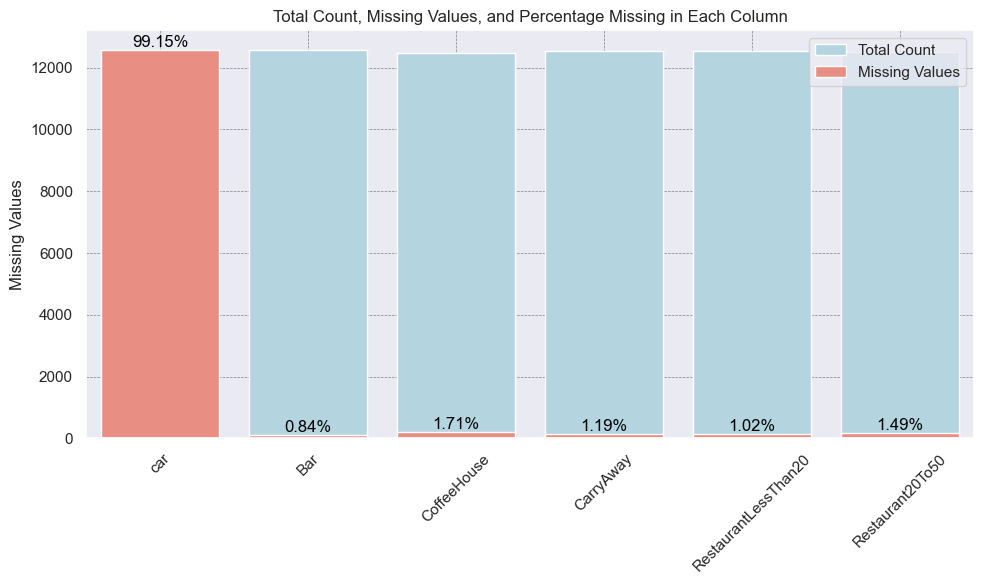
                <em>Figure: Missing Data</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: center;">
                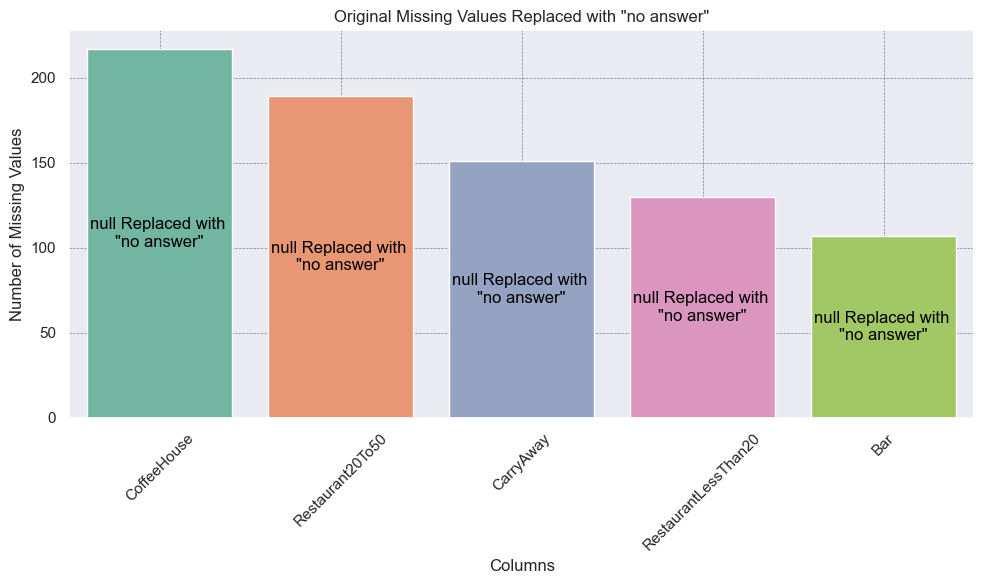
                <em>Figure: Cleaned up Data</em>
            </td>
        </tr>
    </table>
</div>




In [34]:

# 2. Investigate the dataset for missing or problematic data.
# 3. Decide what to do about your missing data -- drop, replace, other...


# Calculating the total count, missing values and percentage of missing values for each column
total_count = df.count()
missing_values = df.isnull().sum()

# Recalculating the percentage of missing values correctly
percent_missing = (missing_values / df.shape[0]) * 100


# Creating a DataFrame for visualization
visualization_df = pd.DataFrame({
    'Total Count': total_count,
    'Missing Values': missing_values,
    'Percentage Missing': percent_missing
})

# Updating the DataFrame for visualization
visualization_df['Percentage Missing'] = percent_missing
visualization_df = visualization_df[visualization_df['Percentage Missing'] > 0]

# Plotting
plt.figure(figsize=(10, 6))


# Creating a bar plot for Total Count and Missing Values
ax = sns.barplot(x=visualization_df.index, y='Total Count', data=visualization_df, color='lightblue', label='Total Count')
sns.barplot(x=visualization_df.index, y='Missing Values', data=visualization_df, color='salmon', label='Missing Values')

# Adding Percentage Missing as text on the bars
for index, value in enumerate(visualization_df['Percentage Missing']):
   
     plt.text(index, visualization_df['Missing Values'][index], f'{value:.2f}%', color='black', ha="center", va="bottom")

# plt.xticks(rotation=30)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.title('Total Count, Missing Values, and Percentage Missing in Each Column')
plt.legend()

# plt.xticks(rotation=45)
# plt.tight_layout()
# buffer.seek(0)
# plt.savefig(buffer, format='png')
# plt.close()

# Encode the first plot image as a base64 string
missing_data_image64 = save_plot_as_base64(buffer, plt, 45)


# drop the column 'car'
df_cleaned = df.drop('car', axis=1)

# List of columns to update
columns_to_update = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

# Replace NaN with  'no answer'
for column in columns_to_update:
    df_cleaned[column].fillna('no answer', inplace=True)  
    
# Including only the selected columns for missing values calculation
selected_columns = ['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar']

# Calculating missing values for the selected columns
missing_values_selected = df[selected_columns].isna().sum()
missing_values_selected = missing_values_selected.to_dict()


# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=list(missing_values_selected.keys()), y=list(missing_values_selected.values()), palette='Set2')

# Adding annotations
for index, value in enumerate(missing_values_selected.values()):
    plt.text(index, value/2, f'null Replaced with \n"no answer"', color='black', ha="center", va="center")

plt.title('Original Missing Values Replaced with "no answer"')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()



# Encode the first plot image as a base64 string
no_answer_image64 = save_plot_as_base64(buffer, plt,45)




markdown_text = f"""
# 2. Investigate the Dataset for Missing or Problematic Data

The dataset was investigated for missing or problematic data to ensure the quality and reliability of the analysis.

# 3. Decide What to Do About Missing Data

## Handling Missing Data - Actions Taken

### Key Observations and Actions

1. **Column: 'car'**
   - **Observation**: A significant portion of missing values (approximately 99.15% of the dataset).
   - **Action Taken**: The 'car' column was dropped from the dataset (`df_cleaned`). The high volume of missing data rendered this column not useful for further analysis.

2. **Columns with Fewer Missing Values**: 'CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar'
   - **Action Taken**: Missing values in these columns were filled with the placeholder value "no answer". This approach maintains the integrity of the dataset while addressing the missing data.


### Visualizations of Missing Data Before and After Cleanup

*Visualizations showing the missing data before and after cleanup.*
<br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{missing_data_image64}" alt="Missing Data" style="width: 100%;"/>
                <em>Figure: Missing Data</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{no_answer_image64}" style="width: 100%;"/>
                <em>Figure: Cleaned up Data</em>
            </td>
        </tr>
    </table>
</div>


"""

display(Markdown(markdown_text))








# 3. Decide What to Do About Missing Data (contd.)


## Inconsistently Named Entries in 'Age' Column

In our dataset, the **'age'** column, integral to our analysis, presented a data inconsistency issue. This column is of string type, but it contained values that were not effectively conveying the age groups. To address this issue, specific age values were replaced with age ranges.

## Correcting a Typo in Column Name

The column name 'passanger' was identified as a typo and has been corrected to 'passenger'.

## Analysis and Transformation of Income Data

### Mapping Multiple Incomes to 3 Specific Income Brackets

In the process of analyzing the income ranges in our dataset, it was decided that categorizing the data into three specific income brackets would be optimal for our analysis. These brackets are defined as:
- Low Income (less than 25K)
- Mid Income (25K to 75K)
- High Income (75K or more)

To facilitate this, we have retained the original 'income' column, which categorizes income in increments of $12,500. Additionally, a new column named 'income_bracket' has been added to the dataset. This new column categorizes each entry into one of the three defined income brackets (Low, Mid, High) based on their income value.

*Visualizations showing the distribution of coupons by income and income bracket.*
<br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                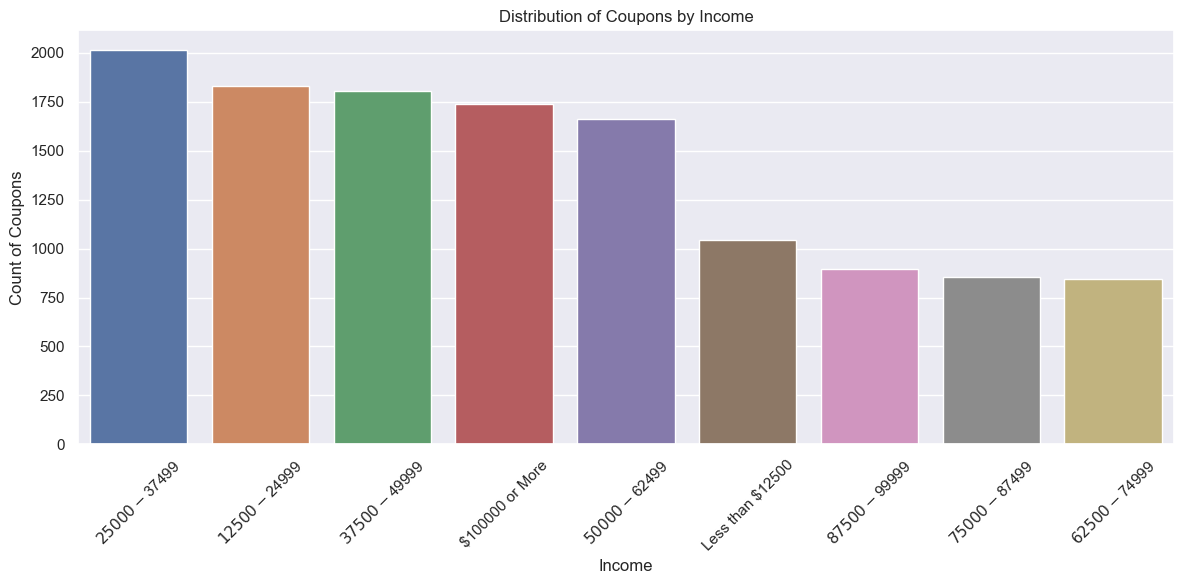
                <em>Figure: Distribution By Income</em>
            </td>
        <tr>
        </tr>
            <td style="text-align: center;">
                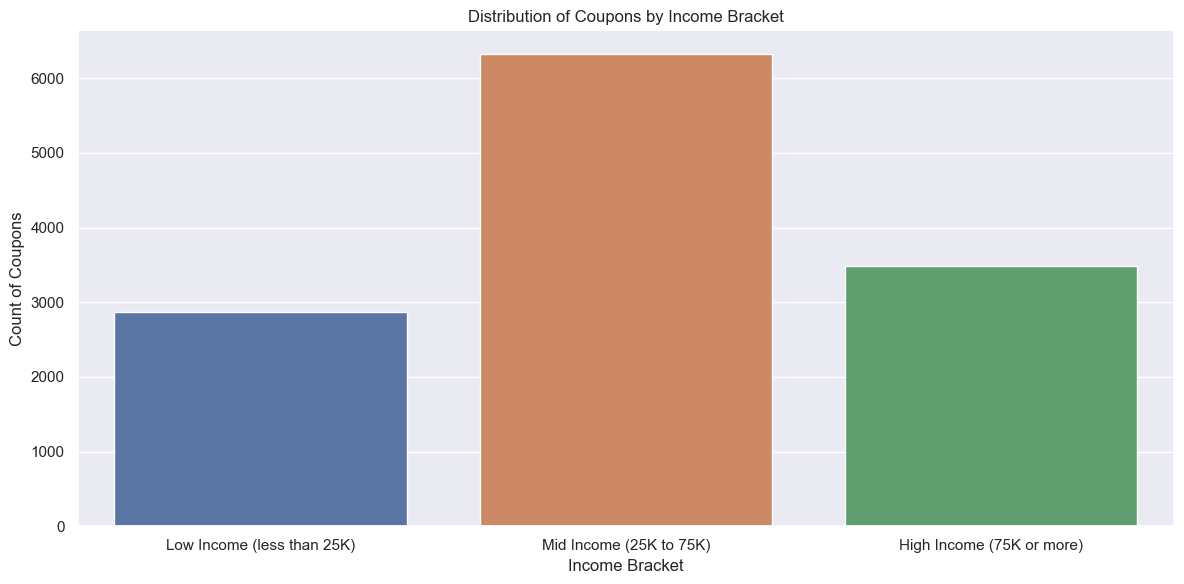
                <em>Figure: Distribution By Income Brackets</em>
            </td>
        </tr>
    </table>
</div>




In [35]:
# 2. Investigate the dataset for missing or problematic data.
# 3. Decide what to do about your missing data -- drop, replace, other...




# Replace specific age values with age ranges
age_replacements = {
    '21': '21-25',
    '26': '26-30',
    '31': '31-35',
    '36': '36-40',
    '41': '41-45',
    '46': '46-50'
}
df_cleaned['age'] = df_cleaned['age'].replace(age_replacements)

# Fix typo in column name
df_cleaned.rename(columns={'passanger': 'passenger'}, inplace=True)



# Define the function to categorize income into three ranges
def categorize_income(income):
    low_income_brackets = ['Less than $12500', '$12500 - $24999']
    mid_income_brackets = ['$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999']
    high_income_brackets = ['$75000 - $87499', '$87500 - $99999', '$100000 or More']

    if income in low_income_brackets:
        return 'Low Income (less than 25K)'
    elif income in mid_income_brackets:
        return 'Mid Income (25K to 75K)'
    else:
        return 'High Income (75K or more)'

# Apply the function to the 'income' column and create a new column
df_cleaned['income_bracket'] = df_cleaned['income'].apply(categorize_income)

# Plotting the distribution of accepted coupons by income
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='income', order=df_cleaned['income'].value_counts().index)
plt.title('Distribution of Coupons by Income')
plt.xlabel('Income')
plt.ylabel('Count of Coupons')



# Encode the first plot image as a base64 string
income_image64 = save_plot_as_base64(buffer, plt,45)




# Plotting the distribution of accepted coupons by income bracket
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='income_bracket', order=['Low Income (less than 25K)','Mid Income (25K to 75K)','High Income (75K or more)'])
plt.title('Distribution of Coupons by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Count of Coupons')




# Encode the first plot image as a base64 string
income_bracket_image64 =save_plot_as_base64(buffer, plt)




markdown_text = f"""

# 3. Decide What to Do About Missing Data (contd.)


## Inconsistently Named Entries in 'Age' Column

In our dataset, the **'age'** column, integral to our analysis, presented a data inconsistency issue. This column is of string type, but it contained values that were not effectively conveying the age groups. To address this issue, specific age values were replaced with age ranges.

## Correcting a Typo in Column Name

The column name 'passanger' was identified as a typo and has been corrected to 'passenger'.

## Analysis and Transformation of Income Data

### Mapping Multiple Incomes to 3 Specific Income Brackets

In the process of analyzing the income ranges in our dataset, it was decided that categorizing the data into three specific income brackets would be optimal for our analysis. These brackets are defined as:
- Low Income (less than 25K)
- Mid Income (25K to 75K)
- High Income (75K or more)

To facilitate this, we have retained the original 'income' column, which categorizes income in increments of $12,500. Additionally, a new column named 'income_bracket' has been added to the dataset. This new column categorizes each entry into one of the three defined income brackets (Low, Mid, High) based on their income value.

*Visualizations showing the distribution of coupons by income and income bracket.*
<br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{income_image64}" alt="Coupons Distribution By Income" style="width: 100%;"/>
                <em>Figure: Distribution By Income</em>
            </td>
        <tr>
        </tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{income_bracket_image64}" alt="Coupons Distribution By Income Bracket" style="width: 100%;"/>
                <em>Figure: Distribution By Income Brackets</em>
            </td>
        </tr>
    </table>
</div>


"""

display(Markdown(markdown_text))


# 3. Decide What to Do About Missing Data (contd.)
## Analysis and Transformation of Travel Time Data

### Overview

Our dataset contains three pivotal columns - `toCoupon_GEQ5min`, `toCoupon_GEQ15min`, and `toCoupon_GEQ25min`. These columns represent the GPS-calculated travel times to the coupon's destination.

### Logical Consistency Check

The first step was to verify the logical consistency across these travel time columns. We checked to ensure that if a destination is within 25 minutes, it should also be within 15 and 5 minutes, and similarly for the 15-minute category.

### Consistency Findings

Upon analysis, no inconsistencies were found, indicating accurate representation of travel times in the data.

### Data Simplification

With consistent data, we simplified it by combining these columns into a single column named `travel_time_category`, categorizing the actual travel time to the coupon destination.

<div align="center">
    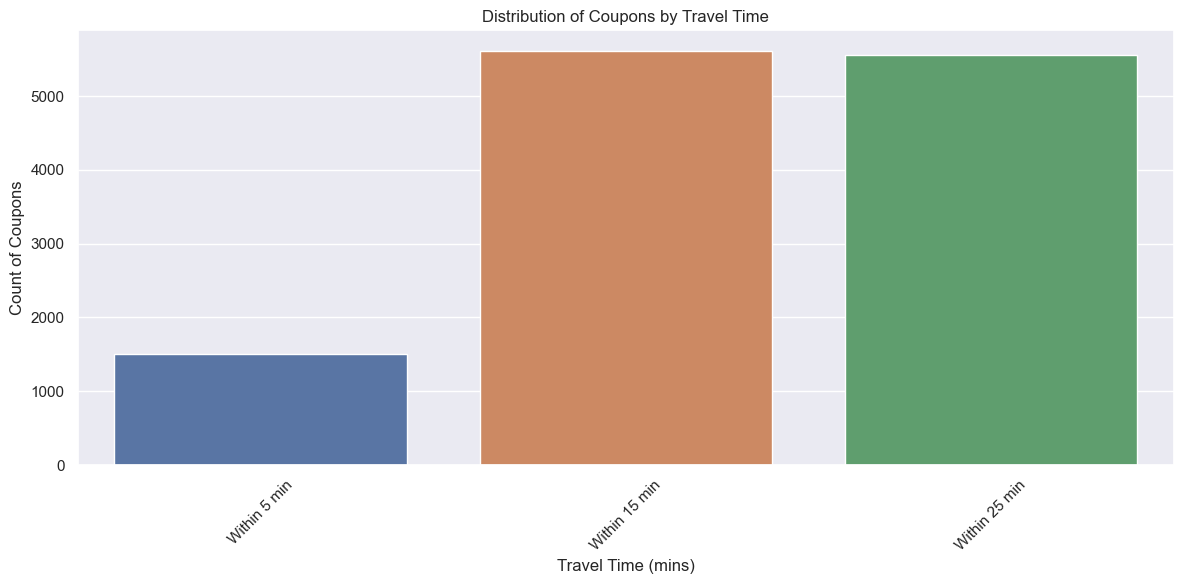
    <em>Figure: Distribution By Travel Time</em>
</div>

## Conclusion

With the undertaken data cleaning steps, we have addressed missing data, rectified data inconsistencies, and remapped certain discrete values to more concise categories. This process has prepared our dataset for a more accurate and meaningful analysis. Specifically, the transformation of various data elements, such as income and travel time, into categorical columns, enhances our ability to conduct a streamlined and insightful analysis.


In [36]:
# Check for logical consistency of the GPS columns
inconsistency_25 = df_cleaned[(df_cleaned['toCoupon_GEQ25min'] == 1) & ((df_cleaned['toCoupon_GEQ15min'] == 0) | (df_cleaned['toCoupon_GEQ5min'] == 0))]
inconsistency_15 = df_cleaned[(df_cleaned['toCoupon_GEQ15min'] == 1) & (df_cleaned['toCoupon_GEQ5min'] == 0)]

# Using assert statements to ensure the inconsistency counts are 0
assert inconsistency_25.shape[0] == 0, "There are inconsistencies with toCoupon_GEQ25min"
assert inconsistency_15.shape[0] == 0, "There are inconsistencies with toCoupon_GEQ15min"

# Create a new column 'travel_time_category'
conditions = [
    (df_cleaned['toCoupon_GEQ25min'] == 1),
    (df_cleaned['toCoupon_GEQ15min'] == 1),
    (df_cleaned['toCoupon_GEQ5min'] == 1)
]
choices = ['Within 5 min', 'Within 15 min', 'Within 25 min']
df_cleaned['travel_time_category'] = np.select(conditions, choices, default='More than 25 min')
df_cleaned['travel_time_category'] = df_cleaned['travel_time_category'].astype(str)

# Plotting the distribution of coupons by travel time category
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='travel_time_category', order=choices)
plt.title('Distribution of Coupons by Travel Time')
plt.xlabel('Travel Time (mins)')
plt.ylabel('Count of Coupons')

# Encode the first plot image as a base64 string
travel_time_image64 = save_plot_as_base64(buffer, plt, 45)

markdown_text = f"""
# 3. Decide What to Do About Missing Data (contd.)
## Analysis and Transformation of Travel Time Data

### Overview

Our dataset contains three pivotal columns - `toCoupon_GEQ5min`, `toCoupon_GEQ15min`, and `toCoupon_GEQ25min`. These columns represent the GPS-calculated travel times to the coupon's destination.

### Logical Consistency Check

The first step was to verify the logical consistency across these travel time columns. We checked to ensure that if a destination is within 25 minutes, it should also be within 15 and 5 minutes, and similarly for the 15-minute category.

### Consistency Findings

Upon analysis, no inconsistencies were found, indicating accurate representation of travel times in the data.

### Data Simplification

With consistent data, we simplified it by combining these columns into a single column named `travel_time_category`, categorizing the actual travel time to the coupon destination.

<div align="center">
    <img src="data:image/png;base64,{travel_time_image64}" alt="Distribution By Travel Time" style="width: 100%;"/>
    <em>Figure: Distribution By Travel Time</em>
</div>

## Conclusion

With the undertaken data cleaning steps, we have addressed missing data, rectified data inconsistencies, and remapped certain discrete values to more concise categories. This process has prepared our dataset for a more accurate and meaningful analysis. Specifically, the transformation of various data elements, such as income and travel time, into categorical columns, enhances our ability to conduct a streamlined and insightful analysis.
"""

display(Markdown(markdown_text))


<br><br><br><br><br><br>
# Forward to Coupon Acceptance Analysis
## Methodology Overview
Our primary objective is to unravel the acceptance patterns of various drivers concerning different coupon types. This analysis necessitates a nuanced approach, considering the discrete nature of our dataset's attributes and the distinct values each attribute possesses.

## Discrete Data and Visualization Strategy
From our value count analysis, it was discerned that each attribute in our dataset is discrete, with fewer than 25 distinct values. This discovery shapes our analytical strategy, guiding us towards leveraging a series of bar graphs. These graphs will not just be simple representations; they will be methodically plotted by column or combinations of columns (group by) and filtered to spotlight the specific data we desire.

## Utility Functions for Bar Graphs
To facilitate our visualization approach, we have developed a set of utility functions, encapsulated within `BarPlotter`, for crafting bar graphs. These functions, which include `create_stacked_bar_plot`, `create_stacked_bar_plot_multi`, `create_overall_stacked_bar_plot`, `create_stacked_bar_plot_with_filters`, and `create_subplot_grid`, are pivotal in streamlining the process of generating these visualizations, ensuring consistency and efficiency in our analysis. The utility functions are engineered to offer flexibility and adaptability, allowing us to efficiently analyze different facets of our data.

A key feature of these functions is their ability to create stacked bar graphs that juxtapose both frequency and acceptance rates. This visualization technique is particularly effective as it presents a comprehensive view of the data – showing not only how many times a coupon was offered (frequency) but also the proportion of those offers that were accepted (acceptance rate). This dual representation in a single graph provides a clear and insightful visualization, making it easier to discern patterns and trends that might be obscured in other forms of data representation.
<br><br>

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                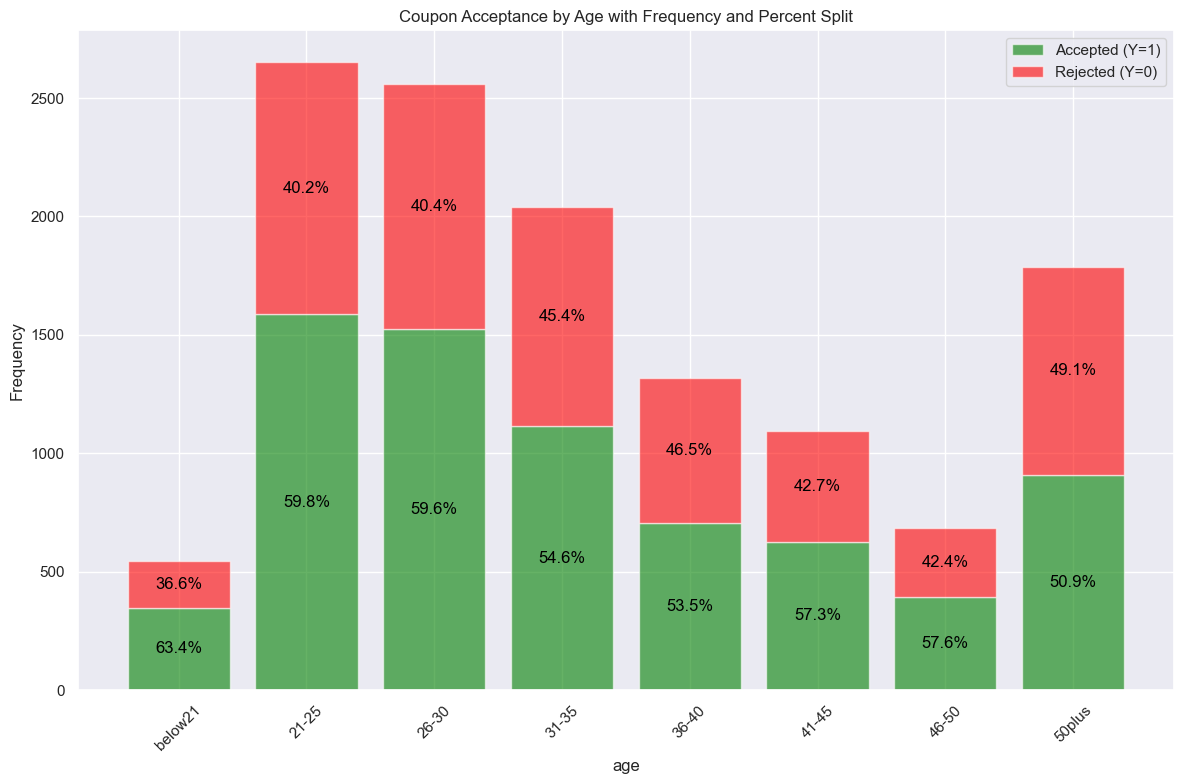
                <em>Figure: Visualization showing the distribution of coupons by age with acceptance rates annotated</em>
            </td>
        </tr>
    </table>
</div>

## The Importance of Context in Analyzing Acceptance Rates

Understanding the context behind acceptance rates is a critical component of our analysis. Without proper context, acceptance rates can be misleading. For example, as illustrated in the previous figure, drivers below the age of 21 exhibit the highest acceptance rate at 63.4%. However, this group also represents the smallest frequency distribution, with just over 500 occurrences. This highlights a significant opportunity for the business: considering the high acceptance rate, offering more coupons to younger drivers could potentially yield better engagement and results.

Therefore, it is essential to consider not only the acceptance rate but also the frequency count — that is, the total number of coupon offers presented to each demographic group. This dual consideration enables a more comprehensive and accurate understanding of the data. By doing so, we not only interpret acceptance rates in light of their corresponding frequencies but also derive actionable insights for business strategies, such as targeting specific demographic groups with higher coupon offers based on their acceptance propensity.

## Focusing on Coupon Types

One attribute that stands out in its importance is the coupon type. Preliminary observations suggest that different coupon types, such as bar coupons or restaurant coupons, may appeal to distinctly different demographics. Hence, our analysis will delve into each coupon type individually. This focused approach will enable us to uncover specific patterns and preferences unique to each coupon category, offering targeted insights into driver behavior and preferences.


## Conclusion
In summary, our analysis is geared towards a comprehensive understanding of coupon acceptance patterns, underpinned by a methodical approach to data visualization and analysis. By examining the intricate relationships between various attributes and acceptance rates within the context of coupon types, we aim to unearth actionable insights that could be pivotal for strategic decision-making.


In [37]:



# Create a stacked bar plot for coupon acceptance
coupon_image_base64, result_df = create_stacked_bar_plot_multi(['age'], 'Coupon Acceptance by Age with Frequency and Percent Split', df_cleaned,45,'linear',['below21','21-25', '26-30', '31-35', '36-40','41-45','46-50','50plus'
       ])

markdown_text = f"""
<br><br><br><br><br><br>
# Forward to Coupon Acceptance Analysis
## Methodology Overview
Our primary objective is to unravel the acceptance patterns of various drivers concerning different coupon types. This analysis necessitates a nuanced approach, considering the discrete nature of our dataset's attributes and the distinct values each attribute possesses.

## Discrete Data and Visualization Strategy
From our value count analysis, it was discerned that each attribute in our dataset is discrete, with fewer than 25 distinct values. This discovery shapes our analytical strategy, guiding us towards leveraging a series of bar graphs. These graphs will not just be simple representations; they will be methodically plotted by column or combinations of columns (group by) and filtered to spotlight the specific data we desire.

## Utility Functions for Bar Graphs
To facilitate our visualization approach, we have developed a set of utility functions, encapsulated within `BarPlotter`, for crafting bar graphs. These functions, which include `create_stacked_bar_plot`, `create_stacked_bar_plot_multi`, `create_overall_stacked_bar_plot`, `create_stacked_bar_plot_with_filters`, and `create_subplot_grid`, are pivotal in streamlining the process of generating these visualizations, ensuring consistency and efficiency in our analysis. The utility functions are engineered to offer flexibility and adaptability, allowing us to efficiently analyze different facets of our data.

A key feature of these functions is their ability to create stacked bar graphs that juxtapose both frequency and acceptance rates. This visualization technique is particularly effective as it presents a comprehensive view of the data – showing not only how many times a coupon was offered (frequency) but also the proportion of those offers that were accepted (acceptance rate). This dual representation in a single graph provides a clear and insightful visualization, making it easier to discern patterns and trends that might be obscured in other forms of data representation.
<br><br>

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{coupon_image_base64}"  alt="Coupons Acceptance" style="width: 100%;"/>
                <em>Figure: Visualization showing the distribution of coupons by age with acceptance rates annotated</em>
            </td>
        </tr>
    </table>
</div>

## The Importance of Context in Analyzing Acceptance Rates

Understanding the context behind acceptance rates is a critical component of our analysis. Without proper context, acceptance rates can be misleading. For example, as illustrated in the previous figure, drivers below the age of 21 exhibit the highest acceptance rate at 63.4%. However, this group also represents the smallest frequency distribution, with just over 500 occurrences. This highlights a significant opportunity for the business: considering the high acceptance rate, offering more coupons to younger drivers could potentially yield better engagement and results.

Therefore, it is essential to consider not only the acceptance rate but also the frequency count — that is, the total number of coupon offers presented to each demographic group. This dual consideration enables a more comprehensive and accurate understanding of the data. By doing so, we not only interpret acceptance rates in light of their corresponding frequencies but also derive actionable insights for business strategies, such as targeting specific demographic groups with higher coupon offers based on their acceptance propensity.

## Focusing on Coupon Types

One attribute that stands out in its importance is the coupon type. Preliminary observations suggest that different coupon types, such as bar coupons or restaurant coupons, may appeal to distinctly different demographics. Hence, our analysis will delve into each coupon type individually. This focused approach will enable us to uncover specific patterns and preferences unique to each coupon category, offering targeted insights into driver behavior and preferences.


## Conclusion
In summary, our analysis is geared towards a comprehensive understanding of coupon acceptance patterns, underpinned by a methodical approach to data visualization and analysis. By examining the intricate relationships between various attributes and acceptance rates within the context of coupon types, we aim to unearth actionable insights that could be pivotal for strategic decision-making.
"""

display(Markdown(markdown_text))

<br><br><br><br><br><br>



<br><br>
# 4. Overall Coupon Acceptance Rate


The proportion of **12684** total observations that chose to accept the coupon is **7210** or **56.84%**. This is a healthy acceptance rate, but we wil conduct more detailed analyses in the sections to follow to gain deeper insights.

<br><br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                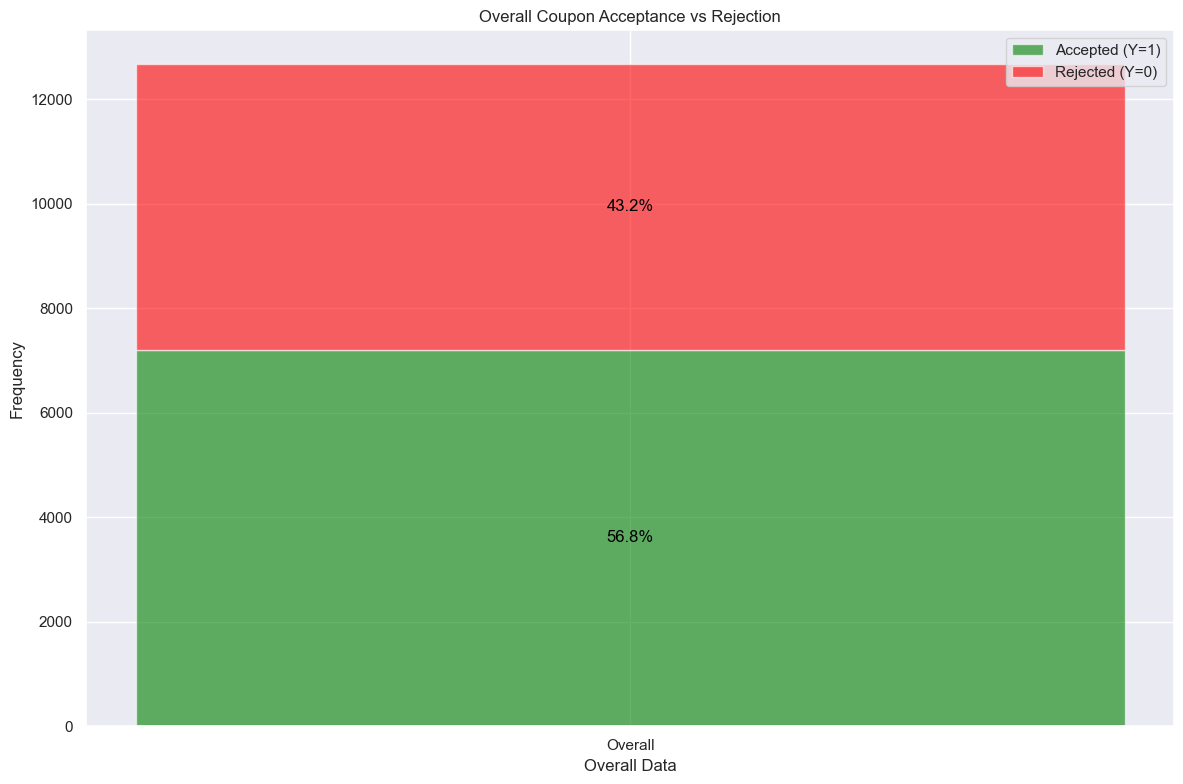
                <em>Figure: Coupons Acceptance Rate</em>
            </td>
        </tr>
    </table>
</div>






In [38]:
# 4. What proportion of the total observations chose to accept the coupon? 
total_count = len(df_cleaned)
accepted_count = df_cleaned['Y'].value_counts()
proportion_data = accepted_count / total_count


coupon_overall_acceptance_image64 = create_overall_stacked_bar_plot('Overall Coupon Acceptance vs Rejection', df_cleaned, rotation=0, yscale='linear')



markdown_text = f"""

<br><br>
# 4. Overall Coupon Acceptance Rate


The proportion of **{total_count}** total observations that chose to accept the coupon is **{accepted_count[1]}** or **{proportion_data[1]:.2%}**. This is a healthy acceptance rate, but we wil conduct more detailed analyses in the sections to follow to gain deeper insights.

<br><br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{coupon_overall_acceptance_image64}" alt="Coupons Acceptance" style="width: 100%;"/>
                <em>Figure: Coupons Acceptance Rate</em>
            </td>
        </tr>
    </table>
</div>




"""

display(Markdown(markdown_text))

In [39]:
# 5. Use a bar plot to visualize the `coupon` column.
# Analysis by Coupon Type



coupon_image_base64 = create_stacked_bar_plot_multi(['coupon'], 'Coupon Acceptance by Type with Frequency and Percent Split', df_cleaned)



markdown_text = f"""

# 5 Analysis of Coupon Distribution and Acceptance Rates By Coupon Type

In this section, we analyze the distribution and acceptance rates of different coupon types, providing insights and recommendations based on our findings.


## Distribution of Coupons

The distribution of coupons varied across different types:
- **Coffee House**: 3996 instances
- **Restaurant(<20)**: 2786 instances
- **Carry out & Take away**: 2393 instances
- **Bar**: 2017 instances
- **Restaurant(20-50)**: 1492 instances

This variation in distribution frequency highlights the emphasis placed on each coupon type.

## Analysis of Acceptance Rates Across Coupon Types

The acceptance rates for each coupon type reveal distinct customer preferences:

1. **Coffee House Coupon Type**: 
   - **Frequency**: Highest, 3996 instances.
   - **Acceptance Rate**: 49.9%. 
   - **Insight**: Shows a balanced preference among customers.

2. **Restaurant(<20) / Carry Out & Take Away Coupon Type**: 
   - **Frequency**: High, 2786 for Restaurant(<20) and 2393 for Carry Out & Take Away.
   - **Acceptance Rate**: 70.7%, the highest, suggesting strong customer preference.
   - **Insight**: Reflects a preference for affordable dining options and convenience.

3. **Bar Coupon Type**: 
   - **Frequency**: Lower, around 2017 instances.
   - **Acceptance Rate**: 41%, lower than other types.
   - **Insight**: Suggests the need for more detailed analysis, considering the divide between drinkers and non-drinkers.

4. **Restaurant(20-50) Coupon Type**:
   - **Frequency**: Lowest, under 1492 instances.
   - **Acceptance Rate**: 44.1%.
   - **Insight**: Indicates the necessity for further analysis to understand customer preferences better.

## Recommendations

- **Prioritize High Acceptance Coupon Types**: Increase the distribution of high acceptance coupon types like 'Restaurant(<20)' and 'Carry Out / Take Away'.
- **Targeted Distribution Strategies**: Develop specific strategies for other coupon types, focusing on particular customer segments.
- **Investigate Low Acceptance Coupon Types**: Further analyze 'Bar' and 'Restaurant(20-50)' coupons to uncover reasons behind low acceptance and improve strategies.
- **Reevaluate 'Coffee House' Coupon Strategy**: Examine customer segments for 'Coffee House' coupons to optimize their distribution.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{coupon_image_base64}" alt="Coupons Acceptance Rate" style="width: 100%;"/>
                <em>Figure: Coupon Acceptance Rate by Type</em>
            </td>
        </tr>
    </table>
</div>

"""

display(Markdown(markdown_text))




# 5 Analysis of Coupon Distribution and Acceptance Rates By Coupon Type

In this section, we analyze the distribution and acceptance rates of different coupon types, providing insights and recommendations based on our findings.


## Distribution of Coupons

The distribution of coupons varied across different types:
- **Coffee House**: 3996 instances
- **Restaurant(<20)**: 2786 instances
- **Carry out & Take away**: 2393 instances
- **Bar**: 2017 instances
- **Restaurant(20-50)**: 1492 instances

This variation in distribution frequency highlights the emphasis placed on each coupon type.

## Analysis of Acceptance Rates Across Coupon Types

The acceptance rates for each coupon type reveal distinct customer preferences:

1. **Coffee House Coupon Type**: 
   - **Frequency**: Highest, 3996 instances.
   - **Acceptance Rate**: 49.9%. 
   - **Insight**: Shows a balanced preference among customers.

2. **Restaurant(<20) / Carry Out & Take Away Coupon Type**: 
   - **Frequency**: High, 2786 for Restaurant(<20) and 2393 for Carry Out & Take Away.
   - **Acceptance Rate**: 70.7%, the highest, suggesting strong customer preference.
   - **Insight**: Reflects a preference for affordable dining options and convenience.

3. **Bar Coupon Type**: 
   - **Frequency**: Lower, around 2017 instances.
   - **Acceptance Rate**: 41%, lower than other types.
   - **Insight**: Suggests the need for more detailed analysis, considering the divide between drinkers and non-drinkers.

4. **Restaurant(20-50) Coupon Type**:
   - **Frequency**: Lowest, under 1492 instances.
   - **Acceptance Rate**: 44.1%.
   - **Insight**: Indicates the necessity for further analysis to understand customer preferences better.

## Recommendations

- **Prioritize High Acceptance Coupon Types**: Increase the distribution of high acceptance coupon types like 'Restaurant(<20)' and 'Carry Out / Take Away'.
- **Targeted Distribution Strategies**: Develop specific strategies for other coupon types, focusing on particular customer segments.
- **Investigate Low Acceptance Coupon Types**: Further analyze 'Bar' and 'Restaurant(20-50)' coupons to uncover reasons behind low acceptance and improve strategies.
- **Reevaluate 'Coffee House' Coupon Strategy**: Examine customer segments for 'Coffee House' coupons to optimize their distribution.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,('iVBORw0KGgoAAAANSUhEUgAABJ8AAAMQCAYAAACJzMTyAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAADb2klEQVR4nOzdd3yN5//H8fd9kpwMSWTYezXUXrErRmmL9ldUadGipUYpatZsFR1G7a3V2kqpquoeVEusUlvVjhEZRmSd+/eHb04dCSLJEeH1fDzyIPd9net87jvnPiferuu6DdM0TQEAAAAAAABOYMnsAgAAAAAAAPDgInwCAAAAAACA0xA+AQAAAAAAwGkInwAAAAAAAOA0hE8AAAAAAABwGsInAAAAAAAAOA3hEwAAAAAAAJyG8AkAAAAAAABOQ/gEAMADzDTNzC4B9wg/azxM7sfX+/1YEwDcLwifAAB3Zffu3erfv7/q1aun8uXLq2HDhho6dKhOnDiR2aU53eeff66SJUvq1VdfzexS7igsLEyvvfaaTp06ldmlpNqff/6pkiVL6s8//8zQfkuWLHnHrylTpmToczrbqlWrVLJkSZ08eVKSdPjwYb3wwgsObdJ6XA0aNLjtuQoLC8uQY0D6DRo0SA0aNLhtm5R+huXLl1fTpk01Z84c2Wy2e1RtxoiOjtbAgQMVGhp6x7Y//vijXn75ZVWtWlXlypVTo0aN9O677+rChQt3/bzt27dX+/bt7d/feH3FxcVp7NixWrt27V33CwAPC9fMLgAAkHUsWrRIY8aMUfXq1fXmm28qV65cOn78uObOnatvv/1WH3/8scqUKZPZZTrNypUrFRQUpE2bNunEiRMqWLBgZpd0S7///rt+/vlnDRs2LLNLyXTLli1z+L5169Z67rnn1KpVK/u2PHny3Ouy0qVevXpatmyZcuXKJUlav369duzYkWH9h4SEqHv37inuCwgIyLDnwb1x8+s9JiZG3377rcaNG6fo6Gi9+eabmVjd3dm3b59Wr16tFi1a3LbdF198oUGDBql169bq0KGDPD09dfjwYc2ePVs//fSTVq5cKT8/vzTXsWzZMvv7xrlz5/TJJ59o7Nixae4PAB50hE8AgFTZtm2bRo8erbZt22rIkCH27dWrV1fDhg3VokULDR48WF9++WUmVuk8R48e1fbt2zV79mz1799fy5cvz1L/YHuYVaxYMdm2PHnypLg9qwgICHBqCBQQEJClzw8cpfR6r1mzpv755x8tWrRIvXr1kpubW+YU5yTTpk1Ts2bN9M4779i31ahRQ1WrVtX//d//6fPPP0/XKFauDwC4O0y7AwCkyrx58+Tj46O+ffsm2xcQEKBBgwapcePGunz5sn37119/rRYtWqhSpUqqXbu2hg8frqioKPv+KVOmqGTJksn6u3E6w8mTJ1WyZEmtW7dOXbt2VYUKFRQSEqIpU6Y4TBdJTEzUokWL9PTTT6t8+fKqV6+exo0bp9jYWHubQYMGqUOHDlq5cqWeeOIJlS1bVs8884x++eWXOx7/ypUr5ePjo5o1a+rJJ5/UypUrFRcXl6zdnj179Oqrr6pKlSqqUaOG+vTpozNnztj3h4eH66233lKtWrVUqVIltW3bVtu2bbPvt9lsmj17tho1aqSyZcvqiSee0GeffebwHO3bt9egQYM0a9Ys1a5dW5UrV1a3bt3sUx9XrVqlwYMHS5IaNmyoQYMGSZKuXbum8ePHq3HjxipbtqwqV66sjh07at++fXd9jo4fP65evXqpWrVqCg4OVufOnXXo0CH7/tjYWH3wwQcKCQlR2bJl9fTTT+vrr7++43mWrk8he/HFF+3TZG48/l69eikkJCTZVKHhw4erYcOGaV5z5f3331f58uV16dIlh+2zZ89WpUqVdPXqVU2ZMkUNGjTQTz/9pCeffFIVKlRQq1attHnzZofHREZGavjw4apVq5bKlSun559/PlmbG33//fcqWbKk9u7da9+2du1alSxZUkuXLrVvO3LkiEqWLKk//vjDYdrdlClTNHXqVEnJp9pdvnxZQ4YMUbVq1VSpUiX16tVL4eHhaTpHNytZsqSmTp2qli1bqkqVKpo+fbok6fTp0+rbt6+qVaumChUq6OWXX3Y4tqRzNHDgQFWvXl3BwcEaPXq0Jk+e7DCF7OZpTlLKUzPv9HxJ7yHr169Xr169VKlSJQUHB2vIkCG6cuWKvZ1pmlq0aJGaNm2q8uXLq1GjRpozZ45M09TPP/+skiVLauPGjQ717Ny5UyVLltSWLVtueZ5WrFihFi1aqGLFiipfvrz+7//+z+FaWLVqlUqXLq1du3apdevWKleunOrVq6c5c+Y49BMVFaXBgwfbz9mHH36Y7ilzZcuW1ZUrV+zvy6l9/+nXr5969eqlypUrq0uXLpKkK1euaOzYsapbt64qVqyoFi1a6Mcff0x2Lpo2baqyZcuqXr16mjJlihISEuz77/T+8+eff+qll16SJL300kvJXh83unDhQorvB6VKldLgwYNVtmxZ+7aSJUtq4cKFGjhwoCpVqqRatWrp3Xff1bVr127Zf9K1dvLkSTVs2FCSNHjw4DtOgwSAhxXhEwDgjkzT1MaNG1WzZk15enqm2ObJJ5/U66+/Lm9vb0nS9OnT1adPH1WoUEGTJ09Wjx49tGHDBrVv3/62v9DfysiRI+Xt7a0pU6bo2Wef1fTp0/XBBx/Y9w8fPlxjxoxRgwYNNGPGDLVt21YLFy5U9+7dHf4BsmfPHs2bN0+9evXStGnT5Orqql69ejmEYjdLTEzUmjVr1KRJE1mtVrVo0ULh4eH6/vvvHdrt379fL7zwgmJiYvTee+/pnXfe0d69e9WpUyfFx8fr6tWratOmjX7//Xe9+eabmjp1qrJly6ZXX31VR44csR/n5MmT9cwzz2jmzJl68sknNWbMGE2bNs3huX744QetXLlSQ4YM0TvvvKP9+/frpZde0tWrV1WvXj1169ZNkjR16lT79KkBAwbo888/V5cuXTR//nwNGjRIBw8eVJ8+fe7qHJ07d06tWrXSP//8oxEjRmjcuHGKiopShw4ddPHiRZmmqR49emjp0qXq2LGjZsyYoUqVKqlPnz5avXr1HX/WY8eOVYUKFTR9+nQ99thjevfdd7V8+XJJ16cPhYWFOYQPcXFxWr9+vZo3by7DMO7Yf0qee+45xcbG6ptvvnHYvnr1aj355JPy8vKSJF28eFEDBw7Uiy++qEmTJsnT01OdO3fWnj17JF0P3V5++WX98MMP6tOnj6ZOnao8efLo1VdfvWUAVatWLVmtVv3+++/2bX/88YckaevWrfZtv/76q3x9fVW1alWHx7dq1UrPPfecpOtTgW6cXvXpp58qPj5ekyZNUp8+ffTjjz/q7bffvuP5ME1TCQkJyb5uNmPGDD3xxBOaMGGCGjZsqIsXL6pNmzb6+++/NWzYMI0fP142m01t27a1v8ZtNpteffVV/fLLL+rXr5/Gjh2rXbt2aeHChXes62apeb4kI0aMUP78+TV9+nS9+uqrWrlypWbOnGnfP2HCBI0ePVohISGaMWOGWrVqpYkTJ9pfh7lz59aaNWsc+vziiy9UsGBBBQcHp1jfokWL7MHorFmz9OGHH8rNzU39+/fX6dOn7e1sNpt69+6tJk2aaPbs2apSpYrGjRun3377zeGc/fzzz+rXr5/ef/997dixI9WB7q0cPXpUXl5eCgwMlJT695/169fLzc1N06ZN00svvWSv74svvlCXLl00Y8YMBQUF6fXXX7dfq7NmzdKwYcNUs2ZNzZw5U23bttWcOXM0fPhwh75v9/5TpkwZe/vhw4drxIgRtzy2evXqad26derRo4e++uornT171r6vQ4cOqlGjhkP7SZMmKTw8XB999JFeffVVLV++XP3797/jOcyVK5c9/O3WrZv97wCAm5gAANxBeHi4GRQUZH744Yepah8ZGWmWLVvWHDJkiMP2rVu3mkFBQeaiRYtM0zTNyZMnm0FBQckeHxQUZE6ePNk0TdM8ceKEGRQUZL700ksObd59912zTJkyZlRUlHno0CEzKCjInD59ukOb1atXm0FBQebPP/9smqZpDhw40AwKCjKPHTtmb7NlyxYzKCjI/Oabb255PD/++KMZFBRk7ty5076tSZMmZrt27Rza9ezZ06xdu7Z57do1+7Zdu3aZ9evXN3fv3m0uXLjQLFmypLlv3z77/mvXrplPPvmkuWTJEvOff/4xS5Ysac6aNcuh34kTJ5rlypUzL168aJqmabZr184sXbq0w3H8/fffZlBQkLlw4ULTNE1z5cqVZlBQkHnixAnTNE0zNjbW7NSpk7lu3TqHvufPn28GBQWZZ8+eTfU5eu+998zy5cub586ds7c5e/asWa9ePfOHH34wN27caAYFBSV7rn79+pm1a9c24+PjUzzPf/zxhxkUFGQOGzbMYXv37t3NunXrmomJiWZiYqJZt25dc8CAAfb969atM0uWLGmePHkyxX5vduPr60atW7c227Zta/9+165dZlBQkLl161bTNP97vX7xxRf2NjExMWbt2rXNnj17mqZpmsuWLUv2WrHZbGbbtm3NFi1a3LKmTp06mZ06dbJ/X79+fbN58+ZmnTp17Ns6dOhg9unTxzTN5D/flK6loKAgs1WrVg7b3nzzTTM4OPiWdSQ9d1BQUIpfSeciqf82bdo4PHbChAlmuXLlHH4WsbGxZsOGDe3nKOl6+umnn+xtLl26ZFarVs2sX7++fVu7du2SXWNJr5E//vgj1c+X9B7Sr18/h77at29vNmvWzDRN04yKijLLlCljjhkzxqHN2LFjzY4dO5qmaZrjx483K1asaF6+fNn+PMHBwebUqVNveS7Hjh1rfvDBBw7b9uzZYwYFBZlr1641TfO/n+Xy5csdjqFcuXLmO++8Y5qmaf7000/JztmVK1fM6tWrO5yzlAQFBZkfffSRGR8fb8bHx5txcXHm6dOnzVmzZpklS5a013c37z9ly5Y1r1y5Ym+TVN/3339v32az2cw2bdqYH330kRkdHW1WqFDBHD58uEPfy5cvN4OCgsyDBw+appm695+bXwO3Eh0dbfbs2dMsWbKk/fX7+OOPm2PGjDHPnDmT7Bw1btzY4b3p448/dqjt5tdjSp9TK1euvG1NAPAwY+QTAOCOLJbrHxeJiYmpar9z507FxcXp6aefdthetWpV5c+fP013M3vmmWccvn/iiScUHx+vnTt32qe83Px8TZs2lYuLi8PzBQQEqFChQvbvkxaMjYmJueVzr1y5UoULF1bRokUVHR2t6OhoPfXUU9qyZYvD6Ipt27apbt26cnd3t28rX768fvzxR5UtW1ahoaEqUKCASpUqZd/v7u6u9evXq02bNvrjjz9kmqYaNGjgMNqkQYMGio2NdZieV6lSJYfjKF26tAoWLHjLO0BZrVbNmzdPTZo00blz57R161YtW7ZMP/30kyQpPj4+1edo27ZtqlixonLmzGlvkytXLv30009q0KCBNm/eLMMwFBISkuw4zp8/7zA9LyVNmjRx+L5Ro0YKCwvTP//8I4vFoubNm+vbb7+11/PFF1+oevXqyp8//237vZOWLVsqNDTUfge5VatWqVChQg4jjVxcXNS0aVP79x4eHqpbt679Z7N582blzJlTZcqUsR93YmKi6tevrz179txyhF29evUUGhqquLg4nThxQqdOnVLXrl117tw5/fvvv7p69apCQ0NVv379uzqmKlWqOHxfsGBBRUdH3/Fx9evX1+eff57s69FHH3VoFxQU5PD95s2b9eijjyp37tz247dYLKpbt659ZFdoaKjc3NxUt25d++O8vb3TNF0pNc+X5OY1evLkyaOrV69Kuv6eFR8fr0aNGjm0GTRokObPny/p+usjJiZG3333naTr0yWjo6P17LPP3rK+QYMGqX///rp06ZJ2796ttWvXatGiRZIcrznp+jWdxGq1KiAgwF5fSufMy8tLISEhdzpFkq6PRC1TpozKlCljn/I2depUtW7dWr169ZKku3r/KVCggH004I313fj6NAxDS5Ys0RtvvKEdO3YoJiYmxb4ladOmTfbHpeU9OiU+Pj6aPHmyvv/+ew0fPlxPPPGEoqOj9cknn+ipp57S9u3bHdo3bdpUrq7/LYf7xBNP2I8NAJB+LDgOALgjPz8/ZcuWzWGayM2uXr2quLg4+fn52f+BnSNHjmTtcuTIkWxdndRIuqtXkqTFlqOjo+3Pd2MYIkmurq7y9/d3eL6bpw0mTdO61dopFy9e1M8//6z4+PgUp9YsW7ZMb731lqTr69gkTV9JSWr2S3IIN25047SRm8+HJAUGBt42WPjtt980ZswY/fPPP8qWLZtKliypbNmySZLDtLs7naPIyEgVKFDgtsdhmqYqV66c4v5z584lCzFudPPPMemcJf2cW7ZsqZkzZ+rbb79VrVq1tGnTpgy5y1STJk00ZswYffnll3r11Ve1fv16vfzyyw5tAgICki3MHBgYaK8tMjJS58+fv+VdH8+fP6/s2bMn216vXj29++672r59u44fP64iRYqoYcOGypYtm7Zs2aLAwEAlJiY6hA+pcWNAIF0Pks1UrIvl5+encuXK3bHdzdd4ZGSkjh07dsvjj4mJUVRUlPz8/OyhdpKUXtN3kprnS3Lz6/rGc5F07d1uEffChQsrODhYq1ev1rPPPqvVq1erRo0atw09jx8/ruHDh+uPP/6Qq6urihUrZl/n7uafg4eHxy3ru9U5u/lauZXnn39ezz//vKTr13O2bNlUoEABh9fy3bz/pPRzT6m+m/tOWh/qZufOnbP//W7fo++kQIECatu2rdq2bSubzabvv/9egwcP1rvvvqtVq1bZ2938+kt630lNWAsAuDPCJwBAqtSpU0d//vmnYmNjHUb2JFm1apVGjx6txYsX2/9xfeHCBRUvXtyh3fnz51WwYEFJ//2jIjExUS4uLpLksADwjZL+8ZIkadHkGwOX8+fPO4Qi8fHxioiIkL+//90ert2aNWsUHx+vqVOnytfX12HftGnTtHr1avXt21ceHh7y8fHRxYsXk/Xxyy+/qFSpUvLx8bGPqrnRjh075O3tbe9/wYIF9lDoRvny5bP//ebzIV0/3zeOGLjR8ePH1aNHD/vaM0ntFi1aZF9XJrVudZybN29WgQIF5OPjIy8vL3366acpPr5w4cK37f/m0UEXLlyQ9N8/BgsWLKhq1app/fr1unTpkjw9PdW4ceO7OoaUZMuWTU8++aTWr1+vRx99NMVRLUnB2o1rS124cMFem4+Pj4oUKaJx48al+By3Cu0KFiyoYsWKafPmzTpx4oSqVasmFxcXVa1aVVu2bFG2bNlUpUqVFIOr+4mPj4+qVaumAQMGpLjfarXK399fERERDte9lPJr+ubRlkkjge7m+VIj6dq7ePGiihUrZt9+5swZHTt2TFWqVJGbm5tatmypwYMH6+jRo3cMPW02m7p06SI3NzctX75cpUuXlqurqw4fPnzXdwW9m3OWkly5ct0xTLyb95+b+fj4KDIyUjabzSGA2rdvnxISEux9jxs3TkWKFEn2+JT+oyI9NmzYoBEjRmjJkiUqWrSofbvFYlHjxo21detW+zpySW4+l0nvO868qyQAPEyYdgcASJVOnTopMjJSEydOTLYvPDxcc+fOVeHChVWxYkVVqFBBVqtVa9eudWgXGhqq06dP20fEJC1OfuPd4G6eCpHk5rsmbdiwQZ6enqpQoYKqVasmScmeb926dUpMTEw29ehurFq1ShUrVlSjRo1UvXp1h68XXnhBUVFRWr9+vaTr0wp/++03h7vgHThwQF26dNHu3btVtWpVnThxQgcOHLDvj4uLU8+ePbV8+XL7yKqIiAiVK1fO/hUZGamPPvrI4R9HO3bscAiA/v77b508eVI1a9aUpGQjEPbs2aPY2Fi99tprDgFVUvCUmtEwSapWraqdO3c63DXt4sWL6ty5s3744QdVq1ZNV69elWmaDsdx6NAhTZs2LcWFq290cxi2bt065c2b1yG0eu655/T777/ryy+/1FNPPXXLhfDv1nPPPaeDBw9q/vz5qlGjRrJ/cMfHxzvUd+3aNf3666/2816tWjWdOXNGgYGBDse+efNmzZ071yE4uFm9evX0+++/a+vWrapevbqk67eG37p1q3777bfbTrm71YiTe61atWo6evSoihYt6nD8X375pVasWCEXFxfVqlVLCQkJ2rBhg/1xN59X6fr7Q1hYmMO2m98fUvN8qVG+fHm5ubnphx9+cNi+YMECvfHGG/aw8YknnpCXl5eGDx8uDw+P24aeEREROnr0qJ577jmVL1/ePqXr119/lXR3I3lq1qyphIQEh5scxMXFOUxXS6+7ef+5WdWqVRUfH+9wV0zTNDVkyBDNmDFDFSpUkJubm86ePevQt5ubm8aPH59iKH8rqfmZPvLII4qMjNSCBQtS3P/vv/8mmzKa0meMYRjJFiZPa00A8LBj5BMAIFUqVqyoN954Qx999JGOHDmi5s2by9/fX4cOHdL8+fN15coVzZ49W4ZhyM/PT126dNHUqVPl5uamhg0b6uTJk5o0aZJKlCihFi1aSJJCQkI0duxYDRs2TJ07d1ZYWJj9DnA3++abb5QjRw6FhIRoy5YtWrRokfr06SMvLy+VKFFCzZs319SpU3Xt2jVVr15d+/bt09SpU1W9enU99thjaTrmv/76SwcPHtSQIUNS3N+wYUNlz55dS5cuVfPmzdW9e3e1bt1anTt31ssvv6y4uDhNmjRJZcqUUd26dRUXF6fPPvtM3bp10xtvvKGAgAAtWrRI165dU/v27VWoUCE988wzGjZsmE6dOqWyZcvq6NGjmjhxogoUKOAwYiAmJkadO3dWt27ddOXKFU2cOFFBQUFq1qyZpP9GMXz33XeqW7euypQpI1dXV3344Yfq1KmT4uLitGrVKv3888+Sko8ouZ0OHTpo9erVeuWVV9S1a1e5u7tr1qxZypUrl5599ln5+voqODhY3bt3V/fu3VW8eHH99ddfmjJliurUqXPHkQSfffaZsmXLptKlS2vdunX67bff9MEHHziMNnriiSc0atQo7dq1S4MGDUp17XdSpUoVFStWTFu2bLnl6KW33npLvXv3VmBgoObNm6erV6/a7y7YokULLVy4UB07dlTXrl2VN29e/f7775ozZ47atWuXbMrejUJCQuzrCyUFqtWrV9f7778vSbcNn5J+3l999ZUqVKhgH114r3Xo0EFr1qxRhw4d1KlTJ/n7++vrr7/W8uXLNXjwYEnXg5SQkBANGzZMERERKlCggBYuXKjTp087hH3169fXjz/+qNGjR+vxxx/Xtm3bkt0tMTXPlxoBAQF66aWXtGDBAlmtVtWoUUO7d+/WwoUL1bdvX3tw5OnpqaZNm2rZsmV6/vnnk02Vu1FgYKDy58+vRYsWKU+ePPL19dXGjRvtgcjdrGFUs2ZN1alTR0OHDlV4eLjy58+vTz/9VBcvXrztVN67ERQUlOr3n5vVq1dPlSpV0uDBg/XGG2+ocOHCWrt2rQ4ePKhhw4bJ399fr776qiZNmqTLly+revXqOnv2rCZNmiTDMBzWwbsTHx8fSdLPP/+s7Nmzp/jYYsWKqUuXLpo1a5ZOnz6tZ555Rnny5FF4eLjWrFmjzZs36+OPP3Z4zF9//aV+/frp//7v/3TgwAFNnjxZzz//fKqupaSaNm/erOLFi6tChQqpPh4AeFgQPgEAUq1bt24qXbq0Fi1apLFjxyoyMlJ58uRR3bp11bVrV4d/OPbs2VM5cuTQwoULtWLFCvn5+enJJ59U79697aNUihYtqvfff18zZsxQly5dVLx4cY0aNUqjRo1K9txvvPGGtmzZomXLlilv3rwaPny4XnjhBfv+0aNHq3Dhwlq5cqXmzZunXLlyqX379urRo0eaR4WsXLlSLi4uyRbATmK1WvXUU09p6dKl2rdvn0qXLq3PPvtM48ePV58+fZQtWzaFhISoX79+slqtslqtWrhwoT744AONHj1aCQkJqlChgj777DP7aKSxY8dq1qxZWrp0qcLCwhQYGKgmTZqod+/eDv+7XrVqVdWoUcMejDVo0EADBgywTzOqXr26atWqpfHjx2vz5s2aPXu2xo8fr6lTp6pbt27Knj27KlasqM8++0zt27dXaGiofS2aO8mbN68WL16sDz/8UIMHD5bValW1atX04Ycfys/PT5I0e/ZsTZo0SbNmzVJ4eLhy586tDh06qEePHnfs/5133tH8+fP10UcfqWDBgpowYUKydWjc3d1Vs2ZNHThw4JZrS6VVvXr1dP78+WSLTycZOXKkxowZo4sXL6py5cpasmSJfVSWl5eXFi1apPHjx+vDDz/UpUuXlD9/fr355pvq1KnTbZ+3SpUq8vHxUY4cOezrzzz66KPKnj27/P39HaYP3axx48Zas2aNBg0apOeee04jR45M28GnU+7cubV06VKNHz9eI0eOVGxsrIoUKaLRo0frueees7ebPHmyxo8frylTpig2NlZNmzbVk08+qb/++svepmXLljp+/Li++OILLVu2TNWqVdOkSZMcrvvUPl9q9O/fXzly5NCSJUs0f/58FShQQG+99ZZefPFFh3b169fXsmXL7CH67UyfPl2jR4/WoEGDZLVaVaJECc2YMUNjxoxRaGio2rdvn+r6pk6dqnHjxmny5MmKjY1VkyZN9PzzzycbrZUeqX3/uZmLi4vmzJlj/5levXpVpUqV0ty5c+0Lqffu3Vs5c+bU4sWLNXfuXGXPnl01a9ZU37597eFNajzyyCNq1qyZfcrwV199lWK7vn376tFHH9WKFSv07rvv6vLly/L19VXVqlX1+eefJwutXn75ZZ09e1avv/66/P391bVrV7322mupqsnb21sdO3bUsmXL9PPPP2vTpk2pnvIJAA8Lw7ybcfYAANxjJ0+eVMOGDTV27NhU/WPvYZD0D9bPPvsskyvJPNeuXVNISIhee+21O4Y6d8M0TT399NOqXr26hg0b5rBvypQpmjp1qsO0SWScQYMGacuWLcmmP91vRo4cqW3btiWb5ousq2TJknr99dfVs2fPzC4FAB5YjHwCAABZxqlTp/TFF1/o999/lyS1atUqQ/q9fPmyPvnkE+3evVv//vuvpk+fniH94sHx6aef6p9//tGyZcsy5O6KAAA8TAifAABAlmGxWPTZZ5/Jy8tLEyZMuKvpOrfj4eGhpUuXymazafTo0be8ayAeXqGhofrtt9/Uvn37ZHdBBAAAt8e0OwAAAAAAADjN/XFfXgAAAAAAADyQCJ8AAAAAAADgNIRPAAAAAAAAcBrCJwAAAAAAADgNd7tLI9M0ZbOxVjv+Y7EYvCaANODaAdKO6wdIG64dIO24fnAji8WQYRh3bEf4lEY2m6mLF69kdhm4T7i6WuTvn03R0VeVkGDL7HKALINrB0g7rh8gbbh2gLTj+sHNAgKyycXlzuET0+4AAAAAAADgNIRPAAAAAAAAcBrCJwAAAAAAADgN4RMAAAAAAACchvAJAAAAAAAATsPd7gAAAAAAyAJsNpsSExMy8fkNXbvmori4WCUmmplWB+4NFxdXWSwZM2aJ8AkAAAAAgPuYaZqKjr6omJjLmV2KLlywyGazZXYZuEc8Pb3l6xsgwzDS1Q/hEwAAAAAA97Gk4Mnb219Wq3u6g4D0cHExGPX0EDBNU3Fxsbp8OUKSlD17YLr6I3wCAAAAAOA+ZbMl2oMnb2/fzC5Hrq4WJSQw8ulhYLW6S5IuX46Qj49/uqbgseA4AAAAAAD3qcTEREn/BQHAvZT0ukvvWmOETwAAAAAA3Ocyc6odHl4Z9bpj2h0AAAAAAFmQYdz7UMowDFkshkzTlMnST0glRj4BAAAAAJDFGIaU4Bqji4ln7+nXhfgzuph4VgmuMUpP7nXlymU1bFhbTz/dWPHx8Rl3YjKAaZpav/4rRURcTFc/zz33tObNm3XbNlevXlG7dq109myYXn+9i5o1a6SoqMhk7Y4e/Uf169fUzJlT01TLJ5/M1euvd3HY9ssvP2rw4DfT1N/dYuQTAAAAAABZjGEYuhR3SYt2L1FUTOS9e16L5Ovup7blXlCAi5fMNA5/+v77b+XvH6CLFy/ql19+1OOPP5HBlabdzp3bNXr0SK1Y8aXTn2v69MkKCWmg3LnzaPDg4Xr55TaaOvUjDRky0t7GZrPpvfdGqXDhonrlldfu+jmWL1+sefNmqUKFSg7bQ0IaaMWKpfr22/Vq3Pip9B7KbRE+AQAAAACQRUXFRCo8Jn0jdO6GxSKZGXCzu3XrvlT16jV1/vw5rV698r4Kn9IaqN2tU6dO6uuvv9KqVeskSfnzF1CXLj00efJ4NW78lIKDq0uSVqxYooMH92vu3M/k5uaW6v7Pnz+n9957V3/9tUOFChVOsU2bNm01adJ4NWjQSK6uzouImHYHAAAAAADumX//Paq9e/coOLi66td/XDt3bte//x51aPP550v1wgst1KBBbbVr10obNnxt3xcREaF33x2hpk0b6oknQtSvXy+dOHHcvn/Tpt/UqVM7NWhQW61bP6s5c2YoLi7Ovr9Onapavfpzdev2iho0qK2XXmqtjRt/kSRt3x6qXr26SpJatXpGX3+9VpK0e/cu9ejRWQ0a1FaLFk01fvz7unLlsr3Py5cv6913R+jJJ+upWbNGWr588R3Pw9Kli1S5chX5+fnZt7Vq1UYVKlTShx+OUWxsrMLCzmjOnBnq3LmbihcvIUk6c+a06tSpesuvM2dOS5IOHNgvHx8fffLJEpUuXTbFGqpXr6VLl6L1888/3LHe9GDkEwAAAAAAuGfWrftSnp6eqlGjthISEmS1WrV69Ur17t1PkrR48WeaN2+m3nijn6pUCdaff27WmDFvKyAgQJUqVVXfvj1kGIbGjBknPz9/TZs2SX37vq4lS1YpNHSLhg0bpF69+ig4uIZOnTqpiRM/0PHjxzRq1Hv2GqZNm6yuXV/X4MHDtG7dWr31Vn9NmzZH5cpV0OjRH2jIkAGaM2eBihUrrsOHD+mNN7rrpZc6atCgYbp48aKmTftIffq8rlmzPpZhGBo+fJDOng3T++9PlJeXl6ZO/UhhYWduex42bvxFL73UyWGbYRgaPHi4OnR4QQsXfqLDhw8qKKiU2rRpZ2+TK1durVnzzS379fPzlyTVqVNXderUvW0Nbm5uqlq1ujZu/NWpo88InwAAAAAAwD2RkJCgb7/9WrVqPSYPDw9JUo0atfXNN+vUtevr8vDw0PLli9Wq1Qt65pnmkqQWLVrp2rVrSky0afv2UB06dFCLF3+uQoWKSJIGDhyixYs/U3R0lD79dL6aNXtGzz77nKTrU9n6939LvXp11Zkzp5U3bz5JUtOmT6tly+clSd269dTOndv1+efL9PbbY+Tj4yvpeojj7u6hJUs+VdWqwerQ4VVJUsGChTRy5Gg9//z/aceObcqRI4e2bPlDH3003b6u0ogR7+q5556+5Xk4ezZM58+fU7FiJZLtK1CgoLp06a5p0ybJanXXggVLZLH8N3HNxcVFgYE50vwzuFmJEo/YR3g5C+ETAAAAAAC4J/74Y5PCw8PVsGFj+7aGDRvr119/0vffb1CdOiG6cOG8ypRxnCb24ovtJV0fFeXt7WMPniQpMDCHevbsI0k6eHC/9u37W+vXf2Xfn7SG07//HrWHT5UqVXHov0yZstq69c8Uaz5w4IBOnjyuRo0eS7bv2LF/7Xene/TR0vbtAQGBypcv/y3Pw8WL4ZIkf3+/FPc/91wbLVy4QE8+2SRZP2FhYWrfvtUt+/7ssxXKkyfPLfffzM/Pz16PsxA+AQAAAACAe2LduusjbIYNG5hs35o1K1W/fkNJ16efpcTV1fWW+yTJZjP14osv6amnmiXbd+NoIRcXxzjEZjNlsbik2Kdp2tS48VPJpshJ10dHbd36h72PG938HDdKOoabH5PEYrHIarXK3d0j2b4cOXLo449vvaZUjhx3NyoqMdF2y2PPKIRPAAAAAADA6SIiIrR580Y1afK02rRp67Bv+fIl+uqrNTp58qRy5Mipffv2qk6dEPv+oUMHKEeOnKpd+zFduhStkydPqECBgpKkyMhItWnTXB98MFHFihXXsWP/2vdJ0o4d27R8+RL16zdInp6ekqT9+/c6rIf0999/qWTJUpKSB19FixbX0aNHHPo8fvxfTZ06SV279lBQ0PXH7d69S7Vq1ZEkXbp0SadOnbjluciRI9f/ao+QVDR1J/B/XF1dHWpJr8jICAUGBmZYfynhbncAAAAAAMDpNmxYp8TERLVt+7KKFSvh8PXSS53k4uKi1as/V7t2L2v58iX65pt1OnXqpFauXK7ffvtFdevWV5Uq1VSqVGmNGjVcf/+9R//8c0RjxoxUQECASpUqrbZtX9Ivv/yoefNm6fjxY9q2bavGjHlHly5FO4x8Wr58ib799hsdP35MU6d+pEOHDur551+UJHl6ekmSDh06qKtXr6pNm3Y6ePCAPvxwjI4e/Ud//71HI0cO1fHjx1SgQCHlz19A9es/rokTP9DWrX/qn38Oa9So4YqPj7/luciRI4dy586jAwf2Ofekp8LBg/tVpkw5pz4HI58AAAAAAMiisnv63dPnMyySr3vanvPrr9eqatVqKly4SLJ9+fLlV9269fX99xvUo0dvxcXFad68WQoPv6CCBQvpnXfGqnLlqpKk994brylTJujNN1+XJFWqVFUTJkyV1WpV/fqP6+23pc8+m6+FCz+Rj4+vatd+TN269XJ4vv/7vxZaunSh/v33HxUv/ogmTJiqEiUekSQVL15CNWvW1ogRg9WlSw+98EI7TZgwVXPnztArr7SXp6eHKlcOVo8evWW1WiVJQ4eO1LRpkzRixFuy2Wz6v/9r8b9RTbf22GMh2rYtVK1bt71tO2dKSEjQX3/t0qBBQ536PIaZtPIW7kpiok0XL17J7DJwn3B1tcjfP5siIq4oIcGW2eUAWQbXDpB2XD9A2nDtIKuJj49TePgZBQbmlZub1b7dMKQE1xhdirt0T+sxDMk0JR+rj1wTPJUVE4U6darqrbdGqEmTW9+N7l44fvyYOnR4QStWfJmhd6+7Gz/88J1mzpyqJUtWytU1+fikW73+kgQEZJOLy50n1THyCQAAAACALMY0JdcETwW4eN3T53VxsSgx0SYzwcySwdP9pFChwmrc+Cl9/vkyvfZaj0ypYcWKJXrllS4pBk8Z6b5a8+no0aOqVKmSVq1aZd+2b98+tWvXThUrVlS9evU0b948h8fYbDZNnjxZjz32mCpUqKBOnTrp2LFjDm3u1AcAAAAAAFmNaV6/W9q9/DLNpD8z++gfDK+/3ke//PKjzp4Nu+fP/eOP38vXN7uefLKp05/rvgmf4uPj1a9fP129etW+LSIiQh07dlSRIkW0cuVK9ezZU5MmTdLKlSvtbaZPn66lS5fq3Xff1bJly2QYhjp37qy4uLhU9wEAAAAAAB4OGzeGZvqUuyTe3t5avHilcufOc8+fu0GDx/XBBxPvyXPdN9PupkyZomzZsjlsW758uaxWq0aOHClXV1cVL15cx44d05w5c9SyZUvFxcVp/vz56t+/v0JCrt+CceLEiXrsscf03XffqWnTpnfsAwAAAAAAAM5zX4x82rp1q5YtW6b333/fYXtoaKiCg4Md5h7WqFFDR48eVXh4uPbv368rV66oRo0a9v2+vr4qXbq0tm7dmqo+AAAAAAAA4DyZHj5FR0drwIABGjp0qPLmzeuwLywsTHnyOA49y5UrlyTp9OnTCgu7Pify5sflypVLZ86cSVUfAAAAAAAAcJ5Mn3Y3cuRIVaxYUU8/nXy+5bVr12S1Ot7Kz93dXZIUGxurmJgYSUqxTVRUVKr6SA9X10zP7nCfSLq1ZGpuMQngP1w7QNpx/QBpw7WDrMZmMzK7BDvD+O9PFhx/uLi4GOnKQDI1fFq9erVCQ0O1du3aFPd7eHjYFw5PkhQYeXl5ycPDQ5IUFxdn/3tSG09Pz1T1kVYWiyF//2x3boiHiq+vZ2aXAGRJXDtA2nH9AGnDtYOs4to1F124YEn3P/4zEuHtw8NmM2SxWJQ9u5dD7nK3MjV8WrlypcLDw1WvXj2H7SNGjNC8efOUL18+nTt3zmFf0ve5c+dWQkKCfVuhQoUc2pQqVUqSlCdPntv2kVY2m6no6Kt3boiHgouLRb6+noqOjlFioi2zywGyDK6dh49hSJ6xV2W5FJ3ZpWR9hiE3VxfFJyTy388ZwObjqxh3L07lQ4DPHmQ1cXGxstlsSkw0lZCQua9Zw7h+DSUm2ni/fEgkJpqy2WyKirqqmJjEZPt9fT1TFUZmavg0btw4Xbt2zWFb48aN1atXLzVp0kTr1q3T0qVLlZiYKBcXF0nS5s2bVbRoUQUGBsrHx0fe3t76888/7eFTdHS09u7dq3bt2kmSgoODb9tHemT2hY/7T2KijdcFkAZcOw8Pi8WQoqOVuGiJFBWZ2eVkaYYhyeoqW1wC/wBIr+x+Mtq+oMQAT9lsnMyHBZ89yCoSE2/9vmQYkmHc22l5hmH87zlNPn8eIukNPzM1fLrVyKPAwEDlz59fLVu21Ny5czVkyBC9+uqr+uuvv7RgwQK9/fbbkq6v9dSuXTuNGzdOAQEByp8/vz788EPlyZNHjRo1kqQ79gEAADJBVKTM8IuZXUWWZlgkubtJsfEy+fdzutw/q6kAQOoZhuSdECPj0qV7+rwWQ7KZkunjo8uunncVQL3+ehft3LndYZubm5sCA3PoscfqqWvXHnJ3T93Urq+/XqsxY97Wxo2hd1P+LUVFReq3335Ws2bPprmP7dtD1atXV61Y8aXy5s13y3YbN/6qr75arddee12vvNJOjRo9qcGDhydrN3v2dC1Z8pnmzPlUJUo8kqoazpw5rYkTP9DOnTvk7u6up55qptde62EfjDNwYB81afKMQkLqp+0g0yjTFxy/ncDAQM2dO1ejR49W8+bNlTNnTg0YMEDNmze3t+nVq5cSEhI0dOhQXbt2TcHBwZo3b559kfHU9AEAAAAAQFZiGIaMS5dk3uPRxDZDMn2vjxg1Arxk3uXwpwYNGumNN960fx8TE6MtW/7Q5MnjlZiYoL59B6aqn4YNG6l69Zp39dy3M23aJJ0+fSpd4VNqXLp0SRMmvK+PPpquQoUKq2PHzpo1a5qeeKKJKleuam936NBBLV78qTp37pbq4CkhIUF9+76uQoUKa+bMeTp58qTee2+U3N3d9corr0mSXn+9j3r16qpKlSrL1ze7U44xJfdd+HTgwAGH78uXL69ly5bdsr2Li4v69++v/v3737LNnfoAAAAAACBLusejiQ2LpHRMt3N3d1dgYA6HbQUKFNT+/Xv1/fffpjp8cnf3SPUoqdS42xAtrZYvX6ySJR9VoUKFJUkvvviSfvnlJ33wwWgtWLBU7u7uSkhI0Nix76h06bJ64YX2qe77p5++19mzYZo9e4F8fHxUrFgJRURc1PTpk9S+fUdZrVYVLFhIjz5aRkuXLlKXLt2ddZjJsEQ9AAAAAADIVFaruyyW/yKK+Ph4TZ8+Wc8++5QaNXpMXbp00JYtf9j3f/31WtWp899IocuXL+v990erWbPH9cQTIerVq6v279/r8Bxbt/6hrl07qWHD2mrevIlmzpyqxMREjR49UuvXf6WdO7fb+zRNU4sWLVCrVv+nhg1rq0OHF/Xtt+sd+tu1a4c6d35ZDRrUVseOL+rIkcO3PcbY2FitWrVcjz/+hH2bi4uL3nprhM6eDdMnn8yVJC1fvkQnThzXkCEj7edk3rxZqlOnaopfr7/e5X/17FRQUCn5+PjY+69SJVhXrlzR4cMH7dsaNHhcX3zxuWJjHdfgdqb7buQTAAAAAAB4OCQkJGjLlj+0YcPXeuaZ/5bHGT16pI4e/UfDh49Szpy5tGnTrxowoLfGjBmnWrXqOPRhmqb69+8lV1c3vf/+R/L29tY336xTt26vaNasjxUUVEp//71Hb77ZS61avaDBg4fr7NkwvfPOUFksFr3xRj/Fxsbq3LmzGj36A0nX11v69tv16tt3oIoUKaqdO7dr3Lj3dPnyZbVo0UqnT59Snz6v66mnmmro0Ld19OgRffDBmNse619/7dClS5dUs2Zth+3FihVXx46d9fHHc1SlSrA+/niOevbso/z5C9jbvPBCez37bMsU+3Vzc5MknT9/VrlyOa6tnSNHTknS2bNhKl26rCSpVq06evvtodq1a6eqVatx25ozCuETAAAAAAC4J779dr1+/vkH+/exsbHKnTuvXnyxvdq37yhJOnnyhL7/foPmzv1UpUqVliS1adNOhw8f0uLFnyYLn7Zt26rdu//S2rXfyd/fX5L02ms9tHv3Lq1YsVRDhozUihVL9OijZdSzZx9JUuHCRdS//xBduHBe3t7ecnd3l6urqwIDcygmJkbLli3WsGFvq3btxyRJ+fMXUFjYGS1e/KlatGilL7/8QoGBgerbd6BcXFxUuHARnTt3VpMnT7jlsf/99x7lzZtPXl5eyfYlTb97882eql69pkMQJ0leXl4pPu5G167Fytvbx2Fb0nrYcXFxN/SVTXnz5tPevXsInwAAAAAAwIOlTp266tatl2w2m/bu3aMpUyaoatVqat++o1xdr0cUBw9eXwu6Z8/XHB6bkJCQLFy53n6/JOn5559x2B4XF6fY2FhJ0pEjhxQcXN1h/63u+Pbvv/8oLi5W7747QmPGvG3fnpiY+L8+r+mffw7rkUdK2u8iJ0lly5a/7bGHh4fLz88/xX2urq569dXX1L9/b3Xr1ivZ/k8/na/PPvs4xceWL19J48dPlru7u+Lj4x32JYVOHh6eDtv9/PwVHh5+23ozEuETAAAAAAC4J7y8sqlAgYKSpEKFCitXrtzq3bu7XFxc1K/fIEmSadokSdOmzZGXVzaHx9+4LlQSm82mbNmyad68hcn2JU1Jc3V1lWEYqarRZru++Pg777ynwoWLpNCn9X91Oi5SnhSe3YphXK/1VpIWUPfwSL6Q+rPPtlSDBo1u8Th3SVKuXLn1zz+O605duHD+f/tyOWy32Wxycbl3y4Cz4DgAAAAAAMgUlStXVZs2bbV69ef644/fJUlFixaXJF24cEEFChS0f61b96XWrfsyWR/FipXQlStXFBcX59B+0aIF2rjxF0lSkSLFtG+f4wLky5cvVqdObSXJIZgqXLiIXFxcFBZ2xqG/zZs3acmSz2SxWPTIIyW1f/9eh5FGN/d/s5w5cykyMvLuT5IkX9/sDrXc+JUz5/VgqWLFSjp4cL+uXLlsf1xo6BZ5eWVTiRJBDv1FRkYku+ugMxE+AQAAAACATPPKK11VoEAhffjhGF29elXFihVXrVqPady4sdq48RedOnVSixd/poULP1G+fPmTPb569Zp65JEgDR8+WNu2bdXJkyc0bdokrVv3pQoXLipJevHF9vr7792aM2eGjh8/ps2bN+nTTz/WY4/VkyR5enrqwoULOn36lLy9vfXssy01Z84MffPNOp06dVLr13+lGTMmKyAgUJLUvPlziomJ0dix7+jff49q06bf9PHHc257nKVLl1VY2GlFR0dl7An8n8ceq6fAwBwaPvwtHT58SL/99rNmz56uNm3a2keASVJUVKTOng1TmTLlnFJHSph2BwAAAABAVpXdT6mbTJZBDEm+fhnapbu7uwYOHKJevbpq9uzp6t27n955Z6xmz56mDz8cq0uXopUvX34NGDBETZs+k+zxLi4umjhxuqZPn6QRIwYrJiZGhQsX1ejRH6hq1WqSpEceKamxY8dr7tyZWrz4UwUEBOq551rrpZc6SZKeeqqZfv31Z7Vv/7yWLVujnj37yt8/QPPmzdKFC+eVM2cudezYWe3adZB0/S5ykyfP0OTJE9SpUzvlzp1bL7/8isaPf++Wx1mhQiX5+Phq+/ZQ1avXMEPPYdJ5HD9+isaPf09dunSQr6+vWrRopQ4dXnVot317qHx8fFW+fMUMr+FWDPPmSYpIlcREmy5evJLZZeA+4epqkb9/NkVEXFFCwq3n8AJwxLXz8LFYDHlfPCtz+gyZ4Rczu5wszWKR3N3dFBsbr9ssH4FUMAIDZHTvpssBue3rfODBxWcPspr4+DiFh59RYGBe+1pD0vX1g7wTYmRcunRP67EYks2UTB8fXXb1VGYlCmvXrtb48e/p55//yJwC0mjOnBk6dOiAPvjgo0yroV+/XipVqrRefbXrHdve6vWXJCAgW6rWjmLkEwAAAAAAWYxpSpddPWUEeN3T53VxsSgx0SbTNDMtePrnn8PasWObcuXKnTkFpEPr1m3Vrl0rHTv2b4qLmTvb0aP/6MCB/Ro+/N17+rys+QQAAAAAQBZkmtfvzHYvv0wz6c/MOebExET17t1D27Zt0Wuv9cicItLB19dXb745SNOmTcqU558xY7L69h0gX1/fe/q8jHwCAAAAAABZgouLi778ckNml5EuISH1FRJSP1OeO7Om+zHyCQAAAAAAAE5D+AQAAAAAAACnIXwCAAAAAOA+x43qkRky6nVH+AQAAAAAwH3KxcVFkhQXF5vJleBhlPS6c3FJ35LhLDgOAAAAAMB9ymJxkaenty5fjpAkWa3uMgwj0+qx2QwlJjIK60Fnmqbi4mJ1+XKEPD29ZbGkb+wS4RMAAAAAAPcxX98ASbIHUJnJYrHIZrNldhm4Rzw9ve2vv/QgfAIAAAAA4D5mGIayZw+Uj4+/EhMTMq0OFxdD2bN7KSrqKqOfHgIuLq7pHvGUhPAJAAAAAIAswGKxyGKxZtrzu7pa5OHhoZiYRCUkMPoJqceC4wAAAAAAAHAawicAAAAAAAA4DeETAAAAAAAAnIbwCQAAAAAAAE5D+AQAAAAAAACnIXwCAAAAAACA0xA+AQAAAAAAwGkInwAAAAAAAOA0hE8AAAAAAABwGsInAAAAAAAAOA3hEwAAAAAAAJyG8AkAAAAAAABOQ/gEAAAAAAAApyF8AgAAAAAAgNMQPgEAAAAAAMBpCJ8AAAAAAADgNIRPAAAAAAAAcBrCJwAAAAAAADgN4RMAAAAAAACchvAJAAAAAAAATkP4BAAAAAAAAKchfAIAAAAAAIDTED4BAAAAAADAaQifAAAAAAAA4DSETwAAAAAAAHAawicAAAAAAAA4DeETAAAAAAAAnIbwCQAAAAAAAE5D+AQAAAAAAACnIXwCAAAAAACA0xA+AQAAAAAAwGkInwAAAAAAAOA0hE8AAAAAAABwGsInAAAAAAAAOA3hEwAAAAAAAJyG8AkAAAAAAABOQ/gEAAAAAAAApyF8AgAAAAAAgNMQPgEAAAAAAMBpCJ8AAAAAAADgNIRPAAAAAAAAcBrCJwAAAAAAADgN4RMAAAAAAACchvAJAAAAAAAATkP4BAAAAAAAAKchfAIAAAAAAIDTED4BAAAAAADAaQifAAAAAAAA4DSETwAAAAAAAHAawicAAAAAAAA4DeETAAAAAAAAnCbTw6fw8HD1799fNWrUUKVKldSlSxcdPnzYvn/w4MEqWbKkw1fdunXt+202myZPnqzHHntMFSpUUKdOnXTs2DGH59i3b5/atWunihUrql69epo3b949Oz4AAAAAAICHWaaHT926ddOJEyc0Z84cff755/Lw8FCHDh0UExMjSTpw4IC6du2qjRs32r9Wr15tf/z06dO1dOlSvfvuu1q2bJkMw1Dnzp0VFxcnSYqIiFDHjh1VpEgRrVy5Uj179tSkSZO0cuXKzDhcAAAAAACAh0qmhk8REREqUKCARo0apXLlyql48eLq3r27zp8/r0OHDikxMVGHDx9WuXLllDNnTvtXQECAJCkuLk7z589Xz549FRISolKlSmnixIk6e/asvvvuO0nS8uXLZbVaNXLkSBUvXlwtW7ZUhw4dNGfOnMw8dAAAAAAAgIdCpoZP/v7+mjBhgh555BFJ0oULFzRv3jzlyZNHJUqU0L///qvY2FgVL148xcfv379fV65cUY0aNezbfH19Vbp0aW3dulWSFBoaquDgYLm6utrb1KhRQ0ePHlV4eLgTjw4AAAAAAACud25ybwwbNsw+SmnGjBny8vLSwYMHZRiGFixYoF9//VUWi0UhISHq3bu3fHx8FBYWJknKmzevQ1+5cuXSmTNnJElhYWEKCgpKtl+STp8+rcDAwHtwdAAAAAAAAA+n+yZ8evnll9W6dWstWbJEPXr00OLFi3Xo0CFZLBblz59fM2fO1LFjx/T+++/r4MGDWrBggX1dKKvV6tCXu7u7oqKiJEnXrl1Lcb8kxcbGpqtmV9dMXzIL9wkXF4vDnwBSh2vn4WMYhiyGZDMkgx97uhiGYf/TYjEzuZoszpAsxvX3Is7lg4/PHiDtuH6QVvdN+FSiRAlJ0qhRo7Rz504tXLhQY8aMUYcOHeTr6ytJCgoKUs6cOdW6dWvt3r1bHh4ekq6v/ZT0d+l6qOTp6SlJ8vDwsC8+fuN+SfLy8kpzvRaLIX//bGl+PB5Mvr6emV0CkCVx7Txkolwlq6vk7pbZlTwQrNb75te5rMvqKrm5ys8v7b8bIuvhswdIO64f3K1M/W0lPDxcmzdv1lNPPSUXFxdJksViUfHixXXu3DkZhmEPnpIkTaELCwuzT7c7d+6cChUqZG9z7tw5lSpVSpKUJ08enTt3zqGPpO9z586d5tptNlPR0VfT/Hg8WFxcLPL19VR0dIwSE22ZXQ6QZXDtPHwMw1C2+ATZ4hKk2PjMLidLMwxDVqur4uISZJqM1kmXuARZ4hN0JfIq5/IhwGcPkHZcP7iZr69nqkbCZWr4dO7cOb355psKDAxUzZo1JUnx8fHau3evGjRooDfffFORkZGaN2+e/TG7d++WdH2kVMGCBeXt7a0///zTHj5FR0dr7969ateunSQpODhYS5cuVWJioj3g2rx5s4oWLZru9Z4SErjY4Cgx0cbrAkgDrp2Hh8ViyGZKpimZ/MjTJWl6mGmasnEu08UwJZt5/b3IZiN8eljw2QOkHdcP7lamTtQsVaqU6tSpo7fffluhoaE6ePCgBg4cqOjoaHXo0EHNmjXTpk2bNGPGDB0/fly//PKL3nrrLTVr1kzFixeX1WpVu3btNG7cOP3www/av3+/+vTpozx58qhRo0aSpJYtW+ry5csaMmSIDh8+rFWrVmnBggV67bXXMvPQAQAAAAAAHgqZOvLJMAx99NFHGj9+vHr37q1Lly6patWqWrRokfLly6d8+fJp0qRJmjlzpmbOnCkfHx89/fTT6t27t72PXr16KSEhQUOHDtW1a9cUHBysefPm2RcZDwwM1Ny5czV69Gg1b95cOXPm1IABA9S8efNMOmoAAAAAAICHh2EysT1NEhNtunjxSmaXgfuEq6tF/v7ZFBFxheGnwF3g2nn4WCyGvC+elTl9hszwi5ldTpZmsUju7m6KjY1n2l06GYEBMrp30+WA3Ey7ewjw2QOkHdcPbhYQkC1Vaz5xf0QAAAAAAAA4DeETAAAAAAAAnIbwCQAAAAAAAE5D+AQAAAAAAACnIXwCAAAAAACA0xA+AQAAAAAAwGkInwAAAAAAAOA0hE8AAAAAAABwGsInAAAAAAAAOA3hEwAAAAAAAJyG8AkAAAAAAABOQ/gEAAAAAAAApyF8AgAAAAAAgNMQPgEAAAAAAMBpCJ8AAAAAAADgNIRPAAAAAAAAcBrCJwAAAAAAADgN4RMAAAAAAACchvAJAAAAAAAATkP4BAAAAAAAAKchfAIAAAAAAIDTED4BAAAAAADAaQifAAAAAAAA4DSETwAAAAAAAHAawicAAAAAAAA4DeETAAAAAAAAnIbwCQAAAAAAAE5D+AQAAAAAAACnIXwCAAAAAACA0xA+AQAAAAAAwGkInwAAAAAAAOA0hE8AAAAAAABwGsInAAAAAAAAOA3hEwAAAAAAAJyG8AkAAAAAAABOQ/gEAAAAAAAApyF8AgAAAAAAgNMQPgEAAAAAAMBpCJ8AAAAAAADgNIRPAAAAAAAAcBrCJwAAAAAAADgN4RMAAAAAAACchvAJAAAAAAAATkP4BAAAAAAAAKchfAIAAAAAAIDTED4BAAAAAADAaQifAAAAAAAA4DSETwAAAAAAAHAawicAAAAAAAA4DeETAAAAAAAAnIbwCQAAAAAAAE5D+AQAAAAAAACnIXwCAAAAAACA0xA+AQAAAAAAwGkInwAAAAAAAOA0hE8AAAAAAABwGsInAAAAAAAAOA3hEwAAAAAAAJyG8AkAAAAAAABOQ/gEAAAAAAAApyF8AgAAAAAAgNMQPgEAAAAAAMBpCJ8AAAAAAADgNIRPAAAAAAAAcBrCJwAAAAAAADgN4RMAAAAAAACchvAJAAAAAAAATkP4BAAAAAAAAKchfAIAAAAAAIDTED4BAAAAAADAaVwzuwAAAIAH3dWEBOVaulA203TY7m5xUUTblyRJB6OiNHDbFm0+d1auhkXNChbSe1WD5Wd1T9VzRMfFqdpXazSkQkW1L/6Iw763d27X/IMH5OHqoqEVKjnsN01Tdb5eq16ly6h10eLpPFIAAIDkMj18Cg8P13vvvafffvtNsbGxCg4O1oABA1SiRAlJ0r59+zR69Gjt2bNHfn5+at++vV555RX74202m6ZOnaoVK1YoOjpaVapU0YgRI1S4cGF7mzv1AQAA4Ex7Ii7KZppaUCdEhb297dsNw5AkRcbFqsn33yivp5fm1q6rc9diNHR7qE5dvaK1jz9xx/4vxsaq1U/f6/iVy8n2rT95Qh/9vUczatZWRFysemzepCqBOVTaz1+StOLfo0owTT1fpFgGHS0AAICjTJ92161bN504cUJz5szR559/Lg8PD3Xo0EExMTGKiIhQx44dVaRIEa1cuVI9e/bUpEmTtHLlSvvjp0+frqVLl+rdd9/VsmXLZBiGOnfurLi4OElKVR8AAADOtCvioqwWi54tXETVcuayfwXnyClJmnPggCJj47SqQSM1K1hInR4pqY/rhOiHM6f1+7mzt+177fFjqrlujQ5ERaW4/6czp9Ugbz61KVZc3UqV1qN+fvr1bJgkKS4xUSN3btOoSlXsQRgAAEBGy9TwKSIiQgUKFNCoUaNUrlw5FS9eXN27d9f58+d16NAhLV++XFarVSNHjlTx4sXVsmVLdejQQXPmzJEkxcXFaf78+erZs6dCQkJUqlQpTZw4UWfPntV3330nSXfsAwAAwNn+unhRpbL7yc2S8q9e3585pVq5cyunh4d9W6N8+eXj5qZvTp28Zb+RsbFq/fNPqps7j9Y83jjFNoZhyNPVxf69m8VFNtv16X+zD+5XoWzeapy/QFoOCwAAIFUyNXzy9/fXhAkT9Mgj19cduHDhgubNm6c8efKoRIkSCg0NVXBwsFxd/5sdWKNGDR09elTh4eHav3+/rly5oho1atj3+/r6qnTp0tq6dask3bEPAAAAZ/sr4qIshqFm321QjsWfKf+yRXr9j026FB8vSToQFalHfHwdHmMxDBXx9tbh6JRHNEmSl6urdv5fc82pXVc53FNeG6p6zpz6LSxMh6KjtOX8ef0dEaEauXIpOi5OH+zepVGVq2bcgQIAAKQg09d8SjJs2DD7KKUZM2bIy8tLYWFhCgoKcmiXK1cuSdLp06cVFnZ9yHjevHmTtTlz5owk3bGPwMBApxwPAACAJNlMU39HRMjFYqhDpaoaVL6CtoVf0Ji/dmp/VJS+bfyUIuPi5OPmluyx3q5u9oAqJVYXFwVlzy6b7dbP37xQEf105oyqfPmF3CwWDa9YSZUDc2j49lDVyZ1HlQMCNSh0i745dVLl/QM0oVoN5bhhBBYAAEB63Tfh08svv6zWrVtryZIl6tGjhxYvXqxr167JarU6tHP/3//qxcbGKiYmRpJSbBP1v3UP7tRHeri6ZvqSWbhPuLhYHP4EkDpcOw8fwzBkMSSbIRkPyY/dtJn64vHHlcfTUyWz+0mS6ubNozxenur426/64cwpmZIsFkM3z8ozdX0EVEqz9ZLWaDIMQxaLaT+fhqGb2huaVquWJlSvLlfDkIvFolNXrmjWwf3a1PRpzT60Xz+cOaWl9err/d1/qfeWzVpcr34Gn4X7nCFZjOvvRRaLeef2yNL47AHSjusHaXXfhE9Jd7cbNWqUdu7cqYULF8rDw8O+cHiSpMDIy8tLHv/7X7m4uDj735PaeHp6StId+0gri8WQv3+2ND8eDyZfX8/MLgHIkrh2HjJRrpLVVXJPPtLnQdW4cKFk254tVlQdf/tVey9FKbvVqqu2RLnfdE6uJiaokI93su03slqv/zrnHne9jZurS4rt3fXfttF/7NILxYurXK4c6vHH73opKEiV8uRSX0t51VqzRq5uLnK5xfpUDySrq+TmKj+/tP9uiKyHzx4g7bh+cLcyNXwKDw/X5s2b9dRTT8nF5fpCmBaLRcWLF9e5c+eUJ08enTt3zuExSd/nzp1bCQkJ9m2FChVyaFOqVClJumMfaWWzmYqOvprmx+PB4uJika+vp6KjY5SYeJu5DwAccO08fAzDULb4BNniEqTYW08ne5CcunJF35w6qSfyF1CBbP/9x1Xk1WuSpOwubnrE11cHIyIVe8M5sZmmjl66pGcKFnLYnsQwDFmtroqLS5BpmoqNu94mPiExxfZJ9kZEaPmRI/qreUvFxsbr7NUY+bi4KTY2XtkMixJNU6eiLyu350P0D4u4BFniE3Ql8qpMk5FPDzo+e4C04/rBzXx9PVM1Ei5Tw6dz587pzTffVGBgoGrWrClJio+P1969e9WgQQPlyJFDS5cuVWJioj2c2rx5s4oWLarAwED5+PjI29tbf/75pz18io6O1t69e9WuXTtJUnBw8G37SI+EBC42OEpMtPG6ANKAa+fhYbEYspmSaUrmQ/Ijv5ZgU4/Nv2tQuQoaXrGyffuKo0dlMQzVyplbp69e1cS/d+vs1Wv2O95tOHVKl+Lj1TBv/hTXdEqaHmaapmy2/86naeq2a0C9tS1UXUuVVh4PL9lsUk4PD4VdvSqbTTp9JUYuhiF/N/fb9vGgMUzJZl5/L0q6EyAefHz2AGnH9YO7lanjqUuVKqU6dero7bffVmhoqA4ePKiBAwcqOjpaHTp0UMuWLXX58mUNGTJEhw8f1qpVq7RgwQK99tprkq6v9dSuXTuNGzdOP/zwg/bv368+ffooT548atSokSTdsQ8AAABnKurjoxeLFdeEv3fr/d279NOZ0xq9a4eGbg9Vl6BSCsqeXV2CSsnTxUXNvt+gNceP6eNDB9Vp4y9qnC+/qufMZe9ry/lz+udSdJpr+e1smLacP6++Zcratz2Zv4A+PnxQ60+e0Ae7d+mJ/AXk+jBNuQMAAE6XqSOfDMPQRx99pPHjx6t37966dOmSqlatqkWLFilfvnySpLlz52r06NFq3ry5cubMqQEDBqh58+b2Pnr16qWEhAQNHTpU165dU3BwsObNm2dfZDwwMPCOfQAAADjT1Bq1VNzHV4uOHNZ7f+1SPi8vDa1QSX1KXw+Bcnh4aH2jpzQg9E912viLfNzc1LxwEY2tUs2hn3rfrFO7YiU0u/ZjaapjyLat6le2nPys7vZtPR4trX1Rkeq48RdVCgjUjFp10n6gAAAAKTBMJranSWKiTRcvXsnsMnCfcHW1yN8/myIirjD8FLgLXDsPH4vFkPfFszKnz5AZfjGzy8nSLBbJ3f36Wk0P0xQ5ZzACA2R076bLAbmZdvcQ4LMHSDuuH9wsICBbqtZ8Ykw1AAAAAAAAnIbwCQAAAAAAAE5D+AQAAAAAAACnIXwCAAAAAACA0xA+AQAAAAAAwGkInwAAAAAAAOA0hE8AAAAAAABwGsInAAAAAAAAOA3hEwAAAAAAAJyG8AkAAAAAAABOQ/gEAAAAAAAApyF8AgAAAAAAgNMQPgEAAAAAAMBpCJ8AAAAAAADgNIRPAAAAAAAAcBrCJwAAAAAAADgN4RMAAAAAAACchvAJAAAAAAAATkP4BAAAAAAAAKchfAIAAAAAAIDTED4BAAAAAADAaQifAAAAAAAA4DSETwAAAAAAAHAawicAAAAAAAA4DeETAAAAAAAAnIbwCQAAAAAAAE5D+AQAAAAAAACnIXwCAAAAAACA07hmdgEAAAAAADiTYUiGYWR2GVle0jk0DEMWC+czvUzTlGlmdhX3BuETAAAAAOCBZRiSd0KMjEuXMruULM9iSIpyVbb4BNkektDEmUwfH1129XwoAijCJwAAAADAA8swDBmXLslctESKiszscrI0myHJ6ipbXMJDEZg4VXY/GW1fkBHgJfMhOJmETwAAAACAB19UpMzwi5ldRZZmWCS5u0mx8TJtmV1N1vawTVpkwXEAAAAAAAA4DeETAAAAAAAAnIbwCQAAAAAAAE5D+AQAAAAAAACnIXwCAAAAAACA0xA+AQAAAAAAwGkInwAAAAAAAOA0hE8AAAAAAABwGsInAAAAAAAAOA3hEwAAAAAAAJyG8AkAAAAAAABOQ/gEAAAAAAAApyF8AgAAAAAAgNMQPgEAAAAAAMBpCJ8AAAAAAADgNIRPAAAAAAAAcBrCJwAAAAAAADgN4RMAAAAAAACchvAJAAAAAAAATkP4BAAAAAAAAKchfAIAAAAAAIDTED4BAAAAAADAaQifAAAAAAAA4DSETwAAAAAAAHAawicAAAAAAAA4DeETAAAAAAAAnIbwCQAAAAAAAE5D+AQAAAAAAACnIXwCAAAAAACA0xA+AQAAAAAAwGkInwAAAAAAAOA0hE8AAAAAAABwGsInAAAAAAAAOA3hEwAAAAAAAJyG8AkAAAAAAABOQ/gEAAAAAAAApyF8AgAAAAAAgNMQPgEAAAAAAMBpCJ8AAAAAAADgNJkePkVGRmr48OGqW7euKleurBdeeEGhoaH2/YMHD1bJkiUdvurWrWvfb7PZNHnyZD322GOqUKGCOnXqpGPHjjk8x759+9SuXTtVrFhR9erV07x58+7Z8QEAAAAAADzMMj186tu3r3bt2qUJEybo888/V5kyZfTKK6/oyJEjkqQDBw6oa9eu2rhxo/1r9erV9sdPnz5dS5cu1bvvvqtly5bJMAx17txZcXFxkqSIiAh17NhRRYoU0cqVK9WzZ09NmjRJK1euzIzDBQAAAAAAeKhkavh07Ngxbdq0SSNGjFDVqlVVrFgxDRkyRLlz59ZXX32lxMREHT58WOXKlVPOnDntXwEBAZKkuLg4zZ8/Xz179lRISIhKlSqliRMn6uzZs/ruu+8kScuXL5fVatXIkSNVvHhxtWzZUh06dNCcOXMy89ABAAAAAAAeCpkaPvn7+2v27NkqW7asfZthGDJNU1FRUfr3338VGxur4sWLp/j4/fv368qVK6pRo4Z9m6+vr0qXLq2tW7dKkkJDQxUcHCxXV1d7mxo1aujo0aMKDw930pEBAAAAAABAyuTwydfXVyEhIbJarfZt69ev1/Hjx1WnTh0dPHhQhmFowYIFatCggR5//HGNGjVKly5dkiSFhYVJkvLmzevQb65cuXTmzBl7mzx58iTbL0mnT5922rEBAAAAAABAcr1zk3tn27Zteuutt9SwYUM1aNBAkydPlsViUf78+TVz5kwdO3ZM77//vg4ePKgFCxYoJiZGkhzCK0lyd3dXVFSUJOnatWsp7pek2NjYdNXr6prpS2bhPuHiYnH4E0DqcO08fAzDkMWQbIZk8GNPF8Mw7H9aLGYmV5PFGZLFuP5exLl88PHZ8/Dhsyfj8NmTgR6yz577Jnz6/vvv1a9fP1WoUEETJkyQJPXs2VMdOnSQr6+vJCkoKEg5c+ZU69attXv3bnl4eEi6vvZT0t+l66GSp6enJMnDw8O++PiN+yXJy8srzfVaLIb8/bOl+fF4MPn6emZ2CUCWxLXzkIlylayukrtbZlfyQLBa75tf57Iuq6vk5io/v7T/boish8+ehwyfPRmKz54M8JB99twXr5iFCxdq9OjRatSokcaNG2cfqWQYhj14ShIUFCTp+nS6pOl2586dU6FChextzp07p1KlSkmS8uTJo3Pnzjn0kfR97ty501yzzWYqOvpqmh+PB4uLi0W+vp6Kjo5RYqIts8sBsgyunYePYRjKFp8gW1yCFBuf2eVkaYZhyGp1VVxcgkzzwf8fU6eKS5AlPkFXIq9yLh8CfPY8fPjsyTh89mSgB+Szx9fXM1UjSTM9fFq8eLFGjRql9u3b66233pLF8l/Rb775piIjIzVv3jz7tt27d0uSSpQooYIFC8rb21t//vmnPXyKjo7W3r171a5dO0lScHCwli5dqsTERLm4uEiSNm/erKJFiyowMDBdtSck8GEFR4mJNl4XQBpw7Tw8LBZDNlMyTcnkR54uSUP0TdOUjXOZLoYp2czr70U2W9b9BwDuDp89Dw8+ezIOnz0Z52H77MnUGa9Hjx7VmDFj1KhRI7322msKDw/X+fPndf78eV26dEnNmjXTpk2bNGPGDB0/fly//PKL3nrrLTVr1kzFixeX1WpVu3btNG7cOP3www/av3+/+vTpozx58qhRo0aSpJYtW+ry5csaMmSIDh8+rFWrVmnBggV67bXXMvPQAQAAAAAAHgqZOvJpw4YNio+P13fffafvvvvOYV/z5s313nvvadKkSZo5c6ZmzpwpHx8fPf300+rdu7e9Xa9evZSQkKChQ4fq2rVrCg4O1rx58+xT9wIDAzV37lyNHj1azZs3V86cOTVgwAA1b978Xh4qAAAAAADAQ8kws/LkwkyUmGjTxYtXMrsM3CdcXS3y98+miIgrDN8G7gLXzsPHYjHkffGszOkzZIZfzOxysjSLRXJ3d1NsbDxTH9LJCAyQ0b2bLgfkfiimPjzs+Ox5+PDZk3H47Mk4D8pnT0BAtlSt+cSNJgEAAAAAAOA0hE8AAAAAAABwGsInAAAAAAAAOA3hEwAAAAAAAJyG8AkAAAAAAABOQ/gEAAAAAAAAp3HN7AIAAAAAAEDGMk1T8w8d1KwD+3T08iXl9PBQ0wKFNKxCJflarZKkr0+e0Ni/dmpPRIQC3N3VvHBhjahYRT5ubrfte97BA5q6d6+OXr6kgtmyqUtQKXUvVVqGYdjbvL1zu+YfPCAPVxcNrVBJ7Ys/4lBbna/XqlfpMmpdtLhzTgDuK4x8AgAAAADgATNx7x713rJZT+YvoGX1GqpPmXJadvSIXvjlR5mmqTXHj6nVT9/L29VVn9Wtp/HB1bXx7Fk99d03SrDZbtnvjL171WPz72pSoKBW1n9cbYuV0KBtW/Xhnr/sbdafPKGP/t6j96tWU+/SZdVj8ybtjYyw71/x71ElmKaeL1LMqecA9w9GPgEAAAAA8ACxmabG7flLrzxSUu9UripJapA3nwLd3dXu15+1/WK4xvy1Q49m99Oaho1ldXGRJNXKlVtlVn+uT48cUqdHSibr1zRNvbdzp54rUkSj/tdv/bz5dDg6WjMO7NOAchUkST+dOa0GefOpTbHro5o+OXxQv54NU2k/f8UlJmrkzm36qFpNh5FSeLAx8gkAAAAAgAdIdHyc2hQtrtZFHUcWlfDJLkk6eila+6Oi9Hi+/PbgSZJyeXqqZHY/rT954pZ9f/PUUxpdJdhhm5vForjERPv3hmHI09Xlhv0ustlMSdLsg/tVKJu3GucvkPYDRJbDyCcASAPDEP9TkwGSzqFhGLJYOJ/pZZqmTDOzqwAAAJnNz+quCdVqJNu+5sQxSVJpP3/lcPfQsSuXHfbH22w6eeWyQ5B0I8Mw9Ki/v2Jj45WYaCoiLk5rjh/T4n+OqHeZsvZ21XPmVJ8/j+hQdJQiYuP0d0SEalTPpei4OH2we5dWNmiUgUeLrIDwCQDukmFI3gkxMi5dyuxSsjyLISnKVdniE2QjNEk308dHl109CaAAAEAyf5w7qwl7duvpgoVU2s9f7YuX0Ad7/tL4PX/ppRJBupaYoLd3bld0fLyyud5+wXFJ+uP8OTXc8LUkqVJAoLqVfNS+r3mhIvrpzBlV+fILuVksGl6xkioH5tDw7aGqkzuPKgcEalDoFn1z6qTK+wdoQrUayuHh4bRjR+YjfAKAu2QYhoxLl2QuWiJFRWZ2OVmazZBkdZUtLoHAJL2y+8lo+4KMAC+ZnEwAAHCDTWfD9NxPP6iYj49m1KwjSRpaoZISTVPv7NqhYTu2yc1iUccSQXq6YCHti4y8Y5+FvX20ofFTOn31it7dtUN1vl6r35o8rdyenjIMQ1Nq1NK44OpyNQy5WCw6dfWKZh3cr9+eelqzDuzXD2dOaXFIfX24+y+98edmLQqp7+SzgMxE+AQAaRUVKTP8YmZXkaUZFknublJsvMxb31QFqcCkRQAAkJIVR/9Rl983Kii7r9Y0bKwAd3dJkqvFolGVq2pIhYo6eumy8np5ys/qrsYbvpb//9rcTj4vL+Xz8pIkBefIqXKrV+qTwwc18H+LjkuS+w3rSY3auUOtihRVUPbs6vHHJr1QrIRK+/mr+6Ol1eCbdUq02eRiYVnqBxU/WQAAAAAAHkAT/96tDht/UbWcOfVt4ybK4+ll3/fb2TB9d/qUPFxc9aifn/ys7kqw2bQnMkIVAwJT7O9SfLwWHTqkI9HRDtuL+fjK3+quk1eupPi4vZERWnXsqN4qX0mSdP7aNflbrwdc/larEk1TF2JjM+KQcZ8ifAIAAAAA4AEz9+B+DdkeqhaFi2htw8bKbrU67F917Kh6bN6keNt/w88XHD6kyLg4PVOwUIp9uhiGXvn1V43fs9the+iF87oYF6ty/gEpPm7o9lB1LVXaPlIqp4eHzsZclSSFxcTIxTAUmIrRVsi6mHYHAAAAAMADJCzmqgaGblGhbN7qVqq0dl4Md9hf1MdXrz5SSh8fOqjOm37TyyUe0Z6ICA3dEapWRYqqdu489rZbzp9TDg8PFfPxlZerqwZWqKBR27crwOqu+nnz6VB0tMb8tUPl/AP0UokSyWr57WyYtpw/r/l16tq3PZm/gGYf3K8KAYGasX+vnshfQK5MuXugET4BAAAAAPAA2XDqpGISE3X8ymU9/r870t1oVq06al/8Ea2s/7iG79im5376Xrk9PTWgbHkNuGHNJkmq9806tStWQrNrPyZJGlGlinK4uWvWgX2aun+v/K3ualG4qEZUrCwPl+QRw5BtW9WvbDn5Wf8b2dTj0dLaFxWpjht/UaWAQM2oVSeDzwDuN4RPAAAAAAA8QF4uEaSXSwTdsV3DfPnVMF/+27a52r6jw/cWw1CXUqX0alCpVNXya5Onk23zcHHV3Np1U2iNBxXj2gAAAAAAAOA0hE8AAAAAAABwGsInAAAAAAAAOA3hEwAAAAAAAJyG8AkAAAAAAABOk6bwadq0aTpz5kxG1wIAAAAAAIAHTJrCpwULFqhhw4bq2LGj1q5dq9jY2IyuCwAAAAAAAA+ANIVPGzdu1Lhx4+Tm5qZBgwapdu3aGj58uHbs2JHR9QEAAAAAACALc03Lg6xWq5o0aaImTZro3Llz+vLLL7V+/XqtWLFCRYoUUYsWLdSiRQsFBgZmdL0AAAAAAADIQtK94HiuXLn00ksvqWvXrqpataqOHj2qCRMmKCQkRMOGDdPly5czok4AAAAAAABkQWka+ZRky5YtWrNmjTZs2KCrV6+qRo0a9uDpl19+0TvvvKOwsDDNmTMno+oFAAAAAABAFpKm8GnixIlau3atzpw5o7x586pDhw5q0aKF8uXLZ2/TpEkTHThwQJ9++mmGFQsAAAAAAICsJU3h08cff6zHH39co0aNUq1atWQYRortypUrp969e6enPgAAAAAAAGRhaQqffvvtN2XPnl3nz5+3B09RUVE6c+aMSpUqZW/3+OOPZ0yVAAAAAAAAyJLStOC4xWJRx44d1b59e/u2Xbt26dlnn1X37t0VExOTYQUCAAAAAAAg60pT+PThhx/q0KFD6tu3r31bjRo1NH36dO3Zs0eTJ0/OsAIBAAAAAACQdaUpfPrxxx81cOBANW7c2L7NarWqQYMG6tu3r9avX59hBQIAAAAAACDrSlP4dOXKFfn6+qa4LzAwUBEREekqCgAAAAAAAA+GNIVPZcqU0cqVK1Pct2rVKpUsWTJdRQEAAAAAAODBkKa73XXr1k2dO3dWixYt1KhRIwUGBurixYv64Ycf9Pfff2vmzJkZXScAAAAAAACyoDSFT7Vr19aMGTM0efJkTZ48WaZpyjAMPfroo5o+fbrq1q2b0XUCAAAAAAAgC0pT+CRJISEhCgkJUWxsrCIjI+Xj4yMvL6+MrA0AAAAAAABZXJrDJ0mKiopSTEyMbDabIiMjFRkZad+XL1++9NYGAAAAAACALC5N4dO///6rQYMGadeuXbdss2/fvjQXBQAAAAAAgAdDmsKnUaNG6d9//9Xrr7+uPHnyyGJJ003zAAAAAAAA8IBLU/gUGhqq0aNHq1mzZhldDwAAAAAAAB4gaRqy5O3trezZs2d0LQAAAAAAAHjApCl8+r//+z8tWrRIpmlmdD0AAAAAAAB4gKRp2p2np6e2bdumRo0aqVy5cvLw8HDYbxiGxowZkyEFAgAAAAAAIOtKU/j0xRdfyMfHRzabLcU73hmGke7CAAAAAAAAkPWlKXz68ccfM7oOAAAAAAAAPIDStOZTEpvNpv379+vXX3/V5cuXFRkZmUFlAQAAAAAA4EGQppFPkrRmzRqNHz9e586dk2EY+vzzzzVlyhS5ublp/PjxslqtGVknAAAAAAAAsqA0jXz6+uuvNXDgQNWoUUMTJ0603/WucePG+vXXXzV9+vQMLRIAAAAAAABZU5pGPs2cOVNt2rTRyJEjlZiYaN/eokULhYeHa/ny5erdu3dG1QgAAAAAAIAsKk0jn44ePapGjRqluK9ChQo6e/ZsuooCAAAAAADAgyFN4VNgYKCOHDmS4r4jR44oMDAwXUUBAAAAAADgwZCmaXdNmjTR5MmTlStXLoWEhEiSDMPQnj17NH36dDVr1ixDiwQAZD7TNDX/0EHNOrBPRy9fUk4PDzUtUEjDKlSS7/9uMnHq6hUN3Raq706fUrxpU9XAHBpdJVgVA27/nxKFly3V2Wsxybb/81xr5fH0kiS9vXO75h88IA9XFw2tUEntiz/iUFudr9eqV+kyal20eAYeNQAAAID0SlP41Lt3bx08eFC9e/eWxXJ98FT79u119epVVa1aVW+88UaGFgkAyHwT9+7RiB3b1Kd0WdXLm09HLkVr1M7t2hsZoa8ef0KXExLUeMN6WS0WTalRS+4uLnrvr516+vsN2tLsWeX18kqx37NXr+rstRi9X6WaqufM6bAv0N1DkrT+5Al99PcezahZWxFxseqxeZOqBOZQaT9/SdKKf48qwTT1fJFizj0JAAAAAO5amsInq9WquXPnatOmTdq8ebOioqLk4+OjatWqKSQkRIZhZHSdAIBMZDNNjdvzl155pKTeqVxVktQgbz4Furur3a8/a/vFcG04dVLhsde045kW9qCpcmCgaq9bq9/Ohun5oikHQzvCwyVJ/1eosAp5e6fY5qczp9Ugbz61KXZ9VNMnhw/q17NhKu3nr7jERI3cuU0fVavJ5w8AAABwH0pT+JSkdu3aql27dkbVAgC4T0XHx6lN0eJqVaSow/YSPtklSUcvRWvN8X/1bKEiDiOc8nh66chzrW/b987wcPlZrbcMnqTrU7s9XV3s37tZXGSzmZKk2Qf3q1A2bzXOX+CujwsAAACA86UpfJo6deod27z++utp6RoAcB/ys7prQrUaybavOXFMkhTk66d9kZFqU7S43t65XZ8cPqjwa9dUI2cuTahWQ2X9A27Z984LF+RntarNzz/o57AzSjRNPZW/oN6vWs0eZFXPmVN9/jyiQ9FRioiN098REapRPZei4+L0we5dWtkg5TuwAgAAAMh8GR4+eXt7K1euXIRPAPCA++PcWU3Ys1tPFyykPJ6eSjBNTdn3t4p6+2h6jdqKtSXq3Z079OS33+jPp/9P+b2ypdjPzvBwnbp6VR1LlFTPR8tof1SURu3aoSe+Xa/NTZ9RNjc3NS9URD+dOaMqX34hN4tFwytWUuXAHBq+PVR1cudR5YBADQrdom9OnVR5/wBNqFZDOTw87vEZAQAAAJCSNIVP+/fvT7bt6tWr2rZtm0aOHKlhw4aluzAAwP1r09kwPffTDyrm46MZNevoakKCfd+aho3l7eYmSaoSmEPlVq/UrP377GtF3ezjevVkSTRV3v/6HfFq586j0n5+arjhay3654i6lCwlwzA0pUYtjQuuLlfDkIvFolNXr2jWwf367amnNevAfv1w5pQWh9TXh7v/0ht/btaikPrOPxEAAAAA7siSUR15eXnpscceU48ePfTBBx9kVLcAgPvMiqP/qNn336qQdzata/SEAtzd5fO/sKlu7rz24EmSCmbzVsnsftoVcfGW/dXMnVsVAwMdt+XKrexuVu2+6XHuLi5y+d9dVkft3KFWRYoqKHt2fXH8X71QrIRK+/mr+6Ol9eWJY0q02TLqkAEAAACkQ4aFT0ny5s2rI0eOZHS3AID7wMS/d6vDxl9ULWdOfdu4ifJ4Xl+TKbvVqlweHoq1JSZ7TILNJk8Xl2TbJSkyLlbz9+/XvshIh+2maSrOlqhAd/cUH7c3MkKrjh3VW+UrSZLOX7smf+v1tv5WqxJNUxdiY9N6mAAAAAAyUIaFT6Zp6vTp05ozZ47y58+fUd0CAO4Tcw/u15DtoWpRuIjWNmys7Farw/7G+QropzOndeHaNfu2g1FROhgdpdq58qTYp9Xiou6bNunD3X85bF974rhiEhNVN0/eFB83dHuoupYqrXz/W5A8p4eHzsZclSSFxcTIxTBuGVwBAAAAuLfStOZTqVLX199IiWmaTLsDgAdMWMxVDQzdokLZvNWtVGntvBjusL+oj68Gl6+otSeO6+kfNmhwuYpKMG0asWObCnhlU4dHguxtt5w/pxweHirm4ysvV1cNqFBBo7ZvVy4PTzXKl197IiI0+q8dejJ/ATXImy9ZLb+dDdOW8+c1v05d+7Yn8xfQ7IP7VSEgUDP279UT+QvI1ZLhg3sBAAAApEGawqcePXqkGD55e3urXr16KlKkSHrrAgDcRzacOqmYxEQdv3JZj2/4Otn+WbXqqH3xR/Tjk001dHuoXt30q1wMixrkzaf3q1azrwklSfW+Wad2xUpodu3HJEkjq1RRoJtVs/fv18wD+xTg7q5XHimpoRUqpVjLkG1b1a9sOflZ/xvZ1OPR0toXFamOG39RpYBAzahVJ4PPAAAAAIC0SlP41LNnz4yuAwBwH3u5RJBeLhF0x3aP+vlpZYPHb9vmavuODt9bDENdSz2qLkGPpqqWX5s8nWybh4ur5taum0JrAAAAAJktTeHT6dOn76p9vnzJp00AAAAAAADgwZem8KlBgwa3XPMpJfv27UvL0wAAAAAAACCLS1P49NFHH2nEiBEqU6aMnnnmGeXOnVsRERH68ccftX79enXr1i3Vd7yLjIzUhAkT9PPPP+vy5csqWbKk3nzzTVWtWlXS9eBq9OjR2rNnj/z8/NS+fXu98sor9sfbbDZNnTpVK1asUHR0tKpUqaIRI0aocOHC9jZ36gMAAAAAAADOkabwafXq1WrQoIHGjh3rsL1JkyYKDAzU9u3b9frrr6eqr759+yo8PFwTJkxQQECAFi9erFdeeUWrVq1SQECAOnbsqMcff1xvv/22du7cqbffflt+fn5q2bKlJGn69OlaunSpxo4dq9y5c+vDDz9U586d9dVXX8lqtSoiIuKOfQAAAAAAAMA50hQ+/fHHH5o2bVqK++rWraulS5emqp9jx45p06ZNWrJkiSpXrixJGjJkiH799Vd99dVX8vDwkNVq1ciRI+Xq6qrixYvr2LFjmjNnjlq2bKm4uDjNnz9f/fv3V0hIiCRp4sSJeuyxx/Tdd9+padOmWr58+W37eNgZhu5qCiVSlnQODcOQxcL5TC/TNGWamV0FAAAAACAjpCl88vf3186dO1W7du1k+zZt2qTcuXOnup/Zs2erbNmy9m2GYcg0TUVFRWnPnj0KDg6Wq+t/ZdaoUUOzZs1SeHi4Tp06pStXrqhGjRr2/b6+vipdurS2bt2qpk2bKjQ09LZ9BAYGpuUUPBAMQ/JOiJFx6VJml5LlWQxJUa7KFp8gG6FJupk+Prrs6kkABQAAAAAPgDSFT88995xmzJihmJgYNWjQQAEBAbpw4YK+/vprLV26VMOHD09VP76+vvYRS0nWr1+v48ePq06dOpo4caKCghxv7Z0rVy5J1++4FxYWJknKmzdvsjZnzpyRJIWFhd22j4c7fDJkXLokc9ESKSoys8vJ0myGJKurbHEJBCbpld1PRtsXZAR4yeRkAgAAAECWl6bwqXv37rp06ZI++eQTzZs3T9L1aTKenp7q27ev2rRpk6Zitm3bprfeeksNGza0rylltVod2ri7u0uSYmNjFRMTI0kptomKipIkXbt27bZ9pIerqyVdj89shmHIYki26Egp4mJml5OlGYYhWV1lxCWI9CmdjOsjyVxcLLJY7s9zab92DMnI2m8Dmc5xyur9+fPOMrLAtSP9d/2Y/n4ymfadLobFkFwtMhJssjDsNl0Mv+wyssD1g4zh4mJx+BMPPn53yzj87paBssjvbhklTeGTYRgaNGiQunfvrp07dyoqKkr+/v6qWLGivL2901TI999/r379+qlChQqaMGGCJMnDw0NxcXEO7ZICIy8vL3l4eEiS4uLi7H9PauPp6ZmqPtLKYjHk758tzY+/b0S5SlZXyd0tsyt5IFitabqkcCOrq+TmKj+/tF+f9wTXTobi2skAWeXakRSb4C3bi89ldhkPhJjMLuABYvHzzhLXDzKOr69nZpeAe4nf3TIUv7tlgCz0u1tGSNcrxtvb2z6FrWLFikpISEhTPwsXLtTo0aPVqFEjjRs3zj5SKU+ePDp37pxD26Tvc+fObX++c+fOqVChQg5tSpUqlao+0spmMxUdfTXNj78fGIZxfY2iuAQpNj6zy8nSDMOQ1eqquLgEpoqlV1yCLPEJuhJ59b49l1w7GYdrJwNlgWtHuv4zv6ir+vLst4qOjc7scrI0wzDk6mpRQoLtvv6ZZwW+7r56xu9pBdzn1w8yhouLRb6+noqOjlFioi2zy8E9wO9uGYff3TJQFvnd7U58fT1TNZI0zeHTmjVrNH78eJ0/f16GYWjFihWaMmWK3NzcNH78+GRT3W5l8eLFGjVqlNq3b6+33npLFst/RQcHB2vp0qVKTEyUi4uLJGnz5s0qWrSoAgMD5ePjI29vb/3555/28Ck6Olp79+5Vu3btUtVHeiQkZO0PK4vFkM28PkvMzNqHkumShkmapikb5zJdDFOymVJiok22+3QaCddOxuHayThZ4dqRrl8/iTabjkUcV3gMU77Tw2KR3K1uio2L5/pJp0DPACXabPf99YOMlZhoy/K/zyN1+N0t4/C7W8bJKr+7ZZQ0zXj9+uuvNXDgQNWoUUMTJkyQ7X+vusaNG+vXX3/V9OnTU9XP0aNHNWbMGDVq1EivvfaawsPDdf78eZ0/f16XLl1Sy5YtdfnyZQ0ZMkSHDx/WqlWrtGDBAr322muSrq/11K5dO40bN04//PCD9u/frz59+ihPnjxq1KiRJN2xDwAAAAAAADhPmkY+zZw5U23atNHIkSOVmJho396iRQuFh4dr+fLl6t279x372bBhg+Lj4/Xdd9/pu+++c9jXvHlzvffee5o7d65Gjx6t5s2bK2fOnBowYICaN29ub9erVy8lJCRo6NChunbtmoKDgzVv3jz7yKvAwMA79gEAAAAAeHAZkuTnl8lVPAAMQ7K6SHGJMrLwVLH7geHnp4fp1itpCp+OHj2qgQMHprivQoUKmjJlSqr66dq1q7p27XrbNuXLl9eyZctuud/FxUX9+/dX//7909wHAAAAAOBBZSrR10u2F1pmdiFZnyHZDEM205TIntLN4uulh+VEpil8CgwM1JEjR1S7du1k+44cOZLutZQAAAAAAMgYhk5brunLc98p+ho3u0gPwyK5ubkoPj6R9bPSydfDV8/4Py0/+ehhCKDSFD41adJEkydPVq5cuRQSEiLp+qr3e/bs0fTp09WsWbMMLRIAAAAAgLSymTYdj+RmF+nFzS4yTqBngGwPUYKXpvCpd+/eOnjwoHr37m2/O1379u119epVVa1aVW+88UaGFgkAAAAAAICsKU3hk9Vq1dy5c7Vp0yb98ccfioyMlI+Pj6pVq6aQkBAZxsO0bBYAAAAAAABuJU3hU9euXfXSSy+pdu3aKa77BAAAAAAAAEiSJS0P2rp1q1xcXDK6FgAAAAAAADxg0hQ+1a5dWytWrFBsbGxG1wMAAAAAAIAHSJqm3bm7u2v9+vX67rvvVKBAAQUGBjrsNwxDCxYsyJACAQAAAAAAkHWlKXwKCwtTpUqV7N+bpumw/+bvAQAAAAAA8HBKdfi0du1aPfbYY/Lz89Nnn33mzJoAAAAAAADwgEj1mk8DBgzQ8ePHHbbNnDlTFy5cyPCiAAAAAAAA8GBIdfh081S6xMRETZo0SWfPns3wogAAAAAAAPBgSNPd7pKwthMAAAAAAABuJ13hEwAAAAAAAHA7hE8AAAAAAABwmnSHT4ZhZEQdAAAAAAAAeAC53k3jHj16yGq1Omzr2rWr3NzcHLYZhqHvv/8+/dUBAAAAAAAgS0t1+NS8eXNn1gEAAAAAAIAHUKrDp7FjxzqzDgAAAAAAADyAWHAcAAAAAAAATkP4BAAAAAAAAKchfAIAAAAAAIDTED4BAAAAAADAaQifAAAAAAAA4DSETwAAAAAAAHAawicAAAAAAAA4DeETAAAAAAAAnIbwCQAAAAAAAE5D+AQAAAAAAACnIXwCAAAAAACA0xA+AQAAAAAAwGkInwAAAAAAAOA0rpldAABkRYYk+fllchUPAMOQrC5SXKIM08zsarI0w8/v+usSAAAAuM8QPgHAXTOV6Osl2wstM7uQrM+QbIYhm2lKZE/pZvH1EicSAAAA9xvCJwC4a4ZOW67py3PfKfpadGYXk6UZFsnNzUXx8YkybZldTdbm6+GrZ/yflp98RAAFAACA+wnhEwCkgc206XjkcYXHXMzsUrI0i0Vyt7opNi5eNsKndAn0DJCNBA8AAAD3IRYcBwAAAAAAgNMQPgEAAAAAAMBpCJ8AAAAAAADgNIRPAAAAAAAAcBrCJwAAAAAAADgN4RMAAAAAAACchvAJAAAAAID/b+/Ow6qqFjeOv2fgMAiCIIrihANOCKKiOKKWlVNlZoNppdXNWzanZXorm0u7mvVruKll2WBetTQ1M5vUTEVFnBAjRZxNEZTpAGf//uBy6gTOHAH5fp7HR1hr77XX3rDYh5e11wHgNoRPAAAAAAAAcBvCJwAAAAAAALgN4RMAAAAAAADchvAJAAAAAAAAbkP4BAAAAAAAALchfAIAAAAAAIDbED4BAAAAAADAbQifAAAAAAAA4DaETwAAAAAAAHAbwicAAAAAAAC4DeETAAAAAAAA3IbwCQAAAAAAAG5D+AQAAAAAAAC3IXwCAAAAAACA2xA+AQAAAAAAwG0InwAAAAAAAOA2hE8AAAAAAABwG8InAAAAAAAAuA3hEwAAAAAAANyG8AkAAAAAAABuQ/gEAAAAAAAAtyF8AgAAAAAAgNsQPgEAAAAAAMBtCJ8AAAAAAADgNoRPAAAAAAAAcBvCJwAAAAAAALgN4RMAAAAAAADchvAJAAAAAAAAblOhwqe3335bw4cPdykbN26cmjdv7vKvR48eznqHw6Fp06ape/fuioqK0siRI5WamurSxo4dOzRs2DC1bdtWPXv21IwZMy7J+QAAAAAAAFR1FSZ8+vDDDzVt2rQS5Tt37tSoUaO0atUq578vv/zSWf/222/r888/1wsvvKA5c+bIZDLpnnvukd1ulySlp6drxIgRatSokebNm6cHHnhAb7zxhubNm3epTg0AAAAAAKDKspZ3Bw4fPqzx48drw4YNCgsLc6krLCzUb7/9pvvuu0/BwcEl9rXb7Zo5c6bGjBmjuLg4SdKUKVPUvXt3LV++XP3799cXX3whm82mZ599VlarVU2aNFFqaqref/99DR48+JKcIwAAAAAAQFVV7jOftm3bJn9/fy1cuFBRUVEudXv27FFeXp6aNGlS6r5JSUnKyspSbGyss6x69epq1aqV1q9fL0mKj49XTEyMrNY/c7bY2Fjt3r1bx44dc8MZAQAAAAAAoFi5z3zq3bu3evfuXWpdcnKyTCaTZs2apZ9//llms1lxcXF6+OGH5efnp0OHDkmS6tSp47JfrVq1dPDgQUnSoUOHFB4eXqJekg4cOKCgoKAL7rvVWu7Z3UUxmUwymySHSTJV7lMpdyaTyfm/2WyUc28qOZNkNkkWi7nCXkuTySSTo2jcmBk7F4WxU3ZMZslUwceOxPgpS4yfslNZxg/KhsVidvkflz/uPWWHe0/ZqWr3nnIPn85k165dMpvNCg0N1bvvvqvU1FS9+uqrSk5O1qxZs5STkyNJstlsLvt5enoqIyNDkpSbm1tqvSTl5eVdcN/MZpNq1Kh2wftXGBlWyWaVPD3KuyeXBZutQg+pysFmlTysCgjwKe+enFHGCatsNqs8Cxk7ZcHmwdi5WDabVR6VYOxIjJ+yxvi5eJVp/KDsVK/uXd5dwCXEvadsce+5eFXt3lOhv2MeeOAB3XnnnapevbokKTw8XMHBwbr55pu1ZcsWeXl5SSpa+6n4Y6koVPL2LrqZeHl5ORcf/2u9JPn4XPgX2eEwlJmZfcH7VwQmk0nV8gvksBdIefnl3Z1KzWQyyWazym4vkGFc/qm1W9kLZM4vUNaJ7Ap7LU0mk/LzC2S3FyjPzti5GCaTSTYPq+z5jJ2LZbcUKD+/QCcq8NiRGD9lifFTdirP+JEkU3l3o9KzWMzy8/PSyZO5Kix0lHd3LhOGKvDQ4d5Thrj3lJ3Kcu85m+rVvc9pJmmFDp9MJpMzeCpW/AjdoUOHnI/bHTlyRA0aNHBuc+TIEbVo0UKSFBISoiNHjri0Ufx57dq1L6p/BQWV+2ZlNpvkMCTDkIzKfSrlrniapGEYcnAtL4rJkByGVFjokMNRMX8Im80m57jh631xGDtlx3AU/TyvyGNHYvyUJcZP2akM48dkknwLcmQ6ebK8u1LpmU2SjlvllV+gCvrlrnQMPz+dsnpX2ACKe0/Z4d5TdirDvacsVejw6bHHHtOJEyc0Y8YMZ9mWLVskSU2bNlX9+vXl6+urtWvXOsOnzMxMbd++XcOGDZMkxcTE6PPPP1dhYaEsFoskac2aNQoLC7uo9Z4AAACAS8VkMsl08qSMTz6TMk6Ud3cqNYdJks0qh72gwoYllYp/gEy33SpToE+lnr0BwL0qdPg0YMAA/fOf/9Q777yj/v37a/fu3Xruuec0YMAA5zvgDRs2TJMnT1ZgYKBCQ0M1adIkhYSEqE+fPpKkwYMHa/r06Ro/frzuvvtuJSYmatasWZo4cWJ5nhoAAABw/jJOyDh2vLx7UamZzCpa7zQvn9n/ZYAHQQGciwodPvXq1UtvvPGG3n33Xb377rvy8/PTwIED9fDDDzu3efDBB1VQUKAJEyYoNzdXMTExmjFjhnOR8aCgIE2fPl0vvviiBg0apODgYI0dO1aDBg0qp7MCAAAAAACoOipU+PTKK6+UKLv66qt19dVXn3Yfi8WiMWPGaMyYMafdJjIyUnPmzCmTPqLyyy4oUK3PZ8vxt2nBnmaL0m+7XZK0ZF+aXk5M0Nb0dAV6empQw4Z6pm17+Xmc+d0x1h89qnHx67Xp+DFVs3ro1saN9Wzb9vL83yOfkjQxYaNmJu+Ul9WiCVHRGt6kmbPOMAx1W7JID7ZqrZvDmpThWQMAAAAAUD4qVPgEXApb04/LYRia1S1ODX19neWmoreQ0Vd7UzX0p+/Vo3aIPu7RUwUOh17Zsll9l3+jH6/pL6u59JX8UzIz1X/5MnUKrqWPe/TUzowMPbtpozLs+Xq7c1dJ0tJ9aZq6bave6dxV6fY83b9mtdoH1VSrgBqSpLl7dqvAMHRTo8ZuvgoAAAAAAFwahE+ocjanH5fNbNb1DRvJo5Qg6aXETWrpH6CvrrhKtv/NWOpSq7Zaf/lffZSySyObNS+13dcSEuTn4aG5Pa+QzWLRNaH15W2x6tH1v+rJNlFq4OurHw4eUO86dXVL46JZTR/+lqyfDx9Sq4AashcW6tmEDZrasbMzCAMAAAAAoLIrfQoHcBlLPH5cLfwDSg2eJCkpI0NX1g11Bk+SVMvbW839A7R0X9pp2122b5/61qvvst+gho3kMAwtP7BfUtHsKm/rn/UeZovzbTX/k5ykBtV8dVVovYs6PwAAAAAAKhJmPqHKSUw/LrPJpAHLl+nXo0fkaTFrUMNGerl9R/l5eKimp5dSs0657JPvcGhf1inZCwtLbTOnoECpp06pWfXqLuXBXl6q7uGh305mSJI6BQfrkbUp2pWZofQ8u7alpyu2Uy1l2u16bctmzevdxz0nDQAAAABAOSF8QpXiMAxtS0+XxWzSndEd9GRklDYc+0MvJSYoKSND317VV8ObNNVrWxP1+tZE3d40XLmFBZqYsFGZ+fmqZi19wfETdrskyc/DVqLO18NDmfZ8SdKgBo30w8GDar9wgTzMZj3dNlrtgmrq6Y3x6lY7RO0Cg/Rk/Dp9s3+fImsE6t8dY1XTy8t9FwQAAAAAADcjfEKVYhiG5ve+UrX/9xidJHWrHaLaXt4aufpnLT+wXxOiolVoGHpu8yb9a9MGeZjNGtE0XAPrN9COEydKbbf4nfNKW6rJMCTz/ypMJpPejO2iyTGdZDWZZDGbtT87S+8lJ2ll34F6b2eSVhzcr0/jemnSlkQ9tHaNPonr5Y5LAQAAAADAJUH4hCrFYjarR0idEuXX1CtaZ2lL+nFdHVpPz7froPFRbbX75CnV8fFWgM1TVy1bohqenqW2G2ArmvF08n8znP4qqyBf/jbXGVOef1kX6vmETRrSKEzh/v66/9fVurVxU7UKqKH7WrZS728Wq9DhkOU061MBAAAAAFDR8RstqpT92VmauWun9mVluZTnFBSt5RTk6aWVhw9p+YH98rJY1TIgQAE2TxU4HNp6Il1tA4NKbbeah4dCq1VTyslMl/KjubnKzM9Xi//Nsvq77SfSNT91t56KjHZuX8NWFHDVsNlUaBj6Iy/vYk4ZAAAAAIByRfiEKsVe6NDoX3/RzF07Xcrnpe6W2WRS11q1NT91t+5fs1r5DoezftZvu3TCbte19Ructu2rQkO1ZF+a8v6yKPmC1D2ymEzqWcpsK0masDFeo1q0Ul0fH0lFC5QfzsmWJB3KyZHFZFLQaWZbAQAAAABQGfDYHaqUMD8/DW3cRP/etkWeFos61gzWL0cOa9LWRP0jvIXC/f11d7MW+mBXsu5ZvVJ3NG2mrenpmrApXkMahalr7RBnW+uOHlFNLy819it6h7uxbdvqs5QUXb/iWz3QKkK/ZWbomU0bdVez5qpXzbdEX1YePqR1R49qZrcezrJrQuvpP8lJigoM0jtJ23V1aD1ZeeQOAAAAAFCJET6hynkrtoua+FXXJym/6ZXEzarr46MJUdF6pFWEJKl1jRqa1+tKPb1pg2784TvV9vbW2IhIjW0T5dJOz28Wa1jjpvpP1+6SpBYBAfq6z1UaFx+v2376QUFennqgZSs93bZdqf0Yv2G9Ho9oowDbnzOb7m/ZSjsyTmjEqp8UHRikd7p0c9NVAAAAAADg0iB8QpXjZbFqXGRbjYtse9ptrqgbqivqhp6xnezhI0qUdasdop/6Djinfvzcb2CpfZvetUcpWwMAAAAAUDnxPA8AAAAAAADchvAJAAAAAAAAbkP4BAAAAAAAALchfAIAAAAAAIDbED4BAAAAAADAbQifAAAAAAAA4DaETwAAAAAAAHAbwicAAAAAAAC4DeETAAAAAAAA3IbwCQAAAAAAAG5D+AQAAAAAAAC3IXwCAAAAAACA2xA+AQAAAAAAwG0InwAAAAAAAOA2hE8AAAAAAABwG8InAAAAAAAAuA3hEwAAAAAAANyG8AkAAAAAAABuQ/gEAAAAAAAAtyF8AgAAAAAAgNsQPgEAAAAAAMBtCJ8AAAAAAADgNoRPAAAAAAAAcBvCJwAAAAAAALgN4RMAAAAAAADchvAJAAAAAAAAbkP4BAAAAAAAALchfAIAAAAAAIDbED4BAAAAAADAbQifAAAAAAAA4DaETwAAAAAAAHAbwicAAAAAAAC4DeETAAAAAAAA3IbwCQAAAAAAAG5D+AQAAAAAAAC3IXwCAAAAAACA2xA+AQAAAAAAwG0InwAAAAAAAOA2hE8AAAAAAABwG8InAAAAAAAAuA3hEwAAAAAAANyG8AkAAAAAAABuQ/gEAAAAAAAAtyF8AgAAAAAAgNtYy7sDAAAAAHA62QUFqvX5bDkMw6Xc02xR+m23S5Liln6t9X8cLbHvj9f0V8fgWqdt++OUXXpj21alnDypEG9vDW3SVE+2iZKH+c+/0U9M2KiZyTvlZbVoQlS0hjdp5qwzDEPdlizSg61a6+awJhd7qgBw2SJ8AgAAAFBhbU0/LodhaFa3ODX09XWWm0wmSZLDMLQtPV2PtIrQdQ0auuzbKqDGadt9a/s2Pb5+nQY1aKQX28foWF6uXti8SVvTj2tOzyskSUv3pWnqtq16p3NXpdvzdP+a1WofVNPZ7tw9u1VgGLqpUeOyPm0AuKwQPgEAAACosDanH5fNbNb1DRu5zEgqtiszQ9mFBbqmXv0zznL6q0KHQy9uTtAVderqk7hezvLowJpqv2iBVhzYryvqhuqHgwfUu05d3dK4aFbTh78l6+fDh9QqoIbshYV6NmGDpnbs7AzCAAClY80nAAAAABVW4vHjauEfUGrwVFwvSW1qnH6W098dzslRut2ufvXqu5S3DAhQTU9PLd2fJqlodpW31eKs9zBb5HAUPf73n+QkNajmq6tC653X+QBAVcTMJwAAAAAVVmL6cZlNJg1Yvky/Hj0iT4tZgxo20svtO8rPw0OJ6cfl72HT2PXrtGRfmrIKChQXEqLXOnRSuL9/qW0GeHrKajIp9dQpl/L0vDyl2+3a87/yTsHBemRtinZlZig9z65t6emK7VRLmXa7XtuyWfN693H7+QPA5YDwCQAAAECFVLyek8Vs0p3RHfRkZJQ2HPtDLyUmKCkjQ99e1Veb048rI9+uml5emtOzt/ZmZemlxE3qs2yJ1gy4TnV9fEq062O16sawML27c4daBgTo2voNdTQ3V4/Hr5WH2azsggJJ0qAGjfTDwYNqv3CBPMxmPd02Wu2CaurpjfHqVjtE7QKD9GT8On2zf58iawTq3x1jVdPL61JfJgCo8AifAAAAAFRIhmFofu8rVdvbW839AyRJ3WqHqLaXt0au/lnLD+zX89HtNa5NlDrXqi1J6iopNriWohfO19tJ2/RCu5hS234rtotsJovuW7Na/1yzWj4Wqx5pHaGcggL5WIt+TTKZTHoztosmx3SS1WSSxWzW/uwsvZecpJV9B+q9nUlacXC/Po3rpUlbEvXQ2jUua0gBAIoQPgEAAACokCxms3qE1ClRfk29onWWtqQf19WhkSXqw/z81Nw/QInp6adt29fDQ+926abJMZ20N+uUGlbzVTUPD32Usktxvq7H9LT8ue7T8wmbNKRRmML9/XX/r6t1a+OmahVQQ/e1bKXe3yxWocMhy2nWpwKAqoqfigAAAAAqpP3ZWZq5a6f2ZWW5lOcUFEqSAj099XHKLq07eqTEvrmFBarp6XnatpekpWnNkcPy9fBQq4AaqubhoSM5OdqXlaW2gUGl7rP9RLrmp+7WU5HRkqSjubmqYSs6Rg2bTYWGoT/y8i7oXAHgckb4BAAAAKBCshc6NPrXXzRz106X8nmpu2U2mdStVohe2LxJ4zfGu9RvOvaHUk6eVPfaJWdNFXs/OUnjNqx3KXsrabssJpP6/u1d8IpN2BivUS1aOdeRCvby0uGcbEnSoZwcWUwmBZ0h8AKAqorH7gAAAABUSGF+fhrauIn+vW2LPC0WdawZrF+OHNakrYn6R3gLhfv766nItvrnmtX6x+qVujmssVKzTun5zZsUEVBDw5s0dba17ugR1fTyUlP/6pKk+1q00sDvvtWY9WvVv159/XjooCZvTdTjrdsozM+vRF9WHj6kdUePama3Hs6ya0Lr6T/JSYoKDNI7Sdt1dWg9WXnkDgBKIHwCAAAAUGG9FdtFTfyq65OU3/RK4mbV9fHRhKhoPdIqQpJ0R9Nw+VismrJ9q+b/+L2qWa0a2KCBnovu4BIE9fxmsYY1bqrp3btLkvqEhurDbnF6dctmzdy1Uw2q+er1mE76Z4tWpfZj/Ib1ejyijQJsf85sur9lK+3IOKERq35SdGCQ3unSzY1XAgAqL8InAAAAABWWl8WqcZFtNS6y7Wm3GRLWWEPCGp+xnezhI0qU3RTWWDedZb9iP/cbWGrfpnftUcrWAIC/InwCAAC4xH6cvELHdx/XDf83xFm2b0OaEv+boPS96fL09VTD2IZqe0t7eXh7nLGt337Ypa0Lt+rkoZPyDvBWk7imanNDlMzWP2d8JHy+Ucnf7ZTVZlHUTdFq0rOZs84wDC0Zt0itBrRWWLcmZX+yAACgyuOBZAAAgEvo959TlLZur0vZ3nWp+uG172T1sqrHIz0VM6KTDu84rOXPfSNHoeO0bW1ZuEWr/2+V/EMD1PPx3mp7c7R+//k3/TzlB+c2+zamaduirepwR0e1GhihNe+t1om0P99+fs/q3TIKDTXqem6zPwAAAM5XhZr59Pbbb2vNmjX6+OOPnWU7duzQiy++qK1btyogIEDDhw/XXXfd5ax3OBx66623NHfuXGVmZqp9+/Z65pln1LBhw3NuAwAA4FLIPp6t9R/8Kp8gH5fyxLmb5F8vQFeMv0oWq0WSVKtlbX05+r9K+WGXml3ZvERbjkKHNn6+UXUi6yru0V7O8sDGNbXo0QU6kLhfdSNDdTDxgOq0qavG3YtmNf32fbIObzukgPo1VFhQqITPN6jj3Z1lMpnceOYAgEvp0LaDWj7xm9PWRw5pq6gh0co4kKENs9bpSNJhmSxm1Y9poA63x8hWrfR3bTx15KRm3fff07bbpGdTdbmvaF01Zt3irypM+PThhx9q2rRpiomJcZalp6drxIgRuvLKKzVx4kQlJCRo4sSJCggI0ODBgyUVBVaff/65Xn75ZdWuXVuTJk3SPffco6+//lo2m+2c2gAAALgU1ry3SnWiQmXxsOjw9kPO8ox9GWret6UzeJIkb39v+dcL0L6NaaWGT7kZuco7laf6HVzfEj6gXoA8/Ty1f0Oa6kaGymQyyWr7s12z1SKHw5AkJS9LUrVgX4W2rVfWpwoAKEeBYUG65oX+JcoT5mzUsd/+UFjXxrJn5em7576Rdw0fdX2gh3JP5GjjJ/HKPpalKydcXWq73jV8dN1r1ym/oECOv0zM3bksSam/7FbT3uGS/px123lUV9lP5WnNe6sV1KSmAurXkMSs26qo3MOnw4cPa/z48dqwYYPCwsJc6r744gvZbDY9++yzslqtatKkiVJTU/X+++9r8ODBstvtmjlzpsaMGaO4uDhJ0pQpU9S9e3ctX75c/fv3P2sbAAAAl8KuFck6/vsxDXx9kDZ8vN6lzrO6l7KOnHIpcxQ4lPXHKRXmF5banq2aTSaLSaeOuu6XdypP9iy7Tv2vveDwYK2dkaLMAxnKy7IrfW+6OrWoJXu2XVvmb1bvcX3K8CwBABWBzcem4PBaLmVp61N1aMtB9Xi0l6rX9deWBYnKy7Kr/2vXyau6lyTJJ6iavn95uY4kHVatFrVLtGvxsKh2i9rKs+c7w6djKX8o9ZfdantrO+c+zLrF35X7mk/btm2Tv7+/Fi5cqKioKJe6+Ph4xcTEyGr9MyOLjY3V7t27dezYMSUlJSkrK0uxsbHO+urVq6tVq1Zav379ObUBAADgbqeOntKGj9ap412dnS/w/6pJr6bauy5VW79MVG5mrrL+OKU1765Sfna+CvIKSm3T6mlVk25NlLR0h377Pll5p/KUcSBDq974SWaL2blfg9hGatCxoRY+tkDLJy5V25ujFdS4prZ+majarUIU2DhI8R+t01cPz9fPU39UbmauW68FAODSK7AXaN3MtQptV08NYxtJkg5u3q/aLWq73JfqRoXKw9tD+zfuO6d2DcPQ2ulr5F/PXy0HtHaWM+sWf1fuM5969+6t3r17l1p36NAhhYeHu5TVqlWU3h44cECHDhVNV69Tp06JbQ4ePHhObQQFBV1w363Wcs/uLorJZJLZJDlMkqlyn0q5K07sTSaTzGajnHtTyZkks0myWMwV9lqaTCaZHEXjxszYuSiMnbJjMkumCj52pKo5fgzD0Jp3Vik0up7CujSSVPS1kv68BtE3R0sOQ5u/2KRNn26Q2WpWsyvCVb9jA2WknSj1WplMJnW/r7tMFpPWvLdaa95dLaunVa2vi1CBvUBWL+v/9jOpy6gu6nRXJ5nMJpktZmUdy1LysiT1f2Wgdi1L0sHE/eo5ppe2zEvUuulr1PPxXiUPeBmrDOOH121lh3tPGeO1W6WQtHibctKzdfWz1zivQcb+E2rUJcz1mphN8q3lq5OHMk577yn+32w29PvK33Us5Q9d/ew1Lr8f12oerLXTU3TyUIbsp4pm3XZuWUsFuXZtWbBZV4zrU2W/FsUqw72nLJV7+HQmubm5stlsLmWenkULn+Xl5SknJ0eSSt0mIyPjnNq4UGazSTVqVLvg/SuMDKtks0qeZ34bZ5wbm61CD6nKwWaVPKwKCPA5+7blKOOEVTabVZ6FjJ2yYPNg7Fwsm80qj0owdqSqN362fr1VJ/am68Y3b5SHpeivwGaTSSaT5GGxFP1SZDOpy8jO6jgsRicPnZRPoI88fT21aNwieVX3kqftNNfKQ+r1cC91u7ebTh49Kb9afvLw8tCnd32qgDr+rvv95eNf525Wkx5NVCuspn597xeF9wpXSJNaMl8fqa/GfiUPi0VmS9X5raDSjB9et5UpXreVEV67VXiF+YVKWrpDTbo3UXDDPydf2LPs8vYreY+x+dhUkFtw+nuP/nzttn3RNtVuWVsN2zVwqQ+Pa6Yj2w/rq0cWyGwxK+a2Dqrbso7WzVqnuhF1VbdFiNZ+uFZ74/cqqHGQut3brdSZwZezSnPvKSMV+ieul5eX7Ha7S1lxYOTj4yMvr6JvTrvd7vy4eBtvb+9zauNCORyGMjOzL3j/isBkMqlafoEc9gIpL7+8u1OpmUwm2WxW2e0FMozLP7V2K3uBzPkFyjqRXWGvpclkUn5+gez2AuXZGTsXw2QyyeZhlT2fsXOx7JYC5ecX6EQFHjtS1Rw/Kat+V25mrmbfMbtE3fRB0xU1pK1CIuqoML9QoW1D5RPiK0nKycnTsT3H1LRXs1Kvlclk0sGE/TJ7WVWreS1VC/GTQ9KJo5k69ccpBTSsUep+6WnpSlmVokHTBivPnq/sEzmyeHsoz54vk6dZhsNQ5rFT8g7wLvNrUVFVhvHD67ayw+u2MsZrtwrv959TlHMiRy0Hti5x/oWFjhJlDochQzrtvaf4tdvhHYd07Pdj6jW2d6nbdrw7Vu3viHHOuj1+8IS2Ldmm/q8MVOLCLUrblKa4x4tm3f701s9VbtZtZbj3nIvq1b1lOYc/WFXo8CkkJERHjhxxKSv+vHbt2iooKHCWNWjQwGWbFi1anFMbF6OgwHH2jSows9kkhyEZhmRU7lMpd8XTJA3DcHnXB5w/kyE5jKIbYfFz4RWN2Wxyjhu+3heHsVN2DEfRz/OKPHakqjl+Ov2jiwpyXF+Ub56boOO7/1CvsVfKu4aPti7YrLT4NA1680aZ//fYQvKKXbJn2VUvpkGp18psNrRj6Q7lZObomhcGOMu3L9ouk9mkuu3ql7rfho/j1eKaVvIK8JHDIXn5eyk7PVsOh5R1LEcms0ke1TyrzNdHqhzjh9dtZYd7T9nitVvFt2fNHvnXD1BAg0CX8/fw9pA9217imhTk5ssn0Oe09x6paPzs/mWPbNVsqtu29PuNJJn+N+PX4ZA2fb5JjbqGya+Ov/a8u1qNuzeVf2gNtejXSt9MWKyCAofMVehZvMpw7ylLFforGxMTow0bNqiw8M93eVmzZo3CwsIUFBSkFi1ayNfXV2vXrnXWZ2Zmavv27erQocM5tQEAAOBO/nX9FdSkpss/Tz9Pma0WBTWpKZ9AHzXr00K5GTla/X8rdXDLAW3/epvWz/hVjbqEqXbLEGdbR5OP6OShTOfnEQMjdDT5qNZ/uFYHtx7Qps83aOuXiWo1MEJ+tf1K9OXw9kM6mnxUra+LcJaFRtfTbyuStW9jmrYs2KzQ6HpV6pE7ALicOQocOpB4QI06h5Woq17XXycPnXQpMxyGTh05Jf96AWdte//GNNWPaej8o8mZnEhLV+qa3Yq8MVqSlJuRK5tv0XI4tmo2GQ5DeZkXviwOKr4K/cpi8ODBOnXqlMaPH6/ffvtN8+fP16xZs3TvvfdKKlrradiwYZo8ebJWrFihpKQkPfLIIwoJCVGfPn3OqQ0AAIDyVqNBDfV68kplHszQD69+p53fbFfEDZHqOrqHy3bfTFisxHmbnZ/Xi66n7g/H6WDiAf3wynfauzZVMSM6qd3QDqUeZ8Ps9Yq4vo1s1TydZS37tVLtViFa9cZPchQ41Omezu45SQDAJZe+97gK8woU3LxWibq6UaE6vP2Qy7ucHti8X/k5+aobFXrGdvNO5unkoZMKblGy3dJs/KRo1q1PYNHSN17+Xso5UbSMTU560axbTz/PMzWBSq5CP3YXFBSk6dOn68UXX9SgQYMUHByssWPHatCgQc5tHnzwQRUUFGjChAnKzc1VTEyMZsyY4Vxk/FzaAAAAuJS63t+9RFndyFDVjTzzi/3hX4woUda4W2M16tL4nI7b76WBJcosNmuJkAsAcHk4sTddkkqdyRR+VQslLd2u755fpsghbZV3Mk8bZ69X3ehQBYf/GSodTT4ir+pe8gup7ixL/1+7AecwQ6p41m23B/6814RG11Pyt0kKDAtS0tLtzLqtAipU+PTKK6+UKIuMjNScOXNOu4/FYtGYMWM0ZsyY025ztjYAAAAAALjc5GYUzWryrGYrUedV3Ut9numr+FlrtWraT/Lw9lDDzo3UfnhHl+2+mbBYjeOauvzhJDfjf+88X0q7f3e6WbcZ+05o1Rs/KbBxkLr8s9sFnR8qjwoVPgEAAAAAgLLR+ro2an1dm9PW12hQQ33+dc0Z2yht1m2jLmFqEFtyHanSMOsWUgVf8wkAAAAAAACVG+ETAAAAAAAA3IbwCQAAAAAAAG5D+AQAAAAAAAC3IXwCAAAAAACA2/BudwCAszq07aCWT/zmtPWRQ9oqaki09q5L1ZZ5m5VxIENefp5q0rOZIm6IlMVqOWP7c+7+XLknckqU3/ifm+Ud4CNJSvh8o5K/2ymrzaKom6LVpGcz53aGYWjJuEVqNaC1wro1ucCzBAAAAOAOhE8AgLMKDAvSNS/0L1GeMGejjv32h8K6Ntb+jWn66fXv1aRnM7W7rYMyDpzQpk83KDs9W53v7XratrPTs5V7Ikftb++o4PBglzpPXy9J0r6Nadq2aKs6j+oq+6k8rXlvtYKa1FRA/RqSpD2rd8soNNSoa+MyPGsAAAAAZYHwCQBwVjYfm4LDa7mUpa1P1aEtB9Xj0V6qXtdfa95drZpNg9Xln90kSXUi6yovM09bFmxWhzs6ysPLo9S2j/1+TJLUoFND+Qb7lrrNwcQDqtOmrhp3L5rV9Nv3yTq87ZAC6tdQYUGhEj7foI53d5bJZCqrUwYAAABQRgifAADnrcBeoHUz1yq0XT01jG0kSepyXzc5HIbLdmarWYbDkFHoOG1bx3Yfk62a7bTBkySZTCZZbX8+ume2WpzHSl6WpGrBvgptW+8izggAAACAuxA+AQDO246vtyknPVt9nrnGWeYXUt35sT3broOJB7R90VaFdWsiWzXP07b1x+4/ZKtm04+TV+jQloMyHIZC29dXhzs6yqdG0XpPweHBWjsjRZkHMpSXZVf63nR1alFL9my7tszfrN7j+rjvZAEAAABcFMInAMB5KSwoVNLSHWrUJUzV/xI4Fcs+nqV5o76QJPnW8lXUkLZnbO/Y78eUfTxbTa9orpb9Wytjf4Y2z9mkb59dqv6vXisPLw81iG2kg1sOauFjC2S2mNX25mgFNa6pjZ/Gq3arEAU2DlL8R+u0f+M+1WgUqI4jY+VV3csdpw8AAADgPBE+AQDOS+qaPcrNyFGra9uUWm/1tOrKp69Wfna+ti5I1JJxi3T18/0VUC+g1O17PtRThTJUo1GQJKl2yxAF1AvQsqeX6PefU9T8qhYymUyK/UcXxYzoJJPFJLPZrOzjWUpelqS+Lw/Uzm+SdHDzfsU91ktbFiRq7fQ1inu0l7suAQAAAIDzYC7vDgAAKpe9v+6Rf/0ABTYKLLXeVs1TdSLqqkHHhrpi/FUyjKLH9E6ndovaCmoc5FJWq0VtefjYlL7nuEu5xcMis7no1pUwZ5MadQ2Tf11/7V27R417NFVA/Rpq2a+V0talyuE4/TpTAAAAAC4dwicAwDlzFDh0IPGAGnUOcy0vdGjPL7/r+O5jLuWevp7yq+2n7GNZpbZnz8pT0vIknUg74VJuGIYcBYXyrF76WlEn0tKVuma3Im+MliTlZuTK5lu0ra2aTYbDUF5m3oWcIgAAAIAyRvgEADhn6XuPqzCvQMHNa7mUmy1mbZwdr42fxLuUZ/1xShn7T6hGwxqltme2WrT63dXasiDRpTxt/V4V2gsV0qpOqftt/CReLa5pJZ/AogXJvfy9lHMiW5KUk54jk9kkT7/TL3IOAAAA4NJhzScAwDk7sTddkuRfyvpNkUOiteadVVrz7mo16hKm7PRsbflvgjz9PNVyYIRzu6PJR+RV3Ut+IdVl9bQq6oYobZyzUV7+3qrbNlTpqelKnLtJoe3qqU5k3RLHObz9kI4mH1W3B3o4y0Kj6yn52yQFhgUpael2hUbXk9nC31cAAACAioDwCQBwznIzciVJntVsJeqa9momDy+rtn61RbtX/y6rzaLQ6HqKHtpe3v7ezu2+mbBYjeOaquv93SVJ7W9tLw9fm5K+TdLOb3bI089Tzfo0V9RN0aX2YcPs9Yq4vo1s1f6c2dSyXytl7DuhVW/8pMDGQeryz25ledoAAAAALgLhEwDgnLW+ro1aX1f6u9xJUsPOYWr4t/Wg/m74FyNcPjeZTWrRt6XCr255Tn3o99LAEmUWm1VdR/coZWsAAAAA5Y1nEgAAAAAAAOA2hE8AAAAAAABwGx67q+JMkhQQUM69uAyYTJLNItkLZTKM8u5NpWYKCCj6vgQAAAAAXBYIn6o0Q4XVfeS4dXB5d6TyM0kOk0kOw5DIni6aubqPuJAAAAAAcHkgfKrSTDpgztXCI8uVmZtZ3p2p1ExmycPDovz8QhmO8u5N5Vbdq7qurTFQAfITARQAAAAAVH6ET1Wcw3Bo74m9OpZzvLy7UqmZzZKnzUN59nw5CJ8uSpB3oBwkeAAAAABw2WDBcQAAAAAAALgN4RMAAAAAAADchvAJAAAAAAAAbkP4BAAAAAAAALchfAIAAAAAAIDbED4BAAAAAADAbQifAAAAAAAA4DaETwAAAAAAAHAbwicAAAAAAAC4DeETAAAAAAAA3IbwCQAAAAAAAG5D+AQAAAAAAAC3IXwCAAAAAACA2xA+AQAAAAAAwG0InwAAAAAAAOA2hE8AAAAAAABwG8InAAAAAAAAuA3hEwAAAAAAANyG8AkAAAAAAABuQ/gEAAAAAAAAtyF8AgAAAAAAgNsQPgEAAAAAAMBtCJ8AAAAAAADgNoRPAAAAAAAAcBtreXcAAAAAwNmZJCkgoJx7cRkwmSSbRbIXymQY5d2bSs8UEFD0vQkAZ0D4BAAAAFR4hgqr+8hx6+Dy7kjlZ5IcJpMchiGRPZUJc3UfcTEBnAnhEwAAAFDhmXTAnKuFR5YrMzezvDtTqZnMkoeHRfn5hTIc5d2byq+6V3VdW2OgAuQnAigAp0P4BAAAAFQCDsOhvSf26ljO8fLuSqVmNkueNg/l2fPlIHy6aEHegXKQ4gE4CxYcBwAAAAAAgNsQPgEAAAAAAMBtCJ8AAAAAAADgNoRPAAAAAAAAcBvCJwAAAAAAALgN4RMAAAAAAADchvAJAAAAAAAAbkP4BAAAAAAAALchfAIAAAAAAIDbED4BAAAAAADAbQifAAAAAAAA4DaETwAAAAAAAHAbwicAAAAAAAC4DeETAAAAAAAA3IbwCQAAAAAAAG5D+AQAAAAAAAC3IXwCAAAAAACA2xA+AQAAAAAAwG0qRfi0f/9+NW/evMS/uXPnSpJ27NihYcOGqW3bturZs6dmzJjhsr/D4dC0adPUvXt3RUVFaeTIkUpNTS2PUwEAAAAAAKhSrOXdgXOxc+dOeXp66rvvvpPJZHKW+/n5KT09XSNGjNCVV16piRMnKiEhQRMnTlRAQIAGDx4sSXr77bf1+eef6+WXX1bt2rU1adIk3XPPPfr6669ls9nK67QAAAAAAAAue5UifEpOTlZYWJhq1apVom7WrFmy2Wx69tlnZbVa1aRJE6Wmpur999/X4MGDZbfbNXPmTI0ZM0ZxcXGSpClTpqh79+5avny5+vfvf6lPBwAAAAAAoMqoFI/d7dy5U02bNi21Lj4+XjExMbJa/8zRYmNjtXv3bh07dkxJSUnKyspSbGyss7569epq1aqV1q9f7/a+AwAAAAAAVGWVZuZTcHCwhg4dqj179qhhw4a677771L17dx06dEjh4eEu2xfPkDpw4IAOHTokSapTp06JbQ4ePHhR/bJaK0V2d1omk0kmh2QyS+bKfSrlrvhxUJPJJLPZKOfeVG4ms2QySRaLucJeS8ZO2WHslJ3KMHYkxk9ZYvyUncowfhg7ZYexU7YYP1UL46fsVIaxU5YqfPhkt9u1Z88eeXt7a+zYsfLx8dHChQt1zz336IMPPlBubm6JdZs8PT0lSXl5ecrJyZGkUrfJyMi44H6ZzSbVqFHtgvevKDJOWGWzWeVZ6FHeXbks2Dwq/JCq8Gw2qzw8rAoI8CnvrpwRY6dsMXYuXmUZOxLjp6wxfi5eZRk/jJ2yxdgpG4yfqonxc/Eqy9gpKxX+O8Zms2n9+vWyWq3OACkiIkIpKSmaMWOGvLy8ZLfbXfbJy8uTJPn4+MjLy0tSUYhV/HHxNt7e3hfcL4fDUGZm9gXvXxGYTCbl5xfIbi9Qnj2/vLtTqZlMJtk8rLLnF8gwLv/U2p3slgLl5xfoxInsCnstGTtlh7FTdirD2JEYP2WJ8VN2KsP4YeyUHcZO2WL8VC2Mn7JTGcbOuahe3VsWy9mnFFb48EkqCpH+Ljw8XKtWrVJISIiOHDniUlf8ee3atVVQUOAsa9Cggcs2LVq0uKh+FRQ4Lmr/8mY2m2QYkuGQHJX7VMpd8TRJwzC4lhfJcEiGIRUWOuRwVMwfwoydssPYKTuVYexIjJ+yxPgpO5Vh/DB2yg5jp2wxfqoWxk/ZqQxjpyxV+Cdek5KSFB0drfj4eJfyrVu3qmnTpoqJidGGDRtUWFjorFuzZo3CwsIUFBSkFi1ayNfXV2vXrnXWZ2Zmavv27erQocMlOw8AAAAAAICqqMKHT+Hh4WrWrJkmTpyo+Ph4paSk6OWXX1ZCQoJGjRqlwYMH69SpUxo/frx+++03zZ8/X7NmzdK9994rqeixvWHDhmny5MlasWKFkpKS9MgjjygkJER9+vQp57MDAAAAAAC4vFX4x+7MZrPeffddTZ48WQ8//LAyMzPVqlUrffDBB2revLkkafr06XrxxRc1aNAgBQcHa+zYsRo0aJCzjQcffFAFBQWaMGGCcnNzFRMToxkzZpRYhBwAAAAAAABlq8KHT5IUGBiol1566bT1kZGRmjNnzmnrLRaLxowZozFjxrijewAAAAAAADiNShE+Ae7y4+QVOr77uG74vyEl6hwFDn3z9GKFtq2nqJuiz9rWkeQjWjNzjY6lHJPVy0ONuzdW21vby+JhcW6T8PlGJX+3U1abRVE3RatJz2bOOsMwtGTcIrUa0Fph3ZqUzQkCAAAAAFDOKvyaT4C7/P5zitLW7S21rsBeoJVTf9Sx3/44p7YyD2Vq8dOLZbVZ1eORnmp9bYSSliVp3Yxfndvs25imbYu2qsMdHdVqYITWvLdaJ9LSnfV7Vu+WUWioUdfGF3VeAAAAAABUJMx8QpWUfTxb6z/4VT5BPiXqDu84pHUzflX28exzbm/bV1tk87ap1xNXyGSxKLRdfVk8rVo/41e1GRwl32BfHUw8oDpt6qpx96JZTb99n6zD2w4poH4NFRYUKuHzDep4d2eZTKYyO08AAAAAAMobM59QJa15b5XqRIUqJKJuibofX1uhajV91f/Va8+5vf0JB9QgpoHLI3YNYxvJMAwd2LxfkmQymWS1/VlvtlrkcBiSpORlSaoW7KvQtvUu9JQAAAAAAKiQCJ9Q5exakazjvx9Tx5GxpdZfNbGvej95pXyDfc+pvQJ7gbKOnpJ/XX+Xcq/qXvLw9tDJAxmSpODwYB3afkiZBzJ0dNdRpe9NV60WtWTPtmvL/M1qd1uHizsxAAAAAAAqIB67Q5Vy6ugpbfhonTr/s5u8qnuVuk2NBoHn1aY9yy5JsvnYStR5eHvInpMvSWoQ20gHtxzUwscWyGwxq+3N0QpqXFMbP41X7VYhCmwcpPiP1mn/xn2q0ShQHUfGnraPAAAAAABUFoRPqDIMw9Cad1apbnQ9NYxtVJYNn7GqeA0nk8mk2H90UcyITjJZTDKbzco+nqXkZUnq+/JA7fwmSQc371fcY720ZUGi1k5fo7hHe5VdPwEAAAAAKAc8docqY+eyHUpPPa6YOzvKUeiQo9DhDI4chQ4ZjtOHSGfi8b8ZT/Yce4m6gtx82Xw8XMosHhaZzUVDL2HOJjXqGib/uv7au3aPGvdoqoD6NdSyXyulrUuVw+G4oD4BAAAAAFBRMPMJVcbeX1OVdzJP//3HnBJ1n9w6S5E3tlXUTdHn3a6Hl4d8An2UeTDTpTw3M1f5OfnyrxdQ6n4n0tKVuma3rps6uGj7jFzZfD0lSbZqNhkOQ3mZefIO8D7vPgEAAAAAUFEQPqHK6PSPLir43/pLxTbPTdDx3X+o19gr5V3D54LbrhsVqr3r96rd8A4yWYre0S711z0ymU0KiahT6j4bP4lXi2taySew6Lhe/l7KOZEtScpJz5HJbJKnn+cF9wkAAAAAgIqA8AlVxt/fjU6SPP08ZbZaFNSk5nm1dTT5iLyqe8kvpLokKeL6CO1e/bu+e/FbtewfocyDGdr02UY1u7K5qtUs+a55h7cf0tHko+r2QA9nWWh0PSV/m6TAsCAlLd2u0Oh6Mlt4MhYAAAAAULnxmy1wAb6ZsFiJ8zY7P/cPDVC/if1UkFeon/79g3Z8vU0t+7dSzIhOpe6/YfZ6RVzfRrZqf85satmvlWq3CtGqN36So8ChTvd0dvt5AAAAAADgbsx8QpXW9f7uZ6wf/sWIcy6v07qO+r88QOeyRni/lwaWKLPYrOo6ukcpWwMAAAAAUHkx8wkAAAAAAABuQ/gEAAAAoFL4cfIKzb9/7mnrdyzZpo9v+kCnjpw85zbt2XbNv3+uUn7cVaIu4fON+uLuzzT/vi9K1BuGocVPLtTuVSnnfgIAUEXx2B0AAACACu/3n1OUtm6vqgWXfDMXSUVv+PLphvNqM+9Unn549TtlHT1Vom7fxjRtW7RVnUd1lf1Unta8t1pBTWoqoH4NSdKe1btlFBpq1LXx+Z8MAFQxhE8AAAAAKrTs49la/8Gv8gnyKbXe4XDol/9bKU8/T2Ufyz6nNveuS9W6mWuVn1tQav3BxAOq06auGndvIkn67ftkHd52SAH1a6iwoFAJn29Qx7s7y2QyXdhJAUAVwmN3AAAAACq0Ne+tUp2oUIVE1C21fvvCrcrJyFXEdZHn1F7eqTz9OPkH1W4VoivHX1XqNiaTSVabxfm52WqRw2FIkpKXJalasK9C29Y7zzMBgKqJ8AkAAABAhbVrRbKO/35MHUfGllp/Ii1diXMT1OWf3WT1OrcHO6yeVl03ZZC6ju4hTz/PUrcJDg/Woe2HlHkgQ0d3HVX63nTValFL9my7tszfrHa3dbjgcwKAqobH7gAAAABUSKeOntKGj9ap8z+7yau6V4l6R6FDq/9vpZpeEa7arULOeaFxi4dF/qH+cjhOv02D2EY6uOWgFj62QGaLWW1vjlZQ45ra+Gm8arcKUWDjIMV/tE77N+5TjUaB6jgyttQ+AgAInwAAAABUQIZhaM07q1Q3up4axjYqdZst8zfLnmVX9ND2ZX58k8mk2H90UcyITjJZTDKbzco+nqXkZUnq+/JA7fwmSQc371fcY720ZUGi1k5fo7hHe5V5PwDgcsBjdwAAAAAqnJ3Ldig99bhi7uwoR6FDjkKHZBStueQodOjY739o64JExf6jiyweFjkKHTL+tyaT4TDkONO0pvNg8bDIbC76tSlhziY16hom/7r+2rt2jxr3aKqA+jXUsl8rpa1LLbNjAsDlhplPAAAAACqcvb+mKu9knv77jzkl6j65dZYib2wrR4FD3z2/rET9lw/OU+1WIbrq2b5l1p8TaelKXbNb100dLEnKzciVzbdovShbNZsMh6G8zDx5B3iX2TEB4HJB+AQAAACgwun0jy4qyMl3Kds8N0HHd/+hXmOvlHcNH9VrX9+lft+GNCX+N0E9x16h6nX9y7Q/Gz+JV4trWskn0EeS5OXvpZwT2ZKknPQcmcym0y5eDgBVHeETAAAAgArHv5TwyNPPU2arRUFNakqSMwgqdiItXZJUo0EN+dbyc5YfTT4ir+pe8gupfkF9Obz9kI4mH1W3B3o4y0Kj6yn52yQFhgUpael2hUbXk9nCqiYAUBp+OgIAAAC4rH0zYbES522+4P03zF6viOvbyFbtz5lNLfu1Uu1WIVr1xk9yFDjU6Z7OZdFVALgsMfMJAAAAQKXQ9f7uZ6xv0rOZmvRsVqJ8+BcjTruPby2/M9ZLUr+XBpYos9is6jq6RylbAwD+jplPAAAAAAAAcBvCJwAAAAAAALgN4RMAAAAAAADchvAJAAAAAAAAbkP4BAAAAAAAALchfAIAAAAAAIDbED4BAAAAAADAbQifAAAAAAAA4DaETwAAAAAAAHAbwicAAAAAAAC4DeETAAAAAAAA3IbwCQAAAAAAAG5D+AQAAAAAAAC3IXwCAAAAAACA2xA+AQAAAAAAwG0InwAAAAAAAOA2hE8AAAAAAABwG8InAAAAAAAAuA3hEwAAAAAAANyG8AkAAAAAAABuQ/gEAAAAAAAAtyF8AgAAAAAAgNsQPgEAAAAAAMBtCJ8AAAAAAADgNoRPAAAAAAAAcBvCJwAAAAAAALgN4RMAAAAAAADchvAJAAAAAAAAbkP4BAAAAAAAALchfAIAAAAAAIDbED4BAAAAAADAbQifAAAAAAAA4DaETwAAAAAAAHAbwicAAAAAAAC4DeETAAAAAAAA3IbwCQAAAAAAAG5D+AQAAAAAAAC3IXwCAAAAAACA2xA+AQAAAAAAwG0InwAAAAAAAOA2hE8AAAAAAABwG8InAAAAAAAAuA3hEwAAAAAAANyG8AkAAAAAAABuU2XCJ4fDoWnTpql79+6KiorSyJEjlZqaWt7dAgAAAAAAuKxVmfDp7bff1ueff64XXnhBc+bMkclk0j333CO73V7eXQMAAAAAALhsVYnwyW63a+bMmXrggQcUFxenFi1aaMqUKTp8+LCWL19e3t0DAAAAAAC4bFWJ8CkpKUlZWVmKjY11llWvXl2tWrXS+vXry7FnAAAAAAAAlzeTYRhGeXfC3b799ls98MAD2rx5s7y8vJzlDz30kHJzc/Xee++dd5uGYcjhqPyXzqFCnbKfksNwlHdXAEmS2WSWr81XZlnKuytnxNhBRVNZxo7E+EHFU1nGD2MHFRHjB7gwlWXsnI3ZbJLJZDrrdtZL0Jdyl5OTI0my2Wwu5Z6ensrIyLigNk0mkyyWs1/gis4is2p41yjvbgCVDmMHuHCMH+DCMHaAC8f4AcpXlXjsrni2098XF8/Ly5O3t3d5dAkAAAAAAKBKqBLhU506dSRJR44ccSk/cuSIQkJCyqNLAAAAAAAAVUKVCJ9atGghX19frV271lmWmZmp7du3q0OHDuXYMwAAAAAAgMtblVjzyWazadiwYZo8ebICAwMVGhqqSZMmKSQkRH369Cnv7gEAAAAAAFy2qkT4JEkPPvigCgoKNGHCBOXm5iomJkYzZswosQg5AAAAAAAAyo7JMAyjvDsBAAAAAACAy1OVWPMJAAAAAAAA5YPwCQAAAAAAAG5D+AQAAAAAAAC3IXwCAAAAAACA2xA+AQAAAAAAwG0InwAAAAAAAOA2hE/AGfTu3VvNmzd3/ouIiNDVV1+t6dOnl3fXUAkUFBRo1qxZuuGGGxQdHa1OnTppxIgRWrNmTXl3rUxt2LBB8fHxZ9wmMzNTjz/+uGJiYtSzZ0/NnTv3jNvPnz/fZeyV9m/t2rVnbGP48OF68sknz/t8UHWV5Zh98cUX1b59e0VHR2vr1q36z3/+o9jYWEVFRem7775zQ++lN998U7179y61rnhMAaczfPjwEj9nIyIi1Lt3b7344ovKzc0tk+Pk5+frww8/LJO2LoXS7nGnTp1Sv379dOjQIUnSwYMH9eijj6pr166KiYnRXXfdpV27drnss2bNGt1www2KjIzUVVddpS+//PKsx96/f3+p97+/3kN37NihYcOGqW3bturZs6dmzJjhrHM4HBo8eLC2bNlyEVcAF4NxVbpzGVfn4mLHXlZWlq655hodOHDgos4H54bwCTiLkSNHatWqVVq1apWWLl2qBx54QG+99ZY++eST8u4aKjC73a477rhDs2bN0vDhw7VgwQLNmjVLTZs21ciRI8/pRWdlMXToUO3du/eM27z88stKTk7Wp59+qrvuuktPP/20kpOTT7t9v379nONu1apVio6OVt++fUuUAWWlLMdsUlKSPvroIz366KP6+uuvVbduXf373//WTTfdpCVLlqhr167uOxHgIvz95+zixYt111136bPPPtNrr71WJsf4+uuv9fLLL5dJW5dCafe4SZMm6aqrrlJISIjsdrv+8Y9/6NixY3rvvff06aefys/PT3fccYeOHz8uSUpJSdG9996ruLg4ffnll7r55pv11FNPnTXY3rlzpzw9PbVy5UqXr8vAgQMlSenp6RoxYoQaNWqkefPm6YEHHtAbb7yhefPmSZLMZrMef/xxjRs3Tna73Q1XB+eCcVXS2cbVuSiLsVetWjXdfffdmjBhQtmeIEplLe8OABWdj4+PgoODnZ/Xr19fa9eu1bx583TbbbeVY89QkU2bNk1JSUlavHixy010/Pjxys7O1ksvvaQ+ffqoWrVq5djLS2fbtm3q2LGjmjVrprp16+qFF17Qnj17FB4eXur2Xl5e8vLycn7u4eEhLy8vl7EIlKWyHLOZmZmSpB49eig0NFT79++XYRjq0qWLQkND3XYOwMUq7edsw4YNtXXrVi1evFhPP/30RR/DMIyLbqM87d27VwsWLNCPP/4oSYqPj1dycrJ+/vln1a5dW5L02muvqWPHjvr+++914403atasWWrRooUeeughSVLjxo21fft2TZ8+XZ07dz7tsZKTkxUWFqZatWqVWv/FF1/IZrPp2WefldVqVZMmTZSamqr3339fgwcPliR17txZHh4e+uqrrzRkyJAyvBI4V4yrs/v7uCpNfn6+vv32W3366af65JNPymzsXX/99Xr99df1yy+/qEuXLm4/16qMmU/ABfD29nZ+nJmZqWeeeUZxcXFq3bq1unbtqmeeecY5jXbt2rVq3ry53n//fXXq1EmDBg1SYWFheXUdl0B+fr7mzp2rG2+8sdS/3jz00EOaPn26M1zZtWuX7rvvPnXq1EkRERHq06ePZs2a5dz+zTff1C233KJHH31U7dq108SJEzV//nznlO0OHTpo1KhRuv766zVu3DiXY/3888+KiIhw/gXo7zZt2qTbb79d7du3V6dOnfTUU08pIyPDWd+7d2+9+eabLvv89XG24sd4xo0bd8ZH3Lp27ap58+Zpx44dmjx5soKDg8/4gvtcfP/997rlllsUHR2tNm3a6MYbb9Qvv/xS6raFhYV6+OGHFRcXpz179kiSDh8+rEceeUQdOnRQp06dNGrUKGfd6cybN0/XX3+9IiMj1bZtWw0fPlzbtm2TJI0ePVqjRo1ybpuUlKTmzZvrP//5j7Psk08+UVxcnCTp0KFDevzxx9WlSxe1bt1acXFxmjJlihwOh/Lz89W5c2e99dZbLsf/7LPP1KVLF+Xn55/v5cIZnO+YPXHihCZOnKi4uDhFRkbq1ltvdT4+MH/+fA0fPlySdOWVV2r48OHOR+HuuOMO58cnT57Uv/71L8XGxqp9+/a6/fbbSzwa88MPPzgfFejTp4+mTp1aZrMXCgsL9eGHH+rqq69WmzZtdPXVV+uLL75w1hffu/bt2+cs27dvn8sjr8eOHdODDz6oTp06KTIyUrfccovWrVvn3N5ut2vSpEnq3r27oqOjddNNN2nVqlVl0n9cWp6enjKbi35tONvXtbCwUJMmTVJcXJwiIiJ0zTXX6LPPPpNUND6K71PF30uGYWj69Onq27evIiIi1L59e917771KS0tzttm8eXPNnz/fpU9/vT+Vdk+Uzn6fGD58uF599VU99dRT6tChg9q1a6cnnnhCWVlZzuNKrve4Dz74QJ06dVJgYKAkqVmzZvrPf/7j/OW3mGEYzvtpfHy8YmNjXepjY2O1YcOGM4YGO3fuVNOmTU9bHx8fr5iYGFmtf84niI2N1e7du3Xs2DFnWd++fV0ex0PFwLg6/bj6q0OHDmnq1Knq1auXnnvuOUVGRkoqu7FntVrVp08fxsglQPgEnKfExEQtWrRIN998syTpiSeeUGJioqZNm6Zly5Zp3Lhxmj9/vubMmeOy348//qg5c+bopZdeksViKY+u4xJJS0vTiRMn1LZt21Lra9WqpcjISFksFuXk5GjEiBHy8fHRp59+qsWLF6tv37566aWXtGPHDuc+mzZtUlBQkL766ivdcccdkorWgjh8+LAWLFigxx57TDfccIOWLVvmsn7AV199pV69epV6M09MTNTw4cPVtGlTzZkzR9OmTVNiYqJGjhwph8NxTuda/MLoqaee0vjx40+73ejRo+Xr66sbbrhBW7Zs0ezZs+Xn53dOxyjN1q1bdf/99+uqq67SwoULNXfuXAUFBenxxx8v8cu5w+HQ2LFjtXnzZs2ePVuNGjVSdna2hg8frsLCQs2ePVsff/yxatSooZtuukmHDx8u9ZjLly/XM888ozvvvFNLly7VrFmzlJub6zzv3r17a926dSooKJAk/fLLLzKZTPr111+dbfz000+64oorJEn33nuvjh8/rhkzZuibb77R3XffrXfffVfff/+9PDw8dO2112rhwoUuffjqq6907bXXysPD44KvHUo6nzFbWFiokSNHKj4+Xq+++qoWLFigFi1a6M4779SWLVvUr18/5wv3uXPnaurUqc71Wd58803997//lWEYuueee7Rnzx699957+uKLL9S2bVvdeuut2r59u6Si4Pihhx7SkCFD9PXXX+uZZ57R0qVLNWbMmDI551deeUVvv/22Ro8erUWLFun222/Xc889p48//vic23j22WeVm5ur2bNna9GiRQoLC9N9992n7OxsSUW/WKxcuVKTJk3SggUL1LdvX40aNeqMf9lGxVJQUKAff/xRX331la677jpJZ/+6fvrpp/rmm280ZcoULVu2TMOGDdOzzz6r+Ph49evXT0899ZQkOR+fnjVrlt577z2NGTNGy5Yt09tvv63du3frlVdeOa++/v2eeK73iY8//lg1a9bU3Llz9cILL2jJkiXOtXNKu8etWLFCvXr1cu4fHBzs/KNCsY8++kh5eXnOR2wPHTpUItiuVauWcnJylJ6eftpzSk5O1rFjxzR06FB16dJFt956q1auXOmsP127klzWsOnVq5d2796t3bt3n/ki4pJgXJ19XElFazWNHj1aV1xxhdatW6exY8dq5cqVeuKJJySV7djr3bu31q5d6wzI4B48dgecxXvvvaeZM2dKKvrreH5+vqKiotSvXz9JRTM6OnTooBYtWkiS6tWrp9mzZ2vnzp0u7YwcOVKNGjW6pH1H+Sj+a4u/v/9Zt83JydHtt9+uoUOHytfXV1JRUPPee+9p586datmypXPbBx980BnYbNy4UZJ03333qX79+pKKbsKTJk3Sd999pwEDBujUqVP67rvvNHXq1FKPPXPmTDVv3tw53btp06Z6/fXXde2112rlypUlbuilKZ5G7ufnd9ow6ejRo3r44YdlGIb8/f3l4eGhunXrOl+k2Gy2sx7n7ywWiyZMmODy6Ovtt9+ukSNH6tixY6pTp46kouBp3LhxSkhI0OzZs52PPC1evFjp6el6/fXXnUHOiy++qLVr1+qLL77QAw88UOKYAQEBeuGFF3T99ddLkkJDQzVkyBA988wzkqSePXtq/PjxSkhIUIcOHfTLL7+oT58+Wrlypex2uxwOh9auXas777xTubm5uu6663T11Vc7+zR8+HD95z//0c6dO3XllVfqxhtv1IcffqhNmzYpOjpae/bs0aZNmzRx4sTzvl44s/MZs6tWrdK2bdu0aNEi52OjTz/9tDZv3qwZM2Zo6tSpznYCAwMVFBSknJwcZ/uBgYFas2aNNm3apDVr1jiD4UcffVQbN27URx99pFdeeUXvvvuubrzxRt16662SpAYNGmjixIm64447tG/fPtWrV6/U/h04cKDU9dCKQ1GpaFHXzz77TE8++aRz7ZhGjRopLS1N7777roYNG3ZO123v3r0KDw9XgwYN5OnpqfHjx2vgwIGyWCxKTU3V119/rf/+979q06aNJGnEiBFKSkrSjBkz1LNnz3M6Bi6tRYsWadmyZc7Pc3NzVbduXd11110aNWrUOX1d9+7dKx8fH9WvX1/BwcEaNmyYGjdurLCwMHl5eTnvFcX3jwYNGuiVV15xzgoMDQ1V3759tXjx4vPu/1/viTt27Din+0STJk306KOPSpLCwsK0ePFi5z327/e4gwcP6vDhw6d9ZFySvv32W02ZMkXDhw93vjbMzc0tca8r/vx0sxntdrv27Nkjb29vjR07Vj4+Plq4cKHuueceffDBB+rcuXOp7Xp6ekqS8vLynGWNGzeWh4eHNm/erLCwsDNdQrgB4+r8x9W6det05513Kjo6Wl9++aWaNWt21n5ezNhr3ry58vPztWPHDnXo0OH8LhDOGeETcBa33HKL8xGKgoIC7dmzR1OmTNHQoUM1b948DR06VN9//72++uor7d27V8nJyUpLSysRNBE8VR3Fv0yeOHHinLYdOnSolixZoqSkJKWmpjpnPP119lFQUFCp4c5fv68CAgLUu3dvffnllxowYICWLl0qPz8/de/evdRjJycnl1j4uHnz5qpevbp27tx5TuHT2TgcDt17772y2WxavHixdu3apTvvvFMvvPCCmjVrpsmTJ2vlypWqXr36ebXbsmVL+fv76/3339fu3bu1Z88e53X762OtS5cuVX5+vho3buyy3sL27dt16tQpdezY0aXdvLw8paSklHrMmJgYBQYG6u2331Zqaqp2796tHTt2OL9OgYGBioqK0urVqxUZGakNGzboo48+0g8//KDExESdOnVKNptNMTEx8vDw0LBhw/TNN99o1qxZSk1NVVJSko4cOeJsr1mzZmrTpo2+/PJLRUdHa8GCBYqIiOAdy9zgfMZscnKy/Pz8XF4km0wmdejQwWVGwpkUP6pZPAuumN1ud/7CuH37diUmJmrBggXO+uJHBFJSUk4bPtWqVavU2UvffvutJk+eLEn6/ffflZ+fr/bt27ts06FDB33wwQcuj+ucyejRozVmzBgtX75cHTp0ULdu3dSvXz95eno6Z3DdfvvtLvvk5+ef93jHpdO7d289/vjjcjgc2rx5s15++WV16dJFo0aNktVqPaev62233abvvvtOPXr0UEREhLp27aq+ffsqKCjotMfcvHmzpk2bptTUVKWkpGjXrl0lHqU5F3+9J57rfaJJkyYubfj5+TnXbfu7o0ePSlKps4mlokejn3/+efXr18/lMXhPT88SIVPx597e3nr66ae1aNEiZ929996rUaNGaf369bJarc5fliMiIpSSkqIZM2aoc+fO8vLyKtFu8c8QHx8fZ5nFYpG/v7/++OOPUvsN92Jcnf+4atq0qW666SYtWrRIjz32mG655RZde+21zj/U/t2Fjr1ixccu7gvcg/AJOAt/f381bNjQ+XmTJk3k7++v2267Tb/88os+/fRT7dy5UwMHDtTVV1+tRx99VP/6179KtFP8lyhc/urXr6+aNWtq06ZNzhlyf7Vnzx4999xzeuKJJxQUFKSbbrpJNWrU0BVXXKHOnTurTZs2JYKfvy6+fabywYMHa9SoUfrjjz+0cOFCXXvttS5rQfyVYRgymUwlyh0Oh8tjXX9fj+J81hvatWuXtm3bprlz58rf318dOnTQM888owkTJsjf318dO3a8oF9E169fr5EjRyouLk4dOnRQ//79lZOTo/vvv99lu1q1aunf//637rrrLk2bNk2PP/648xzDwsL0zjvvlGj7ry/Y/2rx4sUaO3asBgwYoMjISN14441KTk7Wc88959ymd+/e+u6779S5c2dVq1ZNbdq0Udu2bfXrr7/qjz/+UI8ePeTh4aGcnBzddtttysnJUd++fXXdddfpX//6V4k3MRg8eLCmTJmi8ePHa9GiRbrrrrvO+1rh7M5nzJ5p3JxurJW2ra+vb4m1NqQ//yLrcDh09913a9CgQSW2OdPC+1ar1eWeVeyvv6AUj+m/n0dx8PnX8/jr+P/r7ClJzpl9K1eu1C+//KLp06frjTfe0BdffOHc75NPPimxSHvxGieoeKpVq+b8/gkLC1NISIhGjBghi8WiZ5999py+ro0aNdK3336rdevWafXq1VqxYoXeffddvfzyy6V+P7///vt68803dcMNN6hjx44aPny4VqxYUWKGxrnci/56TzzX+8T5zL4tHjOlrdM0efJkvf/++xo+fLjGjx/vMr7q1KmjI0eOuGx/5MgR+fj4yM/PTw899JDLz/fi2ZOl3Y/Cw8Odjy2FhISU2q6kEiFDYWEhyz6UE8bVmZU2rgIDA/X8889rzJgxmjdvnj744ANNmjRJAwcO1K233uryZMDFjL1ixfc/xoh7cfcHLsLWrVv1008/OX+pvfbaa9WgQQPt3bu30r/rBC6c2WzWjTfeqPnz55e6ftD06dOVkJCg0NBQLVq0SCdOnNDnn3+u++67T3369HE+AnQh30PdunVTcHCw5s6dqw0bNuiGG2447bbh4eHORZKLJSUl6dSpU86/WHl4eOjkyZPOeofD4bIA8dkU/1Xpr39JGjJkiHr16qWMjAzndPDzNWPGDHXq1ElvvfWW7rzzTnXt2lUHDx6U5HrdYmJiFBUVpccff1wzZ85UYmKipKJzP3DggPz8/NSwYUM1bNhQoaGhev3117V+/fpSj1n8GNSrr76q2267TTExMc6FO4uP2bt3b23dulXLli1Tp06dJBW909DatWtd1ntauXKltm3bpo8//lgPPvig+vXrJ19fXx07dsyl/wMGDFBeXp4+/PBDHT16VAMGDLig64UzO58x27x5c2VmZio5Odllmw0bNpxxYeC/Cg8P16lTp2S3253ffw0bNtT777+vFStWSCqa+fb777+71B8+fFivvfbaRa9J0bhxY1mt1hLjPz4+XsHBwc7HY6WiR/SKpaamOj+22+16+eWXlZaWpn79+umFF17Q8uXLZTab9eOPPzofkThy5IjLOcyfP9/5NvCo+GJjYzVixAh99tln+vnnn8/p6/rRRx/p22+/VdeuXTV27FgtWrRInTt31pIlSySVDD3feecdjR49Ws8++6xuvvlmtW3bVnv27HH5Wfj3e9GpU6dO+0Yaxc71PnE+igOdvx970qRJev/99zV27FhNmDChxDl26NDBZTF+qWg9m3bt2slsNisoKMjlegYEBCgpKUnR0dElxunWrVudP2tiYmK0YcMGlxkna9asUVhYmEvgXFhYqMzMTN4xtoJgXLk63biSpOrVq2vEiBH69ttvNXXqVB08eNAlbLvYsVeseMYvY8S9CJ+As8jOztbRo0d19OhRHTlyRPHx8XrppZdUq1YtDRkyRFarVUuXLlVaWpq2bNmihx9+WEePHi2zdyRC5TRq1Cg1bNhQt9xyi7788kvt3btXW7Zs0fjx4zVv3jw9//zz8vX1VUhIiHJycrR06VIdOHBAq1atcj4jfyHfQ2azWddff73effddRUREnPGX4TvvvFNJSUl67rnnlJKSonXr1unxxx9Xq1atnO9E165dOy1ZskTr16/X7t279eyzz7q8UJGK/jKbkpJS6qKpDRo0UFxcnF588UWtXr1ae/bs0bRp07Rq1SpFRkbqtdde008//XTe51mnTh3t3LlT8fHx2rdvn+bNm6c33nhDUunX7eabb1a7du00btw42e12XXvttfL399fo0aOVkJCglJQUjRs3Tj/99NNp1xWoU6eONm7cqG3btmnv3r368MMPNXv2bJdjNm3aVKGhofriiy+c767SuXNnxcfH6+jRo+rRo4ckORe/XLhwofbv36/4+Hjdd999ys/Pd+m/n5+f+vTpo//7v//TlVdeeU5rEuHCnOuY7dq1q5o3b67HHntMa9euVUpKiiZOnKjk5GTnmwGcTffu3dWyZUs9/PDDWrNmjVJTU/Xqq69q3rx5zuD3nnvu0bfffqs333xTu3fv1po1azRu3Lgy+QXSz89PN910k6ZNm6ZFixYpNTVVn3zyiT799FONHDlSJpNJ4eHhqlatmt555x2lpqZq/fr1mjJlivOFvc1m0+bNm/Wvf/1LCQkJ2rdvn+bPn6+srCxFR0erWbNm6tWrl5555hmtWLFCaWlpmjFjht577z3n2iGoHB566CE1atRIzzzzjOrWrXvWr+uxY8f03HPPacWKFdq/f79+/vlnbd++3bkWWfFsnq1btyo3N1d16tTR6tWr9dtvv+n333/XlClT9O2337r8LIyOjtacOXO0bds2JScna+zYsWedaXi+94nT+es9rlatWqpbt67z0Vmp6J0hp0+fruHDh+vaa691vmY8evSoMygePny4EhMTNXnyZKWkpGjmzJlatmyZ7r777tMeNzw8XM2aNdPEiRMVHx+vlJQUvfzyy0pISHC+69jgwYN16tQpjR8/Xr/99pvmz5+vWbNm6d5773VpKykpSYWFhYqKijrn84Z7Ma7OPK7+zmQyKS4uTu+//75z/ayyHHvbt2+Xp6enc60ouIkB4LR69eplhIeHO/+1aNHC6Ny5szF69GgjJSXFMAzDWLhwodGnTx8jIiLC6NWrlzFx4kTjpZdeMq644grD4XAYv/76qxEeHm6kpaWV89ngUsvKyjLefPNNo1+/fkbbtm2NTp06GSNHjjTWrl3r3MbhcBiTJk0yunTpYkRGRhp9+/Y1Zs6cadx2223Gk08+aRiGYUybNs3o1auXS9vz5s0zwsPDSz3unj17jPDwcOOzzz47ax9XrVplDBkyxIiIiDBiY2ONCRMmGOnp6c76w4cPG//85z+NqKgoIzY21nj99deNJ5980njiiSec20ybNs2IjIw0Ro0aVeoxTp48aUyYMMHo2LGj0aZNG+Pmm282Vq9ebdjtduOxxx4zXn311bP2c9iwYS7HPH78uDF69Gijffv2Rvv27Y2bb77ZWLZsmREZGWnMnz+/1H1+//13o02bNsbrr79uGIZh7N2719lG27ZtjVtvvdVYv379afuwd+9e48477zTatm1rdOzY0bj99tuNxYsXG+Hh4S5f0xdffNEIDw839u7daxiGYeTn5xvt2rUz7rrrLpf2PvjgAyMuLs5o06aNceWVVxr//ve/jUcffdQYNmyYy3arV682wsPDjZ9//vms1wkX51zGrGEYxh9//GGMGTPGiImJMaKiooyhQ4ca69atc9b//ed+WlqaER4ebvz666/ObY4dO2Y8+eSTRqdOnYzIyEhj0KBBxvLly12Os2TJEuO6664zWrdubXTp0sUYP368ceLEidP2v7SfFcX+/jMjPz/feOONN4y4uDijdevWRr9+/Yw5c+a47LNixQqjX79+RuvWrY0BAwYYq1evNlq2bOk8j0OHDhkPPfSQERsba7Ru3doYOHCg8fXXXzv3z87ONl588UWja9euRkREhNG3b1/jiy++OG3/Ub7+/jPzr9auXWs0b97ceP7558/6dbXb7cZrr73m/N7q2bOnMXXqVKOgoMAwDMM4ceKEMWTIEKN169bGkiVLjK1btxo33XSTERkZaXTu3NkYNWqU8dlnnxnNmzd3jqHffvvNGD58uBEREWH06NHD+OCDD4w77rjDmDZtmmEYpd8TL+Q+YRiG8cQTT7j8HP77Pe7555837r33Xmf9hAkTXF4r/vVfcf8MwzB++uknY8CAAUZERIRxzTXXGIsXLz7r1+TYsWPGuHHjjK5duzrvn3+/T23evNm46aabnK9DP/744xLtTJ8+3RgwYMBZj4eyx7gqcr7j6lyU5dibOHHieR8f589kGDwbBACXk/Xr1+uee+7RypUrT/sOdKg8vvzyS02dOlXff/89a+UAQDnbvXu3rr32Wn3//feV5hGd/v37a8SIEbrxxhvLuytAqcpzXOXl5alHjx6aOnWqc+Y/3INXsQBwmUhJSdHSpUv1wgsvaNCgQQRPldy2bdu0aNEiTZ06VcOGDSN4AoAKICwsTNdee63zseuKbuXKlSosLNT1119f3l0BTqs8x9WCBQvUokULgqdLgFeyAHCZ2LNnj8aNGyd/f3898sgj5d0dXKSEhARNmDBBUVFR57yWEADA/Z588kktW7bMudByReVwOPTvf/9br7766jm/GydQXspjXGVlZWnmzJl64YUXLtkxqzIeuwMAAAAAAIDbMPMJAAAAAAAAbkP4BAAAAAAAALchfAIAAAAAAIDbED4BAAAAAADAbQifAAAAAAAA4DaETwAAAAAAAHAbwicAAAAAAAC4DeETAAAAAAAA3IbwCQAAoIwZhqFPPvlE/fv3V2RkpPr06aP3339fhmFIklavXq2hQ4eqffv26tSpkx577DEdPHjQuf/8+fPVvHlz7du3z6Xd3r1768knn3R+3rx5c82ePVtPPPGEoqOj1aVLF73wwgvKzc112W/JkiW64YYbFB0dra5du+rpp59WRkaGs/7NN99Unz599OOPP2rgwIGKiIjQ1VdfrQULFrjj8gAAgCrGWt4dAAAAuNz8+9//1owZM3TnnXeqa9eu2rZtm6ZMmSK73a569epp7Nix6tevn+69916lp6dr2rRpuvnmm7VgwQIFBQWd17HeeOMNRUVFaerUqUpJSdHUqVN1+PBhvfnmm5Kkt99+W2+88YaGDh2qRx55RGlpaXrjjTeUkJCgL774Ql5eXpKko0eP6rnnntM///lPhYaGasaMGXryyScVGRmpJk2alPk1AgAAVQfhEwAAQBnKzMzUBx98oOHDh2vs2LGSpK5du+r48ePasGGDPvvsM3Xp0kVTpkxx7tOuXTv169dPM2fO1JgxY87reIGBgXr33XdltVoVFxcns9msl19+Wbt27VKtWrX0zjvvaMiQIXrmmWec+4SHh+u2227T/PnzNXToUElSTk6OXnzxRXXu3FmS1KhRI/Xq1Us//fQT4RMAALgoPHYHAABQhhISEpSfn68+ffq4lD/55JMaP368jh49qoEDB7rUNWjQQNHR0Vq7du15H69///6yWv/8e+LVV18tSYqPj1dCQoLsdnuJ43Xo0EGhoaEljte2bVvnxyEhIZKk7Ozs8+4TAADAXxE+AQAAlKETJ05IKpqRdLq6mjVrlqirWbOmTp48ed7Hq1WrlsvnxY/tZWZmOtd1OtfjeXt7Oz82m4teJhavUwUAAHChCJ8AAADKUPXq1SVJx48fdyk/ePCgdu7cKUn6448/Sux39OhR1ahRQ5JkMpkkSQ6Hw2WbrKysEvsVB1rFitsODAyUv7//OR0PAADAnQifAAAAylBkZKQ8PDy0YsUKl/JZs2Zp6tSpCg4O1qJFi1zq0tLSlJCQoHbt2kmSfH19JcnlHfB+//33EkGTJH3//fcuny9btkwmk0mxsbGKioqSzWYrcbz4+HgdOHDAeTwAAAB3YsFxAACAMhQYGKjbb79ds2bNks1mU2xsrLZs2aLZs2fr0UcfVUBAgMaNG6dHHnlE119/vdLT0/XWW2/J399fI0aMkCTFxsbK29tbr7zyih5++GFlZWXprbfeUkBAQInjJSYm6vHHH9d1112nnTt3atq0abrppptUv359SdI//vEPvfXWW/Lw8NAVV1yhffv26Y033lDTpk11ww03XMpLAwAAqijCJwAAgDI2ZswY1axZU5999plmzpypevXq6amnnnK+s1y1atX03nvv6f7775evr6+6d++uRx99VMHBwZIkPz8/TZs2Ta+//rruv/9+hYaGavTo0fryyy9LHOuOO+7Q4cOHNXr0aNWoUUOjRo3Svffe66x/4IEHVLNmTc2ePVtz585VQECArrnmGj388MMuazwBAAC4i8lgFUkAAIBKqXnz5ho9erQeeOCB8u4KAADAabHmEwAAAAAAANyG8AkAAAAAAABuw2N3AAAAAAAAcBtmPgEAAAAAAMBtCJ8AAAAAAADgNoRPAAAAAAAAcBvCJwAAAAAAALgN4RMAAAAAAADchvAJAAAAAAAAbkP4BAAAAAAAALchfAIAAAAAAIDbED4BAAAAAADAbf4fnzFCJWr4oAcAAAAASUVORK5CYILZf/XVV1dTi8VTfr3y6d133+XDDz/kjjvuIDk5mbVr1/LEE0/w0EMPcdtttwEwdepU7r//fl5//fUK9Sj4dOHRFjyp0Q4dOkRoaCh2u53NmzczatQo7r77bhwOB1OnTqVFixZ8+eWXDBs2jMcff7zS5dxy4TmxVHbMmDHMmjWLiIgInnnmGfr06eP+MFq4cCG7du3i1ltvPWVci4qKlHyyhjJNk7y8PG699VaGDRtW4aYyPz+fffv2kZSUxOLFi9m9ezc333yzllXXMuc6/6Vm0twXzf2661zm/+m2a0rtsHPnTj744AO6du3KFVdcAUBaWhofffQRGzZs4I033iAqKor33nuPnTt38uabbyrX0wVOIUGpsTZu3MiYMWNo2rQpY8aMoWXLltx111289dZbzJw5k+TkZBYtWgTAqlWrKCgoOGUvuVyYTtxUHD58mBtuuIGSkhIeeeQRxo8f774RveSSS057w6HgU81lGAYOh4PMzEyCg4OB8idbPvTQQ+zatYtDhw6RmJjIqFGjGDZsmP4ArYXOdf5LzXRi7h84cEBzv47S3K+7zmX+699D7eFwOLDb7e7Xy5Yt49Zbb8VqtdKlSxd3eVJSEsOGDWPUqFFs2LCBv/zlL9x6660EBARgGMYpievlwqKRkRorISGBQYMGcfjwYQYNGsTUqVNJSEhgwIABfPLJJ7Rs2ZJ77rmH2bNnM2HCBAWfapicnByOHz9Onz59ePHFF+nevTuPPvooS5Yswel06oajFouKiiI8PJxly5YB8Nhjj1FaWsr999/PhAkTsNlsjB49mj179gDosbq10JEjRygoKND8r2OioqIIDAxk+fLlgOZ+XVFcXOz+76ysLM39OubE+EdFRREQEMCKFSsAzf+6Zty4cdxxxx3cc889TJgwAYCePXvy4IMPUlZWxpYtWygsLHSf37JlSyIiIti5cycAgYGBetpdDaEteFJjnFhiu3fvXo4fP47T6aRly5Y4nU7+85//sGTJEvz8/CgpKSEoKIgnnniC+vXrV3ez5QwtWLCAzMxMioqK6NWrFy1btuRf//oXl112GU2aNKG0tJRHHnmE5cuX89JLL1VYki8134nxPxF0XLlyJT/88AODBw9m2bJl3HnnnbRo0cJ9/uDBg2nVqhXPP/98NbZazpdly5aRm5tLWVkZV1xxBVarlVdffZWrrrqKxMREzf9a7MTYOxwOBg8ezAcffMD8+fO58cYb+eGHHzT3a7n33nuP48ePM2zYMCIiIgB47bXXuPLKKzX364AT4z9kyBCio6N59913+e677/jrX/+q+V+H3HbbbRw9epSLLrqIQ4cOsWLFCoKDg3njjTdo0KABb731Fu+88w7jxo1jwIAB+Pr6kp+fz80338yNN97IDTfcUN1dkLOgLXhSI5wIPi1YsIBXX32VoqIijh07RsOGDRkzZgz33HMPvXv3Zu3atUycOJHs7Gxee+01Xn311epuupyBl19+mdmzZ5OUlMSWLVv45ptvuPPOO7nzzjuB8m+5vLy8GD9+PI888giPPvooL7/8Mr169dKNaC3w2/Ffvnw57du3x+l0Mm3aNAoKCmjYsCFwcnl2y5YtKSgoqOaWy/nw4osv8s033xAVFcWmTZtYtWoVzz33HA8++CBQnhdG8792+u3Yp6WlMXLkSBYvXszUqVPJz8/X3K/l1q5dy4oVKwgKCuKKK64gKiqKBx54ANBnf11wYvwDAwMZMmQIAwcOZPHixUyZMoXCwkLN/zpg/fr17N+/n7fffpvGjRsDsHXrVkaPHs3f//533n77be655x5KSkp4/PHHWbJkCQ0bNiQtLY3S0lKuueaaau6BnC399pYawTAMVq1axejRo7n55pt58803+fjjj/Hy8uKhhx5i3bp1tGnThr/97W9Mnz6dm2++mbvvvru6my1n4JtvvuHbb7/lP//5D5MmTeL777/H19eXqVOn4nA4ANw3miduRHv37s3tt9/u3qYhNddvx3/hwoWUlpaSmZnJww8/TGFhIRkZGXz++ecA7twADoeD8PBwTNNEC3lrrlmzZjF37lz3E26ee+45Fi9eTHZ2tvscq9VaIQil+V87/Hbsn332Wb788ksiIiIYM2YMBQUF7Nmzh+nTpwOa+7XNibFr2LAhhYWFvPnmm3z++ecV5j5UDEJp7tcelY3/+++/T3x8PGPHjnV/9s+YMQPQ/K/N8vPzOXr0aIUnlLdo0YJJkyYRHBzMfffdx/Hjx3nooYe48847mT9/PkuXLqVt27Z89dVXeHl5UVpaWo09kLOlFVByQVq3bh0NGzYkNDTUXbZixQoGDRrEkCFD3GVTp07l+uuv59lnn+Wzzz4DoH79+owePVrfjtUQv/zyC82bNycpKYnS0lJ8fX259dZbefjhh/nll19ISkqqcL6XlxcvvPACdruduLi4amq1nC+/HX8/Pz9uu+02HnroIR577DFee+01nn76aSZPnsyOHTto2bIlW7ZsYfHixXz22WfKB1LDbd++nY4dO7rneVBQEL6+vrz99tsUFhbSpUsXrr766gpBKM3/2uG3Yx8cHIyfnx9PPfUUAQEB9O7dm/Xr1zNnzhx27NhBmzZtNPdroY4dO1JSUkJsbCwvvfQSLpeLESNG4O/vX+E+TnO/dqps/O+9914+/PBD7r//fr788kt27txJq1atNP9rmRPb7Fu0aIHdbmfGjBmMGDECKA88R0ZG8uabbzJixAhGjRrFhx9+yL333ovNZuOtt95i4MCBlJSU4O3tjZeXVzX3Rs6GAlByQTFNk9TUVIYPH84DDzzAjTfe6H4axqZNm7DZTv6TPbEc99FHH+Wuu+5i3bp1tGvXDkDBpxrgxLbKrKwsjhw5gmEY7g+QoKAgHA5HpTcYpmni5eWl/f813O+Nf3BwME6nkyNHjtCiRQuee+455s+fz9dff83mzZuJjIxk6tSpNGnSpJp7IX/WiW+u9+3bV+FR2u+++y6GYVBQUMDWrVtZu3Ytu3bt4oEHHnCfp/lfs/3e2FssFoqKili9ejWBgYHExMSQlJTEt99+y7Zt24iIiNDcryVOfL77+fkxb948li1bRkFBAW+99RYBAQGsX7+emJgY/vGPf7g/LzT3a4/Tjf/bb7+Nv7+/+2l47dq14+uvv2br1q2a/7XIDTfcQFFREXfffTemadK3b18WLVpEYmIivXv3xmKxYJomsbGxPPbYYzz33HP8/PPPdOrUibvuuguHw8Gbb75JcXExf/vb39x/K0rNoACUXFAMw6BTp06MHDmSCRMmYBgG1113HWFhYSQnJ/Pjjz+SlpZGUlKSezmuaZpEREQQGRlZza2Xs3Hi5uOyyy5j3bp17N271500PiQkBIvFQklJyWmvk5rtbMY/ISGBO++8kzvuuMP9qOZfP6ZXap4T43/bbbexdu1aAPbv30/Pnj0ZNmwYYWFhFBQU8OKLL7J48WKGDRum3/G1xJmMfX5+Pi+88AI7duzgySef5K677sLpdOJyuTT3axHTNGnevDnh4eEcOHCAUaNG4efnxwsvvEBwcDDvvPMOoM/92up04z9+/HiCgoL46KOPaNGiBXfddRelpaWYpqn5XwsMGTKEsrIypk+fjre3NwDDhg1jzJgxfPrpp3h5edGtWzf3vG/atCnZ2dkcPXrUXcf9999PUVERkydPZvjw4dXSD/nztExELihlZWUAPPjgg9x66628+uqrfP755zgcDi6//HJ27tzJf/7zH7Zu3QqUf3ideFKCv79/dTZd/qRevXrx7rvvEhMT4y7Lz8/HZrNVuNH45JNPmDx5cnU0UTzo98bfx8fHvVriww8/ZMqUKQBaal2LtG7dmptvvhmA+Ph4Ro4cSVhYGGVlZfj7+3PHHXeQnp5OWlpaNbdUzrffG/uAgADuvPNO1q1bx6ZNmwBO+UyQms8wDEJCQrDZbO5g5L59+wgODiYvL4+1a9dW+KNTapffG/9jx46xbNkyDh8+DJR/7mv+13xDhgzB6XQyc+ZM/Pz8ACgpKaF58+aMGTOGjIwMpk6dytdff+2+xt/fn/r16+Pr6wuA0+kEYMyYMXz77bcV0rVIzaAVUHJBsVqtlJaW4uXlxf3334/L5eLVV1/F5XJxxx138NZbbzFq1Ch27tyJv78/wcHB/Pzzz3z88ceEhIRUd/PlT/p18AHg0KFDuFwu95LaN954g4kTJ/Lll19WR/PEw35v/A3DOGX89W147XNii42Pjw9Q/llgmiYOh4OmTZsSHR1dzS0UTznd2JeWltK0aVPq1atXzS0UT3G5XFgsFuLi4igoKOD5559n2bJlzJ8/nxkzZvDyyy9jGAYjRoxQaoVa6I/G/5VXXsFisWj8a4mSkhIKCgoIDw93l23fvp1///vfpKen07x5c2JiYsjJyWHKlCksXryYli1bsnjxYlwuFz179gTKv4w48W9HwaeaSQEouWD8eo//CQ8++CCGYfD6668DcMcddzB58mS+//570tPTadKkCQ8//DAJCQnV1GrxhNLSUqxWK4GBgbz99tu8//77zJgxg6ZNm1Z306QKaPzrnhNBxczMTPbv30+zZs2wWCx8+eWXFBcX6yazFtPY110nggrt27fniSeeoFGjRrz99tuEhIQwcuRILBYLffr0UfChltL41y3e3t489thjPPvss0ycOJFBgwZxzz330Lp1awYMGMDu3bspLS3FZrMxePBgZs+eTW5uLlFRUbz//vvuh5FYrVb3vwl9IVkzKQAlF4QTwaeff/6Z77//nn379hEYGMj999/vTj57Igh1yy23uJ+ac+I6qR1OjKe3tzdBQUGMHTuWhQsXMm3aNFq1alXdzRMP0/jLwYMHueWWWwgODiYqKorc3Fzeeust5X+qAzT2dVefPn1Yvnw5o0ePJjEx0f1H5q233lrdTZMqoPGvO1q3bs0ll1zC0qVL2bRpE/3792fUqFHYbDaKi4uZNGkSy5YtY+DAge5cUSceVuF0Ois8jEpqLsM8kWBDpJotWLCAMWPGMGDAAKKiopgxYwbe3t589NFHxMXF8dprr/Hee+8xcuRIhg8frm9Fa7GtW7dyzTXX4O3tzbRp02jRokV1N0mqkMa/blu/fj3p6emEhobSsmVLbcGqQzT2dZceLlG3afzrjoMHD/Lwww+TmprKk08+yZAhQ9xb6nbt2sWAAQP44IMP6Natm/saLTioXRRGlAvCwYMHefXVV7n33nu5+eabOXToEDNmzOCKK66gpKSE/Px8HnjgAQoKCvTEgzqgcePGDB06lJtuuonExMTqbo5UMY1/3da2bVvatm1b3c2QaqCxr7sUfKjbNP51R0xMDGPGjGHChAlcd911wMntmA6Hg+TkZKKioipco+BT7aIVUHJBSE9PZ9SoUXz77bdkZWVx/fXX07dvX5544gnGjRuHaZr8v//3/wDIzs4mLCysmlssnnYiGb3UTRp/ERERkdptw4YNhIWFYRgGzzzzDMeOHePTTz9V7q9aTCug5IJgtVqxWq3MmTOHN998k759+/Lkk09iGAbZ2dmUlpa6z9XWu7pBwYe6TeMvIiIiUntt376dG264gcDAQGJiYggKCuKjjz7CYrG4t+VJ7aMAlFQp0zQxTdP9C+VEcrnIyEh8fHwYPXo0gwYNcq92gvJll3Fxce7rtQxTRERERESk5mratCmzZ89m3759BAUF0bFjRywWixKO13LagidVYsOGDTRo0ICQkBAAlixZwvfff8/27dvp0aMH/fr1w263c+WVV9K5c2cGDx5MfHw88+fPZ9asWUybNk25YERERERERGqpXz/5TmonBaDE4/bu3ctll13Go48+yogRI/jxxx8ZOXIk1157LcePH2fXrl3k5+fz3HPPERQUxGOPPUZGRgahoaEEBATw7LPP6ilYIiIiIiIiIjWYAlBSJZYuXcrdd9/NQw89xPbt22nYsCEjR44EYOPGjUyePJnNmzfz9ttvExISwpEjR7BYLISGhhIcHFzNrRcRERERERGRc6HMXlIlevfuzTvvvMOLL77I/Pnz8ff3dx9r3bo1Q4YMobS0lJUrVxIUFERCQgKNGjVS8ElERERERESkFlAASqpMr169+PDDD8nPz2f37t0UFRW5j7Vt25aYmBhWrVpVjS0UEREREREREU9QAEqqVJcuXXjvvfeYOnUqCxcuxOFwuI95e3vTsGHDamydiIiIiIiIiHiCckBJtVi6dCl33XUXQ4cOpV69euzfv58vvviCGTNm6Gl3IiIiIiIiIrWMAlBSbZYvX87f//53oqOjGTBgAH/5y19o1qxZdTdLRERERERERM4zBaCkWv3www+MGTOGefPmERAQUN3NEREREREREREPUABKql1BQUGFp+KJiIiIiIiISO2iAJSIiIiIiIiIiHiUnoInIiIiIiIiIiIepQCUiIiIiIiIiIh4lAJQIiIiIiIiIiLiUQpAiYiIiIiIiIiIRykAJSIiIiIiIiIiHqUAlIiIiIiIiIiIeJQCUCIiIiIiIiIi4lEKQImIiIiIiIiIiEcpACUiIiIiIiIiIh6lAJSIiIjIBaK4uJhXXnmFfv360apVK9q3b8+IESPYunWr+5xZs2YxcOBAWrduzZVXXsnKlStJTk7miy++cJ+TmZnJgw8+SOfOnWnbti1/+9vf2LJlS3V0SURERARQAEpERETkgvHoo4/y+eefM3LkSN5//31Gjx5Neno6DzzwAKZpMnv2bEaPHk379u155513uPzyy7nrrrsoKytz15Gdnc2NN97I5s2beeKJJ3jllVdwuVwMHTqUnTt3VmPvREREpC6zVXcDRERERAQcDgcFBQU88cQTDBw4EIDOnTtTUFDACy+8QFZWFm+88QYXXXQR48aNA6BXr154eXnxyiuvuOv56KOPyM3NZerUqcTFxQHQu3dvBg4cyBtvvMGbb75Z9Z0TERGROk8roEREREQuAHa7nffee4+BAwdy+PBhfv75Z6ZPn87ixYsB2L17N5mZmfTv37/CdYMGDarweuXKlbRo0YLo6GicTidOpxOLxULv3r1ZsWJFlfVHRERE5Ne0AkpERETkAvHDDz/w3HPP8csvv+Dv70/z5s3x9/cHwMvLC4Dw8PAK10RGRlZ4nZubS0ZGBi1btqz0ZxQVFeHr6+uB1ouIiIicngJQIiIiIheAPXv2cPfdd3PJJZcwceJEGjRoAMDkyZP54Ycf3Hmejh49WuG6374ODAykc+fOPProo5X+HLvd7oHWi4iIiPw+bcETERERuQBs2rSJkpISbr/9dnfwCcpXRQFERUXRoEEDFixYUOG6+fPnV3jduXNndu3aRePGjWndurX7f3PmzOGzzz7DarV6vjMiIiIiv6EAlIiIiMgFoGXLlthsNsaPH8/y5ctZvHgxo0aN4r///S9QvnXu3nvvZeHChTz55JMsW7aMSZMm8cYbbwBgsZTf1v3f//0fLpeL//u//2Pu3LmsXLmSJ554go8//piEhITq6p6IiIjUcYZpmmZ1N0JEREREYN68ebz11lvs2bOH4OBg2rVrx80338zw4cN54oknGDp0KNOnT+e9994jMzOTpk2bMnToUB5//HEmTJhAv379gPLtfK+88gorV66kpKSERo0aMXz4cK677rpq7qGIiIjUVQpAiYiIiNQQX3/9NcnJyRVWMv33v//l9ttv58svvyQpKakaWyciIiJyegpAiYiIiNQQI0eOZOfOndx///3Uq1eP3bt38+abb9KwYUM++eST6m6eiIiIyGkpACUiIiJSQ+Tk5PDKK6+wdOlSsrOziYiI4PLLL+fee+/F39+/upsnIiIicloKQImIiIiIiIiIiEfpKXgiIiIiIiIiIuJRCkCJiIiIiIiIiIhHKQAlIiIiIiIiIiIepQCUiIiIiIiIiIh4lAJQIiIiIiIiIiLiUQpAiYiIiIiIiIiIRykAJfL/27FjAQAAAIBB/taj2FcYAQAAACsBBQAAAMBKQAEAAACwCic7HlR3ZPrLAAAAAElFTkSuQmCC/CRgLsRlrFNCGNdMH87uL5LZ8N/1OLnpiBoRTeytvS6qnjUzvydicGcGPDyI3P25lBdUTyzrn/+x1rk9/hZLz5vjapTtWLadbjd0R+d6ZgV512tjKD5WxO+v/Yp3hA9XPTiwET0UQgghhBBCCCHaF6vVyr59qahUap555v+4b+q9vLNyEVs+/YPiY8WMnDWGwsMFVJWb0HvoGTJtKGV5Zez+Yidrn1nNuJeut9/dfa4O3Ttw5fXdSFqWSNKyRAC8w70Z+K/B9nNCE8LI2pPFyse/RqVWEXtLHD4RviR9kkhATCDeET5sXPIL3079mp7d4pg7dz4+PmcW5XXufGbFtEql4FaQg7feGZ1KTW8f34t6Lrbl5eKr1xPh7mEv21NQvbK7q8Fwwet/y8lmW14eSweeWcA3OjiEd9PTiA0LY2HiVoYPH4lGUzOE2pxjYCoz8cfbm4i9OQ6PegLrDRmDxA+3kb0zk/Q+aSx4qe7EpaJuEjAX4jIX0rsjIb3r39PrbOdmZK6rvEP3IO5beR9GUxXnJIqu17Uv1E4EotZpGPDPq+s4WwghhBBCCCGEuHzZbDY+/ngF/v4BdOnShQJLDtvVO7C62tj0xkYydx0n7vbedJ/YE//oU9utdgW/Lv6snPoVaav30mtSfJ11/7bwN9LXp9P9xp4Edu9AaW4puz7fyfo5PzLimdFonDQoikLCfVcRf1c/FLWCSqWivKCM9LVpjJk7nv1r0sjYmcGHH37I0tffZ/r0qSxZUjtppiMMWfM9kyI68+6AQfaynIoKAAw63QWvn7FjO090645Bd2YB38NdY9hXXMSdP3xPXK9eLJj/aq3rmnMM/lj8By7eLnQde2W97W7IGGTtOs74p66n6Of6E5eKuknAXAghhBBCCCGEEEKINkKtVjPgrADxaSG9qvesLswoIDiu9nYk7gHueAYbKMworLPesvwy0n5Mo/uNPYi95dSd51eCT6Qvq574hgMb0okeHXOmHdoze2gnf7aTsAHheAZ5smXRJrpe05UroqO4//4HGTNmeJ1JM8/23qjR2PIL6j1ePrnuBXx1ld8cGcn1IaENWsS38draC/j0ag2LB1yN4uON8tCDlHoH2PcHP625xuBo4lEO/naQsf8dj81mw2axYbNVP7bVYkVRFBTVmUSe5xuDiKs749PJl+vuvY5bx9WduFTUTTYEFkIIIYQQQgghhBCijcjKyuSjj94nM/N4jXKzyQKAk5sTB3/5k7z03FrXWkxmnNydapUDlJ0oAxv4dwmoUe4V6oWTuxPFR4vqvK7oaCEZmw/R42/V269WFleid9MD4OlpqDdpZlvWXGOQseUwFpOFlVO/4ePbPuDj2z5gz5e7APj4tg/44+3f67yurjHQndpz3tNQf+JSUTcJmAshhBBCCCGEEEII0UYYjUYef/xRPvzwfzXKM/44hKIo+McEsuvznSR9nFjjeP5fJziZfZKAKzvUWa9HoAeKSiF3X06N8uLMYownjbj5u9d5XdLHiUSPjrHvya331FNWVJ3bLCcnu96kmW1Zc41B7M2xTHh5AmNfHM+1c6v/13lYFADXzh1Pz5ti67yurjGoODUGeTn1Jy4VdZMtWYQQQgghhBBCCCGEaCPCwsK56aZbefPNV9Hr9UTFdWbL13+Q9HkiUaOi8QzypMffYtn8ziY2vfUb4YMiKDu1F7mhkxeRQzrb68pLz0Xvocc90AO9p57u13Vnz8o92GzQoUcQZSdK2bUiGVdfV3vg9mw5qdnkpecx8JEzOciC40JIWbubDaM3sHzJ8jqTZrZ1zTUGbv7uOOm0NfLCuew4ClRvjVOX+sYg/cc0wrqEkbix7sSlon7yTAkhhBBCCCGEEEKIy4bFYuGtt17j448/JDPrOO6BHnQZ15WIqyMB+Ojm/9V7bcCVgYx8dky9x/P+zCPxw+0U/JWPRq8lYlAEsbf1rrnX9PIk0n/aj0anpufNcUQOucJ+zGazsfqp7+g7oR/0rb8PL7/8OhERkSxf/jHHXj6Ks5czPW+OI+a6bgB0HhqF2klD6soUfpn3MxonDaF9Q4n7f31Qqc9sOLFm5vdEDO7MgIer9+Pud1c/nAx69v+4n9RVKTh7udChRxBxt/XGya32NiI7lm2n2w3d0bmeOdb12hgqsyp4/MGpxPbsxauvvlV/RwAFwGA47zkNpiigU4PJgmKzXfj881VlMKCc53hzjcHFqm8Mio8V8cP87+kV14v5b7zaqLovVxIwF0IIIYQQQgghhBCXjTlzZrNo0Vs89dRMIrqH8/rHr7HpzY0oKggfGMno58fWuubItgxSV6ZwxfAu9dZbklXCuufW4hflz9VTh1B8vJidy5MwlVfR/4EBABxLOsre71Lo/8AATKVGNi/ahE+kL4aOXgAc3nQIm8VGl8HR5+2DXq/n8cefZNq0f1NgyWHhtrfJr6iZNDN8QAThAyLOW8/kz2smzVQUhZhxVxJ97ZXnve60a1+onTRTrdMw6rExPNT3QbzVtRNm1mTD4uGC9baJDXq8C1LAqihYbTZoWrwcAJWHC/VV1FxjcK6eN8fR8+a4eo/XNwYD/nk1Ps7eDRwHcTYJmAshhBBCCCGEEEKIy0JpaSlLlizi/vsf5tFHH6PAkkOyfhfH04+T9sM+wgdG4hflX+OashOl/PlTOl1GRZ83+Jn8VTJavZYh04eh1qgJ7tURtZOG7Uu20H1iT9z83MjanUmH7kFEDKpezX7g53Ry9mZj6OiFxWwhefkO+t7TH0U539rm9kQhU1XJytx1lFSWNL02FWi1aqqqLNisTavLQ+/BdV7jMeCOQ6Lvos2QgLkQQgghhBBCCCGEuCzo9Xq+//4n/P0DapSrNCqqKkx1XpP4wTY0Tmpib+t93rqP7TxGSO+OqDVntl/plBDGtsWbydx1nKjhXVAUBY3uzHGVRm1f+Zu+Ng1XPzeCY0Ma2702yWqzcqToSK3V2Y2hUlFrD/DG8nH2xtrUqLtok1QXPkUIIYQQQgghhBBCiLZPo9HQrVt3/P39sdls5OXmsW3FVrL2ZBI1qmut83P353BkawZxt/VG56Krt16z0UxpbikeQR41yvUeerTOWk5mFgPgF+VHdmo2JZnF5P2ZR+GRQvyj/TGVm9jz1S563d7HsR0WQlw0WWEuhBBCCCGEEEIIIS47X3zxOQ8+eA8AwXEhhF0VXuuc1JUpuPq5EX5qC5X6mMqrV6drnWsH1bXOWkwVVQCEJoSRtSeLlY9/jUqtIvaWOHwifEn6JJGAmEC8I3xI/HAb2TszSe+TxoKX3sTLy6epXRVCXARZYS6EEEIIIYQQQgghLju9e/fh428+Ydg/R1BwKJ81M7/HYjLbj5edKOVY4lG6jo1BpT5/CM12aluVurYet9mw70muKAoJ913FbR9O5tYPJ3Hldd0pLygjfW0asbf1Zv+aNLJ2HWfcU9ehVquZNm2q4zosxDnKy8sJDDTg7+9R438dO/qhUim1/vfee2/j7+/BsWNH6jyuUin213p0dEStev39PcjLy7Wf+9//Pk9MTAS9el3JZ599fE49MGLEYL766vNL/rzICnMhhBBCCCGEEEIIcdmJiIjE0MmN7eodKN4qfvq/tWRszbAn5DyyLQMUCLuq/kSfp+lcq1eWm8qrah0zV1ahc9HWKFNrz+xjnvzZTsIGhOMZ5MmWRZuIuLozPp18ue7e67h13M1YLBbUavW51bZ55eXlREQEYT1ns3GVVs3tH/8dgJx92SR/mkRhRgFaFx2hfUOJvbU3WmdtXVXapa/bT+r3qZTmnMTV15WoUdFEj4mpkUw1eXkS6T/tR6NT0/PmOCKHXGE/ZrPZ+GTqMjo+FswdN9/rwF63LqmpKVitVj54+x3CfM7cyaBSVLgV5NQ498Dhwzz/3LMAuBSdwM1NX2edKgVyDhSSm5vLS089Tb+4uBrHQ6lCW5DDDxs28OYbr/LOC3MpLCpm6tRHGBDRiZgrogD4bNV32IyV/P26cZQp1T88XSoSMBdCCCGEEEIIIYQQl4W8vDzWr/+RYcNGEhDgby/3jfQDoDy/zF52bMcx/LsG4GxwvmC9Wr0WVx9XTmaX1CivLKmkqqIKzxBDndcVHS0kY/Mhrn91YvX5xZXo3JwA8DR4YrFYyM/Px9/fv87r27LTwdpX3nmVrSe3Umysfu4UVXVQu/BIIT89/yP+0f4MmjqE8vxykpZt52ROKUP/Pbz+elensnnRH1x5fXc69AjixJ957PhwO+ZKM91v7AnAsaSj7P0uhf4PDMBUamTzok34RPpi6OgFwOFNh7BarIy7cXzzMUIBJwABAABJREFUPgktLCVlDzqdjhuvHozm8y+guMh+zLbpD/t/W6xW7l6xHG+NhuMAHy3D5ulZZ51WBXYeOwLAdTl5dPpjS80T/tiCDVj/6waGBYdw67FMAP5n8OLX+fPp2jMOk8XCsx/8j9fGX4+qtBTF2xXbJYyYS8BcCCGEEEIIIYQQQlwWyspKefTRB3n66Wd47LFp9vLM5GMAeHXyBqpXGOcfPEH06NqJQOsTHBvMsR1H6f33vvYV5BlbDqOoFAK7dajzmqSPE4keHYOLtwsAek89FUXlAOTl5KJWq/H29r74jrYBp4O1o8aN4sjOo+gqaq5YPvz7XyjAkGnD0OqrV5TbLFa2Lt5MaV4pbn5uteq02Wwkf5lM2FVh9gSqHboHUZJVwv41++wB86zdmXToHmS/m+DAz+nk7M3G0NELi9lC8vIdDH9oZI0V6e1RSsoeunSJRqvVYisuwpZfUOd5C1J2k3uylMdjuvHYti3YioqwmS11nquoIDkjA4NOR2iVud46lUojeqvVflxrs2E5WYYtv4BF+/YS6uzMSD8/x3T0IknAXAghhBBCCCGEEEJcFsLCwrn55tt4+eX/otGoiewRQeKqbWz9bAtBPYMJig0GoOxEGVXlpnpXhgPkpeei99DjHugBQOzEWA7+dpD1L/xIzLhulGQVs/PTJK4Y3gVX39rB3ZzUbPLS8xj4yNX2suC4ENJ/TCOsSxiJG7cyfPhINJr2Gb47O1hbF4vZgkqjQqM7038nj+qguvFkZZ0Bc4Axs8ZgPWfLeZVGhaXqTIBXURQ0OvVZx9VYT+1Dn742DVc/N8J6104C297s3bsbRVFx7Z13sGXbVpxUKiZ0CmNu7764nxqX1KJC5uxO5tthIzlcerJB9SafOIFBp+PWX9bzS3YWFpuNMcEd+W+fvnRwqf5xqJ+fH1O3HuTPkmIKjSb2FhaS0M+fEpOJl/bs4suhI5qt3xciST+FEEIIIYQQQgghxGXj5Zdf57HHpvPxxx9x7+13s3v1LqLHxDBk+jD7iuLK4goAdG66eutZM/N7dn+5y/5vQ4iBETNHYjFZ+PWVDexbtZeuY2OIv6tfndfvWLadbjd0R+fqZC/rem0MATGB/DD/e8xVZubPf9UBPW6dTgdr77zpDt7822t8dtfHbHl3E1UV1fvAdx5avZd14ofbMJ6spOhoIbtX7MQQ6oVXWN2r7hVFwaujF25+bthsNoylRv5cn85fGw/SZdSZuwX8ovzITs2mJLOYvD/zKDxSiH+0P6ZyE3u+2mVfnd6eWa1W9u1L5a+/DnLDyJF8e8NEpnfvyYrDh5jw8zqsNhtmq5V7N/3GnZ2jGBQQ2OC6k/PzOV5eTm8fP768Zjgv9u7LxpxsRv34A2VV1eM7ITSM60I70Xvl14xZ9wPPxMbRy8eX+Sm7/z97dx0QRf4+cPy9S5cIKmCgiAGY2F1n3J19Z4t6dp3dnRgo2C16Fga2Z5zdenbH2a2IhAgCy7L7+8PfzoF69T3PXfB5/aPMzgzP8JnaZz7zfKjo6kZx50wMPnKIIl/XomPHtkRERPxXf4oPpM9HVEIIIYQQQgghhBBCfISVlRV9+w6kf/9BRCaHMe/0fCLiU5eNyJw3C61D2/3pej72uWsBN76dUPdvxVF74of1sc0szanQozKZbJzpXrobzmauSs/n9MSQrFWrzRgwcgDZvs3B/ev3uLzhIq+fvKbWmG/JmCMjxfxKcmbJr9zceR0Auyz2fD32W9Tqv+4DHP7bS3aP2gmAs2cmvL79PWGes6wHz688Z1v/zajN1Pg2K0Ymz8ycX30W1wJuOHtm4siSQ2ztu5mihYoxaVIgmVIMipke6PV6QkLW4+bmSrFMGdHPm08FG1tcrW1of/wIe5895eyrcKI1GsYXK/GP1v1T1aqok/UUcXr3N6vg6kaBjBmpvnsnIffu0tnLG5VKxeyy5QksVQZzlQoztZqnb+NYeOsmR7+tx8LfbrL/4UPWrljBhKXLGDSoL0uWrPgv/hQfkIS5EEIIIYQQQgghhBDis0mZrM3kmZF5p+djk8cW64w2HJ99hGeXnhL5IJKLa87h9bU37mVykRiTwOWNl9g7fjdfj639l4Ox2rs4UGvMt7yNjONS6AV2DvmZ2pPqYZPRBpVKRdnO5SnVrgwqMxVqtZq3kXHc2n2TbyfV47dfbvLwwkNWrFjB0lmfN1n7uZiZmVGhQiXUahVEhinTv8mRA4DLkZFMvXqZzV/VxMrMDK1Oh+7/B95M1utJ1ukw+4MHF+VcXUlMTEKnSzHNxRVHC0uuRKV+OGVl9ntpnPEXL9DEIzf5HR358dfjtPDxoUC+/HTp0o1vv61BcnIyZinm/69IwlwIIYQQQgghhBBCCPHZpEzWRib/nqzNUfxdsjbi3iuubrlC7oqelO5QTvnctUBWtvTcwPVtVyjRpvSf/g5bZ1tlMNXMebOwpfdG7hy4pQz8CSiDswJcXHcBjwq5cczmyK8Lj+NTzYd83p8/Wfu5PH/+jH379lCzZi3yW/+eIo7//8E8F966gUano86+3R8sW2jLRiq5urG71rcffBatSWTH/bsUd8qEV4aMynS9Xo9Gl0wmK6sPloF3tdI3PbzPxQaNAAhPSMDZ+l3NekfHjCQnJxMREYGLi8v/vM1/lyTMhRBCCCGEEEIIIYQQn03KZK216+/pSa3m/wfm1ENyopYs3q6plrPJaEOG7I5EP4n+6HqT4pN4dOIBGXM7Y++aQZnu4JYBSzsr4l7FfXS56MdRPDx5nwYz3iVrE14nYG1vnGTt55KYmEj//r3o338wE7p0UqZvfHgftUrFTxWrYPvegLO7njxm4uWLrK9anXwZHD+6Xku1Gd2PH6dRLg+CK/w+oO3Pjx8Rn5xMZbesH11uxPmzdPUuQLb/HxQ0i7U1YXFvAQgLe4GZmRnOzh+vXf+pScJcCCGEEEIIIYQQQgjx2aRM1nYZ9Huy9uGJ+6hUKnKVz82Nndd5eSMMr1reyucJMQm8eR5D5rxZPrpelVrFkdlH8KySh7KdKyjTX90JRxOb+IeDhZ4POYv3NwWUHunWjtbERRsnWfu5eHjkpkmT5syePR0HXRK7163l+qtXxCdr6Zzfm0qublTZtZ0zr8I/WFar05Hf8feE+enwl2S2tsbTIQO25uaYq1SsvneX1ffuplqumltWvsqaDYCxF8+z9NZvWJub0dTDk9Ph4Syt+C7Brtfruf/mDXMunMP34EFmrV1LjRq1MDf/PKlsSZgLIYQQQgghhBBCCCE+m5TJWp1FEo/sH3Hn0h2ubr5M/q+9cczmSNGmvpxZegoLGwtylfMg8U0CVzdfQaVWUaBuQWVd4bdeYp3BGge3DJhbmVO0UVHOrzuPpb0VWQtnI+Z5DJfXX8AplzN5q+b9IJaw6y8IvxVOxZ6/94bOXiwHV3df5uA3B1m75PMmaz+noKBZ5MmTl/nBCwh79QpzlYpRvsXpW6AQOr2ea1FR9C1QiAY5cwHvepgHXL38Qe/yqr/soJVnXhZVqERYfDxxWi0Nc+biYmQEz96+JYOFJTWyZWNG6XLKemZcu8r8chWI0iTS/8wpehcoSEbLd+Va1j+4j5OVFUXd3Pihf1+K+BZnxoy5n+3vkv5aWgghhBBCCCGEEEIIYdIMydq1oat4/PgxNs62FG1ajAL1CwHg/U0BLG2tuL79KncP3cbKwRoXH1eqDvwKexcHZT2/jNiBZ5W8VPixEgAlmpfAwsGK3365wc0d17G0tyJXudz4Ni+OmeWHqdBzq85QqGFhLO1+r63tU7sACc/j6d+tL75FP2+y9nOytrbGz68NC+fPJnuGDJjpYWCVqgD8FhnB22Qt3xYoQJkc7gCU8fZmTI2aH6wnvk9/5f+XHj4AIKBmLXI6ZPhgXoCDVy9RPVcuWpQqBcCy+/fwcHVFlckZTXIyYy5fZOZX1fnatxiqli144+yKTqf/hFv+5yRhLoQQQgghhBBCCCGE+Kysra0ZMGAw7fu2Zd7p+UTER34wj2flPHhWzvOn62kd2i7Vzyq1Cu+vvclf0/sPlkit9sR6H0wzszTn637f0r10N5zNPm+y9nPr2/dHqletgpVazdHTp0nu1gGACzt2wgooMLgfyRk+nvj+mAuLFpMxQwayD+5L8h/92aJfYfXihfK7LPbtJql8GZLbtGbBshW4e3tRPcAfLaDOYAt83r+/JMyFEEIIIYQQQgghhBDiC7Nq1XIuXbrIjiO7+LFvd15r3xL4aCMAe0/twcrOmjrDunHr15toEpLI7Zubb7p9S2b3j9eQB9hwbi8qOzNKtW/EvfP30On05C+bn2+61sYh07s3A8JyJLB7yzGGnFhIwpt4Lv12k5LZKuJ/I4RZ82bR0r81gY82ksE6A/Wd6pERBz5n0lwS5kIIIYQQQgghhBBCCPEFefz4EaNGDWP27PlkdM5IrCYOrU7L3ah7ANy/eY/EuASSrJOoNKAqceFxXN5wgcV9FlF3SgNlgNT3Pbr1mNjwN+Su5kmVml/x+ulrLq27wKK+C6gTUB8LawusCtuQvWQO5nachdpMTdFmxYjPksjPy7aR2TsL8VkSWDdzLS8uPGNfyT1MnzIHJ6dMn+1vIwlzIYQQQgghhBBCCCGE+ELo9Xr69PmRGjVqUq9eAyKTwz6Yp5hfCQo3KoqLt+u7CT6QxcuFbX03cXPnNYq3KvXRdVf4sSI2tlY4uDui04GrjxsZc2Rk96id3DtyF69a3qhUKsp2Lk+pdmVQmalQq9W8jYzj1u6bfDupHr/9cpPnl55Sb2gDog9EMXBgX4KDV/yXf5JU1J/tN/2HdDods2bNolKlShQtWpT27dvz8OFDY4clhBBCiI+Q67YQQgiRdsh1Wwgh0p+lSxdx/fpVxo8PQKvVotVqMZQ80SXr0Ov0OHtk+j1Z/v8cXB1wzJ6RqIdRf7huFy8XMufJnHqatysWtpZEPUhdp97Mwgy1+l16+uK6C3hUyI1jNkcenXqAZ+W8ZMqVmTadfmDHjp9JTk7+BFv+96SLhPm8efNYu3Yt/v7+rFu3DpVKRadOndBoNMYOTQghhBDvkeu2EEIIkXbIdVsIIdKfn3/eSkREBIUL58PNzYkC2b25ceA6ceGxhLRYzsV157l76Dbht15+sGyyRouVg9VH16uJS+T2/ltEPUqdUNfr9ei0yVhl+Phy0Y+jeHjyPkUaFwMg4XUClvbv5nXM6EhycjIRERH/ZpP/kTSfMNdoNCxdupSePXtSpUoVvL29mT59OmFhYezdu9fY4QkhhBAiBbluCyGEEGmHXLeFECJ9CgycyZ49h9iz5xB79x5m4+7N5C7liY2TDbUn1cPrax8uhV7gfMjZVMtF3HvFmxdvcC2Y9aPrVZub8Wvwr1zceDHV9MdnHpGsScatwMeXOx9yFu9vCih10a0drYmPfgtAeNhLzMzMcHZ2/pdb/fel+RrmN2/eJC4ujrJlyyrTMmTIQIECBThz5gx16tQxYnRCCCGESEmu20IIIUTaIddtIYRIn/Lmzaf8X61WEZkchrWDDWpzMzL9fzmVIo19ObngOMfnHiV3JU/iXsZyKfQCGXM5kadqXmX58Fsvsc5gjYNbBsytzCnUoBCXN1zC0sGKrEWzE/UwisvrL5C9eA6yFsn2QSxh118Qfiucij0rK9OyF8vBrT038fDy4OyRU9SoUQtz88+Xxk7zCfMXL14AkDVr6icULi4uPH/+3BghCSGEEOIPyHVbCCGESDvkui2EEF+uvF/lx8zKnOvbrnJo6gHMrczJWTonxVqWRG32e9GSX0bswLNKXir8WAkA36bFcMhkz7Wd17i56wZWDlbkq+lF0abFPvp7zq06Q6GGhbG0+71ci0/tArx+Es2uwB0UL1acwNkz/tNtfZ9Kr9frP+tv/MS2bt3KoEGDuHHjhlIkHmDQoEG8fPmSZcuW/eN16vV6dLpP82fRkUysJhadXvdJ1if+O2qVGntLe9SYfZbfJ/tG2iL7h/gjn3LfUKtVqFSqTxCV6ZLrthD/u899Lfo35FgSpkqu2/+MXLf/N/9kP0vr25DW4wfZhv9KWo8fvqxtSOvx/611/YPrdprvYW5tbQ28q61m+D9AYmIiNjY2/9M6VSoVZmaf5sbHDDVONk6fZF0ifZF9Q/wZ2T9EeiXXbSG+DHIsCZE+yHX7v5fWtyGtxw+yDaYgrccPaX8b0nr8n1qaH/TT8GrYy5epR219+fIlbm5uxghJCCGEEH9ArttCCCFE2iHXbSGEEF+iNJ8w9/b2xt7enlOnTinTYmJiuH79OiVLljRiZEIIIYR4n1y3hRBCiLRDrttCCCG+RGm+JIulpSWtWrUiMDAQZ2dnsmfPztSpU3Fzc6NmzZrGDk8IIYQQKch1WwghhEg75LothBDiS5TmE+YAvXr1QqvVMmLECBISEihVqhRLlizB0tLS2KEJIYQQ4j1y3RZCCCHSDrluCyGE+NKo9Hr9pxmeWgghhBBCCCGEEEIIIYRIw9J8DXMhhBBCCCGEEEIIIYQQ4lOQhLkQQgghhBBCCCGEEEIIgSTMhRBCCCGEEEIIIYQQQghAEuZCCCGEEEIIIYQQQgghBCAJcyGEEEIIIYQQQgghhBACkIS5EEIIIYQQQgghhBBCCAFIwlwIIYQQQgghhBBCCCGEACRhLoQQn4ROpzN2CEIIIYQQQoj/UHJysrFD+OLJ9y7jk+NAfAkkYS7E3yAXZfFHIiIiSEhIQK2W0+mXSq/Xp/pXCCGEEEKkLytXriQpKQkzMzNjh/JJpMXvt4Y2SC/fu9JyG6SX40AS/+LPmBs7ACFM1aZNm8iYMSPFihXDxsYGa2trY4ckTMyyZcs4ffo09+7d4/vvvydfvnxUq1bN2GGJz2T79u1kzJgRHx8fMmXKhEqlMnZIQgghhBDiE5s8eTLLli2jSpUq5MyZ09jh/E9OnTpFXFwclpaWVKhQIc0lnaUNjC89tkF6SfynF7Gxsdjb2xs7DIVKL13ihPjAmzdvmDhxIhqNhps3b5I/f35q1qxJ7dq1jR2aMBFhYWFkzpwZMzMzNm7cyPnz59m+fTu1atWiRYsWFC9e3Nghiv/QgwcP2LJlC/v27cPFxQVLS0u6deuGp6cnDg4Oxg5PCCGEEEJ8AhMnTmTLli2sWLECb29vdDqdkujU6/VposPElClT2LlzJ1qtFktLS6ytrZkwYQIFCxbE0tLS2OH9JWkD45M2ME0p2yGt27hxI3v37mXkyJFkz57d2OEAkjAX4gPvn/D37NnD6dOnWb16NQ0bNqRVq1YUKFDAiBEKY2vfvj3e3t4MGjRImfb27Vtu3LjBkCFDyJw5M40aNaJx48ZGjFL8V9asWUPjxo2xsLAgIiKCZ8+eMXHiRGJjYylcuDDdunXD3d3d2GEKkS6klS9hQpgCOV6E+LRmzJhBcHAwu3btSrP3drt27WLChAnMnz+fTJkyERsbS0BAAJcvX2b48OF8/fXX2NjYGDvMPyRtYHzSBqYpZbL80aNHvHnzhly5cplUD+1/4uDBg3Tr1o3GjRvz448/kjVrVmOHJDXMhXif4YuG4VlSrVq1GDFiBMHBwRw4cIBp06Zx9uxZY4YojCgiIoLffvsNb29v4Pe6ZzY2NpQoUYJly5ZhZ2dHaGgoO3bsMGao4j8wbtw4fvrpJywsLADIlCkThQsXZs2aNXz33Xfcv3+ffv368eDBA+MGKkQaY7jmRkVFER0dzcOHDwEk+SfERxiOl99++439+/ezZMkS7t+/T1JSkpEjEyL9ePHiBWfOnOGrr77CyckJeHffP2vWLAYPHkzHjh3Zv38/UVFRRo70z0VGRuLl5UXBggXJli0b+fPnZ8mSJVSpUoWxY8dy8OBBk63jLG1gfNIGpkmv1yvJ8unTp/Pjjz/SqFEjdu/e/cF8aYVOp8PKyootW7YwduxYwsLCjB2SJMyFSCnl4H0pv6TrdDrKly/PTz/9xL1791i8eDFPnz41VpjCiAyvaxn2FUPdM5VKhU6nI3v27IwfPx5LS0tCQ0NlP0lnEhISlKfdWq0W+P2hSfv27Wnfvj2WlpaMHj2aFy9eGC1OIdISwzX34MGD9O3bl2bNmvHDDz8wbtw4njx5YuzwhDA5KpWKPXv20L17d+bNm8eOHTuoW7cuwcHBxMbGGjs8IdIFNzc36taty+PHjzl27BharZbWrVvz66+/otVq0Wg0DBkyhK1bt5KUlGSyiamoqCju3LmjJNc0Gg0AgYGBfPXVV4wbN4579+4BppdcS+ttkLIzgLSBcf2TNkgLg7EaclWzZ89m7dq19O/fn40bN1KlShXi4+N5+fKlMp+ptsn7zp8/j6+vL2vXruXChQsmkTSXhLkQ/0+n0yknnrCwMJ4/f87jx48BUKvV6PV6fHx8mD17NidPniQ0NNSY4QojUalUaDSaj/biUqvV6HQ6smbNyoQJE7h+/Trr1q0zQpTiUzPcaJibm39Q487MzEy5sapZsybNmzfn7du3bNy4UUmqCyH+mEql4vDhw/Tp04eqVasSGBhImzZtWL16daq3NdLKDb8Q/xXDMXD58mWGDRtG165d2bhxI4sWLSI5ORlnZ2d0Oh06nU6OFyE+gRYtWpAvXz4mTZrE/PnzyZEjBwsXLiQoKIgVK1bQoEED5s+fz5s3b0z2jaj69eujVqsJCAgA3nX+MSQLg4KCyJcvHyNHjgRM862uFi1a4OXllebaQKPRKPHUq1cPMzOzNNUGhvjgXRt4e3unuTbYunUrV69eBf5ZG6SVmuBPnz7l+PHjzJgxg6pVq2Jvb8/PP/9Mw4YN6dGjB4sWLQJMZ5/6MxqNhuTkZAoWLEihQoWYO3cuZ8+eZcyYMUZNmqeNPUGI/1jKV1rmzZtH3759adGiBS1atGDOnDmEh4ejUqmUg3jMmDGEhIRw7tw5I0cuPofLly8r/9dqtdjY2Ci1wQyJc71er+xHWq2WXLlyMXr0aHbu3MmtW7eMErf4dAwJ8djYWCUJbm5urnxueKgG727Iihcvzs8//0xcXBwgiT4hUnr48KHyJUWn05GUlMT27dvp2LEjbdu2JXPmzKxevZo2bdqQNWtWtm7dCqSNG34hPrVffvmFU6dOAb8fA/fv36d8+fI0adKEhw8f0rhxY5o2bUr16tUZP348jx8/luNFiP/B0aNHWbduHZs3b1bu/6dMmULOnDmZO3cuXl5eODg4KG8XDho0CLVabVLlOs+ePcu+ffs4e/Ys8fHxuLm5UadOHU6dOsWqVauA1MnCjh07EhERoZRCM7aU8b958waAyZMn4+HhkWbaICQkhKVLlyrxZ8qUidq1a6eZNng/foBJkyalqTYYP348kydPJlOmTAC4uLikqePgY97v+e7o6IhGo+HEiRNs376dbt26sXPnTsqWLUuWLFnYt28fr1+/NlK0fy4sLIy7d+8SHx9PcnIylpaW1K1bl4YNGwJQsmRJFi5cyLlz54yaNJeEuRD8/gVk1qxZrFixgk6dOrFixQpKliypPC2F38tvVKlShfLlyytPLNPCazvifxMQEEC/fv3Yt2+fUldLpVLx+PFjXr58SWJiIvBuHzLsR4ZEaqFChciWLRsRERFGi1/8O/Pnz+fevXvKsW9hYfFBWR74/Q0VQzJ96NChWFhYsHTpUkASfUIYbNmyhbp163L06FGSkpKUh4xXr17F3d2dmJgYmjVrRrly5Rg2bBj37t0jMDCQ+/fvy4Mn8UXR6/U8e/aMYcOGsXTpUs6fP698dufOHV68eEFYWBht27alcuXKjBs3DltbW06cOPFBDVMhxF8LDAxk5MiRbN68maCgIPz9/ZXxiLp3707x4sWpXLky8O47oVar5cWLF2TMmJEsWbIYM3TF1KlTGTBgANOmTaNVq1YsWbIES0tLWrVqhbu7O5s2bWL58uXA72Um7e3tTaZ28/vxr1ixQvmsS5cuFCtWzOTbAN7d64SEhLBx40aio6Oxt7dX2mDLli0m3QaQOv6YmBhlepcuXdLEcTBx4kS2b9/O0qVLyZo1K8nJydjY2ODn55cmjoM/YujgeeTIEW7duoWNjQ3Fixdnz549DBgwgCpVqjB06FDGjh1LvXr1UKlUJtlbfs6cOXTr1o0mTZrQqlUrli5dytu3bylUqBD58+dXOiIWK1ZMSZr7+/vz/Pnzzx6r6f31hPiMUtYsj4yM5PTp00ycOJGvvvqK27dvc/z4cSZMmEBYWBgHDhxQljMM9Gcoy2KKJyLxabRo0QJHR0eCg4M5dOgQycnJmJmZERwcTOXKlfnmm29o3bo1Q4cOZf369Zw4cYIjR44A4OHhga+vLxs2bJCHKmnQiRMnWL9+PQEBAdy/fx8AKysrHjx4wNq1a9m7dy/Pnz8nMjJSWSZlr/PmzZsTHh7+2eMWwpQ1bNgQHx8f/P39OXbsGBqNBhsbGwoVKsTx48epX78+VatWZezYsQDExcVhaWmJs7OzPHgSXxSVSkW2bNmYO3euMn6Oofde+fLliYuLo27dupQrV45x48ah0+lISEggY8aM5M6d28jRC5G2bNmyhZ07dzJz5kzWrl1LcHAwarWanTt3otfr8fX1ZcmSJeTLl08ZnygpKYlt27aRnJxMtmzZjLwFEBoayrZt25g5cybbtm2jR48erFu3jtjYWNzc3Bg+fDienp5s2rSJ8ePHo9VqefnyJUeOHMHBwYEMGTKYXPxr167l7du3AJQtW5bly5ebdBsYEq4FChQgPDycbdu2sXnzZqKjo3Fzc2PAgAG4u7uzefNmk2yDj8W/adMmJWlerFgxgoODTboNJk+ezLZt21ixYgU+Pj7A750e3dzcGDVqFJ6enmzcuNEk2+DP6PV6rl+/Tvfu3Vm+fDkREREMGDCAn376iUOHDjF48GCKFy9OcnIy69evJ2vWrMpb8aZi4cKFhIaG0rlzZ4KDg/H09GTt2rXK/Y1hXCPDPX+xYsVYtGgRe/fuJTAw8LM/1DD/61mESJ90Op2S6H779q1yAsqVKxfHjx9nwIABDBw4kIYNGzJz5kwOHDhA6dKlsba2xtzcnLZt23L69GliYmJM+sQq/je9e/emZ8+e5M2blzlz5vDjjz+yaNEiIiMjSUhIoEmTJuTLl4/79+9z/vx5zp49y+bNm4F3J/by5ctjbm5OsWLFUr3OJtKO8uXL061bNzZs2MDEiRMZM2YMGTNm5OnTp0yZMkW5gbezs8PT05NcuXJhbm5O586d8fT0pGzZsqxatYoHDx7g4eFh3I0RwgRotVrMzc0JDQ2lRYsWjBo1inHjxlGtWjVKlCjBmDFj8PX1pVevXsr1+fbt27i5ucmDafHFMXTqKFeuHP7+/gwdOpTg4GAsLS0pXrw4uXPn5tWrVxQoUAC9Xs/r169ZvXo18fHxFCxY0MjRC5G2XL9+ndKlS1O0aFEAvL29qVOnDlOnTuXly5e4uroC8OTJE7p06cKLFy/w9vbm0aNHLFy4UPncmK5cuUL16tWVbciVKxeZM2dm9uzZmJmZUbVqVSZNmsSyZctYt24dmzZtImvWrMTExLBo0SKcnJxMMv5Zs2Zhbm5O0aJFqVmzJi9evKBDhw6Eh4ebXBsYErOlS5fm9evXWFtbs3z5cnQ6HS1btsTd3R1/f39Wr17N+vXrTa4NPhb/smXL0Ol0+Pn5YWNjA8CLFy/o3LmzSR0Her2ehIQENm3aROnSpfHy8gLeJfSXLl3Kb7/9hpWVFdWqVWPKlCksXbqUNWvWmFwb/BmVSkWBAgUYNmwYCxYswMzMjB9++IE8efJw7949pk6dyuPHj3n9+jWRkZEsWLBAGfTT2J1O9Ho9ERERHDx4kCFDhvDNN98A797I/+abb9i7dy+VK1f+aJy+vr6EhoZib2+v7KOfiyTMxRcpZc3yWbNmAdC4cWOKFi3KvHnzOHjwIEOHDqVp06YAJCYmkiFDhlRP6LRaLWZmZh8d/FGkbX5+fsTExJAjRw70ej1Zs2Zl7ty5dO/eneDgYBISEqhatSolS5YEfn/4cv/+fWJiYihUqJByMq9QoQJeXl6S7ElD6tevT4MGDejQoQNNmjQB3vV6GTduHK9eveLbb79l9OjRhIWFceXKFZ4/f86FCxc4d+4cjo6O5MyZE4Bs2bJRvXp1eaAmxP8zNzcnKSkJCwsL1qxZQ/PmzRk5ciQTJ06kefPmvHr1ikWLFjFy5EhcXFyIjY3l0KFDhISE4ODgYOzwhfisDF8a9Xo9ZcqUYcKECQwfPpw5c+YwaNAgJk+ezIABAwgODmbatGl4enry4sULFi5caBK9/IRICwyJpNjYWCIjI1N1qMqZMyfJycmp3hLNkCEDgwcP5sqVK+TMmRNfX1/c3d2NFT7w+zhKUVFRqZJ9CxYsID4+nvv37/P8+XO2bdtGnz596NSpEy1atODIkSM4OzuTK1cusmbNarLx37t3jxcvXvDzzz/z8uVLWrZsyfDhw7l69So5cuQwiTZ4n1qt5vHjx2zcuJHBgwezZs0a7O3tOXDgALVq1aJ9+/Ym1Qbvez/+1atXY29vz8GDB6lYsSINGjRg0KBBXL9+3aTawMbGhunTp9OjRw9CQ0Np2rQp7du3JykpCRcXF2JiYhg4cCA9evRQjoPDhw+bZBvAu4EwDSVjUv6/ZcuWqNVq5syZA0CnTp3IlCmT8qC9cOHC9OnTB3Nzc6WzirEZ7mkiIiKUPIlWq8XS0pLChQtz7949IHWn1pSKFCny+YJNQaWXgpDiC/bLL78QFBTE9OnTKVSoEBMnTmTFihV89913+Pv7Y2ZmhkajoVu3bmTPnp1x48YBv99cGcpziPSjRYsWaDQali9frtQyU6vVqFQqnj59Sv/+/bl48SLDhg2jTZs2wO8n9pRPb7VaLWq1WhLlaUyrVq148+YNa9aswdbWVpkeGhqqDADVsGFDJkyY8NHlDfuAYZ+Ii4vDzs7uc4UvhMlKed00DO4D0KxZMx4/fkxAQACVKlVi/fr1nDx5kqdPn+Ll5UXr1q3Jly+fkaMX4vMyHC9hYWFoNBqcnJywt7fn+PHjjBw5kjx58jBkyBDc3d25fPky58+fx8PDg4IFC5I9e3Zjhy9EmrNy5Uo2btzIokWLyJIlCyqViosXL9K8eXN27NiBh4eH8n3AVO3Zs4fw8HD8/Py4ffs2v/zyCy1atCBz5sxKD+AbN24wf/58k+iN/b6/G/+SJUtMuhcwQExMDO3atVO+T44YMYJffvkFePcgwNDpylT9UfwqlYr58+ebdPwJCQksXryY/fv3kz9/fszMzOjXrx9ZsmQhOjqakJAQtmzZwoIFC8iTJ4+xw/2odevW0axZM+XnhQsXKm8pODo6KtPXrFlDQEAAderUoVevXh8c16aWq0pMTKRatWp8//33DBgwQLnXGTNmDJcvX2bTpk1KxxqDP0qgfy7Gf9QghJHs2bOHZcuWUaJECQoVKgTAsGHDePXqFQcOHKBr165kzZqVW7duERsby8KFCwFSJUUlGZq+9OjRgxcvXrBv374PnnxGRkaSPXt2Zs+eTffu3dm9ezdZs2alZs2aHyTLAZN4kiv+mRYtWqDX6wkJCUmVLAdo2rQpZmZmRERE8Ntvv/Hy5UtcXFyUByrJycmYm5sryXLDviDJciF+v26ePHmSLVu2oFarKVu2LA0aNFC+FAwePJjJkyfTpEkTmjRpogwIako3+kJ8DobjZd++fQQFBZGUlIS1tTVLly6lQoUKjB8/npEjRxIQEECPHj0oWbKkSScvhEgLWrduTeXKlVONlxEdHY25uTm2trZKsnzZsmVkyZKFOnXqGDni3xnOGbVq1VKm5cuXL1X94pw5c9KwYUM2b97Mq1evTCph/k/jf/bsmcknzK2trYmKiuLixYtUrFgReJf4c3Bw4LfffiNfvnypEp+mJi3Hb21tTc2aNbl+/ToHDx6kS5cuymCkGTNmpHr16ixevJjw8HCTTJjv3buX8ePHc/PmTUaPHg3A48eP2bBhAzY2Nnz//ffK28stWrTg0aNHrFu3jqSkJLp165ZqDBNTuofWarVYWVkpb+snJSUp+ZKoqCil3I8hWf7rr79SpEiRD76Tf26S7RNfrIcPHxIREaEM3Gcwbdo0OnfujL29PeHh4ZQqVYotW7Yor7SkTIqaci8D8c88e/aMly9fUqFCBV6/fg3A3bt3GTx4MI0aNaJp06YsXryYLFmyMGfOHBISEliyZAnbt28HZF9I66ZNm8aFCxdYunSpcnMeGRnJnTt3OHz4MPHx8TRq1Ig+ffqg1+sZMWIEjx49Um5EUj4gMfUeSEJ8biqVit27d9O1a1ciIyN58uQJU6dOZdOmTcC7njTu7u6MGjWKPXv2oNFosLCwMKkbfSH+S4byfoYHrvv27aNPnz7Url2bH3/8EXj3BlR4eLiSNH/w4AFTpkzhwoULxgxdiHTDMBaNgWHgdgcHB1QqFTNnzmTatGkm99bT+/ecWq0W4IPB/pydncmTJ4/JdeZI6/G/z9DZqmjRoqhUKsaPH8/p06fZvHkzlSpVYtq0aWzfvj1VqR9Tktbjh9/HIMiYMSPVqlVL9ZmTkxO5c+dWErSmpkSJEvTq1YvDhw8zatQoAPz9/Wnbti0BAQFs3LiR6OhoZX5nZ2fy58+Pk5MTuXLlMlLUf83c3Jxz585x6NAhihcvjoWFhXLsv337Fmtra2Xe6dOnM3LkSGJjY40VrkIS5uKL8LETeqdOnejVqxdOTk4MGzaMx48fK5916NCBadOmMW/ePPr3729S9Z/EfyNbtmx07tyZXbt2cfjwYSIiIujUqRMODg5Ur16dOnXqEBQURFBQEK6ursyaNYsXL15w+vRpY4cu/qXk5GQ8PDzw9fVly5YtANy7d4/27dvTo0cPunTpQrNmzVi/fj21a9emdevWxMTE0L9/f8LCwiQ5LsRfuHLlCuPGjWPYsGEsXryYHj16EB0dzZQpUwgJCQHeJc1tbW2ZMWOGjA0ivighISEsX76c2NhY1Go1YWFhLFiwgKFDh9KzZ08qVqxIQkICr1694rvvviMsLIwKFSowatQoYmJicHNzM/YmCJHmJScnp/rX8H9ra2vs7OyYMWMGS5cuZfXq1eTPn99YYZKymu77328NsRvuS8PCwrh58yaRkZEkJyezefNmtFqtyY6tk1bi/6s2MOQL8uTJQ4cOHTh69CizZ88mV65c+Pv7U69ePSpWrGiSb6qnlfj/rA0M95B169Zlz5495MmTh1evXhEVFUVycjKrVq3izZs3JjnWh16vx9nZmSZNmtC8eXOOHDnCiBEjABgyZAitW7dm6tSpbNmyRenwefnyZZo3b86QIUNQq9Um+yBDo9Fw8OBBjh8/TkREBIBSpjEhIYFMmTIBEBQUxNKlS5k2bRouLi7GDBmQGubiC5Cy7tHhw4cJDw8nOjqaSpUq4eXlxfbt21myZAmurq6MHDmS7NmzG71WkjCeBQsWMHfuXOrWrUuOHDno1q2bsi+sW7eOiRMnEhoaipeXF5GRkTg6OkovyDTs3LlzlChRQknehYWF0bZtW2bOnEm5cuWoUaMGWbJkwd/fn8ePHxMUFET+/PlZtmwZd+7cYdy4cXKuEOIvhISEcPjwYRYtWkRUVBTDhw/H3t4eW1tbdu3axciRI6lbty4AT548IUeOHEaOWIjP48yZM7Ru3ZpcuXLRqlUrmjZtSnh4OE2bNmX16tW4uroyYcIELC0tadiwIT/++COOjo6MHTuWEiVKkJCQkKpXlhDij71fPtHAUOf3+fPnrFixgk6dOuHs7MyWLVsICgqicuXKbN26lbVr1yplPI3F0OPy/d7XH9uGK1eu0L17d1xdXXFzc+Px48csXLiQAgUKGCN04J+1gSnGD3/dBs+ePWPlypW4u7tz/Phx+vXrR548eUym891ftYGpxw9/3QZPnz5l1apVdOzYkcTERL777jscHBxwc3Pj4cOHJrEfvc/QLoZ/IyMj2bBhAyEhIVSqVAl/f38AJk6cSEhICB4eHuj1enQ6Hdu3b8fc3PwP29ZY3o/nxo0btGvXjp49e+Ln5we8y9X5+fnh6elJrly5mDVrFuvWraNgwYLGCjsV09jjhfgPGZJZU6ZMYdu2bbi5uXHv3j3Wrl1LvXr16N27N8nJySxfvpwJEyYwZMgQcubMaeSoxeewaNEinj9/jkqlomrVqlSsWJGuXbvy8OFDNm/ezMiRI1MlQ8uXL0+GDBmUki3Ozs6A6Q2oIf6eDh06cOLECQ4dOoSrqyu9evVSntwXLlyYLl26KHUrAwMD+fbbb9m9ezf58+enbdu2HwzwKYT4uJiYGOLj43n16hWhoaE4OzszYMAA7ty5w9q1axkwYADXrl1j8ODBkiwXXxQ3NzdcXFx49OgRO3fuRKVS4evrS/ny5YmKiuLcuXNoNBqaNWtGoUKFyJYtG5cuXaJ3797s3LnT6D0thUgrVq9eTZYsWahateoHA8oZEmxNmzalXr16yv29s7Mz4eHh7Ny5k9DQUKMn2BYtWsSBAweIi4sjZ86czJw5E3Nz8z/chipVqhAUFERkZCS2traUKlXKqIMC/9M2MLX44e+1QZMmTWjUqBEtW7akbt26ynnaFJLNf6cNTDl++GfHgaHX8tChQ3n58iWOjo5UqFDB5O41U36XjI+PR6vV4uzsTJs2bYB3gxKPGDECf39/hg0bhqenJ0+fPsXCwoLu3btjbm5ukvkIlUrFpUuXSEhIoFChQvj4+NC1a1eWLFlCyZIl8fLyQq/X4+TkxMaNG7Gzs2PNmjUmkywHSZiLL8SWLVv45ZdfWLhwIfny5UOr1RIYGMiePXtwdHSkbdu2JCYmsmDBAtatW8fAgQONHbL4j7Vr146IiAgKFizIpUuXOHXqFJGRkTRs2JBvv/0WW1tbvvvuu1TLaLVaHB0dP+jNZWoXJ/HXmjVrxt27d1MN7uTm5sb06dNp3Lgx+fLlU3otaDQabG1tyZcvHxqNRlmHoReAJMuF+J3hQVJsbKxyDNWqVYsiRYqg0Wg4f/489evXJ2PGjNjb21OmTBlq1apF2bJljRy5EJ+XXq/H3d2dgQMHsmrVKpKSkli9ejVarZY2bdpQpEgR5syZQ+HChSlcuDBJSUlkzZqVHj16UKBAAUmWC/EPHDlyhFu3bmFlZUX58uWV5J9arSY8PJzGjRtTs2ZNBg8erCxTvHhxGjVqRLt27cibN6+xQgdg7ty5rF69mm7duvH69Ws0Gk2qbQgLC6NRo0bUqlWLQYMGKct98803xgr5A3+3DUw1/n/SBr179wYwufP0320DU43/fz0OGjZsaKSI/1rK75ILFizg7Nmz/Pbbb1SuXJnatWvTuXNnVCoVK1euZOTIkYwfP57mzZunWocp9f5PKSoqii5duqDT6ahRowa9evWifv36nD17lpMnT5I3b17MzMyoWrUqt27dYt68eUYtefUxpvdXFeI/8Ntvv1GyZEkKFiyoJL969uxJZGQkmzdvVl6DdXZ2/mBgCJH+zJ8/n/j4eFavXo29vT1arZamTZvy888/07BhQypXrkzlypUBOHXqFE5OTtjY2BAQEECGDBmM/jqm+HdatGiBXq9n3759NGvWjBMnTtCwYUOSk5MpUKAACxYsoHTp0sr8lpaWaDQaIiMjlVHWDUzptTchjM2QLD906BBLly7FwsKCJk2aUK1aNfLkycPhw4e5evUqY8eOBVB61NavXx8HBwcjRy/E55PyNWUvLy88PDyoX78+27dvZ9WqVZibm+Pi4kJMTAwODg4kJSWxcOFCrl27xsCBA5Vec0KIP2fodenk5MSzZ88YNmwY48ePp0qVKkqS6tKlS7Rv356OHTumuq+zt7dnxIgRRh0cUK/X8/r1aw4ePMjAgQNTJf5iY2N58uQJ3t7eXL9+nS5dutCmTRuT68jxb9rAFPwvbWBqnam+xDYwbJeplSlJKWXP8kWLFrFs2TK6du1KgQIFuHDhAiNHjqR///506tQJgDVr1tCnTx9mzJiRaj2mmCwHsLKyomnTpmzfvp0HDx5Qr149/P39cXBwYOPGjTRu3FjpPFO1alWTqFn+PtP8ywrxL6Q8Kep0OvR6PVeuXMHR0RF4l/xKSkrCycmJjh070rhxYy5fvkzx4sWpUaMGICU20rvnz5/j6emJvb09Go0GS0tL/Pz8mDRpEo8ePSJHjhyo1WouX77M6NGjefDgAQULFsTS0pIVK1YoA2qY2g2p+Gt+fn4kJSWxfPlybGxssLS05Pbt28DvbwpUrVoVgNDQUJ4+fUqOHDnYs2cPSUlJtGzZ0lihC2HyVCoV586do0+fPtSvX58rV64QEBDAixcvaNy4MRkyZCA+Pp7AwECSkpL49ddfCQkJkWS5+GKEh4eTJUsWVCqVcq+ZP39+7OzsmD9/PqtWrWLo0KEsW7YMjUaDtbU1q1evZt26dcTGxrJkyRKjlyQQIi0x3Nu9fPmSpk2bkpiYyMCBA5k6daqSLKxevfofJtSMmSyHd9dVjUbDs2fPlO+yGo2G/v37c//+fcLCwsiTJw89e/akVatWJvn99d+2gbEZ2uD58+fSBkbyb9rAVLcJfi8dfPfuXR49esSIESOUMX1u3rzJ8uXLmTdvHl5eXjRr1ozY2Fju3r1r8nmIsLAwnJycsLW15euvv2b79u00atQIjUbD3Llz8fHx4fbt28yYMYPhw4eTK1cuY4f8h0z3ryzE/0Cn06U6Ker1eszMzPj66685deoU+/btA1Bqdr19+xZvb+8PRkk2xQud+Pf0ej16vZ6XL18SFhYGvHuAAmBnZ6cMnmW4ABUpUoQZM2awYMECRo8eTUhICBYWFmi1WpO+SImPCwgIUAaysbOzQ61WU79+fWUw4JRjYMfExHD//n1WrlzJ1q1bcXBwYNOmTUqNOCHE71IeO/fu3aNdu3aMGzeOzZs3U6ZMGVasWMGmTZsoVqwYvXv35u3bt6hUKkJCQvDy8jJi5EJ8PvPmzaNnz57MmzcPrVab6l5z4MCBqFQqduzYwaRJkyhQoAC7du2ifPny/PDDD/Tp04e1a9fi4+NjxC0QIm2KiorizZs3VKlShYCAAMqXL8+gQYM4fPgwWq3WpBNqAC4uLmTKlIljx44BMGzYMJKSkujTpw+zZ8/G3NycIUOG8OjRI+Dd92FT8+rVK+Li4tJ0Gzg4OHD8+HEg7bRBQkKC8v/w8PA02QaGbXBxccHe3p4TJ04AaacN3peyvCfAsWPHqFOnDps3b051P+3t7U2rVq2Ij4/n8uXLZMiQgY4dOzJ79myl854punLlCh06dGDw4MG8fPmSggUL0r17d+bMmcPXX3/N+PHjcXNzA969yR8XF2fkiP+cSp+yVYRIw1L2LF+2bJnSq/yHH37AwcGBwYMH8+LFC3788Udq1KjBq1evGDNmDElJSSxevFgSoF+Qw4cPExoayrhx45TXmg8cOEDPnj3Zt28fWbNmVeZ9/zUuU3+iK/6c4Y2ClKUjBg4cyJIlSyhSpMgH7fv69Wusra2xsrICTLdGnBDGYjiWTp48ycWLFzl79iyFCxemT58+yjyDBg3i9OnTdOrUiWbNmmFubk5SUlKqAaeESM9evnyplHqztLQkb968fP/991SsWBEPDw+SkpKYP38+Dx8+JCgoCIBevXpx4cIFevXqRZMmTYwZvhBpyt69e3n27Bnx8fFUqlSJggULMn/+fGrWrEnevHlJSkpi4MCBHD9+nClTpqQqS2EqDNtgSPSfPHmSo0ePUq9ePY4dO0a3bt1SPUCrV68ehQoVYtKkSUaM+nfHjh0jOjqa5ORk6tati5mZGdOmTaNBgwbkyZMnTbSBYRs0Gg316tXjp59+Yvfu3TRv3pyjR4+afBssWbKEN2/e0KpVKzJnzgzA9OnTqV+/fpppA8M2tGjRAldXVxYtWsSePXto1qxZmmiD9/n7+3Pv3j1sbW3x8vKiZ8+ewLtyLNOmTaNdu3b07NkTW1tbZZmmTZtSqlSpVGPsmXKZmbi4OFasWMGxY8e4desW/fr1w8vLi3379mFlZcWPP/6IXq/n7t27WFtb4+HhYeyQ/5QkzEW6M2fOHFauXEmRIkV48uQJFhYWzJs3j8TERKZPn86BAwdwdnbGwcEBW1tb1q5di4WFhSRCvzDR0dFkzJhR+Xn37t0MGzaMHTt2KE89hw8fTrFixWjcuLGRohSfyp+VWWrbti1qtZpFixZhbm6u3IS8fzNiyjcnQhjT3r176d+/Px4eHty/f5/MmTOzdu1aXF1dlXmGDRvGrl27GDBgAC1atJDrrfjiXLp0iW7dulG5cmXCw8MBuHPnDt27d6dGjRpYWlpSp04dfvzxR5o1awbA0KFD6dq1q0m/riyEKQkMDGTLli1KPeNMmTLRrVs3ateuDfze8SVlsjAwMJBKlSqZzHXp/W3IlSsXxYsX5/z58yQmJhIXF8fmzZuxtbVVOoIMGTKEt2/fMmvWLGOHT0BAADt27MDFxYWrV6/y/fffM3HiROVzwz25KbfB+9vQpk0bOnfuTM+ePUlMTCQ2NpYtW7aYbBsA9OjRgxMnTtCjRw/q1q2bqj50WjgO4Pdt+PHHH2nRogWRkZEMHDiQhIQE3r59a9LHwfs6depEREQE1apVIywsjBMnTuDo6MjMmTPJmTMnc+bMYd68efj7+/Ptt99iY2NDbGwsbdq0oXnz5jRt2tTYm/BRhu/Hjx8/5s2bN2i1WgoWLIhWq2Xx4sUcPnwYW1tbEhMTyZAhAyNHjsTd3d3YYf9tpnM0CPE/Svk6ik6n4/Xr18ydO5fFixczYsQIHB0d6dKlC5aWlsyZM4clS5bQrVs3Bg0aRGhoqJTY+EIZkuWG/efZs2eYm5srPc47derEqVOnTHpUbfH3fSxZbnheXKdOHcLDwzl9+jTwe62795PjkiwX4kMJCQlcvXqV0aNHs3XrVqZNm0aWLFno1q0bz549U+abOHEiDRo0oGLFinK9FV+kokWLMmvWLM6dO0ehQoXw8/OjXbt2zJo1i549exIaGkqXLl04e/YsUVFRAEyaNEmS5UL8TTt27GDXrl0sXryY4OBg9u/fj42NDWvWrFHKIBiuPxYWFkydOpXKlSvTpUsXpdSGsb2/Dfv27SMpKYlnz54xYMAA3r59y8OHD9mwYQPwe2lJjUZDpkyZlPKTxrJ582Z27typDGA4ceJEDh48SGRkpDKPmZkZycnJJtsG72/DhAkT2Lp1K5kzZ2bo0KHExcXx6NEj1q1bB5heGxh+d65cuZTk8YYNG1K1Abz7DmyqbfCxbVi6dCk5cuRgxIgRynEQGhoKmF4bvO/SpUs8ffqUoKAgevbsib+/P3PnzkWn09GhQwdu3bpFjx496NChA8OHD2fIkCFMmzaNfv36kZSUxHfffWfsTfgoQ7J87969dO7cme7du9O2bVsaN27MpUuX6NGjByNHjuSrr77i0aNHHDlyhOnTpxs77H9E3isXaVrKXuF79uzh4cOHHD58mK+++gqAChUqkJyczOLFi+natStBQUGUK1eOcuXKKetITk6WEgtfMMP+k5CQgIWFBUlJSfTs2ZMnT56wa9cupWa11LVPfwwJ8Nq1a7N69WqWLl1KuXLlPtq7XAjxoWvXrtGhQweyZ8/OgAEDUKlU1KxZE4Dg4GB69OjB3LlzlTJXY8aMMWK0QhhfyZIlmTRpEv369SMxMZG+fftStWpVDhw4wLJly4iJiSEhIYEffvgBJycnY4crRJpy7949vLy88Pb2JikpCRsbGzp27MiAAQO4d+8e3t7eqea3sLBg8uTJWFpamsxguu9vg62tLZ06daJ///4MGzaM6dOnM3bsWEJCQrhz5w4FCxbk+vXrHDx4kPXr1xv93vX27duULFlS+VtnyJABGxsb5s6dy9u3bylTpgwNGzZMlTQ3tTZ4fxscHR2xtbVlzJgx2NvbU7lyZS5dusS2bdu4c+cORYoUMak2MChZsiSJiYlky5aNKVOmoNPpaNeunTKOk4EptoHBx7ahV69eLFu2jD59+rB161bu3r1LoUKFTLINDGJjY4mIiEjVy9/Hx4fg4GC6detG7969CQ0NpX///kp1BG9vb2rWrMmiRYsATLKUoUql4tSpUwwZMoQBAwZQsGBB1Go148aNo3///syePRtfX1+KFCnCV199xcqVK5U36NIKyRKKNM1wsp86dSrLly/H09OTR48ecfPmTXx9fbGxsaFy5cqoVCqWLl3KDz/8wIYNG1K9BiKJ0PTr7yQ9DfNkyJABAD8/P2JjY9m5c6fy9oE8UEm/kpOTsbOzIzAwkObNmzN06FAmT55scjdaQpgSw3nTycmJEiVKsH//fl6/fq18XrNmTeW626pVK0JCQpRSV0J86UqWLMm0adPo1asXOp2OTp060b59e5o0acLChQs5deoU9vb2xg5TiDTDcE0KDw/n1atXqFQqJbGUIUMGNBrNR+/r9Ho9FhYWJlHv+M+2wdHREa1Wy6tXr/Dx8WHixIns3r2b7du3c+3aNbJkycKaNWvImzevUeMHePLkifLdWq/Xs2jRIlQqFXFxcdy4cYMLFy5w//59+vbtq8xnSm0AH98GtVpNfHw8586dw8HBATc3N7y9vdm1axe//fYbmTNnNnobGBj2dVtbW3755ReOHTtGXFwcc+bMwd7enkuXLuHm5sbgwYOV/c5U2sDgj7Zh7ty52NnZ8fz5cxwdHfH19WX79u3cuHHDpNrAwFC338fHB0tLS0JDQ2nXrh3wruNnlixZmDVrllK7fNmyZfTq1Qtzc3PmzJlD7dq1SUxMxMrKyiSS5RcvXiRXrlypHuifOHGCOnXq0KJFC2XamjVraNKkCRMmTGD9+vUAuLu7M2TIkDT3lqlkgUSad/nyZc6dO0dISAguLi6sXbuWwMBAbG1tadCgAdbW1lSqVInExER+/fVXsmXLZuyQxWeQ8u2D9+vTp0ykG/719vbm1atXuLi4SLI8HfhYHfKPjVNgZmaGXq8nT5489OzZkz179kjvciH+guH4yJYtG+PGjUOr1TJq1Cjc3Nzw9fUFoEaNGmg0GjZs2EBSUpIRoxXC9JQsWZLZs2fTq1cvVCoVLVu2JFeuXErPcxsbG2OHKESaYbgm1axZk4sXL/L48WOlc1TGjBlRq9UkJib+4XKm4J9sg6enJ926daNr166oVCqlfrMxGeLv1KkTFy5cAODp06dUrFiRVq1a4ezsTFxcHAEBARw8eJBWrVqRJUsWY4b8gb+zDbGxsUyePJk7d+4wevRounfvjlarRafTGb0NUtLr9Xh5eZEpUyaeP3+uDCQ5efJkHB0dmTdvHmBax8D7/mgbpk6dSoYMGVi+fDk+Pj50796dpKQk9Hq9SbVB06ZNiY+PVwa5NLxNlidPHipXroxarUav15MtWzaGDRvGxIkTOXPmDKVKlaJ79+5oNBpmzZqlvHXm6OhotG3R6/WcPXuW1q1b07dvX5o3b67Ec/Xq1VT5EsP5aNCgQXTv3p2LFy8q3w3SWrIcJGEu0rg1a9Zw/fp1XF1dKVq0KAB9+/YlKSmJcePGAdCwYUOsrKyoUaMGNWrUAP58AECR9un1euWEvGrVKk6fPo2LiwtVq1alYsWKHy25kT17dvr06UPHjh0xNzeXZHkaljIxbkjUWVpa/uFF2rAfNGnShNatW6NSqWQQYCHeYzhnXr58mZs3b/L06VNy5sxJo0aNmDJlCgMHDqRLly4sWrRIuR7Xrl2bKlWqYGdnZ+TohTA9JUqUYNasWfTv35/4+Hg6deqEu7u7JMuF+B9VqlSJfPnyKeMRwbtSCObm5qkSaStXrkStVuPn52eMMP/Un22DtbW1ci1etmwZFhYW+Pn5mUTPU4PChQtTuHBhAHLkyEHnzp2xtrZW3ujs2rUrX331FTdv3jS5hLnBn22Dvb093bp1o3r16ly9epUqVaqY5PdFlUpFxowZMTc358KFC2TNmpUnT57g6OjI69evuXDhAh4eHqn2M1PzV9tw7NgxMmXKhIuLi0kdAwAtWrQgOTmZdevWYWVlBUCrVq0YOnQoq1atwsLCQikDCpAvXz4iIyOJiIhQ1tGnTx/i4+MJCQmhdevWRtkOA5VKRalSpejcuTOzZ89GpVLRuHFjnJ2dKVCgAL/++is3b97E29tbOdfq9XoyZ85sssf53yXZAJGmvXnzhs2bN3PhwgVu376tTB80aBDt2rVjwoQJqQZ6MZBkefqVMhE+ffp0pk2bhkaj4ciRIwQFBbFz504AJWlu4ObmRteuXSVZnsalTHQvW7aMHj160KhRIzp16sSVK1c+OBekZGNjo+wXkiwX4neG8+qePXvo1KkTR44c4erVq0yaNIkOHTqQIUMGxo8fT5EiRejevTtnz55VlpVkuRB/rESJEgQEBHD69GlJlAvxCbi5uaVKnoWFhaHT6ZTekDNnzmTSpEmULl3aWCH+pT/bBpVKxcyZM5kyZYqyDabYS9jwHcva2hr4/Y1OjUZDvnz5cHV1NWZ4f8sfbUNSUhL58uVTxmcxRTqdDnjXISwuLo5JkyZx7Ngxdu/eTb9+/QgMDGTLli3KfKbor7YhKCiIn3/+2eS2oUWLFmi1WjZu3IitrS0AiYmJeHl5MXToUB4+fMiaNWvYvn27soydnV2qB+ZarRaAoUOHsmvXLqOPaZKcnAxAv3796NixI9OmTWPDhg1oNBq+/vpr7t69y+LFi7lx4wbw7tg5ceIEjo6Oaf57gGSERJrWuXNnMmfOzJQpU1ixYgXt2rXD09MTgAEDBvDmzRv27dvHDz/8YORIxediuGm8dOkSV69eJTg4mOLFi3PlyhUWLFjA4sWLgXc9H/+oJ7Eky9MuQ1tOnz6d9evX06ZNG7RaLYcOHaJjx46MGzeOWrVq/emXC1P84iHE57Z06VKyZMlCvXr1UKlU3L59G39/f3r37k3Lli25e/cuzZo1o0CBArx8+RJXV1cCAgLo0aMHQ4YMYceOHUqvGiHEHytTpgybN2+WhLkQ/4GkpCTMzMxwcHBg7ty5LF26lNDQUPLly2fs0P62tLgNhnvpZ8+e8fTpU/Lnz49arWbr1q0kJCQYPQH4d6TlbTB8HypevDgjR47Ew8ODuXPnkjFjRjp37oxaraZKlSom3UEoLW5DYmIicXFxqXru3759mwULFnDr1i28vLxwc3MjKiqK1atXc/DgQQoWLMjBgwfR6XRUrFgReJeLMOQoTGE/MzMzUwYd7dOnDzqdjmnTpqHT6ejatStz5syhZ8+e3L17Fzs7OxwdHTlz5gwrVqwgY8aMxg7/X1HpU3axFMJEfawGdcpeoCEhIcyfP5+aNWvSpk0bcufOnWrej5XgEOnXli1b+OWXX4iJiWHx4sXKk82LFy+yePFinj17RqdOnahdu7aRIxWfSspzxG+//Ua/fv0YMWIE5cqVU+bp2rUr165dY/369TIAoRB/wt/fn40bN7JlyxZy5coFwIEDB5g7dy4bN27kyZMntG7dmsqVK9OvXz8CAgIoXbo0DRs2VHrCmXLPKyGEEOmb4Xvfrl27mDhxIiVKlGDfvn2sXbuWQoUKGTu8vyU9bMP58+eV+ssuLi5ER0czZ84cChQoYOzQ/ra0vA33799n4sSJDBkyhDx58qTJsrRpbRt+/fVXJkyYQN26dalTpw4dOnSgcOHCeHp68uDBA548eYK5uTnffvstW7Zswd7enowZMzJ58mQsLCxMbvv+KIc2ffp0Fi5cSJ8+fejatSs3b95k//793Lp1i7x581KnTh2lI2taJt0ohclLmRi/evUqhQoVQqVSpeodbKhBN3/+fNRqNc2bN1eeukuy/Muj1Wq5d+8e4eHhXL9+nVKlSgHg6+tL586dCQ4OZvLkyTg5OaVKqIq059y5c2TNmpVs2bIpx3lkZCTR0dHKRdpQYicwMJD69euzcuVKBg4caOTIhTBNEydO5Oeff2bNmjXkypVLuXGPj4/HysqKmzdv0rVrVypXrszYsWOJjY3l7NmzSg+StPCatRBCiPTN8L3Pw8OD8PBwDh48yPr16/Hx8TFyZH9fetiG4sWLs2rVKm7duoWTkxMFCxZMcw/U0/I25M6dm7lz5yp1pU0pEft3pbVtKFy4MNWrV1fKF37zzTf07NkTc3NzEhISCA4O5tixY9SuXVupdW7YJlMrC2v4bn3mzBn279/PkydPcHBwoE+fPvTt2xczMzNmzJgBQPv27fH29k61XHpgOu8vCPEROp1OOdimTp1Kr169ePz4sfK5Wq1W6lb5+fnRvXt3QkJCOHr0aKr1pJcDVnwoZd0yQ72vxo0bM2jQILJnz87ChQs5f/68Mk/RokX54YcfaNCggUnXLxR/z7Vr16hbty6xsbEcPHiQsLAwLCwsUKlUSh01w2ttZmZmODs7m9SNiBCmZMKECWzatIlly5bh7e2NVqtVbuK9vb25dOkS3333HV999ZUysLatrS1Zs2bFxcUFAHlxUQghhKnInTs3fn5+bNq0KU0lmlNK69tQtGhRmjRpQo0aNdJMovl9aXkbUg54m1alpW2ws7OjefPmqFQq9u7di5ubm/Jd1Nramjp16nDx4kWuX78O/P4AQK/Xm9x3VMM2dOvWjbi4OLy8vDh27Bh+fn48ffqUXr160aVLF+bMmcOCBQuIiopSlksvTKtFhHiPoWf5qVOniImJYcaMGbi7u38wj6GnecuWLcmcOTPVq1c3RrjiM0tZhiM0NJSbN2+i0WgYPnw4NWrUQKPRsGjRIoKDg+nUqRPFihUDoGTJkpQsWRLA5F57Ev9MqVKlKFy4MBUrViQxMZGrV6+SnJyMnZ0dISEhuLq64uPjo+wn5ubmSg/Y9PT0W4h/a/bs2axdu5Zdu3aRI0cONBqN8gVl3bp1FCpUiDFjxjB27FicnJy4e/cuVlZWrFu3jlu3bjF+/Hggfd0kCyGESNusra0ZMmRIqkE005r0sA1CfEnc3NwYOnQos2fPpnHjxsDveS2NRkOBAgWUjiYGpnj//OLFC6ZNm0avXr1o06YNYWFhhIaGUrduXRITE4mNjaVv377ExcUREhJC69atjR3yJyc1zIXJO3fuHH5+ftjb27NgwQIl0fm+9+ucSyL0yzF58mQ2bNiAr68vN2/eJGvWrCxYsIBMmTKxc+dOFi9eTPbs2WnTpo30Kk+HJkyYwMqVK7G1tWXXrl24urpy9uxZOnXqRKFChShfvjy5cuUiNDSUyMhINm3aZHJP8IUwpsjISGrXro2Xlxdjx47Fw8ND+WzRokUsWbKEBQsW4OXlRWhoKIGBgdjb2+Pk5ERycjIzZsxIE7U8hRBCCCGE+JwuX76Ms7MzKpWK8ePHExMTw6pVq0xqwNKPuXXrFj179mTXrl2Eh4fTpEkTqlatysiRI/H390ev1ytvnEZGRuLs7GzkiD89024h8UUyPMMx/Js/f3769etHYmIiJ0+e/MPl3j/hSLL8yxASEsL27dtZtWoVwcHBdOvWjStXrtC1a1clCdS5c2cuXbrEkSNHjB2u+IR0Oh0ajYYiRYowZ84cihYtSt26dbl79y4lS5ZkyZIl2Nrasnr1apYsWYKDgwMbN27E3Nyc5ORkY4cvhMlwdnbmp59+4s2bN0ybNk15TdSQLA8MDKRYsWLY2trStm1bNm7cyPjx4xk5ciSrVq2SZLkQQgghhBDvuX37Nk2bNuW7776ja9euvHnzhuXLl6cqLWyqzMzMMDMzY9u2bbRo0YKqVasyevRozMzMiIyM5OXLl8q8Tk5ORoz0vyM9zIVJSdlLPCkpCXNzc2XQz1mzZjFv3jyGDh3KDz/8YORIhSnQ6/UMHz6c3Llz06lTJy5fvsyYMWP4+uuv2b59O3Z2dsyePZssWbJw9uxZihUrJg9S0rCjR49SpkwZpUb5+65du8bkyZO5efMma9euJU+ePMTGxpKYmIi5uTkZMmRApVKZ3IAqQpiKGzduMHjwYHx8fLC3t2fHjh0EBgZSsWJFZR4pZSSEEEIIIcTfc/PmTZ48eUKGDBkoWbIkarXapL6P6vV6JecGv1dqiImJoW3btly/fp06deoQFBSkLNOrVy+yZMnCyJEj0/V3A9NoISFInSxfsWIFly5d4smTJ+TIkYPevXvTq1cvACZNmoRarU6XNZLEn3v/ZKzVarl58yYZMmQgJiaGDRs2UK1aNdq2bYuZmRmBgYE0aNCAqVOnUqFCBUBK9aRVffv2JTo6mkqVKn3wmWG/KFiwIEOHDmXy5Mk0b96c2bNnc+XKFapXr46np6cyr6ncnAhhanx8fAgICGDAgAE8evSIIUOGpEqWg2nWWBRCCCGEEMIUeXt74+3trfycnJxsEt9HL1++TM6cOcmYMSMqlYrDhw+zf/9+bt++TYUKFahVqxbTpk2jfv36vH79mq1bt5IjRw52797NyZMnWbt2LZC+vxtISRZhMgzJ8qCgIObOnUvu3LnJmzcvDx48oHHjxly5coVevXrRvXt3AgICmD9/vpEjFp+TVqv94GRsYWHBmDFjqFOnDtevX+fFixeULVsWKysrbGxsqFu3Lg0aNKBs2bLKMpIsT5tevHhBrly5gN/LNRmoVCplWoECBRg6dChFihShXbt2bNq0SVnOMK8Q4o/5+Pgwbdo0PDw8OHv2LNeuXTN2SEIIIYQQQqQLppCPePz4MU2bNmXTpk3o9XpOnjxJjx49UKvVZMuWjQMHDtCjRw9evXrFhg0biI6Oxt/fn6FDh3L27FlWrFhBnjx5jL0Z/zkpySJMyuXLlxk6dChjx45VBvd88OABkydP5vLly2zbto3MmTMTEBDAxYsXWb16tSTA0rlHjx6RM2dO5eeQkBDOnTtHpkyZ+Prrr5X9ZPjw4dy+fZvQ0FAAOnbsiK+vLz169ACkZ3lalZSUhIWFBa1bt6ZgwYIMGTLkD1/7Sjk9Li6O27dvU7hwYczMzD4YFFgI8ecM5Vly585Nly5dpE65EEIIIYQQ6cSRI0f48ccf6d+/P7dv3yZXrlx07twZgCtXrhASEsK1a9eYO3cuGTNm5NWrV6jVapycnHB0dDRy9J+HZA+ESYmIiCA+Pp7s2bMr03LmzEnPnj2xsbFh165dwLuaSYZkuTzzSb8mT57MiBEjlB6OQUFBTJ8+nfj4ePbv309AQAB79+4FIF++fMTExDBixAjatGnDq1ev6Nq1q7IuSZanTYbX1RITE0lMTAT+uJd4yul2dnb4+vpiZmZGcnKyJMuF+IcM5VkeP35MUFAQN2/eNHZIQgghhBBCiE+gcuXKzJs3j4CAAHbv3o2dnZ3yWeHChWnRogVJSUmcPHmSDBky4OnpiYeHxxeTLAdJmAsT8+bNGzQaDXFxccDvdc3z5s2LWq3mzZs3ANjY2CjJculhnn7lypWLN2/esHDhQrZu3cr169dZunQp8+fPZ+rUqWTKlIn58+dz9OhR6tevT7FixXj27BlZsmRh/fr1mJubk5ycbOzNEP+DHTt2EBYWphzfarX6g4ceKUcW/7MHZ/KwRIj/jY+PD2PHjiU+Ph4nJydjhyOEEEIIIYT4RCpVqsSyZcuIjY3lwYMHxMfHK58VLVoUNzc3Tp06ZcQIjUsS5uKzu3379h8mt6pVqwbAtGnTiI2NVXqFJiQkkClTJnLkyJFqfkmWp0+//fYbAC1atMDPz49Hjx6xfv163r59S758+QAoUaIEHTt2JEuWLEybNo3bt28zadIkli5dSlBQEBYWFmi1WkmWpkGbNm1iwIABhIaG8uzZMwCsra0JDw9nz5493Lp1i9jY2FQXdMO5QN44EeLTKly4MD/99BOurq7GDkUIIYQQQgjxCZUpU4YlS5awZs0a9u3bh0ajUT6zsrJKNR7Yl0ZqmIvPqmPHjmTLlo1x48Z98JmhxvTx48fp168f3t7efPfdd9jb27NmzRoiIyPZsGGDJEC/AFOnTsXGxoYePXqQnJzMqVOnGD16NJGRkfz0008UKVJEmffs2bMsWbKE69evExAQoAzwKW8fpG2BgYFs376dhg0b0qZNG4YNG8bp06dJTEwkOTkZOzs7smfPTv78+XFzc8POzo7vvvsONzc3Y4cuhBBCCCGEEEKkGUeOHKF79+74+fmRNWtWnj59yqZNmwgNDf0iBvj8GEmYi88mMTGRWrVq0aFDB9q0afOH8+n1eq5cucLIkSOJiIjAycmJHDlyMGvWLCwsLGTwxnQuPj6eiRMncv78edRqNXFxcRw4cICff/6ZBQsW4OHhQZcuXVIlzU+ePMnRo0fp37+/7BtpWPPmzWnYsCHNmzcH3iXNt27dSsuWLdm+fTuFChWiT58+XL9+nRs3bnD//n2uXLnCixcv8PT0ZOPGjdL+QgghhBBCCCHEP3T8+HE6dOiAq6sr3377Ld9//z358+c3dlhGIwlz8VlotVp0Oh3ffPMNnTt3VhJif0aj0RAWFoalpSUuLi6oVCq0Wq0yCKBIv2JjY2ndujW3b9+mYcOG+Pv7A7B582aWLVtGzpw56dy5M4ULF/5gWXmgkja1bNmShIQEQkJCsLGxUaYHBASwdetWYmJi6NOnDx07dky1nEajQaPRYGtri1qtVsY9EEIIIYQQQgghxN939OhRhg4dyi+//IK9vb2xwzEqySqIz8Lc3BxLS0u0Wi0JCQl/Ob9Op8PS0hJ3d3dcXV1RqVTodDpJln8BdDodERERODs7U716dS5dusSsWbMA+O677/jhhx94/PgxwcHBnD9//oPlJVme9rRo0YLk5GRWrFiRKlkOMHjwYFq0aIFWq+XOnTtERUUpnyUnJ2NhYYG9vb0ky4UQQgghhBBCiH+hUqVK7N69+4tPlgNI9lH8py5cuECBAgWwsrJSev5aWFgAKMmtjyW5Ppb0kkTYl0GtVpMrVy6WLFlCVFQU06dPZ8+ePahUKnr27Mn333+PmZkZU6dOxcPDg+LFixs7ZPEvjBo1inv37rF3717lovz69Wvi4+N58eIFvr6+9OzZE4ANGzawYsUKWrRogYuLywcPR+QcIYQQQgghhBBC/O/s7OyMHYJJkIS5+M/MmTOHOXPmMGPGDCpWrIidnR0WFhZERUVx7do1cuTIgaOj40eXlQEbv1yGttfpdDg5OdGtWzcWLFigJM179OhBhQoVyJYtmyTL0zitVouZmRmenp48ePCAIkWKcPv2bcaNG8eLFy949eoVPj4+jBo1ip49e5KYmMjmzZuJi4ujW7duODk5GXsThBBCCCGEEEIIkc5IDXPxn+rcubMygGeVKlX4/vvviYqKIiYmBkdHR1xcXMidOzfe3t64urpiZ2dHxYoV5fWPL8THHoyknGb4//Pnz1mwYAFHjx7l2bNn+Pr6snbtWkBqlqd1sbGxtGzZkmzZsjF69Gi6d+9O6dKlKVWqFE5OTowcORIzMzO2bt2KWq1m1KhRvHr1irlz58pDNSGE+AyGDBnC6dOnOXDggLFDEUIIIYQQ4rOQhLn45Hr37s13331H1apVAejUqRNXrlxh9OjRTJs2jQoVKvDtt99y8eJFbt68yf3797l37x4ajQZfX19Wr14tpRW+AClL8ej1et6+ffvRV38MSfOwsDDOnDnDo0eP6NSpk1LaR6Q9Wq2W5ORkLC0tUalUPHz4kKZNm5IjRw4qVKhA9+7dsba2BiAiIoLatWvTt29fZbBgwz4hb6IIIcR/TxLmQgghhBDiSyMlWcQn1bx5c5KSkihXrpwybfHixbRv356BAweiVqupWLEiZcqUoUyZMso84eHhxMTE4OHhgVqtlkRYOpcyWb5s2TJ+/fVXoqOjGTlyJAULFkw1ryEx6urqSt26dZXpWq1WBoFNg8aNG8ezZ894+PAhjRo1olq1auTJk4ehQ4cyZMgQfH19lWR5cnIyVlZWuLi4oNPplHVIslwIIYQQQgghhBD/FenGKz6ZFi1akJyczPLly7GysiLlywtLly6levXqaDQa7t27R1JSkvJZcnIyWbJkIU+ePJiZmZGcnCyJsHTOkCyfOnUqixcvJnfu3Hz77bd4eHh8dP6P7Q+SLE97OnTowKVLlyhfvjylSpUiJCSENWvWoNFoKFGiBMOHD2fAgAHK/IZSOxYWFh+UaZJzhBDiS5GUlERgYCCVK1emSJEidOjQgS1btuDl5cWTJ08AOHv2LK1ataJo0aKULl2awYMHExkZqaxj06ZNFChQgEuXLtGsWTMKFy5M1apVWbx4carf9fr1a4YOHUqZMmUoVaoUU6dOTfXA0mDfvn18//33FC5cmAoVKuDv78/bt2+Vz2fPnk3NmjWZM2cOZcqUoUaNGkRFRf1HfyEhhBBCCCE+Lck4iU+iV69evHz5kp9//hlbW1sA4uPj0ev1REZG4u7uzsyZM+natSvLly/H3d2dr776Cisrqw/qT0s96i/DqVOn+OWXX5g/fz5FihTh2bNn/Prrr2zevBkfHx/atm0rozOnI1u2bCEqKorly5fj4OAAQGBgIKGhoXTs2BF3d3dat24NwJ49e3j+/Dn58+dn6dKl6PV66tSpY8zwhRDCaEaNGsX27dvp2bMnPj4+bN++nZEjRyqfnzlzhnbt2lG2bFlmzJjB69evmTlzJm3atGHDhg3KWzs6nY4+ffrQtm1b+vTpw4YNGwgMDMTb25tKlSqh0+no2LEjT548YcCAAWTKlIng4GAuX76Mi4uL8vt+/vlnBgwYQL169ejTpw9Pnz5l+vTp3Llzh59++kl5oPns2TP27t3LtGnTiIqKkoGahRBCCCFEmiEJc/GvvXnzhhcvXuDp6UlycjIAt27dYubMmdy/f5/4+HgqVKjAuHHjWLBgAR06dGD8+PEkJiZSp04dqUX9hXr79i1ubm5kz56do0ePsmzZMh49ekSWLFmYO3cu5ubmdOnSxdhhik/k9evXWFhYYG5urpTTqV+/PitXruTGjRu4ubmRnJzMq1ev2LBhAydOnKBAgQI4OTkRGhqqvH0iD9SEEF+SR48esXnzZgYPHky7du0AqFSpEq9eveLYsWMABAUFkTt3bhYuXKicI4sWLUqdOnXYuHEjfn5+wLvxH7p3706TJk0AKFGiBHv37uXQoUNUqlSJI0eOcPnyZRYuXKiMQ1O2bFm++uorJR69Xk9gYCCVKlUiMDBQme7h4UHbtm05fPiwsqxWq2Xw4MGUL1/+P/0bCSGEEEII8alJSRbxrzx9+hQHBweCgoK4dOkSwcHBJCYm0rNnT1xcXGjRogUdO3bkl19+oW/fvgAsWbKErFmzsmPHDkmWfyE+9jp31qxZOXfuHB06dKBTp05kzpyZgQMHsnr1ar755hvCwsKMEKn41F69egVAYmIiv/32W6ra87a2tuj1eqV8k5mZGa6urkydOpU9e/Ywe/ZsFixYgIWFBVqtVpLlQogvzqlTp9Dr9XzzzTepphvG9EhISODSpUtUqVIFvV6PVqtFq9Xi7u5Onjx5OH78eKrlihUrpvzf0tISZ2dnpZTK2bNnsbCwoHLlyso8tra2VKlSRfn53r17vHjxgq+++kr5XVqtllKlSmFvb//B78ufP/+n+UMIIYQQQgjxGUkPc/E/69u3LyqVioCAANzd3Rk/fjyDBw/mypUr1K1bly5dumBpaQlAzpw56d27NydOnKB8+fJs3Ljxo0lUkf6kHODz/PnzPH/+nNy5c1OgQAFWr17N2bNnlXqpBk+fPiVfvnzGCll8IkuWLOH+/fv4+/vTqlUroqKiiIiIUEqyJCYmkpSUpJwnDN6+fUu2bNmUn3U6ndSsF0J8kQx1yDNlypRqeubMmYF3b+/odDoWL178QT1yACsrq1Q/G8qzGBgGWjesK2PGjMo12yBLlizK/6OjowEYO3YsY8eO/eD3vXz58qNxCiGEEOLjEhISmDt3Lrt37+bZs2dYWlpStGhRBg0ahI+PDwCbN29m8eLFPH78mNy5czN06FA6dOiAv78/33//PfCuFFpgYCDHjh0jMTERX19fBg8eTIECBYy5eUKkWZKBEP+TVq1acfbsWby8vJREVoUKFWjdujWLFy+mTJkyqZJgHh4e2NraphrsU61Wp0qmivRHr9enGuDz559/RqVSUb16dYYMGULx4sUpXrw4d+/eZfv27VhYWLBx40bevn1Lp06djBy9+LcqV67MlStXePPmDQ4ODvTt2zfVecGQCDfsI3q9nl69epE9e3aGDBmizCfnCCHEl8rV1RWAiIgIsmbNqkyPiIgAwN7eHpVKRdu2bT861oONjc3f/l1OTk5ERUV9UP7KkCQHyJAhAwCDBg2idOnSH6zD0dHxb/8+IYQQQry7pp45c4b+/fuTM2dOHjx4wMyZM+nbty+7du1i69atDBkyhCZNmjB06FAuX75M9+7dlXK48O4Be/PmzbGxsWHkyJHY2NiwfPly/Pz82LBhA3ny5DHiFgqRNknCXPxjLVq0ICkpiXnz5jFz5kyio6NxcnLC3t6eqlWrkpSURJs2bVItY2lpSebMmT/oSSqJsPTNMPDX0qVL2bp1K7NmzSJ37tyYm5sTGxtLWFgYmTJl4uXLl4wdOxZ3d3dcXV3ZtGkT5ubmUrM6jbOwsODSpUtcvXqVcuXKKSWYDA/KXr16hUqlUgaT69y5M3fv3mXatGnGDFsIIUxGiRIlMDMzY8+ePfzwww/K9D179gBgZ2dHgQIFuHfvHoULF1Y+T0hIoHfv3lSuXJm8efP+rd9Vrlw5Fi5cyL59+/j6668B0Gg0HD9+XLmee3p6kilTJp48eUKHDh2UZcPDwxk4cCDNmzcnZ86c/3q7hRBCiC+BRqMhLi6OkSNHUrt2bQBKly5NXFwckydPJjw8nJkzZ1KtWjX8/f2Bd2OZWFhYEBQUpKxn+fLlREdHs2bNGrJnzw6867xUu3ZtZs6cyaxZsz7/xgmRxknCXPwjLVu2RKPRsHbtWl69esXt27e5cuWKUu+yRIkSlChRAoCTJ0+i0WjIkSMHkydPxtLS8qO9kUT6ptVquXTpEm3btqV48eJcvXqVnTt3snXrViIiImjSpAnjxo1j69at2Nra4ujoiEqlSlXrWqRNHh4e1KpVi/nz55M/f36lpIDhQVlSUhI6nY7ExER69erFo0eP2L17t1KzXNpfCPGlc3d3p1GjRkybNo2kpCS8vb3Zu3cvBw8eBN6dT/v160fnzp3p378/9evXJzk5maVLl3Lp0iW6dev2t39XuXLlqFixIiNGjCAiIoLs2bOzYsUKIiMjlfO3mZkZffv2ZdSoUZiZmVGtWjViYmKYN28eYWFhFCxY8D/5OwghhBDpkaWlJUuWLAHelTV7+PAh9+7dU67zDx484NmzZ/Tu3TvVcnXq1EmVMD958iQ+Pj64urqi1WqBd/cIlStXZtu2bZ9pa4RIXyQbIf62/v37ExkZyaZNm7CwsMDBwYHChQtz+fJlKleuTFJSEhYWFuh0Ou7fv8+YMWN49OgRPj4+2NnZERISgpmZmfQa/oLo9Xp0Oh1JSUmcPXuWN2/esHHjRvLnz0+XLl2wsrJi9OjRtG7dOtXAYFKzOv0oVaoUZ86c4ejRo9StWxdzc3P0ej0qlQpbW1vUajWdOnUiQ4YMSlkeSZYLIcTvRo4cia2tLUuXLiU2NpZy5crRrVs35s6di62tLRUrVmTJkiXMmTOHXr16YWFhQcGCBfnpp5/w9fX9R79rzpw5BAYGMmvWLBITE6lduzZNmzZl//79yjxNmjTBzs6O4OBg1q1bh62tLcWLFycwMBB3d/dPvPVCCCFE+nb06FEmTpzIvXv3sLOzw8vLCzs7OwDlDd33xzJJOb4IvCuf9vDhwz98cB0fH/+PyrQJIUClN4z0I8SfiI+P59y5c5QoUSLViXbixIns27ePXbt2fTCw1J07d3j79i0WFhZ4eXmhVqslEZbO/VFN+q1btxISEsLLly9p2bIlX331FXnz5uXx48f069ePyZMnS121dKxfv36cOXOGmTNnUqxYMeXV/rdv3/L111/j4uLCunXrMDc3l3OEEEKkEB0dzZEjR6hUqRJOTk7K9ICAADZt2sSpU6eMGJ0QQggh/o1Hjx5Rt25dqlevTt++fZWyZiEhIYwbN46QkBD8/PwICAigYcOGynLPnz+natWqTJo0ie+//55GjRpha2vLoEGDPvp7ChQoIJ0WhfiHJCsh/tKkSZPIkiULHTt2VKYZEqP16tXj0KFD7N69m/r162N4/qJSqT6omSm9htO3lMnyn3/+mWfPnnHz5k3q169PzZo1qVevHsnJyVhYWBATE4NGo2HMmDFYW1uTO3duI0cv/guGfWLatGk0b96cQYMGMX78eIoVK4a1tTVqtZohQ4bw9ddfS7JcCCE+wsbGhgkTJuDj48MPP/yAra0t58+fZ+XKlXTt2tXY4QkhhBDiX7h69SqJiYl06dIl1RggR48eBcDFxYWcOXOyd+/eVAnz3bt3p1pP6dKl+fnnn8mdOzf29vbK9AkTJpCYmMi4ceP+2w0RIh2SHubiL+3fv59z584xaNCgD8qpJCUl0a5dO6ytrQkODgb+uJex+DJMmTKFnTt3Urp0aWJiYjh+/Dh16tRh9OjRxMbGMnnyZB48eIBOp0OlUrFu3TqllI/sN+mP4ZwRFxdH165defToEc2aNaNevXqpXt2XZLkQQnzcjRs3mDFjBhcvXiQ+Pp6cOXPSvHlz/Pz8lDd2hBBCCJH2PHz4kNq1a1O2bFnat2+PRqNh06ZN7N27F71ez7Zt27h16xYDBgygefPm1KxZk5s3bzJ37lzevn2r9DwPCwvju+++I1u2bLRv3x4nJyd27txJaGgoQ4cOpW3btsbeVCHSHEmYi7908uRJ+vfvT2hoKDly5FDqDxsSnNeuXaNNmzZ06dKFzp07AyjziC+Dob13797N+PHjWbx4MT4+Ppw7d442bdqwaNEicubMibu7Ozt27OD+/fs4OzvTrFkzzMzMJFmahv3RsZ7yAUjKeQICArh69SrPnj2ja9eu5M+fn8KFC8vDEiGEEEIIIcQX55dffmHOnDk8evQIR0dHfH19adOmDa1bt2bkyJH4+fmxbt06lixZwrNnz8iXLx9+fn4MHz6c2bNnU6tWLeBdeZegoCBOnjxJYmIiHh4etG7dmsaNGxt5C4VImyRhLv6Wnj174ubmxoABAz6oVZ6QkMCCBQs4cuQI7dq1o169ekaKUnxOAQEBeHt706BBA2VaSEgIJ0+eZM6cOfz888+MHj2afv36Ua1aNYYNG8awYcPw8vJKtR4ZBDbtSpkUf/ToEa9fv0atViuDzaRs25QPRR48eMDx48c5fvw4kZGRFCxYkCFDhiiD2gghhBBCCCGEgO3bt1OgQAE8PT2VaYcOHaJLly5s3boVb29vI0YnRPolXTrF31KwYEF27tzJnTt3Phh52dramm+//ZajR49y6dIlSZh/AcLCwrhw4QKnTp3CxsZGeap9//59Xr9+zblz5xg9ejQDBgygZcuWJCYmcuXKFc6fP/9BwlyS5WmTXq9XkuUzZszg6NGjPHnyhGzZsmFubs7KlSuxtrZW5jc3N1cS7B4eHnh4eCi9HaKjoyVZLoQQQgghhBDv2bZtG9OnT6dPnz5kzZqVBw8eMGvWLEqXLi3JciH+Q9LDXPxtDRs2xNramoULF+Lo6AikLrVw48YN8ufPLwnQdG7FihU0b96cy5cv89NPP/Hs2TM6d+7Mt99+y5UrV+jUqRPR0dGMHz+eJk2aAPD06VM6derE8OHDqVChgpG3QHxKixYtYunSpQQFBVG4cGHmzJnDihUrWLNmDcWKFQP+eFwDebtACCGEEEIIIf5YVFQUQUFBHDlyhMjISDJnzszXX39Nr169sLOzM3Z4QqRbUjRW/KXk5GQApk2bxvPnz+nTpw8vX74EQKVSKZ/7+PhgZmam/CzSnxcvXnD8+HEASpYsSbt27XBzc2PRokXs3buXwoUL891335E1a1bu3LlDWFgYly5dwt/fH3t7e8qWLWvkLRCfil6v582bN5w6dYphw4ZRoUIFLly4wIYNG5gyZQoqlYqFCxcC/GF9ckmWCyGEEEIIIcQfc3Jywt/fnyNHjnD16lUOHTrE0KFDJVkuxH9MEubiLxmSWp6ensycOZOHDx/StWtX9u3bR2xsLGZmZqR8UUGSYOmXm5sbOp2OxYsXA++S5p06dcLV1ZU5c+Zw9OhRevfuTcOGDdm+fTtfffUVgwYNIjY2lpCQEHmgko6oVCrMzc15+fIlWbJk4eDBg/Tp04f+/ftTv359zpw5w7Zt23j16pWxQxVCCCGEEEIIIYT426QkiwBSl1b5q+mRkZEMHDiQ169fkyFDBnr27EnOnDnJlCnT5wpXGIGhrMZPP/3ElStXmDp1qvJw5Pz58yxatIjnz58zYMAAKlWqxOvXr7l48SLZsmUjT548qNXqVAM/irTlY2VVYmJiaNu2LTY2Nty6dYu+ffvSsmVLANavX8+qVasICQnB3t7eGCELIYQQQgghhBBC/GOSMBepEmGvX7/mzZs32Nra4uzsDKSuM5wygX748GEOHz7MxYsXsbGxoVy5cvTo0cM4GyE+m7t37/Ldd98xbNgwmjdvrkw3JM3DwsKUmuYp/VEda2H6Urbd3r17efbsGUWLFsXX15djx47Rs2dPfH19WbRoEebm5sTHx9OzZ08yZsxIYGDgRx/GCSGEEEIIIYQQQpgiSZh/4VImwOfOncupU6e4cuUKRYoUIVeuXIwbN+6DZd4fqO/ly5doNBr0ej3u7u6fLXbx+RkSpzNnzmTv3r0MHz6ccuXKKZ+fP3+eJUuWcPXqVQICAqRmeToTFBTE8uXLyZw5M8+ePWPEiBE0bNiQHTt2MHr0aIoWLYqNjQ2JiYnExsayadMmLCws/vANFiGEEEIIIYQQQghTI7URvnCGJNbs2bNZvXo1Y8aMIXfu3EybNo3Q0FD8/Pzw8vICfk+uv9/bPHPmzNJz+AthaOdq1apx4cIFli1bhpWVFcWLFwegePHiaDQajh07RqlSpYwZqvgEUvYsDwsL48yZM/z000+4u7sTGhrKxIkTUalU+Pn54ePjw/r161GpVOTIkYP27dtjbm4uZXiEEEIIIYQQQgiRpkgP8y+cXq/nxYsX9OzZkx49elC1alVOnjzJjz/+iL+/P1mzZuX58+fUrl3b2KEKE7Nnzx6Cg4Oxt7enTZs2VK1aVfnM8BbC+28jiLQjZbL88uXLxMXFsWbNGqZPn6606fTp01m8eDGDBw/mhx9++GAd0v5CCCGEEEIIIYRIa6Tb3xdOpVKhVquJiYnBx8eHffv2MXDgQAYMGEDt2rUZNWoUL1++pHr16lhZWRk7XGEE79ceN7xZUKtWLSwsLNi8eTNDhw6lRYsWNGrUiOzZsytJUkmWpl2GNg8ICGDz5s1ER0djbm7O2bNnKVOmDAB9+/ZFrVYzdepUEhISaNu2barzhLS/EEIIIYQQQggh0hpJmH9hPjbwokajITY2lhkzZrB//34GDBiAn58fAA4ODty/f19KKnxB3t9H3t9fVCqVkjSvVq0aefPm5ezZs8yYMYOrV69iaWnJ999/T548eciVK9fnDl/8SynrjZ89e5Y9e/YwY8YMHj9+zKpVq1iyZAlqtVopudO7d29iY2M5cuQInTt3NmboQgghhBBCCCGEEP+aZEG/ICkToadOneLNmzcUK1YMd3d32rZty/Tp0/n++++VZLlGo+Hy5cvky5dPeop+IVLuI7t27eLBgwfcu3ePevXqUbhwYZycnIDUSXN3d3fc3d2pVKkSz549Y8eOHVy5coUCBQoYc1PE/8iQLN+5cyfHjh2jbt26lC1blrJly+Lk5MS8efMIDg5GpVJRsmRJAIYPH67sDzLApxBCCCGEEEIIIdIySZh/QQyJ0MDAQFauXImVlRUqlYpFixbRuHFjnj59yrp169BqtVhZWfHgwQOio6MZNmwYgCTCvgCGfWTKlCns3r0bb29vbGxs6Ny5M126dKFLly7Y2toCpNoXdDodmTNnJnPmzBQpUkQGekzjwsLC2L9/PwcOHKBWrVrK9Bo1agAwb948lixZgkajoXz58gCSLBdCCCGEEEIIIUS6oP7rWURap9PplP/fvHmTQ4cOsWjRIubNm0fp0qXp3Lkzjx8/Zvjw4YwdO5aHDx/y8uVLfHx82Lx5M+bm5mi1WkmEfSF27drF1q1bmTFjBnPnzqV58+YAlC5dmujoaPR6Pe+PFfx+2RZJlqctKc8RAK6urnTs2JEaNWqwfft2tm3bpnxWo0YNfvzxR27cuMGxY8dSLSfnCCGEEEIIIYQQQqR1ktVK51KW2Hj48CGvX7+mdOnSyqB9OXLkYOzYsXTq1In58+fTrFkzGjRogLW1tbKO5ORkSYB+QV68eEGlSpUoXLgwO3fuZPjw4YwaNYq8efPSr18/Ro0ahZeXl7HDFJ9IynPE48ePiYyMxMXFhTx58jBo0CB0Oh1TpkxBrVZTt25dAKpXr46joyPFihUzZuhCCCGEEEIIIYQQn5z0ME/nDImwoKAgOnTowA8//MCRI0d4/PgxAG5ubowePZpSpUrRvXt3Tp48mSpZrtfrpX55OvZ+T3GAly9f8vz5c/bt28eIESMYOHAgLVu2RKVScefOHa5cuWKESMV/Qa/XK+eI6dOn07VrVzp06ECTJk3o1asXGo2GoUOHUrZsWQICAti5c6eybMmSJTEzMyM5OdlY4QshhBBCCCGEEEJ8cpIwT6dSJkJ/+eUXNm/eTM+ePWnXrh0xMTGsWrUqVdJ81KhR5MuXj+Dg4FTrkRIL6ZdOp1Pa982bN8r08uXL8/jxY/r160evXr1o2bIlAFqtlowZM5I1a1ajxCs+PUP7L126lI0bN9KvXz/WrVtH586diYqKolevXiQnJ9OnTx8qVKhAv379OHHiRKp1yAM1IYQQQgghhBBCpCdSZyOdMiTCTp48ycmTJ+nevTsNGjSgQYMGODk5sWLFClQqFX5+fri7u+Pq6sqsWbPImDGjcQMXn42hZ/HChQvZs2cP2bNnp2HDhnz11VdUqFCB/fv3Exsby6NHj4iNjWXmzJk4OTlRtmxZI0cuPhW9Xs/bt285evQo3bt3p3r16gDkyZOHrFmzMnPmTJYtW8bgwYNp2bIlOXPmVMo5CSGEEEIIIYQQQqRH0sM8Hbt9+zZz5sxh69atxMTEKNM7d+5MmzZt2LFjB6tXr+bBgwcAODs7o1arPxgAUKRfK1euZOnSpZQuXZq7d+8yd+5cdu7cybhx46hRowZbt26lVq1aDB48mDdv3rBy5Uopw5GOqFQqEhMTuX37Nra2tgBoNBoAatasSeHChTl8+DAajYYiRYrQvXt3aX8hhBBCCCGEEEKka9LDPB3R6/WpSqjky5ePNm3asHDhQtavX0/ZsmXx9fUF3iXNVSoVQUFBZM+eHQ8PD2U5Q89jkf6kHOBRp9Px8uVLxo8fT61atWjTpg1jxoxh8eLFAIwbN46wsDCuXbtGtmzZyJ8/P2q1Gq1WK4PAplEp29/A2dkZFxcX9u/fT8OGDbG0tESj0WBpaUm+fPkICwv7YD1ShkUIIYQQQgghhBDplUr/sVH/RJqTMhEWHR1NTEwMOXPmBODXX39lxowZmJubM3DgQIoWLaost3XrVurWrSsJsC9Aygcq69at49WrV2zdupV+/frxzTffAPD48WP8/f0JDw+nZcuWNG7cONU6PpZwFWlDyrYLCQnh0qVLvHnzhjZt2hAeHo6/vz9169Zl1KhR6PV6tFotHTp0IGfOnPj7+xs5eiGEEEIIIYQQQojPQxLm6UDKROicOXM4cuQId+/exdXVla+//pquXbty/vx5Zs2ahZmZGYMGDaJIkSKp1pGcnCxJ83Qs5T4ydepUVq9ejYeHB7dv36ZixYosWLBAmffx48dMnDiR3377jWHDhlGjRg1jhS3+A0FBQWzcuJEmTZrw/PlzGjVqhJeXF2vXrmX58uW4urri7u5OeHg4cXFxbN68GXNz8w/eYBFCCCGEEEIIIYRIjyRhno7Mnz+fVatW0a9fP1xdXdm5cycXL16kePHijB49mhMnThAcHExERASzZs0ib968xg5ZfGbR0dEMGjSI/v374+rqyokTJxg1ahRlypRh7ty5ynwPHjwgNDSU/v37y4OUdOTatWv069ePsWPHfjB464EDB3BwcGDt2rVYWlri5ubGjz/+iLm5uZThEUIIIYQQQgghxBdDMiDpRFhYGPv372fUqFF8/fXXAFSoUIH58+ezYcMGdu7cSYMGDYiKiuLy5cvkzp3byBGLz23lypWsXLkSZ2dnMmbMSMaMGalWrRqjR49m7Nix9OjRgzlz5gDg4eHBoEGDAHn7ID15+fIlb968wdPTE/j9zYM7d+4wZ84cRo4cSVBQUKplkpOTJVkuhBBCCCGEEEKIL4YUI04n3r59y6NHj3B1dQVAo9GgUqno3r07Li4u7NixA4CGDRsyatQozMzMSE5ONmbI4jOrWLEiVlZWXL16lWfPnqHX67GxsaFGjRqMGTOGM2fO0KpVqw+Wk2R52vSxl4ccHBywsLDg2rVrAEqJlQwZMvDkyRMePHjwwTLS/kIIIYQQQgghhPiSSMI8DdLpdB9My5w5M2q1mqNHjwJgaWmJRqMBwMvLC3t7+w+WkURY+vWxfSR37tzMnTuXbNmyMX78eO7duweAjY0N1atXZ8CAAVhZWX10WZG26HQ6JRkeHh5OdHQ0AJ6enjg6OrJy5UquXr2qzG9vb0/evHnJmDGjEaIVQgghhBBCCCGEMB1SwzyN0el0qNXvnnNs27aNO3fuoNVqadCgAT///DO//PIL7du3p2XLlsC7cgqtW7emZMmS9OvXz5ihi88k5T6ya9cu7t69S2xsLEWKFKF27do8evSIjh074ujoSEBAgFKeIzExESsrqw/WIdKuOXPmcODAAcLDw2nXrh3t2rXj9u3btG3bljx58lCpUiXy5cvHqlWriIiIYOPGjfIgTQghhBBCCCGEEF80SZinUVOnTmXLli2UK1eOiIgIevfujYODA/PmzeP06dMUL16cbNmycfXqVaKiotiyZYvUIf7CTJ06la1bt+Ll5UVsbCyXLl2iadOmjBgxgrCwMNq3b0+mTJkYN24c+fPnN3a44hNI+aBj3rx5LF++nNatW/P06VM2b95Mu3btGDx4MPfu3WPGjBlcu3aNjBkz4uLiwqxZs7CwsJCa9UIIIYQQQgghhPiiSQY1DTp+/Di7du1i7ty5+Pr6otFosLS0BODbb7+lTJkyrFmzhvj4ePLkycOIESMwNzeXRNgXZO/evWzfvp3Zs2dTrFgxEhIS2LdvH8OHD8fe3p5BgwaxdOlS6tevz4oVK/D39zd2yOITMCTLnzx5QnR0NNOnT6d8+fIAFCpUiPHjx6PX6+nXrx8zZszg7du3xMfHkzlzZlQqFVqtVh6sCSGEEEIIIYQQ4osmmZE06OnTp9jZ2eHl5QWgJMvPnj3LmjVrCAgIoFGjRqmS45II+7LcvXsXHx8fihUrBoC1tTV169bl9evXTJkyhVq1auHr68svv/xC5syZjRyt+DdmzJhBgQIFqFWrFgCHDh2ia9eu2NvbU7FiRWU+Pz8/AMaPH4+ZmRmtW7fGzc1NGd9Ar9fLOUIIIYQQQgghhBBfPClSbOI+VjFHpVKRkJDAixcvUk23s7Pj+PHj3L59O1WyXBJh6dvHBumMiIggPDyc2NjYVNN9fX0xNzcnLi4OAFdXV8zMzEhOTv4ssYpPKywsjHXr1rFy5UoOHz4MQNWqVenQoQOxsbHcuXOHxMREZX4/Pz9Gjx7NkiVL2L9/f6p1GQYJFUIIIYQQQgghhPiSScLchOl0OiWJ9fbtWzQaDQCFCxfm1atXhISEEBkZqczv7OyMr68vjo6OqdYjibD0K2XN6sePH3Pv3j1ev35NyZIluXXrFocPH06VMLWzs8Pd3V3pVWwgpXrSHr1ej6urKyEhIbx+/ZrFixdz6NAhAAYOHIifnx/Tpk1j165daLVaZbkWLVowe/ZsmjVrZqTIhRBCCCGEEEIIIUyXdDs2UXq9XkmEBgcHc/r0aV6/fk3v3r0pX74848aNY+DAgcTHx1OtWjWyZs3KjBkz0Ol0eHt7Gzl68Tmk3EdmzpzJnj17eP36NaVKlVLKrowePZo3b95QtGhRbG1tGT9+PHZ2dhQuXNjI0Yt/S6VSodPp8PT0ZMaMGfTu3ZvFixcD73qZjxw5kuTkZEaOHAlA3bp1lTdNatasCUipJiGEEEIIIYQQQoj3qfQfq/khjCplr+GgoCDWrl1LzZo1uXfvHjdu3MDf35969epx4MABpkyZwuvXr8mcOTNOTk4sWbIECwuLVOsQ6VtwcDA//fQTU6dORaVSYWNjg6+vLwAjR45k9+7dJCYmkitXLmxsbFi1apXsI+mIoR3v3btH7969yZAhA506daJq1aoAjB07li1btjBo0CCaNm0qbxMIIYQQQgghhBBC/AlJmJuwyMhIZsyYwXfffacM3jhq1Ci2bNnC+PHjadCgAZGRkbx584akpCQ8PT1Rq9XSa/QLotFo6NatG2XKlKFz586pPtu8eTPe3t5YWlry+PFj7OzsKFGihOwjaVhsbOwH5XTgr5Pm/fv35+XLl6xcufIzRyyEEEIIIYQQQgiRtkj3UhOxbNky7t69q/y8ZcsWypcvz6lTp7CxsVGmjxs3joYNGzJq1Ci2b99OhgwZyJUrF3nz5kWtVqPT6SQR+oXQ6/XEx8fz22+/KUnUlIN3Hjx4kIkTJ+Lh4UHVqlUpVaqU7CNpWI8ePZg5cyYREREffGZoV09PT2bOnElMTAzBwcHKQKBBQUEsX74c+PhAwkIIIYQQQgghhBDiHUmYm4CbN28yefJk5s2bx8OHDwEoUaIE1atX58mTJ0RFRQG/J7oMSfMBAwZw+vTpVOuSEhvpl06nS/WzSqXC0dGRQoUKsWHDBqKjozEzM1MGeMyZMyeZM2f+oASH7CNpU/78+Vm5ciUhISF/K2n+5s0bAgICuHDhQqrPZRBgIYQQQgghhBBCiD8mmTMj0+v1eHt789NPP/F/7N15XFTV/8fx150ZRkBAEBTc911xV3LXXMpsUSrLJbfU1DKX3NJUKrNyodzSFM3KcknNLLWvLVqauZWVueWaoogCgqKsM78/+DFJYCqr4vv5ePiQOffcc889M8NhPnPu53799de8++67nD59mlKlSjFu3DgaNGjAqFGjOHToEIZhOILmQUFBjBw5kkaNGuXxGUhuuD7f+A8//MDmzZvZs2cPAN26dSMhIYFXXnmFK1euYLFYSE5O5tChQxQuXDgvuy3ZwG63Y7fbGTp0KGPHjmXevHl8+umnnD9/Pl3d64Pm06dPp0aNGvj7+6fZLiIiIiIiIiIiN6Yc5neA1GDoTz/9xLPPPkuHDh0YMWIEpUqVIjQ0lLFjx3Ly5EkWLVpElSpVsNvtaVaJKh91/nb98/3mm2+ydu1a4uPj8fPzo3PnzgwcOJDVq1fzwQcfEBUVhb+/P+fPnychIYG1a9disVjSvWbk7nH9lyUXL15k4sSJ7Ny5k759+/LUU0/h7e2dbp/k5OQ0Vxb8+7GIiIiIiIiIiGRMAfM7xH8Fzc+ePcvYsWP5+++/mTt3LjVq1Mjr7kouSE3Bkhos/eabb5g2bRpTpkzBarWydu1afv75Zzp37syAAQM4fvw469atIzY2liJFitCvXz/HanMFS+8+/37e3njjDbZu3UqNGjUIDQ3l999/Z9CgQTz99NMUKVIkD3sqIiIiIiIiIpJ/KGB+B7lZ0HzgwIGULFmS9957L6+7KjksJiYGDw8Px2ti27ZtbNy4ER8fH4YPHw7A+fPnWbBgATt27KBTp04MGTIkXTsKlucPP/30E6NHj2bBggVUrVoVs9nMhx9+yLvvvkuvXr3o1q0bPj4+ed1NEREREREREZG7nvJ43EFS8w83adKERYsW8eyzz2IYBsOHD6dUqVIsWbIELy+vvO6m5LBp06axadMmPv30U4oWLUpYWBgzZ87k8OHDdOjQwVHP19eX5557DsMw2LRpE1FRUUyYMCFNWwqW332effZZSpQoQVBQkKPs6tWrFCxYkGLFijnKnnnmGex2O2+99RZWq5VHHnmE4sWL50WXRURERERERETyDd0BLpf9e0H/vx//O2i+efNmJk+ezPnz5/Hx8cFsNpOcnJybXZZcVqlSJby9vXnhhRc4f/48fn5+vPHGGwQEBLBv3z7WrFnjqFu0aFEGDhxI1apViY6OTvd6krtPv379ePnll9OUxcbGcubMGa5du4bZbCYuLg6Ahx9+GFdXV9555x1+/vnnvOiuiIiIiIiIiEi+opQsuej69BiXLl3C2dkZZ2fnDOumpuLYsmULCxcu5KOPPnLkspb87+uvv2bhwoUAzJkzBz8/Pw4dOsSbb75JfHw8Tz/9NI888oijflRUFIUKFcJkMukGn3epjz76iEaNGlGlShUAQkJC2LhxI5999hkATzzxBPHx8SxdutRxpcm5c+eYOXMmtWrVonv37rqiQEREREREREQkixQwzwUHDx6kUqVKWCwpGXDmz5/P9u3biYqKYvDgwTRv3hx3d/d0+6UGzW/0WPKf64PdmzZtYtGiRQDMnTsXX19fDhw4wNtvv018fDzdunXj4YcfTrO/XiN3p7feeoslS5bw5JNP0rVrV2rUqMGXX37JxIkTqV+/PgsXLmT37t1MnjyZ+Ph4RowYgc1mY+3atcTFxfHxxx9jGIZy1ouIiIiIiIiIZJEiazns/fffp3Pnzo50CXPnzmXx4sXUqVMHX19fRo8ezerVq4mJiUm3b2rgM/U7DQVC8z/DMBzP9wMPPMCzzz4LwJAhQzh//jzVq1dn9OjRuLq6MmfOHLZt25Zmf71G7k6urq4A/Pzzz6xYsYJjx47RqVMn3n77bfbt28dzzz1Hw4YNmTFjBpUrVyYoKIiQkBCcnJz44IMPHK8bBctFRERERERERLJGK8xzWHx8PCNHjmTv3r28+uqrbNiwgZ49e1KvXj0gZWXpBx98wOjRowkMDMTDwyOPeyy5LaMUKjdbaf7777/zxRdfMG7cOAVJ84Hk5GQGDBhAeHg4V65coXHjxgwYMIDy5cvzv//9j/Hjx1OvXj0WLFgAwOnTp/H29sbFxQXDMEhKSnJcwSIiIiIiIiIiIpmngHkOSk2PER8fz4svvsj27dspWLAgCxYsoHbt2o56b731Fh9++CGjRo3isccew9PTM+86LXnmypUruLm5OR7/O2geEhKCyWQiODiY4sWLO+opDcfdLfX5W7ZsGRcuXKBYsWLMmjWLJk2aMGjQIEfQ/JVXXqFmzZqEhISk2V9peEREREREREREso+iLDkoNYhVoEAB5s+fT8eOHbl06RKhoaEkJyc7Um+MGTOG3r178+abb/LTTz/lZZclj6xbt463336bhIQER9m/07P079+fCxcuMG/ePOCfVD0Klt994uLiANKkUalfvz6rVq2iQoUKTJ8+nZ9++on58+dz/Phx2rdvz+uvv8727duZOnVqmrYULBcRERERERERyT5aYZ4Drl/xuWrVKv744w9effVVbDYbgwcP5tdff2XGjBk0adIkTbBr2bJldO3aVakV7kHBwcFs2rSJVatW4eHhkeY1lLrS3G63s2vXLho0aKAg+V1sypQpmEwmnnjiCSpWrJhm24cffsj//vc/PvjgA77++mumTp1Ks2bNGDhwIOXKlWPXrl3Ur19fz7+IiIiIiIiISA7R0sRsdn2gc9u2bfzyyy+sXLmSOXPmYDKZmD9/PnXr1mXkyJFs376d67+v6N69OxaLhaSkpLzqvuQCm82Wrmz48OFYLBZeffVVIO2q4dRguWEYNG7cGLPZTHJycq71V7LPW2+9xUcffcTKlSt58sknWbRoEXv27HFsDwgIwNnZmX379vHQQw8xcuRIduzYwVtvvcXZs2dp1KgRZrNZvyNERERERERERHKIAubZLDXQ+dZbb/Haa69x+fJlypQpw8cff+xIpZAaNB8zZgzffvst/17krxXm+Vvqa2TJkiUsX76c48ePAzBy5EjOnDmTYVqef98UVCuM705PPPEE1apVo0SJEjRq1IgvvviCt99+m/HjxxMREUHlypWpUaMGQUFBAHTu3JnBgwdjGAZ+fn6OdvQ7QkREREREREQkZyglSza4evUqrq6ujsfff/89r7zyCrNnz6Zu3bpERkayfv16PvzwQ9q3b8+YMWMAeOqpp3B3d2fhwoV51XXJI+fPn6dnz56cOXOGVq1a0b59ezp16sSzzz6Lv78/I0aMyOsuSg45fvw4L7zwAlWrVsXf358iRYowa9YsnJycuO+++3j88ceZM2cObdq04bHHHkuzr27wKSIiIiIiIiKSsxR5yaLu3bvz/fffpyk7deoUvr6++Pv7A1C4cGEefvhhOnfuzKeffsrcuXMBWL58ueNnyd/+nYbF19eXJ554AldXV8qUKcObb77J22+/TUBAAAsXLkyTpkPyl/Lly/POO+9w8OBBtmzZgo+PDxs2bCAwMJC//vqLwMBA9u7dy5YtW9Ltq2C5iIiIiIiIiEjOUvQli5o0aUK7du0AiI+PB8DZ2ZmrV68SFhbmqFe4cGFatWpFYmIiS5YsYebMmQBYrVblo74HpAY69+7d60jB0r9/f8qUKUNERAQrV67kl19+Ye/evZhMJpYtW8bly5fzssuSgypVqsSsWbMIDw8nODiYX375hd69e7NkyRLGjx9P4cKFCQsLS5euSUREREREREREcpYC5pn0v//9D4AhQ4ZgtVqZP38+H330EfHx8dSuXZtz586xatUqYmJiHPu4uLjQuHFjnnzySbZu3cru3bsB5aO+F9hsNnbt2sUzzzxDUFAQn332GQDjxo0jPDyciIgIPvjgA1q3bk25cuWIjIzEzc0tj3stOalixYrMmjWLy5cvExwczNatW4GUVE0LFizgk08+cdzwVUREREREREREcocC5pmwbNkyJk2aREhIiKPs2LFjTJ8+nc8++4xq1aoxbtw45s+fz6xZs9i6dStHjhzhjTfewM3Nja5du3Lx4kVOnTqVh2chOe36NCwmk4lGjRoREhJC5cqVmTRpEmPGjCE0NJRSpUqxbds23NzcePLJJ/n4449ZsmSJgqX3gAoVKvDuu+8SExPD4sWL+frrrwEoXrw4JpMJm82W7oavIiIiIiIiIiKScyx53YG7UZMmTThw4ACff/45ycnJDBgwgGnTpuHu7s6UKVOw2Wz07NkTV1dX5syZwxdffIGXlxdeXl689957WK1WypcvT8GCBfP6VCSHXH9zxh9++IHTp0+TmJhI8+bNGT9+PI899hhvvvkm33zzDX/88QeXL1/G39+fli1b4unpma4Nyb8qVKjAO++8Q48ePdi5cycdOnRwbNPzLyIiIiIiIiKSuwy7lrDeFrvdjmEYnD59mnnz5rF//346derEwIEDAZg0aRKrVq1i3Lhx9OzZk8jISC5fvszly5epWLEizs7OzJw5k88//5zly5dTvHjxPD4jyUlvv/02GzZsoFChQly9epXTp08zduxYevfuTWRkJL/++isbNmzgq6++4sEHHyQ4ODivuyx5JDQ0FD8/P6VoEhERERERERHJQwqY34bUFb+pQfMLFy4wZ84ctm3bRvfu3enbty+QEjT/7LPPePnll+nUqROFChVix44dfPLJJ1y4cIEzZ87w/vvvU7169Tw+I8lJn3/+OdOnT2f27NlUqVKFa9eu8eGHH7Jo0SKmTJnCY4895qi7YcMGOnTooGCpkJycrNeBiIiIiIiIiEgeUUqWW7B9+3aaNm3qyClss9mwWCwUKVKEM2fOcPnyZT777DMSExMZOHAgQUFBmEwmXnvtNXx8fOjQoQOFChWiUqVKNGzYkFatWlG6dOm8Pi3JYYcOHeL++++nbt26ALi6ujJ06FCio6N56623aNy4McWKFQOgY8eOACQlJWGx6G15L1OwXEREREREREQk7ygydxPz589n5cqVDBw4kK5du2IymRx5hV944QUiIiKYO3cuX3zxBevXr8cwDAYMGMCkSZMoWbIk999/PwDVq1fXivJ7zNmzZ7l27Zrjsd1ux2w207p1a7766isuXbrkCJinUrBcREREREREREQk7+iOcjfx4IMPUrlyZVavXs0nn3ziKH/hhRc4efIks2fPpmHDhvTv35/atWvz5ZdfOvJQ9+vXD4vFQmJiYl51X3LBjbIalSlThkOHDrF3716SkpIwDAOAQoUKUbx4cVxcXHKzmyIiIiIiIiIiInITymF+C86cOcPrr79OZGQk3bp147vvvuPkyZPMnTuXUqVKpbkR6Ntvv42zszNvv/22I0Aq+dOBAwccVw2kvgau/zk5OZnAwEASExMZM2YMVatWxTAMxo0bh91uZ+HChY6rFURERERERERERCTvKWB+i1KD5n/88QeGYfDZZ5/h5+eX7kag58+fp0iRImnKJP+ZMmUKO3bsYPTo0bRo0QJIGzRPvXHjxYsXGTRoEKGhoSQnJ1O8eHEMw2DFihU4OTk5Xj8iIiIiIiIiIiKS9xQwvw1nz57ltdde49y5c3Tv3p0nnngCIMOgpwKh+dvhw4d56aWX8PLyol+/frRs2RJIGzS//jXwv//9j4iICIoUKULr1q0xm826waeIiIiIiIiIiMgdRgHz25S60vzixYs88cQTdO3aFUCrye9Bx44d48UXX8TLy4tnn302w6B5YmIiMTExeHt7p9k3dQW6iIiIiIiIiIiI3Dm0BPo2lSxZkgkTJuDj48OaNWv44IMPABQsvwdVqFCBd999l6ioKBYtWsTWrVuBtK+F48eP07NnT958803gnxuEKlguIiIiIiIiIiJy51HAPBNSg+aGYfDXX3+hRfr3rhsFzQEOHTrE2LFjMZvNjBw5EtAXKyIiIiIiIiIiIncypWTJgvDwcHx8fHSDT0mXnqV48eKMGTOGxMRE1qxZg5OTk3KWi4iIiIiIiIiI3OEUMM8GusGnQErQfNiwYRQoUIALFy7g7u7O2rVrFSwXERERERERERG5SyhgLpKNjh07Rq9evShatCgrV67EYrEoWC4iIiIiIiIiInKXUMBcJJuFhYVRpEgRzGazguUiIiIiIiIiIiJ3EQXMRXJIcnIyZrM5r7shIiIiIiIiIiIit0gBcxERERERERERERERQHeqFBERERERERERERFBAXMREREREREREREREUABcxERERERERERERERQAFzERERERERERERERFAAXMREREREREREREREUABcxGR22K32/O6CyIiIiIiIiIikkMUMBfJRW3atGHs2LF53Y1c17NnT3r27Jlnx1+zZg1VqlThzJkzWWpn7969DBw4MJt6JSIiIiIiIiIidxpLXndA5F4yZ84c3Nzc8robkkmrVq3i6NGjed0NERERERERERHJIQqYi+Si6tWr53UXRERERERERERE5AaUkkUkF6WmZDlz5gxVqlRh48aNDB06lLp169KwYUPGjx9PbGyso77dbmfZsmU89NBD+Pv7065dOxYuXJgmj/b27dvp1q0b9evXp3HjxowcOZJz5845tq9Zs4ZatWqxd+9eAgMDqVWrFh06dOC7777j+PHj9OrVi9q1a9OuXTu++uqrNP09e/YsI0aMoFGjRtSuXZtevXpx4MCBTJ//3LlzadKkCXXr1mXw4MGcPn3asW327Nm0a9eOOXPm0LhxY9q2bUtUVBRxcXHMmDGD9u3bU7NmTerVq0efPn04ePBgmra3b99O9+7dqVu3Ls2aNWPixIlER0dn2I+YmBgeffRR2rRp40jTYrPZeP/992nXrh01a9akQ4cOfPTRR459xo4dy9q1awkNDaVKlSqsWbMm0+MgIiIiIiIiIiJ3Jq0wF8lDkyZNIjAwkHnz5vH7778THBxM4cKFGTlyJAAzZ84kJCSE3r1707RpU/7880+Cg4NJSEhgyJAhrFu3jtGjR9OxY0cGDhxIVFQUs2bNomvXrqxduxZvb28AkpKSGDFiBM8//zx+fn5MmzaNl156CR8fH55++mn69OnD+++/z5gxY6hfvz5+fn5ERkby1FNP4eLiwiuvvIKLiwtLly6le/fufPbZZ1SoUOG2znXv3r1cuHCBiRMnkpyczIwZM+jduzcbN27EarUCKQH6zZs3M3PmTKKiovDy8mLo0KHs3r2bkSNHUrp0aU6ePMm7777L8OHD2bhxI4ZhsHXrVp577jnatGlDcHAw0dHRTJs2jVOnTrF06dI0/YiNjaV///7ExMTw4YcfUrJkSQAmT57MmjVrGDhwIHXr1mX37t288cYbxMTEMGTIEAYPHkxkZCQHDhxgzpw5lC5dOqtPv4iIiIiIiIiI3GEUMBfJQy1btmTMmDEA3HfffWzfvp0tW7YwcuRIYmJiWLJkCT179mT06NEANG3alMjISPbu3YvNZmPatGk0adKE4OBgR5v16tWjY8eOLF68mFGjRgEpq6efe+45nnjiCSBlhfWIESPo1asXffr0AcDHx4fAwED279+Pn58fS5cu5dKlS3z66aeUKFECgBYtWtCxY0feffddZs2adVvnajKZCAkJcbRVoUIFHnvsMdauXUvXrl2BlMD+mDFjaNKkCQAJCQnExsbyyiuv0LFjRwAaNWpEbGwsb775JhcuXKBo0aLMmjWLqlWrMnfuXMfxnJ2dmTlzJufPn3eUxcfHM2jQIMLCwvj4448pVaoUACdOnGDlypWMGDGCAQMGANCsWTMMw2DBggV069aN0qVLU7hwYaxWK3Xq1LmtcxcRERERERERkbuDUrKI5KF/B179/Py4evUqAPv27SMxMZF27dqlqTN27FgWL17MiRMnuHDhAg8//HCa7aVLl6Zu3brs3LkzTXndunUdP/v4+KQ7vqenJ5ASTAfYsWMH1apVw9fXl6SkJJKSkjCZTLRo0YKffvopU+eaGiwHqFq1KiVLlkzXVuXKlR0/W61WQkJC6NixI+Hh4ezevZsVK1bw/fffA5CYmEhcXBx//vknbdu2TdNOhw4d+Prrr/H19XWUjR49mp07d/LCCy84guUAP//8M3a7nTZt2jjONSkpiTZt2hAfH8/evXtv+3xFREREREREROTuoxXmInnIxcUlzWOTyeTIT37p0iUAChcunOG+qdtTg9/X8/HxSZdr3M3NLV09Z2fnG/bt0qVLnDp1iho1amS4/dq1a+n6/18y6qe3t7cjQH+jej/++CNvvPEGx48fp2DBglSpUoWCBQsCKTneo6OjsdvtjvQz/+X8+fPUrFmTuXPn8uCDDzraSR3Lhx566Ib7iYiIiIiIiIhI/qeAucgdysPDA4DIyEjKly/vKD937hynTp3Cy8sLgIsXL6bb98KFC47tmeXu7k6jRo0c6WD+LTXv+K36d2AcUvp5/cr3f/v7778ZMmQI999/PwsWLHDkDV+2bBk//vgjkPJFgGEYREZGptk3ISGBHTt24O/v7yibM2cObm5uPPbYYwQHBzNhwgTgn7FeunSpI4h+veLFi9/WuYqIiIiIiIiIyN1JKVlE7lD+/v44OTnx7bffpilfunQpL774IuXKlaNIkSKsX78+zfbTp0+zb98+6tWrl6XjN2rUiBMnTlCuXDlq1arl+PfFF1+watUqzGbzbbX366+/cvnyZcfj33//ndDQUAICAm64z/79+4mPj2fgwIFpbrKZGiy32+0ULFiQatWqpRunbdu2MWDAAMLCwhxlPj4+VKxYkT59+rBs2TJ+/fVXABo2bAhAVFRUmnO9dOkS77zzjmMFusmkX5kiIiIiIiIiIvmZVpiL3KEKFy7MM888w9KlS7FarQQEBPDHH3/w8ccfM2LECKxWKyNGjGDcuHEMHz6cxx57jKioKObMmUOhQoUcN/PMrN69e7Nu3Tp69+5N37598fLyYsOGDaxcuZJx48bddns2m40BAwbw3HPPERUVxYwZM6hcuTKPPPLIDfepUaMGFouFadOm0bdvXxISElizZg1btmwBcOR7Hzp0KIMGDWLYsGF06dKFyMhIZsyYQevWralWrRoHDx5M0+6QIUP46quvmDBhAmvXrnX045VXXiE0NJSaNWty4sQJgoODKVmyJGXLlgVSVqJfvHiRrVu3Uq1aNYoWLXrb4yAiIiIiIiIiIncuBcxF7mCjRo3Cx8eHTz/9lMWLF1OyZElefvllunXrBkCXLl0oWLAgCxYsYMiQIbi5udG8eXNGjBhBkSJFsnRsX19fli9fzowZM5g8eTLx8fGULVuWKVOm8Pjjj992e61bt6Z06dKMGjWKpKQkWrduzfjx4ylQoMAN9ylTpgwzZsxgzpw5DBo0iEKFClGnTh0++ugjevbsyZ49e6hSpQqtW7dmwYIFzJ49myFDhuDl5cWDDz7Iiy++mGG7zs7OTJw4kYEDBzJ//nyGDh3K1KlTWbBgAcuXLycsLAxvb286duzIsGHDHKvpu3TpwtatWxkyZAhDhw5lwIABtz0OIiIiIiIiIiJy5zLsqXcYFBERERERERERERG5h2mFuYhkis1mw2az3bSe2WzGMIxc6JGIiIiIiIiIiEjWKGAuIpkyd+5c5syZc9N6H374IY0bN86FHomIiIiIiIiIiGSNUrKISKacP3+e8PDwm9YrV64cbm5uudAjERERERERERGRrFHAXEREREREREREREQEMOV1B0RERERERERERERE7gQKmIuIiIiIiIiIiIiIoIC5iIiIiIiIiIiIiAiggLmIiIiIiIiIiIiICKCAuYiIiIiIiIiIiIgIoIC5iIiIiIiIiIiIiAiggLmIiIiIiIiIiIiICKCAuYiIiIiIiIiIiIgIoIC5iIiIiIiIiIiIiAiggLmIiIiIiIiIiIiICKCAuYiIiIiIiIiIiIgIoIC5iIiIiIiIiIiIiAiggLmIiIiIiIiIiIiICKCAuYiIiIiIiIiIiIgIoIC5iIiIiIiIiIiIiAiggLncgex2e153QW6TnrMUeTEOmTmmni8RyQn63XL30XMmIiIiIpKeAuaSK44cOcLw4cNp2rQpNWvWpFmzZgwbNowDBw6kqbd3714GDhyY7ccfO3Ysbdq0yfZ2AWbPnk2VKlX+s06bNm2oUqWK41/VqlVp3Lgxzz33HIcOHcqRfgHs3LkzzXFTj12vXj2eeuopvvvuu3R1d+7cecvtJyQkMHXqVNavX/+f9Y4cOULnzp2pWbMmHTt2zPT53EmqVKnC7NmzgVsfh39bs2YNVapU4cyZM46yqKgopk6dStu2balZsyaNGjWiV69efP3112n2DQsLY+DAgYSGht7WMY8ePcrTTz99W/uIyL1L87fm75ycv9u0acPYsWOzvd2cciuvmX8/H5nZR0RERETyliWvOyD5319//UXXrl3x9/dn/Pjx+Pj4EBYWxscff0zXrl356KOPqFOnDgCrVq3i6NGjedvhHNKyZUsGDx4MQFJSEuHh4SxevJhevXqxYcMGvL29c+zYEydOpEaNGkDKarLo6GgWL17M4MGDWbBgAS1btsxUu+Hh4XzwwQdMnTr1P+vNmTOH0NBQ5syZk6PnmZtWrFiBn58fcOvjcDNxcXF0796dpKQk+vfvT9myZbl8+TIbN25k6NChjBs3jt69ewPw008/sWXLFl555ZXbOsbGjRv59ddfs9RPEbk3aP5Oofk7f83fOa1GjRqsWLGCihUr5nVXRERERCSTFDCXHLdkyRI8PT1ZtGgRTk5OjvK2bdvy4IMPMm/ePN5///087GHuKFy4sCOwkKpWrVq0bduWTZs20b179xw7dsWKFdMdu0GDBrRq1YoPP/ww0x+4b1VUVBSVK1emVatWOXqc3PTv8cwOmzZt4tixY2zatIly5co5ytu2bUtcXByzZ8+mZ8+emM3mbD+2iMi/af5Oofk7f83fOc3NzS1H/kYQERERkdyjlCyS4y5evAikz5Pp6urKuHHjePDBB4GUy67Xrl1LaGgoVapUYc2aNQCcOXOG0aNH06xZM2rUqMF9993H6NGjiYqKcrRlt9tZtmwZDz30EP7+/rRr146FCxfeMDfngQMHaNCgAf369SMhIQGAS5cuMXHiRJo0aUKtWrV48skn2bFjR5r94uPjmTp1Kk2bNqVu3bqMGzeO+Pj4TI+Np6dnurK4uDhmzJhB+/btqVmzJvXq1aNPnz4cPHjQUWfs2LH06tWLSZMm0aBBAzp37kxSUtJtHdvNzY1y5cpx9uzZG9b5448/6NevH40bN6ZevXo899xz/PXXX0DK83L//fcDMG7cuBteMl+lShV27drF7t270zyvJ0+eZOjQoTRt2pQ6derQs2dP9u7d69jvzJkzVKlShSVLlvDggw/SqFEjx77/1qZNG+bMmcPUqVNp3LgxdevWZeTIkcTGxvL+++/TokUL6tevzwsvvJDmdZOVsU5NyfJf47Bq1Sq6dOlCnTp18Pf359FHH2XDhg03HO8bvVcABg4cyODBg0lISGDNmjWMGzcOgPvvv99xOfvNzmf27NnMmTPH8bykppS5/udU/76EPDIykpdeeommTZtSq1YtHn30UT7//PMbnouI3P00f9+Y5u/smb8BEhMTefvttx3t9e3bl1OnTqWpc7P51Gaz8e6779KmTRtq1qxJmzZtmDlzJomJiTcZzfS++uorunTpQu3atWnVqhXTpk1zvNZSbdmyhUceeYRatWrRoUOHNPPhraRXWb58OR06dMDf358ePXqkey7XrFlD9erVWbVqFc2aNaNFixaO5++bb76hS5cu1KpVi6ZNm/L6669z9epVx76zZ8+mXbt2bNmyhYcffpiaNWvSoUMH1q5de9tjISIiInKv0gpzyXGtWrVi69atPPXUUwQGBhIQEED58uUxDIMHHnjAUW/w4MFERkZy4MAB5syZQ+nSpbl27RrPPPMMXl5eTJo0CXd3d/bu3cvcuXMpUKAAr732GgAzZ84kJCSE3r1707RpU/7880+Cg4NJSEhgyJAhafpz7Ngx+vXrh7+/P/PmzcNqtRIfH0+vXr24ePEiw4cPp2jRoqxevZpnn32WRYsWcd999wEwatQofvjhB4YNG0a5cuVYsWLFLeetttvtjg/FNpuNixcvMmvWLHx8fBxBB4DRo0eze/duRo4cSenSpTl58iTvvvsuw4cPZ+PGjRiGAcCePXswDIPZs2cTGxuLxXJ7b+eEhATOnDmDv79/htt//vlnnn32WRo2bMiUKVNISEhgwYIFPPXUU6xcuZJSpUoxZ84cnn/+eQYNGkT79u0zbGfFihUEBQUBMGnSJEqXLs3Ro0d58sknKVOmDBMmTMDJyYkPP/yQXr16sXjxYho1auTYPzg4mIkTJ+Lh4UHNmjVveD5LliyhSZMmBAcH88cffzBz5kz+/PNPfH19ee211zhx4gRvv/02Pj4+TJo0KdvGumjRohmOw7Jly3j99dd5/vnnGTNmDJcuXWLhwoWMGjWKOnXqULx48XTn0Lx5c4KDg+nVqxddu3Z1BJmcnJzw9/d3PFetWrVi0KBBvPfee8yZM8cR2L7Z+TzxxBOEhYXx2WefpUkpcytGjRpFREQEQUFBFCxYkC+++IIxY8ZQrFgxGjdufMvtiMjdQ/N3Cs3fOTt/b9iwgWbNmvHmm29y4cIFpk6dyvDhwx1B9luZTxcuXMiyZcsYM2YMpUqV4rfffiM4OBgnJydeeOGFWx7b5cuXM2nSJB5//HGGDx/OmTNnePvtt4mKiuKNN95w1Js4cSLDhg2jaNGiLFiwgLFjx1K1alWqVq1602N8/PHHvPbaa/Ts2ZNWrVqxY8eODNOrJScnM3/+fF5//XUiIyOpWLEi69ev56WXXuLhhx9m2LBhhIaGEhwczNGjR1myZInjNXbhwgVeffVVBg0aRIkSJQgJCWHs2LH4+/tToUKFWx4PERERkXuVAuaS47p168aFCxcICQnh1VdfBcDLy4tmzZrRs2dPateuDUDp0qUpXLgwVqvVcSnrwYMH8fPz480336R06dIABAQE8Mcff7Br1y4AYmJiWLJkCT179mT06NEANG3alMjIyDQrngBOnz5N7969qVKlCvPmzaNAgQIArFu3jkOHDrFy5UpHf1q0aEHPnj2ZPn06q1ev5q+//uLrr79m4sSJjsuvmzdvzsMPP3xLeVs///zzdCtyDcNg2rRpFC5cGEj5EBwbG8srr7ziuLlWo0aNiI2NdXyQLFq0KJCSRzUoKIgyZcrc9Ng2m83xYT8pKYnQ0FDmzZtHZGQk3bp1y3CfGTNmUKpUKRYtWuRIAdKsWTPatWvH7Nmzeeedd6hWrRqQ8txVr149w3bq1KmDm5ub42eAV1991fEh293dHUgJzHTq1Ilp06axatUqx/7t27fn8ccfv+k5FixYkODgYCwWC02aNGHt2rWEh4ezatUq3N3dadmyJT///DO//PILkH1jbbVaMxyH06dP07dv3zQBn5IlS9KlSxd++eWXDAPmVapUITg4mKCgIGbPns3s2bNxdnamQYMGBAYGOvpZuHBhx/uhWrVqlCxZ8pbOx8/PzxEkv93LxXft2sXgwYNp27YtAI0bN8bT01PpYUTyMc3fKTR/5+z87evry7x58xxpf06dOsX8+fO5cuUKbm5utzSf7tq1ixo1ahAYGAikjL2Li4uj/7fCZrM5VmdPmTLFUR4fH8/atWvTrDJ//fXXadGiBQClSpWiffv27Nq166YBc7vdzrx58+jQoQMTJkwAUp6bK1eusHz58nT1n3vuOUc6HLvdzvTp02nevDnTp0931Clbtiy9e/dm69atjrrXrl1jypQpji+MypYtS+vWrdm6dasC5iIiIiK3QAFzyRUvvvgivXv35scff2THjh3s3LmT9evX8+WXXzJu3Dh69eqV4X7VqlXjk08+wWazcfr0aU6ePMlff/3F8ePHHR8g9+3bR2JiIu3atUuzb2qailSxsbH07t2bCxcusGzZMpydnR3bduzYQZEiRahRo0aaS6Nbt27N22+/TXR0NHv27AFwXMYMYDKZ6NChwy194G7durXjw57dbicyMpKNGzfy0ksvce3aNZ588kmsVishISFAyg25Tp06xfHjx/n+++8B0lxa7Ozs7AhC3EzqjSKv5+3tzYQJEzLMf3r16lX++OMPhgwZkiYg6uHh4fjAlRW7du2idevWjg/bABaLhYceeoi5c+cSGxvrKK9cufIttenv759mlV6RIkVwc3NLcwxPT0+OHDkCkGNjnSr19Xf58mVOnjzJyZMnHSkC/usS8fbt29O6dWt+/vlnfvrpJ3bu3MlPP/3Etm3b2LRpE++++65jBdn1bud8MqNx48bMnj2bQ4cO0bJlS1q0aMGYMWOy1KaI3Pk0f2v+vl5Ozd/X58gvVaoUkPKFipub2y3Np40bN2bGjBl069aNdu3a0aJFC3r06HFb53bixAkuXrzo+GI4Ve/evdM9Dw0aNMiwvzdz/PhxIiIi0rwWAR588MEMA+bXj+Hx48cJCwtj4MCBaV7rDRs2xM3Nje3bt6fJNX/9F+OpX5Zfn7pFRERERG5MAXPJNYUKFaJTp0506tQJSMlDOnr0aKZPn84jjzyCl5dXhvstWbKEBQsWEBUVhY+PDzVq1MDFxYXLly8DKblLAccqrxu5dOkS5cqV48qVK7z99tuOXM6p2y5cuECNGjUy3PfChQtER0dneJwiRYrc/ORJCdbWqlUrTVmrVq0IDw9n2rRpBAYGYjab+fHHH3njjTc4fvw4BQsWpEqVKhQsWBBIm0fW29s7w8BpRoKCghznZjabKVSoEMWLF7/h/pcvX8Zut+Pj45Num4+Pj2PsMys6OvqGbdvtdq5cuZKm7FZktIrMxcXlP/fJibFO9ffffzNx4kR+/vlnLBYL5cuXd6ROuVFu3lROTk40b96c5s2bAynBl9dff52vv/6aLVu20Lp16yydT2YEBwczf/58Nm7cyKZNmzCZTDRp0oTJkyc7ggUikj9p/tb8nSon5m9XV9c0j02mlFss2Ww24Nbm02effZaCBQuyevVq3nrrLd58800qV67Myy+/7FhlfTOpr0dvb+/b6nNqf29lnr3d1+L1fUntX1BQkCNVzvXCw8PTPL7+b6Db6aOIiIiIKGAuOez8+fMEBgby4osv8sQTT6TZVr16dYYNG8aQIUM4ffp0hh+4169fz5tvvsnIkSN5/PHHHR8wXnzxRf744w8gZdUUpNyUsHz58o59z507x6lTp6hfvz6Q8oE3JCSEr776ildeeYX//e9/jryd7u7ulC1bNs0lrtcrWbKko38XL15Mk04j9QNMZlWtWpWffvqJqKgorl69ypAhQ7j//vtZsGCBYwXasmXL+PHHHzN9jHLlyqX7sP9f3N3dMQzDccO36124cCHDm53djkKFCt2wbUi55P/fH/yy299//50jYw0pH/IHDBiAk5MTK1eupHr16lgsFo4ePcoXX3xxw/2eeuopypUrx9SpU9OUFy1a1BEwP3r0aIYB86yeT3JycprH/16F5u7uzqhRoxg1ahTHjx/n22+/Zd68eQQFBbFo0aKbti8idxfN3zen+Ttt25D98/etzqcmk4nu3bvTvXt3IiIi2Lp1K/Pnz+eFF17gp59+wmq13vRY178er3fp0iX+/PPP205llpHU12JERES6Y9xq/0aPHp0mV3yqQoUKZbl/IiIiIpLClNcdkPzNx8cHi8XCJ598Qnx8fLrtx48fp0CBAo48nqkrYFLt3bsXd3d3BgwY4PiwHRsby969ex0rj1Iv5f3222/T7Lt06VJefPFFxyqsggULUrBgQZ544gnq1q3Lq6++6rh8tlGjRpw7dw5vb29q1arl+Ldjxw5HDtCAgAAANm3alOY4qZdbZ9Zvv/1GoUKF8PLyYv/+/cTHxzNw4MA0l2unftjOrZVBrq6u1KxZkw0bNqQJpF6+fJktW7Y4ghiZzV/dsGFDvv/++zQr3ZKTk/nqq6+oVavWLX2wzarsHOt/j0NUVBQnTpzg8ccfT5Mq5ocffgD+WTX3byVKlGDTpk2cPn063bYTJ04A/1ye/e/3yq2ez7/3g5TV+WFhYWnKUnO9A4SGhtKyZUvHa798+fL079+fJk2apNtPRPIHzd83p/k7RU7O37c6nz711FO8/vrrQMqq7C5dutC9e3cuX76cZtX7fylfvjxeXl7pXo/r16+nf//+Gb4PblfZsmUpVqxYpl6L5cuXx9vbmzNnzqR5rfv5+TFjxgwOHDiQ5f6JiIiISAqtMJccZTabmTx5MkOGDCEwMJDu3btToUIFrl27xvbt21m2bBkvvviiY1WMh4cHFy9eZOvWrVSrVg1/f38+/fRT3nzzTVq3bk14eDghISFcvHjRsU/hwoV55plnWLp0KVar1XFTsY8//pgRI0akyWsNKTfqCgoKokuXLrz11ltMmTKFLl268PHHH9OnTx+ee+45ihUrxk8//cTChQvp0aMHTk5OlClThq5duxIcHExSUhLVqlVj3bp1HD58+JbGIjIykn379jkeX7t2jc8//5y9e/cyYsQIzGYzNWrUwGKxMG3aNPr27UtCQgJr1qxhy5YtQO7mnhw5ciT9+vXj2WefpUePHiQmJvL++++TkJDA888/D+DIYbpjxw4qVKjguOHazTz//PP88MMPPPPMMwwYMACr1crHH3/M6dOnc221cnaOdUbjUKJECZYtW4afnx8eHh5s27aNpUuXAinPfUaGDx/Ozp07efzxx3nmmWeoW7cuJpOJP/74g8WLF9OiRQvHTcZSV5pt3ryZFi1a3PL5pO735ZdfUrt2bUqVKkWrVq346quv8Pf3p1y5cqxdu5ZTp045+lWiRAn8/Px4/fXXuXLlCqVLl2b//v1s3bqVgQMH3vI4icjdQ/P3PzR//yO3529vb+9bmk8bNmzI4sWL8fHxoW7dupw/f54lS5bQqFGjm6b8SWU2m3nhhRd49dVXmTx5Mu3atePkyZO88847PP3007fczn8xDIOXXnqJkSNHMmHCBB544AH27dvHp59+ekv9Gz58OBMnTsRsNtO6dWtiYmKYN28e58+fv2FaIhERERG5fQqYS45r1aoVK1euJCQkhPnz5xMZGYnVaqV69eoEBwc7LqsG6NKlC1u3bmXIkCEMHTqU/v37c+bMGVavXs0nn3yCr68vLVu2pFu3brzyyiscPXqUihUrMmrUKHx8fPj0009ZvHgxJUuW5OWXX6Zbt24Z9qlKlSo888wzLF68mE6dOnHfffexbNkyZsyYwbRp07h8+TIlSpRg5MiR9O3b17HfpEmT8PHx4eOPPyY6OprmzZvz3HPP8c4779x0HLZu3ZrmZluurq6UK1eOSZMmOfpZpkwZZsyYwZw5cxg0aBCFChWiTp06fPTRR/Ts2ZM9e/Y48nbmtPvuu48lS5Ywa9YsRowYgdVqpUGDBrz11ltUqlQJSFmZ3KdPH1asWMGWLVvYvn37La0uq1SpEp988gkzZ87k5ZdfxjAM/P39+fDDD9PcSCsnZedYZzQO8+bNY8qUKYwdOxar1UrFihV57733eOONN9izZw89e/ZM107JkiVZu3YtCxYsYP369SxcuBC73U6ZMmXo168fzzzzjGPFZePGjWnSpAkzZsxgx44dvP/++7d0Pu3bt2fdunWMHTuWxx9/nMmTJzNu3DiSkpKYNm0aFouFjh07Oj7Mp5ozZw4zZ87k3XffJSoqimLFivH8888zYMCA7HlCROSOo/k7hebvf+TF/H0r8+mLL76I1Wpl9erVzJ07F3d3d9q0acPIkSNv61jdu3fH1dWVkJAQPvvsM3x9fenbt2+2znWdOnXCZDIxb9481q1bR+XKlXn11VcZMWLETfd94oknKFiwIIsWLWLFihW4urpSr149pk+frvuJiIiIiGQjw667v4iIiIiIiIiIiIiIaIW5iIiIiIjkTzab7Yb3Drme2Wx2XMUlIiIiIvc2BcxFRERERCRfmjt3LnPmzLlpvQ8//JDGjRvnQo9ERERE5E6nlCwiIiIiIpIvnT9/nvDw8JvWK1euHG5ubrnQIxERERG50ylgLiIiIiIiIiIiIiICmPK6AyIiIiIiIiIiIiIidwIFzEVEREREREREREREUMBcRERERERERERERARQwFxEREREREREREREBABLXnfgTmS327HZ8se9UE0mI9+cS27T2GWexi5zNG6Zl1/GzmQyMAwjr7tx18lP83Z+k1/emyJ5Te+lO5PmbRERkfxJAfMM2Gx2IiNj87obWWaxmPDyKkhMzFWSkmx53Z27isYu8zR2maNxy7z8NHaFCxfEbNYH79uVX+bt/CY/vTdF8pLeS3cuzdsiIiL5k1KyiIiIiIiIiIiIiIiggLmIiIiIiIiIiIiICKCAuYiIiIiIiIiIiIgIoIC5iIiIiIiIiIiIiAiggLmIiIiIiIiIiIiICKCAuYiIiIiIiIiIiIgIoIC5iIiIiIiIiIiIiAhwBwTMQ0NDqVKlSrp/q1atAuDgwYP06NGDOnXq0KpVK0JCQtLsb7PZmDVrFs2bN6d27dr07duXU6dO5cWpiIiIiIiIiIiIiMhdzJLXHTh8+DAFChTgm2++wTAMR7m7uztRUVH06dOHtm3bEhQUxL59+wgKCsLT05PAwEAA5s2bx/Lly5k6dSq+vr5MmzaN/v378+WXX2K1WvPqtERERERERERERETkLpPnAfMjR45Qrlw5ihYtmm7b0qVLsVqtTJ48GYvFQoUKFTh16hQLFy4kMDCQhIQEFi9ezKhRo2jZsiUAwcHBNG/enM2bN/PQQw/l9umIiIiIiIiIiIiIyF0qzwPmhw8fpmLFihlu27NnDw0bNsRi+aebAQEBLFiwgIiICEJDQ4mNjSUgIMCx3cPDg+rVq7N7924FzO9yhkGaqw5y99iG43+TKff7YLfbsdtz/bAiIve8vJx78pu8nkvzK/2NICIiIiKSs/I8YH7kyBGKFClCt27dOHnyJGXKlGHw4ME0b96csLAwKleunKZ+6kr0s2fPEhYWBkCxYsXS1Tl37lyW+mWx5Hl69ywzm01p/r+bGAa4xF/FdDkm7zoQbaZgUjJ58anU5u7BtQKud+UH4rv5dZeXNG6Zp7GT7GIY4JZ0DePy5bzuSr5gMoBoCwUTk7DdhfPZncru7s4Vi8td+TeCiIiIiMjdIE8D5gkJCZw8eRIXFxdGjx6Nq6srX3zxBf3792fJkiXExcWly0NeoEABAOLj47l27RpAhnWio6Mz3S+TycDLq2Cm97/TeHi45HUXMufURVi1ErLwXGaVU14ctFAh6NaNAr5F8uLo2eaufd3lMY1b5mnsJKsMw8C4fBn7sk8h+lJed+euZzMAqwVbQpKCu9mlkCdG96cxCrti16CKiIiIiOSIPA2YW61Wdu/ejcVicQS9a9asybFjxwgJCcHZ2ZmEhIQ0+8THxwPg6uqKs7MzkBJ4T/05tY6LS+YDJzabnZiYq5ne/05hNpvw8HAhJuYaycm2vO7ObTEMI2VF2oUIiIzMk+NbrRYSEpJy/wNpQhKmxCRiL129Kz8M382vu7ykccu8/DR2Hh4uWil/J4i+hD0i9+ee/MYwAQWcID4R+9391rxjKLGNiIiIiEjOy/OULK6urunKKleuzLZt2/Dz8yM8PDzNttTHvr6+JCUlOcpKly6dpk7VqlWz1K+kpPzzyS452XbXnY/JZGCzp2RDyYsP2SZTSqDabrdjy+XjG3aw2VOeN9tdfA373fi6uxNo3DJPYyciIiIiIiIiWZWny9gOHTpE3bp12bNnT5ry/fv3U7FiRRo2bMjevXtJTk52bNuxYwflypXD29ubqlWr4ubmxs6dOx3bY2JiOHDgAA0aNMi18xARERERERERERGRu1+eBswrV65MpUqVCAoKYs+ePRw7doypU6eyb98+nnvuOQIDA7ly5Qrjx4/n6NGjrFmzhqVLlzJw4EAgJaVLjx49mD59Ot9++y2HDh1i+PDh+Pn50a5du7w8NRERERERERERERG5y+RpShaTycT8+fOZPn06w4YNIyYmhurVq7NkyRKqVKkCwKJFi5gyZQqdO3emSJEijB49ms6dOzvaGDp0KElJSUyYMIG4uDgaNmxISEhIuhuBioiIiIiIiIiIiIj8lzzPYV64cGHeeOONG2739/dnxYoVN9xuNpsZNWoUo0aNyonuiYiIiIiIiIiIiMg9Ik9TsoiIiIiIiIiIiIiI3CkUMBcRERERERERERERQQFzERERERERERERERFAAXMRERG5RTt37qRKlSoZ/rv//vsBOHjwID169KBOnTq0atWKkJCQNG3YbDZmzZpF8+bNqV27Nn379uXUqVN5cToiIiIiIiIi6ShgLiIiIrekbt26bNu2Lc2/xYsXY7FYeO6554iKiqJPnz6ULVuW1atX88ILL/Duu++yevVqRxvz5s1j+fLlvP7666xYsQLDMOjfvz8JCQl5eGYiIiIiIiIiKSx53QERERG5O1itVooUKeJ4nJiYyNSpU2nfvj1PPPEECxYswGq1MnnyZCwWCxUqVODUqVMsXLiQwMBAEhISWLx4MaNGjaJly5YABAcH07x5czZv3sxDDz2UV6cmIiIiIiIiAmiFuYiIiGTSsmXLOHfuHOPGjQNgz549NGzYEIvln+/jAwICOHHiBBERERw6dIjY2FgCAgIc2z08PKhevTq7d+/O9f6LiIiIiIiI/JsC5iIiInLb4uPjmT9/Pr169aJo0aIAhIWF4efnl6Ze6razZ88SFhYGQLFixdLVOXfuXC70WkREREREROS/KSWLiIiI3LZ169YRHx9Pz549HWVxcXFYrdY09QoUKACkBNivXbsGkGGd6OjoLPXHYsn6GgDDMDAZYDPA0JKCLDMMw/G/yWTP497kEwaYDDCbTRrTe4jZbErzv4iIiIjkLAXMRURE5LZ9/vnntG/fHi8vL0eZs7Nzupt3xsfHA+Dq6oqzszMACQkJjp9T67i4uGS6LyaTgZdXwUzvn0a0BawWKOCUPe0JVqv+3Mw2Vgs4WfD0dM3rnkge8PDI/O9JEREREbl1+gQjIiIityUyMpJff/2VgQMHpin38/MjPDw8TVnqY19fX5KSkhxlpUuXTlOnatWqme6PzWYnJuZqpvdPZRgGBROTsCUkQXxiltu71xmGgdVqISEhCbtdq6GzRUISpsQkYi9d1ZjeQ8xmEx4eLsTEXCM52ZbX3ZHreHi4aOW/iIhIPqSAuYiIiNyWX375BcMwaNSoUZryhg0bsnz5cpKTkzGbzQDs2LGDcuXK4e3tjbu7O25ubuzcudMRMI+JieHAgQP06NEjS31KSsp6EMlkMrDZwW4Hu2JSWZaaMsRut2PTeGYLww42OyQn27DZFDC/1yQn27Lld52IiIiI/Dd9HS4iIiK35dChQ5QqVSpdGpXAwECuXLnC+PHjOXr0KGvWrGHp0qWOlehWq5UePXowffp0vv32Ww4dOsTw4cPx8/OjXbt2eXEqIiIiIiIiImlohbmIiIjclosXL+Lp6Zmu3Nvbm0WLFjFlyhQ6d+5MkSJFGD16NJ07d3bUGTp0KElJSUyYMIG4uDgaNmxISEhIuhuBioiIiIiIiOQFBcxFRETktkyePPmG2/z9/VmxYsUNt5vNZkaNGsWoUaNyoGciIiIiIiIiWaOULCIiIiIiIiIiIiIiKGAuIiIiIiIiIiIiIgIoYC4iIiIiIiIiIiIiAihgLiIiIiIiIiIiIiICKGAuIiIiIiIiIiIiIgIoYC4iIiIiIiIiIiIiAihgLiIiIiIiIiIiIiICKGAuIiIiIiIiIiIiIgIoYC4iIiIiIiIiIiIiAihgLiIiIiIiIiIiIiICKGAuIiIiIiIiIiIiIgIoYC4iIiIiIiIiIiIiAihgLiIiIiIiIiIiIiICKGAuIiIiIiIiIiIiIgIoYC4iIiIiIiIiIiIiAihgLiIiIiIiIiIiIiICKGAuIiIiIiIiIiIiIgIoYC4iIiIiIiIiIiIiAihgLiIiIiIiIiIiIiICKGAuIiIiIiIiIiIiIgIoYC4iIiIiIiIiIiIiAoAlrzsgIiIiInkv2WYj+MB+Pjh6hLNXr1LJw4Nh1WvxdPkKjjobzpxm6u/72B8VReECBehcpgyT6tTH3cnpP9v+/NRJZvz5B0diovFwcqK1X3Feq9cAXxcXR52gfb+w+MhhnC1mJtSuS88KlRzb7HY7zTasZ2j1GnQtVyGjQ4iIiIiIiGQLBcxF8iHDAMMw8ujYhuN/kyn3+2C327Hbc/2wIiJ3vUn79jL74AEm1q5LPW8fvg49Q7/tP2AyoGu5Cqz7+xTdtn5HC18/PmrRiiSbjTf/+I0HN29iywMPYTFlfOHi6pMn6P7DFvpVqsKkOvUIj7vGa/t+pePmTWx/6GGczRY2njnNO3/u5737mhKVEM+QHdup7+1DdU8vAFadPEGS3c6TZcvn5pCIiIiIiMg9SAFzkXzGMMAt6RrG5ct5cnyTAURbKJiYhC0PAtd2d3euWFwUNBcRuQ1XEhN579BBXqhWnZE1/QFoXaw4v0ZG8N6hg3QtV4E3fv+VaoU8WXd/e6xmMwBNivpS4/PP+PDYX/StVCXDtqf+/hsdSpRkdkATR1llj0K02PglG8+coXOZsnx/7ixtihXnqf9fzf7B0SP8cD6M6p5eJCQnM3nfXt5pdF+efRksIiIiIiL3DgXMRfIZwzAwLl/GvuxTiL6U68e3GYDVgi0hKfeD1oU8Mbo/jVHYFbsi5iI55vPPP+f999/n9OnTlC5dmueff54HH3wQgIMHDzJlyhT279+Pp6cnPXv2pF+/fo59bTYbc+bMYdWqVcTExFC/fn0mTZpEmTJl8up0BHA2m/n+gU5pUqQAWE0mYhITADgUHc2gKtUcwXKAoi4uVCnkycYzpzMMmNvsdu4vVpwmRX3TlFfyKATA8csxQMrc5WL5p10nkxnb/3/r+v6RQ5Qu6Eb7EiWz4UxFRERERET+mwLmIvlV9CXsEZG5fljDBBRwgvhE7LZcPnbuHk7knrRu3TpefvllxowZQ6tWrfjyyy8ZMWIEfn5+lC1blj59+tC2bVuCgoLYt28fQUFBeHp6EhgYCMC8efNYvnw5U6dOxdfXl2nTptG/f3++/PJLrFZrHp/dvctiMuFfuDCQktrqfNw1Pjp6lO/OnWVuQFMAfAo4cyr2Spr9Em02zsReISE5OcN2TYbBWw0bYfvXfLDu71MAjpQrjYsUYfjOY/wVE01UfAJ/RkUR0LgoMQkJvP3Hb6xu0y47T1dEREREROSGMk42mUdOnDhB3bp1WbNmjaPs4MGD9OjRgzp16tCqVStCQkLS7GOz2Zg1axbNmzendu3a9O3bl1OnTuV210VERPI9u93Ou+++S69evejVqxdlypRhyJAhNGnShF27drFy5UqsViuTJ0+mQoUKBAYG0rt3bxYuXAhAQkICixcv5oUXXqBly5ZUrVqV4OBgzp8/z+bNm/P47CTVihPHKf/ZCibt20v7EiV5vGw5AHpWqMi6v08xY//vXIiL43TsFQbt2EZMYiKxSUm33P7RmGjG/7KbOoW96fD/q8Y7ly7LI6XLUP+LtTy4eSMT66TkUZ++/3ea+fpRr7A3Y/fsos66NTzzwxYuxsXlyLmLiIiIiIjcMQHzxMREXnrpJa5eveooi4qKok+fPpQtW5bVq1fzwgsv8O6777J69WpHndSVaq+//jorVqzAMAz69+9PQkJCXpyGiIhIvnX8+HFCQ0N5+OGH05SHhIQwcOBA9uzZQ8OGDbFY/rmALSAggBMnThAREcGhQ4eIjY0lICDAsd3Dw4Pq1auze/fuXDsP+W8NfYrwv/YPMiegCfsiI2iz6SvikpOYULsuI2vU4tXffqXMqk+p+flq3CxOPFyqNAUtt3bR4qHoSzyweRNWk5lPWrTGdN2NomcHNOHC0z0Jf6oHw2vUIvRqLAuOHGJynfosOHyIb8+F8knL1pgNgxd37sjJIRARERERkXvYHZOSZfbs2RQsWDBN2fUr1SwWCxUqVODUqVMsXLiQwMBAx0q1UaNG0bJlSwCCg4Np3rw5mzdv5qGHHsqLUxEREcmXTp48CcDVq1fp168fBw4coGTJkgwaNIg2bdoQFhZG5cqV0+xTtGhRAM6ePUtYWBgAxYoVS1fn3LlzWeqbxZL1NQCGYWAyUu7FYNwxSwpyXyVPDyp5etCimB8VPNx58H9fs+70KZ4uX4EpDRrwSt06nLh8hWKuLnhaC9B20wa8ChTA9K8xM64LhptMdracO8dTW77DzcmJDe07UL6Qe7pju5j+yWP++m+/8mS5clT1KsSQn7fTrUJFahb24vnq1Wm18Svs2DD/+6D5nZFyc22z2YTJpHt13CvMZlOa/0VEREQkZ90RAfPdu3ezYsUKPv/8c1q1auUov9FKtQULFhAREUFoaOh/rlRTwFxERCT7XLmSkr96zJgxPP/887z00kt8/fXXDB48mCVLlhAXF5cuD3mBAgUAiI+P59q1awAZ1omOjs50v0wmAy+vgjeveCuiLWC1pNyL4R4Sfu0aG0+f5sFSpSh63Y0/mxZP+XIjLD6OnyMuEJecTIdSpajjmlInyWZjf1QUfapUocANxsxqtfDJ0aP03rKFyoUKsenBBynp5vaf/fkzMpLVp05y+MknKVDAiYvxcRQt6EqBAk74uhck2W7nsj0Z3/9/fd0zrBZwsuDp6ZrXPZE84OHhcvNKIiIiIpJleR4wj4mJYfTo0UyYMCHdirO7faVaXrubV6Pk9Sq/f6+Ky92DZ231mMbu7lx5dze/X/Oaxi73ODmlBET79etH586dAahWrRoHDhxgyZIlODs7p0uJFh8fD4CrqyvOzs5ASi7z1J9T67i4ZD4QZLPZiYm5evOKN2EYBgUTk7AlJEF8Ypbbu5tExF6j95YtBNWtxxj/2o7y9f9/VUF190Is/+soX545zcEuj+P0/yu7Fx05zKWEBB4qUZL4f42ZYRhYrRbWHT/BM99/T5OivnzW5n4KOVnT1f23UT//zKCq1fC2pNT1KeDMmZjLxMcncupSDGbDwM0w37SdfCchCVNiErGXrmK3313znGSe2WzCw8OFmJhrJCfn8h3V5T95eLjo7w8REZF8KM8D5pMnT6ZOnTrp8qEC+WOl2h3grl2Ncges8rNa8+Atkh2rxzR2uX/sbHLXvl/vABq7nOfn5weQ7svsihUrsmXLFkqUKEF4eHiabamPfX19Sfr/G0OGh4dTunTpNHWqVq2apb4lJWU9iGQyGdjsYLeD/R6LSZUt6E738hV447ffMGFQ39uHXyIjeOuP32hbvARti5WguEtBFv91hH4//kivipXYHxXFhF/38ETZcjQp4oft/8ds14VwfJydqVjIg7ikJAZt34a7kxOja/pzMOpSmuMWdy1IyX+l5PvxfBg7wy8Q0rSFo80HSpTk/SOH8Pfy5r1DB+hQoiQmTI7t9wrDDjY7JCfbsNkUML/XJCfbsuV3nYiIiIj8tzwNmH/++efs2bOH9evXZ7j9bl+pltfu5tUoeb3KL3VVXEJCUu6v4Mri6jGN3d258u5ufr/mtfw0dnf6SrXq1atTsGBBfvvtNxo0aOAoP3LkCKVLl6ZevXosX76c5ORkzOaUXNQ7duygXLlyeHt74+7ujpubGzt37nQEzGNiYjhw4AA9evTIk3OSf8wJaEpFj0J8eOwvXv9tH34uLgyuWp2xtWpjGAY1vLxY3botE3/dy+Pff4Oviwuja/ozulbtNO202vQVPcpXZFHz5vx0/jzn/n+Bw8Pf/i/dMV/2r8OE2nXTlI3fu5uXatbC0/pPupUh1apzMPoSfbZtpW5hb95r0iwHRkBERERERCSPA+arV68mIiIiTd5ygEmTJhESEkLx4sXv6pVqd4q7cTVKXq/yS03nYbfbc331WlZXj2ns7u6Vd3fj+/VOobHLec7Ozjz77LPMnTsXX19f/P39+eqrr9i+fTsffPABFStWZNGiRYwfP55nn32W33//naVLlxIUFASkXBHWo0cPpk+fTuHChSlRogTTpk3Dz8+Pdu3a5fHZSQGzmTG1ajPmXwHw691fvAT3Fy/xn+1c7dnH8XObEiWI69XntuaDHzqmv+rQ2WxhUdMWt96IiIiIiIhIJuVpwHz69OnExcWlKWvfvj1Dhw6lY8eOfPXVV1qpJiIicgcZPHgwLi4uBAcHc/78eSpUqMDs2bNp3LgxAIsWLWLKlCl07tyZIkWKMHr0aEe+c4ChQ4eSlJTEhAkTiIuLo2HDhoSEhKRLryYiIiIiIiKSF/I0YO7r65thube3NyVKlCAwMFAr1URERO4wffr0oU+fPhlu8/f3Z8WKFTfc12w2M2rUKEaNGpVT3RMRERERERHJtDy/6ed/8fb21ko1uamrSUkUXf4xtn/lrC5gMhPV/RkAjkRHM2bvLnaEn8dimOhUqjRvNmiYJj/qf4lJSKDRl+sYX7sOPStUSrMtaN8vLD5yGGeLmQm166bZbrfbabZhPUOr16BruQpZPFMRERERERERERHJSXdcwPzw4cNpHmulmtzM/qhIbHY7S5u1pIybm6PcMAwALiXE0/GbTRRzcWVR0xaEx11jwi97CL0ay/q2HW7afmR8PE98/w1/x15Jt23jmdO88+d+3ruvKVEJ8QzZsZ363j5U9/QCYNXJEyTZ7TxZtnw2na2IiIiIiIiIiIjklDsuYC5yu36LisRqMvFYmbI4mUzpti88fJhL8QnseOhRijg7A1DCtSCdv9vMT+HnaVI049RAAOv/PsWIXTuJTUzKcPv3587Splhxniqfsnr8g6NH+OF8GNU9vUhITmbyvr280+g+R/BeRERERERERERE7lzpo4sid5nfIyOpWsgzw2A5wDfnQmni6+sIlgO0K14CdycnNoWeuWG7l+Lj6brle1r4+rGubfsM6xiGgYvF7HjsZDJjs6Wkhnn/yCFKF3SjfYmSmTktERERERERERERyWVaYS53vd+jIjEZBp02f83PF8IpYDbRuUxZptZvhLuTE4ejLxFYplyafUyGQVk3N47GRN+wXVeLhX2PdqaieyFOXbmcYZ3GRYowfOcx/oqJJio+gT+joghoXJSYhATe/uM3VrfRzWdFRERERERERETuFgqYy13NZrfzZ1QUZpNB77oNGOtfm70RF3nj930cio7mf+0f5FJCAu5OTun2dbM4cTkx8YZtW81mKhcqhM124+N3Ll2W78+do/4Xa3EymZhYpy71vH2Y+Msemvn6Ua+wN2P37GJT6Bn8vQozs1EAPtetdBcREREREREREZE7hwLmclez2+2sadMWXxcXqhTyBKCZrx++zi703f4Dm8+GYocMc4jfqPx2GIbB7IAmTG/YGIthYDaZCL0ay4Ijh/jxwYdZcPgQ354L5ZOWrZn2x++8uHMHy1q2ztIxRUREREREREREJGcoh7nc1cwmEy38ijmC5akeKJmSN/yPqEgKOTlxOTEh3b6xSYkUymDleWYUMJsx/38O9df2/coTZctRuVAh1v59kqfLV6S6pxeDq1Xni9OnSP6vJesiIiIiIiIiIiKSZxQwl7ta6NVYFv91mDOxsWnKryUlA+BdwJlKHoU4djltDnKb3c7JK1eo+q9Ae1YduBTFmlMneNm/LgAX4uLwshYAwMtqJdlu52J8fLYeU0RERERERERERLKHAuZyV0tItvH8zz+x+K/DacpXnzqByTBoWtSX+4uXYNv5MC7ExTm2bz4byuXERNoWL5Gt/Znwyx6eq1qd4q6uABRxdub8tasAhF27htkw8C5QIFuPKSIiIiIiIiIiItlDOczlrlbO3Z1u5Ssw888/KGA208inCD+Fn2fa/t8ZULkqlQsVYkDlqsw/dIBO33zNy/51iIyPZ8Ivu2lfvASNixR1tLXrQjg+zs6Ud/fIVF9+PB/GrgsXWNyshaPsgRIlef/IIWoX9ua9QwfoUKIkFpO+pxIREREREREREbkTKWAud705AU2o4O7BsmNHefP33yju6sqE2nUZXr0mAD7Ozmxs9yCj9+yk77atuDs50blMWabWb5SmnVabvqJH+Yq837R5pvoxfu9uXqpZC0/rPyvIh1SrzsHoS/TZtpW6hb15r0mzzJ+oiIiIiIiIiIiI5CgFzOWu52y2MM6/DuP869ywTg0vL75q98B/tnO1Z58bbivj5v6f2wF+6Phwhn1b1LRFBrVFRERERERERETkTqOAucg9LNlmI/jAfj44eoSzV69SycODYdVr8XT5Co46R6KjGbN3FzvCz2MxTHQqVZo3GzRMs5I+I4ejLzFuzx5+PB+Gk2Giqa8vb9ZvRDl3d0edoH2/sPjIYZwtZibUrkvPCpUc2+x2O802rGdo9Rp0LVcho0OIiIiIiIiIiIhkKwXMRe5hk/btZfbBA0ysXZd63j58HXqGftt/wGRA13IVuJQQT8dvNlHMxZVFTVsQHneNCb/sIfRqLOvbdrhhu6evXKH1xg1U8vBgSbOWxCUnEbTvFx7+9mt2d3oMF4uFjWdO886f+3nvvqZEJcQzZMd26nv7UN3TC4BVJ0+QZLfzZNnyuTUcIiIiIiIiIiJyj1PAXOQedSUxkfcOHeSFatUZWdMfgNbFivNrZATvHTpI13IVWHj4MJfiE9jx0KMUcXYGoIRrQTp/t5mfws/TpKhvhm1P2rMHN4sTX7V9AFdLyq+ZMm7uPPH9N/wScZGmvn58f+4sbYoV56n/X83+wdEj/HA+jOqeXiQkJzN5317eaXQfhmHkwmiIiIiIiIiIiIgoYC5yz3I2m/n+gU74urikKbeaTMQkJgDwzblQmvj6OoLlAO2Kl8DdyYlNoWcyDJjb7XbWnDzJi9VrOILlAPW9fTj++FOOx4Zh4GIxOx47mczYbHYA3j9yiNIF3WhfomT2nKyIiIiIiIiIiMgtUMBc5B5lMZnwL1wYSAlyn4+7xkdHj/LdubPMDWgKpOQhDyxTLs1+JsOgrJsbR2OiM2z35JUrRCckUMbNjWE7d/DZyRPEJiXRplhx3mkcQKmCbgA0LlKE4TuP8VdMNFHxCfwZFUVA46LEJCTw9h+/sbpNuxw8exERERERERERkfQUMBcRVpw4Tt/tPwDQoURJHi+bEiS/lJCAu5NTuvpuFicuJyZm2NbFuDgAJuzdQ33vInzQvCUX4uKY+OseHvjfJnZ1epSCTk50Ll2W78+do/4Xa3EymZhYJyWP+sRf9tDM1496hb0Zu2cXm0LP4O9VmJmNAvC5bqW7iIiIiIiIiIhIdjPldQdEJO819CnC/9o/yJyAJuyLjKDNpq+IS07CDhnmEL9ROUCCzQZAURcXlrdqQ9viJXi6fAWWtWjNiSuX+fTEMfj//WcHNOHC0z0Jf6oHw2vUIvRqLAuOHGJynfosOHyIb8+F8knL1pgNgxd37sip0xcREREREREREQEUMBcRoIKHB818/ehbqQpLmrZg/6UoPj91ikJOTlz+/3zm14tNSqRQBivPAceK9PYlSmK6LqjeqEhRPK1Wfo+KTFO/gNmM2ZTyq+i1fb/yRNlyVC5UiLV/n+Tp8hWp7unF4GrV+eL0KZL/PxgvIiIiIiIiIiKSExQwF7lHhV+7xsfH/iL82rU05fV9igBw5moslTwKcezy5TTbbXY7J69coWohzwzbLe/ujskwSEhOTrct0WbDxZxxJqgDl6JYc+oEL/vXBeBCXBxe1gIAeFmtJNvtXIyPv61zFBERERERERERuR0KmIvco2KTkhjw0zY+OHokTfnms2cAqOVVmPuLl2Db+TAu/H9e8pTtoVxOTKRt8RIZtuvm5ERzPz8+//sU8dcFzb8/d5bYpCSaFPXNcL8Jv+zhuarVKe7qCkARZ2fOX7sKQNi1a5gNA+8CBTJ/wiIiIiIiIiIiIjehgLnIPaqcuzvdy1dg6u+/MWP/72w5d5aZf/7BoB3baVu8BO2Ll2BA5aq4mM10+uZr1v19iiV/HaHvtq20L16CxkWKOtradSGc45djHI+nNmrEuatX6fzdZr4OPcNHx/6iz7atNPQpQqeSpdL15cfzYey6cIERNWo6yh4oUZIlR4+w8cxp3v7jNzqUKInFpF9ZInktNDSUKlWqpPu3atUqAA4ePEiPHj2oU6cOrVq1IiQkJM3+NpuNWbNm0bx5c2rXrk3fvn05depUXpyKiIiIiIiISDoZ50YQkXvCnICmVPQoxIfH/uL13/bh5+LC4KrVGVurNoZh4OPszMZ2DzJ6z076btuKu5MTncuUZWr9RmnaabXpK3qUr8j7TZsDcJ+vL193eIBJv/xCt63f4Wqx0KlUaabWb+jIV3698Xt381LNWnha/1lBPqRadQ5GX6LPtq3ULezNe02a5exgiMgtOXz4MAUKFOCbb75Jc/Nfd3d3oqKi6NOnD23btiUoKIh9+/YRFBSEp6cngYGBAMybN4/ly5czdepUfH19mTZtGv379+fLL7/EarXm1WmJiIiIiIiIAAqYi9zTCpjNjKlVmzG1at+wTg0vL75q98B/tnO1Z590ZfcV9WVT+wdvqR8/dHw4XZmz2cKipi1uaX8RyT1HjhyhXLlyFC1aNN22pUuXYrVamTx5MhaLhQoVKnDq1CkWLlxIYGAgCQkJLF68mFGjRtGyZUsAgoODad68OZs3b+ahhx7K7dMRERERERERSUP5DUREROSWHT58mIoVK2a4bc+ePTRs2BCL5Z/v4wMCAjhx4gQREREcOnSI2NhYAgICHNs9PDyoXr06u3fvzvG+i4iIiIiIiNyMAuYiIiJyy44cOUJERATdunWjSZMmPP300/z4448AhIWF4efnl6Z+6kr0s2fPEhYWBkCxYsXS1Tl37lwu9F5ERERERETkvykli4iIiNyShIQETp48iYuLC6NHj8bV1ZUvvviC/v37s2TJEuLi4tLlIS9QIOXeBPHx8Vy7dg0gwzrR0dFZ6pvFkvU1AIZhYDLAZoChJQVZlprj3jAMTCZ7HvcmnzDAZIDZbNKY3kPMZlOa/0VEREQkZylgLiIiIrfEarWye/duLBaLI+hds2ZNjh07RkhICM7OziQkJKTZJz4+HgBXV1ecnZ2BlMB76s+pdVxcXDLdL5PJwMurYKb3TyPaAlYLFHDKnvYEq1V/bmYbqwWcLHh6uuZ1TyQPeHhk/vekiIiIiNy6TH2CmTt3Ll26dEl3SbWIiIjcebJz3nZ1TR+oq1y5Mtu2bcPPz4/w8PA021If+/r6kpSU5CgrXbp0mjpVq1bNdJ9sNjsxMVczvX8qwzAomJiELSEJ4hOz3N69zjAMrFYLCQlJ2O1aDZ0tEpIwJSYRe+mqxvQeYjab8PBwISbmGsnJtrzujlzHw8NFK/9FRETyoUwFzJcuXcrcuXNp3LgxXbp0oX379o5LrkVEROTOkl3z9qFDh3j66adZuHAhDRo0cJTv37+fihUrUq1aNZYvX05ycjJmsxmAHTt2UK5cOby9vXF3d8fNzY2dO3c6AuYxMTEcOHCAHj16ZOkck5KyHkQymQxsdrDbwa6YVJalpgyx2+3YNJ7ZwrCDzQ7JyTZsNgXM7zXJybZs+V0nIiIiIv8tU1+Hb9u2jenTp+Pk5MTYsWNp2rQpEydO5Ndff83u/omIiEgWZde8XblyZSpVqkRQUBB79uzh2LFjTJ06lX379vHcc88RGBjIlStXGD9+PEePHmXNmjUsXbqUgQMHAikpXXr06MH06dP59ttvOXToEMOHD8fPz4927drlxKmLiIiIiIiI3JZMrTC3Wq107NiRjh07Eh4ezhdffMHGjRtZtWoVZcuWpUuXLnTp0gVvb+/s7q+IiIjcpuyat00mE/Pnz2f69OkMGzaMmJgYqlevzpIlS6hSpQoAixYtYsqUKXTu3JkiRYowevRoOnfu7Ghj6NChJCUlMWHCBOLi4mjYsCEhISHpbgQqIiIiIiIikhcMezYkQExISGDr1q18+OGH7N69G8MwMJvNdO7cmTFjxuDm5pYdfc01yck2IiNj87obWWaxmPDyKkhUVOxdd/mmyWTgFnke+7z3sEdE5sHxoUABJ+LjE3P9MnLDuzDG4EFcKeybqcutNXaZH7u8dDe/X/Nafhq7woUL5kouVM3bGcvr35/5TV7OB/nV3TzPSeblp3kuv8mteVtERERyV6ZWmKfatWsX69at4+uvv+bq1asEBAQwc+ZMWrZsydatW3n11VcJCwtj4cKF2dVfERERySTN2yIiIiIiIiL/LVMB8+DgYNavX8+5c+coVqwYvXv3pkuXLhQvXtxRp2PHjhw+fJgPP/ww2zorIiIit0/ztoiIiIiIiMityVTAfMmSJbRt25bXXnuNJk2aYBhGhvVq1arFsGHDstI/ERERySLN2yIiIiIiIiK3JlMB8x9//JFChQpx4cIFx4fu6Ohozp07R9WqVR312rZtmz29FBERkUzTvC0iIiIiIiJyazJ1hxKTyUSfPn3o2bOno+y3337jscceY/DgwVy7di3bOigiIiJZo3lbRERERERE5NZkKmA+bdo0/vrrL0aMGOEoCwgIYN68eezfv59Zs2ZlWwdFREQkazRvi4iIiIiIiNyaTAXMv/vuO8aMGUP79u0dZVarlTZt2jBixAg2btyYbR0UERGRrNG8LSIiIiIiInJrMhUwj42NxcPDI8Nt3t7eREVFZalTIiIikn00b4uIiIiIiIjcmkwFzGvUqMHq1asz3LZmzRqqVKlyy21FREQwatQoAgICqFu3LgMGDODo0aOO7QcPHqRHjx7UqVOHVq1aERISkmZ/m83GrFmzaN68ObVr16Zv376cOnUqM6clIiKSL2XnvC0iIiIiIiKSn1kys9OgQYPo378/Xbp0oV27dnh7exMZGcm3337Ln3/+yfz582+rLZPJxMKFC3F1deXdd9+ld+/ebN68mbi4OPr06UPbtm0JCgpi3759BAUF4enpSWBgIADz5s1j+fLlTJ06FV9fX6ZNm0b//v358ssvsVqtmTk9ERGRfCU75+38zgDw9MzjXuQThgFWMyQkY9jted2bfMHw9Ex5jYqIiIiISI7JVMC8adOmvPfee8yaNYtZs2Zht9sxDINq1aoxb948WrRocUvtREVFUbJkSQYNGkSlSpUAGDx4MI8++ih//fUXO3bswGq1MnnyZCwWCxUqVODUqVMsXLiQwMBAEhISWLx4MaNGjaJly5YABAcH07x5czZv3sxDDz2UmdMTERHJV7Jr3s7/7CR7uGJ7OjCvO5I/GGAzDGx2Oyhenm1MHq5oQEVEREREck6mAuYALVu2pGXLlsTHx3Pp0iXc3d1xdXW9rTa8vLyYOXOm4/HFixcJCQnBz8+PihUrMnv2bBo2bIjF8k83AwICWLBgAREREYSGhhIbG0tAQIBju4eHB9WrV2f37t0KmIuIiPy/7Ji38z+Ds6Y4vgjfTExcTF535q5nmMDJyUxiYjJ2W173Jn/wcPbgEa+H8cQdBc1FRERERHJGpgPmANHR0Vy7dg2bzcalS5e4dOmSY1vx4sVvq61XXnmFlStXYrVaee+993B1dSUsLIzKlSunqVe0aFEAzp49S1hYGADFihVLV+fcuXOZOKN/WCyZSu9+RzGbTWn+v5sYhoHJAJuR8oE7L47v6Icplz+QGmAyUp63zBxbY5f5sctLd/P7Na9p7G5dds7b+ZXNbuPvS38TcS0yr7ty1zOZoIDVifiERGwKmGcLb5fC2PTtg4iIiIhIjspUwPzkyZOMHTuW33777YZ1Dh48eFtt9urVi65du/Lpp58yZMgQPvnkE+Li4tLlIS9QoAAA8fHxXLt2DSDDOtHR0bd1/OuZTAZeXgUzvf+dxsPDJa+7kDnRFrBaoIBTnnXBas3Sd0qZPKgFnCx4emZh5afGLvePnU3u2vfrHUBjd2M5MW+LiIiIiIiI5EeZimi99tprnDx5kueffx4/Pz9Mpqyv6qtYsaKj7X379vHxxx/j7OxMQkJCmnrx8fEAuLq64uzsDEBCQoLj59Q6Li6ZD5zYbHZiYq5mev87hdlswsPDhZiYayQn312rkQzDoGBiEraEJIhPzJPjW60WEhKSsOf2jcoSkjAlJhF76Wqmjq2xy/zY5aW7+f2a1/LT2Hl4uOTISvmcmLdFRERERERE8qNMBcz37NnDlClT6NSpU5YOHhERwY4dO3jwwQcxm80AmEwmKlSoQHh4OH5+foSHh6fZJ/Wxr68vSUlJjrLSpUunqVO1atUs9S0p6e4OulwvOdl2152PyWRgs4PdTp7kPU1N52G323P9MnLDDjZ7yvNms91+0Fdjl/mxuxPcje/XO4XG7saya94WERERERERye8ytcTMzc2NQoUKZfng4eHhjBw5kl27djnKEhMTOXDgABUqVKBhw4bs3buX5ORkx/YdO3ZQrlw5vL29qVq1Km5ubuzcudOxPSYmhgMHDtCgQYMs909ERCQ/yK55W0RERERERCS/y1TA/NFHH2XZsmVZTnlQtWpVmjVrRlBQEHv27OHIkSOMGTOGmJgYevfuTWBgIFeuXGH8+PEcPXqUNWvWsHTpUgYOHAik5C7v0aMH06dP59tvv+XQoUMMHz4cPz8/2rVrl6W+iYiI5BfZNW+LiIiIiIiI5HeZSsni4uLC3r17adeuHbVq1UqTPxxSchi/8cYbN23HMAzeeecdZsyYwbBhw7h8+TINGjRg2bJlFC9eHIBFixYxZcoUOnfuTJEiRRg9ejSdO3d2tDF06FCSkpKYMGECcXFxNGzYkJCQkHQ3AhW5lxgAnp55dHADrGZISMbI5eCc4emZcu4ikkZ2zdsiIiIiIiIi+V2mAuZr167F3d0dm83Gb7/9lm67Ydx6yMrd3Z3JkyczefLkDLf7+/uzYsWKG+5vNpsZNWoUo0aNuuVjiuRvdpI9XLE9HZg3hzfAZhjY7HbIg8WsJg9X8uTAInew7Jy3RURERERERPKzTAXMv/vuu+zuh4hkG4Ozpji+CN9MTFxM7h/dBE5OZhITk3P9pqMezh484vUwnrijoLnIPzRvi4iIiIiIiNyaTAXMU9lsNo4cOUJ4eDj16tUjKSkJz7xKAyEiDja7jb8v/U3EtchcP7bJBAWsTsQnJGLL5YC5t0thbLkdpRe5i2jeFhEREREREflvmQ6Yr1u3jhkzZhAeHo5hGHz22WfMnj0bJycnZsyYoRziIiIidxDN2yKSmwxD6Z6yS+o4GoaByaQxzQ52ux3dB1tERERuJFMB8w0bNjBmzBgeeeQRWrduzfDhwwFo3749QUFBzJs3j2HDhmVnP0VERCSTNG+LSG4yDHBLuoZx+XJedyVfMBlAtIWCiUnYFOTNFnZ3d65YXBQ0FxERkQxlKmA+f/58nnrqKSZPnkxycrKjvEuXLkRERLBy5Up98BYREblD5NS8feLECbp06cIrr7xCly5dADh48CBTpkxh//79eHp60rNnT/r16+fYx2azMWfOHFatWkVMTAz169dn0qRJlClTJsvnKSJ3BsMwMC5fxr7sU4i+lNfduevZDMBqwZaQpABvdijkidH9aYzCrtg1oCIiIpKBTAXMT5w4wZgxYzLcVrt2bWbPnp2lTomIiEj2yYl5OzExkZdeeomrV686yqKioujTpw9t27YlKCiIffv2ERQUhKenJ4GBgQDMmzeP5cuXM3XqVHx9fZk2bRr9+/fnyy+/VFoYkfwm+hL2iNy/n0p+Y5iAAk4Qn5jrN1TPj5TURkRERG7GlJmdvL29OXbsWIbbjh07hre3d5Y6JSIiItknJ+bt2bNnU7BgwTRlK1euxGq1MnnyZCpUqEBgYCC9e/dm4cKFACQkJLB48WJeeOEFWrZsSdWqVQkODub8+fNs3rz59k9MREREREREJJtlKmDesWNHZs2axaZNm0hISABSLr3cv38/8+bN44EHHsjWToqIiEjmZfe8vXv3blasWMFbb72VpnzPnj00bNgQi+WfC9gCAgI4ceIEERERHDp0iNjYWAICAhzbPTw8qF69Ort3787CGYqIiIiIiIhkj0ylZBk2bBhHjhxh2LBhmEwpMfeePXty9epVGjRowIsvvpitnRQREZHMy855OyYmhtGjRzNhwgSKFSuWZltYWBiVK1dOU1a0aFEAzp49S1hYGEC6/YoWLcq5c+du+7yuZ7Fkag1AGoZhYNhS0h+Yst7cPc8wDMf/JpPyBGcHw5RyQ02z2XRHj6lhGJiMlNzbht5LWab3UjYzUm6keqe/j0RERCTvZCpgbrVaWbRoEdu3b2fHjh1ER0fj7u5Oo0aNaNmypeOPOhEREcl72TlvT548mTp16vDwww+n2xYXF5cuD3mBAgUAiI+P59q1a47+/LtOdHT07Z6Wg8lk4OVV8OYVb0H0JQtWq4UCyU7Z0p6A1SlTf25KBqxWC05OFjw9XfO6KzcXbQGrJSX3tmQLq1XvpWxhtcDd8j4SERGRPJGlv7qaNm1K06ZNs6svIiIikoOyOm9//vnn7Nmzh/Xr12e43dnZ2ZHyJVV8fDwArq6uODs7Aym5zFN/Tq3j4uKS6X7ZbHZiYq7evOJNGIZBYmISCQlJxCckZrm9e51hGFidLCQkJmG3axVndkgwJ5GYmMSlS1fv6DE1DIOCiUnYEpIgXu+lrDIMA6vVQkKC3kvZIiEJU2ISsdnwPvLwcMFs1mUUIiIi+U2mAuZz5sy5aZ3nn38+M02LiIhINsuueXv16tVERETQqlWrNOWTJk0iJCSE4sWLEx4enmZb6mNfX1+SkpIcZaVLl05Tp2rVqjc9/n9JSrJlaX9IWalut4PdBrasN3fPS011YLfbNZ7ZxG4Dux2Sk23YbHdu4NRkMrDZcbyfJGv0Xspehh1sd8H7SERERPJOtgfM3dzcKFq0qALmIiIid4jsmrenT59OXFxcmrL27dszdOhQOnbsyFdffcXy5ctJTk7GbDYDsGPHDsqVK4e3tzfu7u64ubmxc+dOR8A8JiaGAwcO0KNHjyycoYiIiIiIiEj2yFTA/NChQ+nKrl69yt69e5k8eTKvvPJKljsmIiIi2SO75m1fX98My729vSlRogSBgYEsWrSI8ePH8+yzz/L777+zdOlSgoKCgJTc5T169GD69OkULlyYEiVKMG3aNPz8/GjXrl3mT1BEREREREQkm2RbwjVXV1eaN2/OkCFDePvtt7OrWREREckBOTFve3t7s2jRIk6cOEHnzp2ZM2cOo0ePpnPnzo46Q4cO5fHHH2fChAk8/fTTmM1mQkJC0t0IVERERERERCQvZPut1osVK8axY8eyu1kRERHJAVmdtw8fPpzmsb+/PytWrLhhfbPZzKhRoxg1alSmjykiIiIiIiKSU7ItYG632zl37hwLFy6kRIkS2dWsiIiI5ADN2yIiIiIiIiLpZSpgXrVqVQzDyHCb3W5XShYREZE7iOZtERERERERkVuTqYD5kCFDMvzg7ebmRqtWrShbtmxW+yWCAeDpmUcHN8BqhoRkDLs9dw/t6UnGYS0RkczRvC0iIiIiIiJyazIVMH/hhReyux8i/2In2cMV29OBeXN4A2yGgc1uh9yNlwNg8nAlTw4sIvmS5m0RERERERGRW5OpgPnZs2dvq37x4sUzcxi5pxmcNcXxRfhmYuJicv/oJnByMpOYmIzdlrvH9nD24BGvh/HEHQXNRSQ7aN4WERERERERuTWZCpi3adPmhrlQM3Lw4MHMHEbucTa7jb8v/U3EtchcP7bJBAWsTsQnJGLL5YC5t0thbLkdpReRfE3ztoiIiIiIiMityVTA/J133mHSpEnUqFGDRx55BF9fX6Kiovjuu+/YuHEjgwYNokSJEtndVxEREckEzdsiIiIiIiIityZTAfPPP/+cNm3aMHXq1DTlHTt2xNvbm19++YXnn38+WzooIiIiWaN5W0REREREROTWmDKz088//0ynTp0y3NaiRQv27t2bpU6JiIhI9tG8LSIiIiIiInJrMhUw9/LyYt++fRlu2759O76+vlnpk4iIiGQjzdsiIiIiIiIityZTKVkef/xx3nvvPa5du0abNm0oXLgwFy9eZMOGDSxfvpyJEydmdz9FREQkkzRvi4iIiIiIiNyaTAXMBw8ezOXLl/nggw8ICQkBwG634+LiwogRI3jqqaeytZMiIiKSeZq3RURERERERG5NpgLmhmEwduxYBg8ezL59+4iOjsbLy4s6derg5uaW3X0UERGRLNC8LSIiIiIiInJrMhUwT+Xm5kbRokUBqFOnDklJSdnSKREREcl+mrdFRERERERE/lumA+br1q1jxowZXLhwAcMwWLVqFbNnz8bJyYkZM2ZgtVqzs58iIiKSBZq3RURERERERG7OlJmdNmzYwJgxYwgICGDmzJnYbDYA2rdvzw8//MC8efOytZMiIiKSeZq3RURERERERG5NplaYz58/n6eeeorJkyeTnJzsKO/SpQsRERGsXLmSYcOGZVcfRUREJAs0b4uIiIiIiIjcmkwFzE+cOMGYMWMy3Fa7dm1mz56dpU6JiIhI9tG8LSKSO64mJVF0+cfY7PY05QVMZqK6PwPAkehoxuzdxY7w81gME51KlebNBg3xtBb4z7bXnjrJ9D/+4EhMNB5OTrT2K85r9Rrg6+LiqBO07xcWHzmMs8XMhNp16VmhkmOb3W6n2Yb1DK1eg67lKmTjWYuIiIjkL5kKmHt7e3Ps2DGaNm2abtuxY8fw9vbOcsdEREQke2jeFhHJHfujIrHZ7Sxt1pIybm6OcsMwALiUEE/HbzZRzMWVRU1bEB53jQm/7CH0aizr23a4Yburjh/n6S3f069SFSbVqUd43DVe2/crHTdvYvtDD+NstrDxzGne+XM/793XlKiEeIbs2E59bx+qe3qltHHyBEl2O0+WLZ+zgyAiIiJyl8tUwLxjx47MmjWLokWL0rJlSyDlj8D9+/czb948OnXqlK2dFBERkczTvC0ikjt+i4rEajLxWJmyOJnS3y5q4eHDXIpPYMdDj1LE2RmAEq4F6fzdZn4KP0+Tor4ZtvvaL7/wQImSzA5o4iir7FGIFhu/ZOOZM3QuU5bvz52lTbHiPFU+ZfX4B0eP8MP5MKp7epGQnMzkfXt5p9F9juC9iIiIiGQsUwHzYcOGceTIEYYNG4bp//8Q7NmzJ1evXqVBgwa8+OKL2dpJERERyTzN2yIiueP3yEiqFvLMMFgO8M25UJr4+jqC5QDtipfA3cmJTaFnMgyY2+x22pUowX0+RdKUV/IoBMDxyzFAyhehLhazY7uTyYzNlpIa5v0jhyhd0I32JUpm7QRFRERE7gGZCphbrVYWLVrE9u3b+fnnn7l06RLu7u40atSIli1batWCiIjIHUTztohI7vg9KhKTYdBp89f8fCGcAmYTncuUZWr9Rrg7OXE4+hKBZcql2cdkGJR1c+NoTHSGbZoMgxn33Ud8fCI22z/l6/4+BeBIudK4SBGG7zzGXzHRRMUn8GdUFAGNixKTkMDbf/zG6jbtcuakRURERPKZTAXMn3vuOZ555hmaNm2aYT5UERERuXNo3hYRyXk2u50/o6Iwmwx6123AWP/a7I24yBu/7+NQdDT/a/8glxIScHdySrevm8WJy4mJt3ysozHRjP9lN3UKe9Ph/1eNdy5dlu/PnaP+F2txMpmYWKcu9bx9mPjLHpr5+lGvsDdj9+xiU+gZ/L0KM7NRAD7XrXQXERERkRQZXyt4E7t378ZsNt+8oojIXcYwwGQycv1f6gpfw8j9Y//ThzwefMkx2TlvR0REMGrUKAICAqhbty4DBgzg6NGjju0HDx6kR48e1KlTh1atWhESEpJmf5vNxqxZs2jevDm1a9emb9++nDp1Klv6JiKSl+x2O2vatOWHBzsxoEpVmvn68WL1mrzb6D5+Cj/P5rOh2CHDq3puVJ6RQ9GXeGDzJqwmM5+0aI3pur8hZgc04cLTPQl/qgfDa9Qi9GosC44cYnKd+iw4fIhvz4XyScvWmA2DF3fuyMazFxEREck/MrXCvGnTpqxatYo6depQoECBLHXg0qVLzJw5ky1btnDlyhWqVKnCyJEjadCgAZDywXvKlCns378fT09PevbsSb9+/Rz722w25syZw6pVq4iJiaF+/fpMmjSJMmXKZKlfInLvMQxwS7qGcflyrh/bZADRFgomJvH/6UZznd3dnSsWF+x5dHzJOdk5bw8aNAiTycTChQtxdXXl3XffpXfv3mzevJm4uDj69OlD27ZtCQoKYt++fQQFBeHp6UlgYCAA8+bNY/ny5UydOhVfX1+mTZtG//79+fLLL7FardlxuiIiecJsMtHCr1i68gdKpqwA/yMqkkJOTlxOTEhXJzYpkRKurjc9xtawczy99TvcLE582a4DZd3d09UpcN0XpK/t+5UnypajcqFCDPl5O0+Xr0h1Ty8GV6tOm01fkWyzYb5BvnURERGRe1WmAuYFChRg48aNbN68mZIlS+Lt7Z1mu2EYLF269JbaGjFiBBEREcycOZPChQvzySef0K9fP9asWUPhwoX1wVtEco1hGBiXL2Nf9ilEX8rVY9sMwGrBlpCUNwHrQp4Y3Z/GKOyKXRHzfCe75u2oqChKlizJoEGDqFSpEgCDBw/m0Ucf5a+//mLHjh1YrVYmT56MxWKhQoUKnDp1ioULFxIYGEhCQgKLFy9m1KhRtGzZEoDg4GCaN2/O5s2beeihh7L/5EVEckno1Vi+Dj1D++IlKVmwoKP8WlIyAN4FnKnkUYhj//pi3ma3c/LKFR4p9d8LfpYfP0b/7duo5O7B5/e3T3OMjBy4FMWaUyfY92jK56YLcXF4WVO+NPWyWkm227kYH4+vi8ttn6uIiIhIfpapgHlYWBh169Z1PP53cOVWgy2nTp1i+/btfPrpp9SrVw+A8ePH88MPP/Dll1/i7OysD94ikvuiL2GPiMzVQxomoIATxCdit920evYfP/cPKbkou+ZtLy8vZs6c6Xh88eJFQkJC8PPzo2LFisyePZuGDRtisfzz50VAQAALFiwgIiKC0NBQYmNjCQgIcGz38PCgevXq7N69W/O2iNzVEpJtPP/zT4ytVZuJdeo5ylefOoHJMGha1Jdz164S/OcfXIiLo8j/5w/ffDaUy4mJtC1e4oZtb/j7b/pt+5EmRX1Z2ep+Ct3CwqAJv+zhuarVKf7/K9eLODtz/tpVAMKuXcNsGHhn8aojERERkfzolgPm69evp3nz5nh6evLRRx9ly8G9vLx4//33qVmzpqPMMAzsdjvR0dHs379fH7xFREQyISfm7eu98sorrFy5EqvVynvvvYerqythYWFUrlw5Tb2iRYsCcPbsWcLCwgAoVqxYujrnzp3L9j6KiOSmcu7udCtfgZl//kEBs5lGPkX4Kfw80/b/zoDKValcqBADKldl/qEDdPrma172r0NkfDwTftlN++IlaFykqKOtXRfC8XF2pry7B3HJSTz7ww+4OzkxuqY/h/91FVxx14LpVpv/eD6MXRcusLhZC0fZAyVK8v6RQ9Qu7M17hw7QoURJLErHIiIiIpLOLQfMR48ezYoVK/D09HSUzZ8/n8cffxwfH59MHdzDw8OxMjzVxo0b+fvvv2nWrBnBwcH64C0iIpIJOTFvX69Xr1507dqVTz/9lCFDhvDJJ58QFxeXLh1aas70+Ph4rl27BpBhnejo6Cz1x2LJetDHMAwMW8oVH4ohZV3amxkr1VN2MEwp99swm0139JgahoHJSEk3Ztxj76V5TZpQ0cODZceP8ubvv1Hc1ZVX6tRlRI2amExQ1NWZrzs8yEu7d9J321bcnZzoUrYsbzZolOb3TqtNX9GjQkUWNWvOz2EXOHc1ZWX4w9/+L90xx9euwyt16qYpm/DLbkbVqkVh539WkL9QozoHoy/RZ9tW6np7syCg2b35u85IuXfMnf4+EhER+T/27ju+qer/4/grSZsOulugg1H2XrKHbERQRIYDASdLBREZgoCy91BEkCWioGUjfNkgQxHZe8+ydwcttGma/P7or5EKKNO08H4+Hjyg55578rm39ybkk5PPEee554T537+unZyczFdffcWzzz77SN54A2zbto3PPvuMWrVqUbNmTQYPHpyh33g7m8lkTPN3RuLspIUz3+Q/7JthnbuHO3fOeoPv9MRSBn7zmJGf6x6nx/26nTdvXgD69+/Pzp07mT59Ou7u7lgsaRezS0xMBMDT0xP3/y8/YLFYHP9O7ePxEDV0jUYD/v7/XMv3XsVEu2A2u+CW7PpIxhMwuz5QBUC5A7PZBVdXF/z8/n1xSKeLcQGzS0q5saeIG670LVeWvuXK3rXPM8FZ+LVBg38cx96mjePfdXPmSPPzvdjcuPEdY5tRu9Z9jfNEMrtARrmPRERExCke6h3Mo1wYbtWqVXTp0oUSJUo46qM+CW+80wMfn4y5kE96SFo4403+o3gzrHP3EG+AnPwG32x2UmLpCXjzmFGf66i4mTIAAJDMSURBVP5LD/u6ffXqVTZu3Ei9evUwmUwAGI1G8uTJw6VLlwgODubSpUtp9kn9OWvWrFitVkdbjhw50vQpWLDgA8dls9mJjb3xwPunMhgMJCVZsVisJFqSHnq8p53BYMDs6oIlyarFhB8Ri8lKUpKV6Ogb6fqcGgwGMiVZsVmskKh76WEZDAbMZhcsFt1Lj4TFijHJSvwjuI98fDz0gb2IiMgTKF1M+Zk+fToDBw6kTp06jBgxwjFjPKO/8XY2k8mIj48HsbE3SU52wiqCD8HZSQtnvsl/2DfDOncPd+6c9Qbf6W+GH+Gbx/9aRn6u+7v0/sb70qVLdO7cmcDAQCpWrAhAUlIS+/fvp2bNmgQFBREREUFycrIjob5x40Zy5cpFYGAg3t7eeHl5sWnTJsfrdmxsLPv376dFixYPFZvV+vC/e6PRgN0OdhvYMvallC6kflvFbrfrfD4idhvY7ZCcbMNmS7/P1UajAZsdx/0kD0f30qNlsIMtA9xHIiIi4jxOT5j/9NNP9O/fn5YtW/LZZ59hvKWGRNmyZTP0G+/0IjnZluGOx9lJC2e+MXnYN8M6dw937pz1Bt/Zb4afhDePGfG5LqMpWLAgVapUoW/fvgwYMAAfHx++/fZbYmNjefvtt3Fzc2Py5Mn07NmTVq1asXv3bqZNm0bfvn2BlBJqLVq0YMSIEQQEBBAWFsbw4cMJDg6mTp06Tj46ERERERERkUeQME+tu/sgTpw4waBBg6hTpw5t27bl6tWrjm3u7u40adJEb7xFREQeoYd53TYYDHz55ZeMHDmSjz/+mOvXr1OmTBlmzJhBaGgoAJMnT2bgwIE0atSIzJkz061bNxo1auQY46OPPsJqtdKrVy8SEhIoW7YsU6ZMuW09EhERERERERFnuK+E+YcffnjbG9p27drh6pq21q/BYGDVqlX/Ot7y5ctJSkpi5cqVrFy5Ms22Ro0aMWTIEL3xFhEReUCP+nUbwNvbmz59+tCnT587bi9evDgzZ8686/4mk4muXbvStWvXe3o8ERERERERkf/SPSfMb01SPyrt2rWjXbt2/9hHb7xFRETu3+N43RYRERERERF50t1zwnzw4MGPMw4RERF5hPS6LSIiIiIiInL/jP/eRURERERERERERETkyaeEuYiIiIiIiIiIiIgISpiLiIiIiIiIiIiIiABKmIuIiIiIiIiIiIiIAEqYi4iIiIiIiIiIiIgASpiLiIiIiIiIiIiIiABKmIuIiIiIiIiIiIiIAODi7ABERDK619euZue1axxs/IqjbcPFC3yxczt7oq7h62rmpRw5+KJkabxdXf9xrCmHDzF2/35OxF0ne6ZMtMlfkA8KFsZgMDj69N25ne8OH8LdxUSvEqVomSefY5vdbqfKkkV8VLgIr+XK8+gPVkRERERERETkCaaEuYjIQ/j5+DEWnj5FjkxejrZ9UVG8uGoFlbJk4cdnq3P2xg16bd/CietxzK1Z+65jjd+/nw83/kHnIsWoGRLKliuX6b5tC/FWK92KlQBg6ZnTfLlvL+MrVibKksiHGzdQOjCIwn7+AMw+eQKr3c6r4bkf74GLiIiIiIiIiDyBlDAXEXlA527coMuWPwnz9EzTPvPkcQwGmFm9Fl7/P6PcarfRcdNGTsXFkcPL67ax7HY7Q3bupGl4OP2fKQNAjZBQjsbGMv7QAUfCfM35c9QMCeX13Cmzx78/epj1Fy9Q2M8fS3IyfXZu48tyFdPMSBcRERERERERkXujhLmIyAP6YOPv1AoJw91kYv3FC452S3IyrkYjni5/PcUGubkDcDUx4Y4Jc4Bl9ephsqVtczUasSQnO342GAx4uJhu2W7CZrMDMPHwQXJk8uK5sGwPfWwi8vS5fPgSO37expWjV3B1dyG0RBjPtCyLh68HADHnYtg2bTOXDl7EYDKSvWwOyrxZFnMmt38c99TmSHbN3kXsuRg8/DzIVTUPRRsVx3TLc9nOiO0cXnUIF7OJEq+WIk/1tKWmlvRYROEXi5CrikpNiYiIiIjI46VFP0VEHsDUI4fZee0qo8pVuG3bW3nzYwA+3bqZq4kJ7I+OYtDuHRT186e4f8AdxzMYDBTy9yenlxd2u51riYlMPXKYn44fo02BQo5+5TNn5rcLFzgSG8Pmy5fZFxVFhSxZiLVYGLZnl2N2uojI/bh6/Aor+y7Dxc2F6l1q8kzzMpzffY51w1cDYIlPZFW/ZSTEJlC5Q1WeeaM0pzdHsn702n8c98yOM6wZ/is+IT5U61qT/HULsnfBHrZN2/xXn+2n2bdoL2XeKkfhBkXZOGED0aejHNtPbjiBPdlOeGWVmhIRERERkcdPM8xFRO7Tqbg4um/bzISKVQhyd79teyE/P/qVKsMnW/7km4P7AciRyYtVdethMv7755R/Xr5EreVLACgVEMj7tyTMG+UIZ83585ReOB9Xo5HPS5bimcAgPt++lSpZg3kmIJDuWzez7OwZivsHMKpchTvGKCJyq20/bsE/PIDq3Wph/P/nKVcPV7Z8v4nrl65zcsMJEuMtvDCsIe4+Kc8pnoGZ+HXwSi4dvEiWglnvOO6h1YfIFORF5Y+qYjQaCS0eRkJMAgcW76PMW+Uxuhg5v/scIcVCyf1syuzxo78e5uK+C/hl9yfZmszOiG2Ua6VSUyIiIiIi8t/QDHMRkftgt9tpt/F36oZm4+Wc4XfsM3zPbj7evJHW+QuwpHZdfni2Gl4uLtRfuZyLN2/+62Pk9PJm+XP1mFqlKrFJFqosWeTYz2Aw8HWFSlxu1pJLr7egU5FinL0Rz4TDB+lTsjQTDh1k9fmz/FStBiaDgY6bNj7KwxeRJ1Di9QQu7r9AgboFHclygBzlw2ky/jW8s3hzftdZshbM6kiWA4SWCMPVw5Wz28/cdezkpGRc3FzSjOvm7YbNaiMpIQlIeV5zMf9VnsXo8lepqcPLD5IpsxdhJVVqSkRERERE/htKmIuI3IdvDx1gb9Q1hpUth9Vmw2qzYSclsWO12bAkJzN0zy5ez5Wb0eUqUj0klKbhuVlc53nO37zBl/v3/OtjhHp68mzWYF7LlYdfaj3H2RvxfH/0cJo+biaTY7Z6/507eCU8F/l9fZl/6iTNcuelsJ8/HxQqzMLTkSTbbHd6GBERAKIio8AO7j4e/DZmHT+/+SM/t/yR38esIzEuEYCYs9F4h/ik2c9gNOCVxYvY8zF3HbvoC0W5fiGWfQv3YIlP5PLhSxxcsp+wUtlw80qpfZ45f2Yu7L9A7LkYLh+5TNSpKLIUzILlhoU983bxTHOVmhIRERERkf+OSrKIPOX+bZG3M9tOs3vOTqJOReHm5UbOCjkp+XppXD1c7/kxtny/iYNL9tNy1jtp2jPiIm8LTkVyJTGR3HNm3rbNZ8Y03s2XnxvJVipkTlueIKuHB/l9fNkfHX3Hca8nJTHn1ElK+QWQy+uvpFRubx/8zW6ciY+/4377o6OYF3mCnQ2bAHA5IQF/c0oSyt9sJtlu50piIlk9PB7kcEXkKZAQmwDAH+N/J6xUGNW71uL6+Vh2/LyN64NX8nz/F7DEW3D1vP1538XdlaSbSXcdO6RYCEUaFmX79K1sn74VgIBcAVTpWM3RJ0eFcM7vOc/CzvMxmoyUfK0UgbmD2P7TVrIWDiYgdyBbf9jM2e1n8A8PoNy7FdLMdBcREREREXmUlDAXeYqlLvIWXCyE6l1qcjPqBjt+2sa64at5fsCLnNocybqRv5K1cDBVO1XHZrWxZ94uVvZbxvMDXsBo+vcvqVzcf4FDSw/c1p66yFvFdpWxxCWyccIGAvME4ZfdH0i/i7x9Xb4S161pk0ODdu1kx7UrzK5Rm2APDxZERvLHpYu0KVDQ0edKQgJHr8dSJijzHcc1GQy8t349zXPnYWyFyo72rVcuc82SSLG7LBbaa/tW2hUsTKinJwCZ3d25ePMGABdu3sRkMBDo5vZQxywiTzabNeVbKIG5A6nYrgoAIcVCcc1k5vev1nF+9zmwg4E71xD/p9riv437jcOrD1OscQmCi4UQdymOXbN2sHrgCup8/jwubi4YDAYqtKlE2XfKYzAZMBqN3LgWz+HlB6k3uAGHlh3k/K6zVOtcgz3zd7Np8kaqfVLj0Z8IERERERERlDAXear92yJvu2fvwDebH7V6PofJJaW+bJZCWVnQfg7H1hwhX+0C/zh+UkISf4z/HY8AD25cvZFmW0Zd5C2/r+9tbYFubpiNJkoHBgHQs0RJOm/ZhLerK41zhnM1MYHhe/ek1BQvXMSx3+bLlwhydye3tw+eLi58WqIE/bdvJ8DsRo2QUI7ExjJo9w6K+QfwZt68tz3ubxcvsPnyZb6rUtXR9nxYNiYePkiJgEDGH9xP3bBsuNzDQqMi8vRy9Uj572BY6exp2sNKhgFw7eRVXD1dSbppuW1fa0ISngGedxw3/mo8B1ccpFjj4pR87ZmUxiIQmCeI/3VZwNE1hyn4fGFHf5PrX3XMd87cQXjlXPiG+vLnhA3krpoXv+z+FKpfmGW9FmOz2dLURRcREREREXlUlDAXeUqlLvJW+cNnb1vkLUf5cABizsRQoF4hR7IcwMPXA99sfpzZfvpfE+bbf9yCh58HwUVD2DN3V5ptT/Iib+8XLIyf2Y2v9u/lx2NHCHRzp3KWrMyqXpOcXt6OftWXLaZF7rxMrPwsAF+ULk2QqxsTDh1g7MH9+JvdaJwzF1+UfAZ30+1P1z23baFL0WL4mf+aQf5hocIciInmnd/XUSogkPGVqjz+AxaRDM07JOWDQFtScpp2W3LKc7LJ7IJPqC/XL1xPs91usxN3KY7s5XLecdz4K/FghywF0pao8s/hj5u3GzGno++4X/TpKCI3nqDhlymlphJiEjD/f71zcyYzdpudxNhEPPxUakpERERERB49JcxFnlJ/X+TtzNZTYIfsZXNQ9t0KuHm54ebjTvyluDT72aw24q/Ekfy3xMrfndt1lmPrj/Hi0Jc48fvx27Znzp+ZTVOOEXsuhsR4C1Gnoih/yyJvNXvUeaTH+zilJrxv1Sx3Hprl/ufa6zdapq3pbjQYaFOwIK3yF7zLHmmtr9/gtjZ3kwuTK1e9Q28RkTvzDfMlU2YvTv5xgoL1/prxfXrrKQCyFspK0g0L+37ZQ0JsgqN++LldZ0m6mURoibA7jusT7IPBaODSgYuE3vIBaMy5GBKvJ+KVxfuO+22fsZWCzxd2zFx393XnZnTKt5RuRt3EYDTg5q1SUyIiIiIi8ngoYS7ylLqXRd7y1MjL3nm72btgN3lr5ifZYmVnxHaSbiTh4n73RT8t8Rb+GL+Bkq+Wwif09hImoEXeRETSC4PBQOmWZVk/eg3rR68hb638xJ6NYcfP28hRPicBuQLxDMzEwaX7WdV/OcVfKUni9US2T99CaKkwMufP4hjr8uFLuPu44x3sg7uvO8VeKsaehXuw2yGkeCjxV+LYNXsnmYIykbdW/ttiubj/ApcPX6ZKh78++AsrlY3DKw4SkCuQg0v3E1Yq2z2toSEiIiIiIvIglDAXeUrdyyJvJV4phT3Zzq6ZO9jx0zaMJiN5a+Une9kcRJ+JvuvYf0z+A88ATwq9UOSufbTIm4hI+pGzQjg1utVm95ydrBm6GjcvM/nrFKTk6ym1x9193KnzRT22TtvE72PW4erhSs6K4ZRuWS7NOMt6LSZ3tbxU/jDlmzfl3ymPm587h1YcYv//9uLh70lI8VBKNSuNm9fts8S3Td9C0ZeLYc7017ZC9QsTcyaa379aR0DuQCq9r1JTIiIiIiLy+ChhLvKUupdF3kJLhvFM8zKUeKUk1y/F4envgTmTG8u/WHLHRAfA6a2nOfbbMV4Y2gC73Y492Y7dnlIH15Zsw2AwYDD+tZCnFnkTyViio6MZNWoUa9euJS4ujgIFCtC5c2fKlCkDwIEDBxg4cCB79+7Fz8+Pli1b8t577zn2t9lsjB07ltmzZxMbG0vp0qX54osvyJnzznWw5b+TrXR2sv3tNeFW/jn8qdP7+X8co+WstKWmDAYDhV8sQsH6d/8A9Vb1B91easpkdqFye5WaEhERERGR/4YyTyJPqXtZ5O3i/guc23kWk9kFv2x+mDO5YUu2EX0qioBcgXccN/LPkyRbklnYaQEzmk1jRrNpjgU/ZzSbxh/jf7/jfqmLvBVvWgq4+yJvIuJcn3zyCbt27WLUqFHMmTOHIkWK8N5773Hs2DGioqJ45513CA8PZ+7cuXTo0IGvvvqKuXPnOvYfN24cERERDBgwgJkzZ2IwGGjdujUWi8WJRyUiIiIiIiKSQjPMRZ5S97LI29FfD3N662kafd0Uo0vK52tH1xzBEm8he7kcdxy35KslKd6gGJYkK/8/sZzDqw5xdPVh6g9ucNeF2rTIm0j6FxkZyYYNG/j555955pmUUh09e/Zk/fr1/O9//8Pd3R2z2UyfPn1wcXEhT548REZGMmnSJJo0aYLFYuG7776ja9euVKtWDYDRo0fz7LPPsnLlSl544QVnHp6IPEIGAD8/J0fxhDAYwGwCSzKG1P9cyQMz+Plh+PduIiIi8hRTwlyeKGtHrObaiWs0/uYVR9uZbafZPWcnUaeicPNyI2eFnJR8vTSuHndftBLg0OpD7Jq3i9gL1/Hw8yBPtbwUa1zCkTgG2BmxncOrDuFiNlHi1VLkqZ7Psc1ut7OkxyIKv1iEXFXyPPqDfUj3sshbvjoFObL6MBu++Y28NfMRFRnFjhlbCa+Ui6yFgh1j3brIm1cWb9zMriRakrCllEnHc9tpAALzBN0xFi3yJpIx+Pv7M3HiRIoWLepoMxgM2O12YmJi2Lt3L2XLlsXF5a//XlSoUIEJEyZw9epVzp49S3x8PBUqVHBs9/HxoXDhwmzZskUJc5Enhp1kH09szZo4O5AngwFsBgM2ux2UL38kjD6e6GSKiIjI3ShhLk+M4+uPcXrzKTJl9nK0ndocybqRv5K1cDBVO1XHZrWxZ94uVvZbxvMDXrhrAnb/4n1smbqZnBXCeaZFWRKvJ7Br1g6iIq9RvWstAM5sP82+RXup2K4ylrhENk7YQGCeIPyy+wNwcsMJ7Ml2wivnfuzH/qD+bZE3/xz+1Ohemx0/bWPN0FV4+HlQtHFxijUqkWacvy/ydr+0yJtIxuDj4+OYGZ5q6dKlnDp1iipVqjB69Gjy58+fZnuWLFkAOHfuHBcuXAAgJCTktj7nz59/jJGLyH/LwDljAgsvrSQ2IdbZwWR4BiO4uppISkrGbnN2NBmfj7sPL/k3wA9vlDQXERGRO1HCXJ4IN67dYMvUP/EM9EzTvnv2Dnyz+VGr53OYXFIWl8xSKCsL2s/h2Joj5Ktd4LaxbDYbu2bvJKxkGNW71HDMkg7IHcSiT+ZzbvdZQouHcX73OUKKhZL72ZTZ40d/PczFfRfwy+5PsjWZnRHbKNeqIgZD+v7S578t8hZaPIzQ4mH/OMbfF3n7uxKvlqLEq6Xuul2LvIlkTNu2beOzzz6jVq1a1KxZk8GDB2M2m9P0cXNL+SAsMTGRmzdvAtyxT0xMzEPF4uLy8N9AMRgMGGwpySmtL/zwUl//DAYDRqOSUo+CwZhSncNkMqbrc2owGLDbbJyOPcW1m9ecHU6GZzAYMLu6/H+5u/T7e88oAiwB2LGl+/tIREREnEcJc3kibJzwOyElwjC5mri4/4KjPeZMDAXqFXIkywE8fD3wzebHme2n75gwT4hOwBJnIWe5nGna/bL54ebtxtltpwktHobBYMDF/Ne4RhcTNlvKf7oPLz9IpsxehJXM9qgPVUQkXVi1ahVdunShRIkSjBo1CgB3d/fbFu9MTExZrNfT0xN3d3cALBaL49+pfTw8PB44FqPRgL9/pgfe/1Yx0S6YzS64Jf9z2S65d2ZX/XfzUTGbXXB1dcHPz/PfOzuZ7qVHT/fSo5GR7iMRERFxDv2vSzK8I6sPc+34VRqMbMS2H7ek2ebm4078pbg0bTarjfgrcSQnJd9xPHMmMwaTgesXr6dpT4xLxBJvIe7/x8ucPzObphwj9lwMifEWok5FUb5gFiw3LOyZt4uaPeo8wqMUEUk/pk+fzsCBA6lTpw4jRoxwzBgPDg7m0qVLafqm/pw1a1asVqujLUeOHGn6FCxY8IHjsdnsxMbeeOD9UxkMBpKSrFgsVhItSQ893tNOs2IfPYvJSlKSlejoG+n6nOpeerR0Lz1aj/I+8vHxwKQ1dkRERJ44SphLhhZ3OY5tP2ym4vtVcPdxv217nhp52TtvN3sX7CZvzfwkW6zsjNhO0o0kXNzvPOPJxc2FXJVysW/xPrxDfchWNicJsQlsnboJo8mINTEl4ZOjQjjn95xnYef5GE1GSr5WisDcQWz/aStZCwcTkDuQrT9s5uz2M/iHB1Du3Qp3jFFEJCP56aef6N+/Py1btuSzzz7DeEvtkrJlyxIREUFycjImU8o3cDZu3EiuXLkIDAzE29sbLy8vNm3a5EiYx8bGsn//flq0aPFQcVmtD1/Y12g0YLeD3YajHJc8uNRSB3a7XefzEbHbwG6H5GSb41tt6ZHupUdL99KjlVHuIxEREXEeJcwlw7Lb7Wwc/zuhpbKRs0L4HfuUeKUU9mQ7u2buYMdP2zCajOStlZ/sZXMQfSb6rmNXaFMJVzdX/vh2A4zfgMnNhSIvFcVqseLilnLbGAwGKrSpRNl3ymMwGTAajdy4Fs/h5QepN7gBh5Yd5Pyus1TrXIM983ezafJGqn1S4zGcCRGR/8aJEycYNGgQderUoW3btly9etWxzd3dnSZNmjB58mR69uxJq1at2L17N9OmTaNv375ASu3yFi1aMGLECAICAggLC2P48OEEBwdTp46+lSMiIiIiIiLOp4S5ZFiHlh8gKvIaDUa+jC35/6fb/P/XKm3JtpRFxkxGnmlehhKvlOT6pTg8/T0wZ3Jj+RdLcPNyu+vYrh6uVPuoGqXfKsv1S3FkyuyFq7srx9YcwatISJq+Jte/6pjvnLmD8Mq58A315c8JG8hdNS9+2f0pVL8wy3otxmazpZmNKSKSkSxfvpykpCRWrlzJypUr02xr1KgRQ4YMYfLkyQwcOJBGjRqROXNmunXrRqNGjRz9PvroI6xWK7169SIhIYGyZcsyZcqU2xYCFREREREREXEGJcwlwzr1ZySJ1xOZ02bmbdtmNJtG8aYlCS4aQrIlmdCSYfhl8wNSkunRp6LIUz3fXcc+vfU0Xn6e+OcNxC+7PwA3Y24SfzWegFyBd9wn+nQUkRtP0PDLJgAkxCRg/v+kvDmTGbvNTmJsIh5+D76wnYiIM7Vr14527dr9Y5/ixYszc+btz8upTCYTXbt2pWvXro86PBEREREREZGHpoS5ZFjl21TCejPtQlK7Zu/k2okr1OhWGw9/T/bO38Xpradp9HVTjC4pM7uPrjmCJd5C9nI57jQsAIdXHMQSb6HewBccbQcX78dgNJCtdPY77rN9xlYKPl8YzwBPANx93bkZnbII3c2omxiMBty87z6rXURERERERERERJxLCXPJsHxDfW9rc/N2w+hiIjBPEAD56hTkyOrDbPjmN/LWzEdUZBQ7ZmwlvFIushYKdux3+fAl3H3c8Q72AaBg/cKsGrCCzVM3EVY6Oxf2nmfvgt0UebkY3lm9b3vci/svcPnwZap0qOpoCyuVjcMrDhKQK5CDS/cTViobRpPKsYiIiIiIiIiIiKRXyt7JE80/hz81utcm9nwMa4au4tCy/RRtXJzK7aum6bes12J2z93l+DmsZBg1O9fk3K5zrBmyilObIin7TnmeeaPMHR9n2/QtFH25GOZMf80gL1S/MFkLB/P7V+uwWW2Ub13x8RykiIiIiIiIiIiIPBKaYS5PlMofPntbW2jxMEKLh/3jfi1nvXNbW95qecleMSc2278/bv1BDW5rM5ldbkvMi4iIiIiIiIiISPqlGeYiIiIiIiIiIiIiIihhLiIiIiIiIiIiIiICpLOSLOPGjWPjxo38+OOPjrYDBw4wcOBA9u7di5+fHy1btuS9995zbLfZbIwdO5bZs2cTGxtL6dKl+eKLL8iZM6czDkFEMjgDgJ+fEx7YAGYTWJIx2O3//cP7+aUcu4iIiIiIiIjIUyzdJMy///57xowZQ9myZR1tUVFRvPPOO9SuXZu+ffuyc+dO+vbti5+fH02aNAFSkuwREREMHjyYrFmzMnz4cFq3bs3//vc/zGazsw5HRDIkO8k+ntiaNfnvH9oANoMBm90O/32+HACjjydOe3ARERERERERkXTA6Qnzixcv0rNnT7Zt20auXLnSbJs1axZms5k+ffrg4uJCnjx5iIyMZNKkSTRp0gSLxcJ3331H165dqVatGgCjR4/m2WefZeXKlbzwwgvOOCQRybAMnDMmsPDSSmITYv/bRzaCq6uJpKRk7Pew0Oyj5uPuw0v+DfDDGyXNRURERERERORp5fSE+b59+/D19WXhwoV88803nD171rFt69atlC1bFheXv8KsUKECEyZM4OrVq5w9e5b4+HgqVKjg2O7j40PhwoXZsmWLEuYict9sdhunok9x9ea1//RxjUZwM7uSaEnC5oSEeaBHADZnZOpFRERERERERNIRpyfMa9asSc2aNe+47cKFC+TPnz9NW5YsWQA4d+4cFy5cACAkJOS2PufPn38M0YqIiIiIiIiIiIjIk8rpCfN/kpCQcFsdcjc3NwASExO5efMmwB37xMTEPNRju7gYH2r/9MBkMqb5OyMxGAwYbCllKoxOCN9gMDj+Nhr/2/IUBmPK+o8mk/GBHlvnLmOeO2eeN3j4c+dMGfm5TkRERERERETSl3SdMHd3d8disaRpS0xMBMDT0xN3d3cALBaL49+pfTw8PB74cY1GA/7+mR54//TGx+fBz4UzxUS7YDa74Jbs6rQYzK7//S1iNrvg6uqCn5/nA4+hc5dxz50zzhs8mnPnbBn1uU5ERERERERE0o90nTAPDg7m0qVLadpSf86aNStWq9XRliNHjjR9ChYs+MCPa7PZiY298cD7pxcmkxEfHw9iY2+SnJyxahMbDAaSkqxYLFYSLUlOeXyzqwuWJCt2+38729ZispKUZCU6+sYDPbbOXcY8d848b/Dw586ZMvJz3d/5+HhopryIiIiIiIiIE6XrhHnZsmWJiIggOTkZk8kEwMaNG8mVKxeBgYF4e3vj5eXFpk2bHAnz2NhY9u/fT4sWLR7qsa3WjJ10uVVysi3DHY/RaMBuB7sNpyyAmFqSwm63/+ePb7eB3Z7ye7PZ7j9xqXOXMc+dM88bPPy5Sw8y4nOdiIiIiIiIiKQv6XoaW5MmTYiLi6Nnz54cPXqUefPmMW3aNNq2bQuk1C5v0aIFI0aMYPXq1Rw8eJBOnToRHBxMnTp1nBy9iIiIiIiIiIiIiGQk6XqGeWBgIJMnT2bgwIE0atSIzJkz061bNxo1auTo89FHH2G1WunVqxcJCQmULVuWKVOm3LYQqIiIiIiIiIiIiIjIP0lXCfMhQ4bc1la8eHFmzpx5131MJhNdu3ala9eujzM0EREREREREREREXnCpeuSLCIiIiIiIiIiIiIi/xUlzEVERERERERERERESGclWURERERERJ4Ua0es5tqJazT+5hVH25ltp9k9ZydRp6Jw83IjZ4WclHy9NK4erv841qnNkeyavYvYczF4+HmQq2oeijYqjsnF5OizM2I7h1cdwsVsosSrpchTPZ9jm91uZ0mPRRR+sQi5quR59AcrIiIi8oTQDHMREREREZFH7Pj6Y5zefCpN26nNkawZtgoXdxeqdqpO2XfKc/HARVb2W4Yt2XbXsc7sOMOa4b/iE+JDta41yV+3IHsX7GHbtM1/9dl+mn2L9lLmrXIUblCUjRM2EH06yrH95IYT2JPthFfO/ciPVURERORJohnmIiIiIiIij9CNazfYMvVPPAM907Tvnr0D32x+1Or5nGNmeJZCWVnQfg7H1hwhX+0Cdxzv0OpDZAryovJHVTEajYQWDyMhJoEDi/dR5q3yGF2MnN99jpBioeR+NmX2+NFfD3Nx3wX8svuTbE1mZ8Q2yrWqiMFgeLwHLyIiIpLBaYa5iIiIiIjII7Rxwu+ElAgjuGhomvaYMzGElghLU0bFw9cD32x+nNl++q7jJScl4+LmgtH419s3N283bFYbSQlJABgMBlzMf41rdDFhs9kBOLz8IJkyexFWMtsjOT4RERGRJ5kS5iIiIvJAxo0bR8uWLdO0HThwgBYtWlCyZEmqV6/OlClT0my32WyMGTOGZ599lhIlSvDuu+8SGRn5X4YtIvJYHVl9mGvHr1Lu3Qq3bXPzcSf+UlyaNpvVRvyVOOL+1n6roi8U5fqFWPYt3IMlPpHLhy9xcMl+wkplw83LDYDM+TNzYf8FYs/FcPnIZaJORZGlYBYsNyzsmbeLZ5qXebQHKiIiIvKEUsJcRERE7tv333/PmDFj0rRFRUXxzjvvEB4ezty5c+nQoQNfffUVc+fOdfQZN24cERERDBgwgJkzZ2IwGGjdujUWi+W/PgQRkUcu7nIc237YTLn3KuLu437b9jw18nJqcyR7F+wmITaB+CtxbPz2d5JuJGFNtN513JBiIRRpWJTt07cy852fWNZrMe6+7lTpWM3RJ0eFcHKUy8nCzvNZ2XcpJV8rRWDuIPYu2E3WwsEE5A5k6w+b+eXjeaz/ci0JsQmP5RyIiIiIZHSqYS4iIiL37OLFi/Ts2ZNt27aRK1euNNtmzZqF2WymT58+uLi4kCdPHiIjI5k0aRJNmjTBYrHw3Xff0bVrV6pVS0nyjB49mmeffZaVK1fywgsvOOOQREQeCbvdzsbxvxNaKhs5K4TfsU+JV0phT7aza+YOdvy0DaPJSN5a+cleNgfRZ6LvOvZv437j8OrDFGtcguBiIcRdimPXrB2sHriCOp8/j4ubCwaDgQptKlH2nfIYTAaMRiM3rsVzePlB6g1uwKFlBzm/6yzVOtdgz/zdbJq8kWqf1Hg8J0NEREQkA9MMcxEREbln+/btw9fXl4ULF1KiRIk027Zu3UrZsmVxcfnr8/gKFSpw4sQJrl69ysGDB4mPj6dChb/KFPj4+FC4cGG2bNnynx2DiMjjcGj5AaIir1H27XLYkm3Ykm1gT6khbku2YbfZMZqMPNO8DK9Pa06DUY14ZfLrlG9VkRtRNxylVf4u/mo8B1ccpEjDopR8/RmCi4SQt0Y+avaow5Ujlzm65nCa/iZXk6PW+c6ZOwivnAvfUF9ObTpJ7qp58cvuT6H6hTm9ORKbzfZ4T4qIiIhIBqQZ5iIiD8CaaCXizenY//+NcCqjq4nmM95M02az2lj2+WLCSmajxKul7jrm9YvX+bn1z3fdnqd6Xip98CwAOyO2c3jVIVzMJkq8Woo81fM5+tntdpb0WEThF4uQq0qeBzk8kbuqWbMmNWvWvOO2CxcukD9//jRtWbJkAeDcuXNcuHABgJCQkNv6nD9//qHicnF5+DkABoMBgw0MRjBqSsFDMxgMjr+NRvu/9JZ7YTCCwQAmkzFdn9On9V469WckidcTmdNm5m3bZjSbRolXShJcNITkpGTCSoYRkMMPSEmmR5+KIm+NfHc8Xzeu3gA7ZC2YNc32wHB/3LzdiDkTfcf9ok5HEbnxBI3GNMFohISYBNy83TAawd3bjN1mJykuEQ8/j0d0BjKGjHIfiYiIiPMoYS4i8gCiIq9ht9up0rEaXpm9HO0GoyFNP6vFyoYx67l69AphJbP945ieAZ7UH/QCf5/sdWj5QSL/OEHemimJyDPbT7Nv0V4qtquMJS6RjRM2EJgnCL/s/gCc3HACe7Kd8Mq5H8GRity7hIQEzGZzmjY3t5QZk4mJidy8eRPgjn1iYmIe+HGNRgP+/pkeeP9bxUS7YDa74Jbs+kjGEzC76r+bj4rZ7IKrqwt+fp7ODuVfPY33UrX2VUm6mZSmbVvENq4cu0LdnnXxDPBkx+wdRG6OpNnEZhj//4O+A8sOYIm3kKdybtzMt5+vwOz+GIwGrhy6TO7yf5XCij4TTeL1RPxCfO+4384Z2yn6YlH8g30B8PTzIOl6Im5mV6zXkzAYDfgEemE0PUWfapCx7iMRERFxDr2DERF5AFEnr2F0MZKzfLjjDe/fXTxwgc1T/uTGtRv3NKbJ1UTm/FnSJMyvHrtC5B8nKNnsGbIUzArA+d3nCCkWSu5nU2aPH/31MBf3XcAvuz/J1mR2RmyjXKuKjtmdIv8Vd3f32xbvTExMBMDT0xN395QF8CwWi+PfqX08PB58hqPNZic29t7us39iMBhISrJisVhJtCT9+w7yjwwGA2ZXFyxJ1tu+jSMPxmKykpRkJTr6Rro+p0/rveSRJRN/fyZzzWTGYDLik9MPgLy183NwxUFWj/qVfDXzcS0yiu0zthJeORcB+YIc5+vy4Uu4+bjjE+yDydOVYi8VY9f8XSQn2wgpEUr85Th2zd5JpqBM5K6R97bzfGHfBS4evEjlDlUc20JLhXFg+QF8c/hxYMl+wp7JRlJyMiQnP+5Tk648yvvIx8cD01P2gYOIiMjTQAlzEZEHcO3kNXyz+d01WQ6wdthqMhfISo1PazP/w9n3/Rh2u51Nkzfim82XQi8WcbQbDAZczCbHz0YXEzZbyhu+w8sPkimz17/OZhd5HIKDg7l06VKattSfs2bNitVqdbTlyJEjTZ+CBQs+1GNbrQ9fh9doNGC3g93Gbd/0kPuXWurAbrfrfD4i9v8viZ2cbHM876dHupf+kpqPTT0Pvtn8qdG9Njt+2sbqIavw8POgaKPiFGtUIs25WvLZYnJXy0vlD5/FaLRT/p3yuPm5c2jFIfYt2ouHvychxUMp1aw0rp5ut53nrT9uocjLxXDx+GtbwXqFiT4dzfov1xGQO5CK71d5Kn8/GeU+EhEREedRwlxE5AFERV7DYDCwsv9yLh++hMnFSM6K4ZRuWQ5Xj5SvRT/Xtx7+OQIe+DFObjjO1WNXqPPF847FuwAy58/MpinHiD0XQ2K8hahTUZQvmAXLDQt75u2iZo86D318Ig+ibNmyREREkJycjMmU8qHOxo0byZUrF4GBgXh7e+Pl5cWmTZscCfPY2Fj2799PixYtnBm6iMhjUfnDZ29rCy0eRmjxsH/cr+Wsd9L8bDAYKPxiEQrWL3KXPdKqP6jBbW0mswuV21e9p/1FREREnmZKmIuI3Ce7zU7UqSiMRgOlmpeheJMSXD12hd1zdhJzJobn+tTDYDQ8VLIcYP+ivWQukIXgImkXSMxRIZzze86zsPN8jCYjJV8rRWDuILb/tJWshYMJyB3I1h82c3b7GfzDAyj3bgXcfdzv8igij06TJk2YPHkyPXv2pFWrVuzevZtp06bRt29fIKV2eYsWLRgxYgQBAQGEhYUxfPhwgoODqVNHH/SIiIiIiIiI8ylhLiJyn+zYqdm9Nh5+HviG+QGQtXAw7n4ebPh6Ped2nSWs1MOVRLl08CLXTlyjeteat20zGAxUaFOJsu+Ux2AyYDQauXEtnsPLD1JvcAMOLTvI+V1nqda5Bnvm72bT5I1U+6TGQ8Ujci8CAwOZPHkyAwcOpFGjRmTOnJlu3brRqFEjR5+PPvoIq9VKr169SEhIoGzZskyZMuW2hUBFREREREREnEEJcxGR+2Q0Gm+b9Q2Q7ZmUJHlU5LWHTphH/nkScyYzYaWy37WPyfWvOuY7Z+4gvHIufEN9+XPCBnJXzYtfdn8K1S/Msl6Lsdlsacq6iDwKQ4YMua2tePHizJw58677mEwmunbtSteuXR9naCIiIiIiIiIPRNkTEZH7dONaPEdWHSL+anyadqslGQA374cvf3J2+2myl835j4uKpoo+HUXkxhMUb1oKgISYBMxebgCYM5mx2+wkxiY+dEwiIiIiIiIiIk86JcxFRO5TcpKNPyf+wZFVh9K0R/5xAoPBQJZCWR9q/MS4RK5fuE7mglnuqf/2GVsp+HxhPAM8AXD3dedm9A0AbkbdxGA04Obt9lAxiYiIiIiIiIg8DVSSRUTkPnln9SZ31Tzs+2UPJlcTQfkyc+ngRfbO303+ugXxDfW957EuH76Eu487vqE+jrboU1EA+GXz+9f9L+6/wOXDl6nSoaqjLaxUNg6vOEhArkAOLt1PWKlsGE36fFRERERERERE5N8oYS4i8gAqtKmEd7APx9YdZffcXXgGeFLi1VIUfqnofY2zrNdiclfLy7MdnnW03Yy+CaSUU/k326ZvoejLxTBn+msGeaH6hYk5E83vX60jIHcgld6vcl8xiYiIiIiIiIg8rZQwFxF5ACazC8WblqR405L31L/lrHfuuT28Ui7CK+W6p3HrD2pwx9gqt696h94iIiIiIiIiIvJP9B19ERERERERERERERGUMBcRERERERERERERAZQwFxEREREREREREREBlDAXEREREREREREREQGUME83bty4QXCwH1my+KT5kz17ZkefJUv+R+3aVQkPD+aZZ4owdOhALBbLPT/G9euxlC5dlIiIGbdtGzKkP4UL5+aZZ4rctt1ut1OnTjXmzp314AcoIiIiIiIiIiIiks65ODsASbF//15sNhsTJnxH9uw5HO1GY8pnGqtWLeedd5rTrFkLevfuy9GjhxkwoC+XLl1k5Mgx/zp+VNQ1WrZ8ndOnT922beXKZXzzzRhGjx5LdHQUn3zSgZIln6FgwUIAzJ8/B6vVSuPGrzyioxURERERERERERFJf5Qwf8wMBjAYDP/ab9++vZjNZl566WVcXV1v2z5mzCieeaY0Y8aMA6BGjZpcu3aN0aOHM2DAEDJlynSHx0553KVLF/Ppp12Ij49zxGQ0/hXT+vXrqFatBq+++joAM2b8wMaNv1O4cGEsFguDB/dn2LBRmEz394UEu92O3X5fu4iIiIiIiIiIiIg4jRLmj5HBAF7WmxiuX//Xvoe2baJQnjz4X792x+1TBgwg2ZqM17WLjjYvayLJycm4XT6HV6LPbfsYDRB9Kp6WLZvR7KWGfNDyTSo3aYRbfGyacdwSb+BtMjja3A0GXK5H43XtIl9/P5WcwVlpWKo43LLPvbB7exPn4qGkuYiIiIiIiIiIiGQISpg/RgaDAcP169hn/Awx0f/Yd9fatRhtydSvXZM/z53DzeRC43z5GVy1Gt5mM7n/v58diElM5NdTkXy5aiWvFyiI7/QZ3CknbTOAp8nAzpZvkc8/gMj/LU7ZsPpX7BcuOfqVu3SZTmvXcnjgQKISEtl7YD8VipUgZvSXDP1+CvMaNsI+bvz9HbyvH4bmzTAEeGJXxlxEREREREREREQyACXM/wsx0div3nnmOIDNbmff5cuYjAb6lypD94JF2Hb1CoN27+TApYuseK4exv8vr3L2Rjz5/n/xzXAvL3oWLHzXsQ1GMLu5kh+wXb2GPS5lprs9Pj7NPo0CgliTLQfP/PA9rkYjn5coRSkXVz5fv44qmbNQyuTKp8uXsezsGYr7BzCqXAWC3N3/8ZD/vQiNiIiIiIiIiIiISPqihHk6YLfbmVezNlk9PCjg6wdAlazBZHX34N0N61l57ix1w7IBkMnFhSW16xKTlMTwvbupsmQRq+u+QCE/vwd+fIPBwNcVKjGibHlcDAZMRiNnb8Qz4fBBfqvXgAmHDrL6/Fl+qlaD4Xt203HTRmZUq/EIjlxEREREREREREQk/bi/VRzlsTAZjVQNDnEky1M9ny0lSb4n6q/Z4H5mN6qHhNIwR04W1XoOux2+PrDvkcThZjJhMqZcEv137uCV8Fzk9/Vl/qmTNMudl8J+/nxQqDALT0eSbLM9kscUERERERERERERSS80wzwdOHsjnuVnz/BcaDayZcrE62tXs/PaNdY8/wIAgW7uTDx0gCWnT7P16hWS7DbKBAYxsHRZcnl7c+ZG/F3H/v7QIYbv2sWx2OsEubkBkGxLW1O8787tfHf4EO4uJnqVKEXpwCDmRZ5gZ8Mm2O12tl65TD6flEVF/c1mku12riQmktXD4zGdEREREREREREREZH/nhLm6YAl2Ub7P/+ge7ES5PPxZeHpU+TI5MXcyBMYDQZKBgRQden/cDOamFT5WdxMJobs3kn9lctISE7mg5BCdxx37P59dNmymcY5wxn4TFkOxUTTfdsWJh4+wNv58gOw9Mxpvty3l/EVKxNlSeTDjRuokDkL7QoWJtTTk1knjmMyGsmRyQuACzdvYjIYCPz/5LuIiIiIiIiIiIjIk0IlWdKBXN7evJE7DyP37eHDPzcQ6OZGjMVCr+1baZO/IEvPnsHVaORGspWV587ibjLxeu7cXE9KwtPkwkeFijrG2nz5Esevx5JsszFw107qhIXxU/Ua1A3LRsMcOQHYee0aq8+dBWDN+XPUDAnl9dx5eL9gYbJnysT2q1f5pEhRLMnJ9Nm5jaY5w5l69DBLz5xm2J5d1A3LhotRl46IiIiIiIiIiIg8WZT1fMwMgMHPD0NgwD/++ab+i+T08cHFaCTKYiHemkSvipUYUfd5fjl7htcKFmJ6/RfZHRvDq2tXM2TvHl4rWIjNb75F1mxhjnGqL1vMkEMHueThTpTFQoNChSAgMGX7/y8M6uXqytKrl1PaPDzw8PRw7H8xIYGaOXPiHxLCxDOnyOHnz1f1XuDZHDl5Z8N6kkwmxjxf71+Px+Dnh8GpZ15E0puzZ8+QN292Nmz4LU370aNHeOONpuTJk40CBXLy8ccfEhMTnaZPXNx1unT5mCJF8hIeHkzTpg05dOjgvz7mxYsXaNv2HQoWDCd37jDefbcl58+fS9Nn8eJFlClTnAIFctK7d3eSk5PTbO/duwedO3/0YActIiIiIiIiIhmKSrI8VnaSfTyxNWvyrz1nzJ5DjMnE3vVr6TlsOL9t3swn300kKSmJA+O+5rV33mR3XDxnt/yJBShVtAgf9e5FcIH83JraiXv/PQBu3LyJy/dTOJojG9b33wU7ZANOv/8e4RWrcNLfj+T336NseBg/9xvAwedrER0bQ/I4I58OH0JUeE6GTvuOuRPH41q8OBM7tE0Tb9p00p0ZfTwB+7/2E5En3+nTp3jttUbExsakaY+JiaZJkwYEBwfzzTcTuXz5Ev36fc7Zs2eYPfsXR7+2bd9lx45tfP55f7y8vBkxYgiNG7/I779vJnPmoDs+ptVq5fXXmxAfH8ewYaNJSkpiwIA+vPrqy/z66wZcXV25cuUKH37YmrZtP6BEiWfo0uUj8ubNz1tvvQvAqVORRETMYP36Px/fyRERERERERGRdEMJ88fKwDljAgsvrSQ2IfauvaIvRjNu0Fhe7tKI7+N+ZW9cJDHWG4w4NZe4qDisVitDpkzEP8SfWh2fx2qxsuaHX6nRvBnvT2yPT5DPHcctXK0w3/z4I5EB0RSsVJj46DiWjluCwWTgQFQkI07NxV7YTs6KeSj9wosYXUzUeKsmq30O0mP4GLIUDeFX70P0+GwMhzcfJjhPMPXbv0gm30z/euQ+7j685N8AP7xR0lzk6WWz2Zg58yf69Ol5x+3ffz+FmJhoVq/+naCglMR3aGgozZo15c8/N1KhQkW2bNnEypXL+emn2dSuXReAChUqUaZMMaZOnUy3bt3vOPbChfPZt28P69dvomDBlLUeihYtTtWq5VmwYC6vvPI6W7ZswmRyoXv33hgMBjZsWM/69WsdCfNBg/rx5pvvEBIS+qhPjYiIiIiIiIikQ09EwtxmszF27Fhmz55NbGwspUuX5osvviBnzpzODg2b3cap6FNcvXntjtvtdjurhiwnpGQobkU9OBZ1nOuW61htVo5FHSf+ajwAyXYrlT+tisndFROuPNutGgs+msvymct45o0ydxy76NvFSTQk8svIBfwyYgEmNxeKvFSUgPhAkkxJHIs6DkDht4pS4I1CGEwGjEYje47tYdMvf1JvcAOWRCzh6OZDPPtxdfbM383MERFU+6TGvx53oEcANrvtAc+aiDwp9u3bS7dunXj77VZUq1adN954Jc32NWtWU758RUeyHKBGjdp4eXmzevUKKlSoyJo1q/H0zET16rUcfYKCgqhUqTKrVq24a8J8zZrV5M2bz5EsByhQoCD58xdg9eoVvPLK6xgMBtzczBgMKUWkXF3NjpIse/bsYu3a1WzatPNRnQ75f+n5dVtERERERESebk9EDfNx48YRERHBgAEDmDlzJgaDgdatW2OxWJwd2r86tPwAUZHXKPt2OWzJNmzJNrCnzMi2Jdtw9XAFIGvhEFzdXR37ZQrywjfMj6iTd07EA7h6uFLto2q88UMLGox8mVcmvU6JV0oRfzkOs5dbmr4mVxPG/1/Ic+fMHYRXzoVvqC+nNp0kd9W8+GX3p1D9wpzeHInNpkS4iNybbNmysWnTTvr3H4yHh+dt2w8fPkSePHnTtBmNRnLkyMmxY0cBOHLkMDlzhuPikvYz3ly5cnP8+NG7PvaRI7ePnbrfsWPHAChRoiSxsbEsXbqY8+fPsXLlMsqXrwhA376f0759J3x9/e7rmOXfZeTXbREREREREXmyZfiEucVi4bvvvqNDhw5Uq1aNggULMnr0aC5evMjKlSudHd6/OvVnJInXE5nTZiYzmk1jRrNpHF9/jPjLccxoNo0D/9uHu687tqTbq4bbkm2YzKa7jn1662ku7L+Aq4crftn9cXV35WbMTeKvxhOQK/CO+0SfjiJy4wmKNy0FQEJMgiO5bs5kxm6zkxib+AiOXESeNAYDGI2GNH8CAwPJli0bRqPBMYvbYPhre2xsDD4+Prft5+3tRVzc9Vv6eN+hjzfXr1+/47hGo4GYmBi8vW8f28vLm+vXYzEaDYSFhTFs2Cg+/LANzzxThCJFitGqVRvWrl3N0aOHadOmHRER06levSIvv1yfvXt33zZeyrE588xnLBn9dVtERERERESebBm+JMvBgweJj4+nQoUKjjYfHx8KFy7Mli1beOGFF5wY3b8r36YS1ptJadp2zd7JtRNXqNGtNh7+nsRdjuP05kgSYhNw93EHIOZcDLHnYshbM/9dxz684iCWeAv1Bv51Dg4u3o/BaCBb6ex33Gf7jK0UfL4wngEpM0Hdfd25GX0DgJtRNzEYDbh5u91xXxF5ehkM4GW9ieH69bv28bh+zfG317WLQEpZKnPCDcfPjvGSLLiaXfG6dhFDYgImq/W2Pi434jAaDGS6ch5iXMiUZMV265IJ1iRcLQm37WdKvImL3e5ob1f/edo8/xyWpCTc3dywx0Ux8IvP+Lx9e85t+5Me3buwYNJkdu3fT8s3mrJ/1WrczGmfB+3e3sS5eKR+QUj+QUZ/3RYREREREZEnW4ZPmF+4cAGAkJCQNO1ZsmTh/PnzzgjpvviG+t7W5ubthtHFRGCelJq+xZuW5PSWU6weuJxiTUpiT7ax4+dteAZmIl+tvxLmlw9fwt3HHe/glEVAC9YvzKoBK9g8dRNhpbNzYe959i7YTZGXi+Gd1fu2x724/wKXD1+mSoeqjrawUtk4vOIgAbkCObh0P2GlsmE0ZfgvJojII2YwGDBcv459xs8QE33nTqdPp/y9YCH2bTsA8HVxIfaPP7Cb3dN0jT91mjB/f+zjxuN7+TKXo6Kwjxufpk/cn3/i6+KCbdx4MLtgs1jTJKx9ExK4vnfvbfvF79uHz40badoNgBspSxT/dGA/iRcv0uLCJQb+MpAqWbJSZcs2KtntfHH1Kpv69OXZbLd86Ojrh6F5MwwBntiVMf9XGf11W0RERERERJ5sGT5hfvPmTQDMZnOadjc3N2JiYh5oTKPRQEBApoeODcCHHHxeq+d9LYDZ/pf2bDixgdEvDHe0HarYib69+7Lh2w2YTCZq1KzBgKEDCA0LdfQJejWI15u/zuiJ/7/fCzA3z1xGDRvFhl/Xky1HNgaPGEzr91vf8XGfG/Ycn/XoQftX2zvaEmol8En7T1g6biklSpZg/JTxhISG3HH/WxkNRrzMXhi5e8mYf/Mg5+5JoHP34HTuHtyjOHdGnxzQ8UO4yzoHrr//DnNn4dryDdyqVAGgwMbfOentjVuvHo5+NpuNk5Mn0LjRO7h160Yho51VEyfi+tmnjrUWAE7u3UXhTKUw90zZN+2rABQ6E8mOPXvSjA1wfOn/KFezxm3tAImJifSrUIHRX36JZ/36XO3cmaDs2Rx9fWf+xNW6dXBr1OiWAzeClxd+xgc/d38N9eTXdnkSX7dF/iuP4rn6v6J7SdKrR3kfPQ2v2yIiIk+jDJ8wd3dPmZVosVgc/4aUpIeHh8cDjWkwGDCZHs1/fkwY8ffwv699fp7+821tlUpXYvmS5f+4351mNrZ5uw1t3m5zT4+7bcu22xs9YeZPM+9p/0ftQc6dpNC5e3A6dw/BZAT/u587g6+v429DYMo6Cs/Vr8+wYcO4YrOROXNmAFYsXcr1uDjqvvwyhsBA6jZsyKBRo1ixdSv16tUD4PLly6zbuJGePXs6xvr7s/ZzDRrw09y5HLh4kcKFCwOwf/9+Dhw+TK8vvnDsd6uxI0YQmi0bjVq2BCBrjhz88ccfGAIDsVgsXI2KImuePHfcN/2nr9KHJ/F1W0Rup3tJRERERDKqDF9bI/Ur3ZcuXUrTfunSJYKDg50RkoiI3KMPPvgADw8P6tSpw/z585k8eTLNmzenXr16VKxYEYCqVatSvXp1mjdvzuTJk5k/fz61a9fGz8+Pdu3aOcbav38/O3bscPz82muvkT9/furVq8fPP//Mzz//TL169ShWrBivvPLKbbFER0czaNAghg4d6mh78cUXWbduHdOmTaNnz574+fmlqb0t90+v2yIiIiIiIpKeZfiEecGCBfHy8mLTpk2OttjYWPbv30+ZMmWcGJmIiPyboKAg1qxZQ1BQEM2bN6dnz5688sorzJyZ9pst8+bNo2HDhnTt2pW3336bsLAwVq9ejf8tM9o/+OADGt1SKsXNzY2VK1dSunRp2rRpw4cffkjFihVZtmwZLi63f8Fq0KBBVKpUiWeffdbRVq5cOQYPHkzXrl1ZtGgRs2bNeuBZ0JJCr9siIiIiIiKSnhnsT8AKZaNHjyYiIoJBgwYRFhbG8OHDOXPmDIsWLbqtRqqIiIg4l163RUREREREJL3K8DXMAT766COsViu9evUiISGBsmXLMmXKFL3pFhERSYf0ui0iIiIiIiLp1RMxw1xERERERERERERE5GFl+BrmIiIiIiIiIiIiIiKPghLmIiIiIiIiIiIiIiIoYS4iIiIiIiIiIiIiAihhLiIiIiIiIiIiIiICKGEuIiIiIiIiIiIiIgIoYS4iIiIiIiIiIiIiAihhLiIiIiIiIiIiIiICKGEuki7Z7XZnhyCSxtNwTT4NxygiIiIiIiIi/0wJc5F0xmazYTAYADh58iRWq9XJEcnT7tZr8tKlS06O5tHbt28fAAaDQUlzERERERERkaecEuZym4kTJ/K///3P2WE8lex2O0Zjym05cuRIhgwZQmxsrJOjkqeZzWZzXJODBg2ie/fuJCUlOTmqR2fZsmV8/PHHzJgxA1DSXORh/f777yxfvpwVK1YQFxfn7HBERERERETum4uzA5D0JTExkUOHDjFq1Cjc3NyoU6eOs0N6qqTO4v3jjz/YsGEDXbt2JSAgwMlRPVp2u91xnJL+pSbL9+7dy86dO+nUqZOj7UlQpEgRcufOzYIFCwBo3ry5I2mu61Tk/gwdOpQFCxYQEBBAZGQkJUuW5IUXXqBZs2bODk0kQ1mwYAFXr17lvffec3YoIiIiIk+lJyfrIY+Em5sbvXr1olmzZnTq1Inly5c7O6SnzpIlSxg6dChJSUkULVoUSJnl+yS4tbQHQHx8fJrtmtmbPs2ZM4dXXnmFGzduUKBAAUwm0xPxu7JarWTPnp0hQ4aQJUsWFi9eTEREBKCZ5iL3a+3atSxdupSJEycyc+ZMVq9eja+vL7NmzWL48OHODk8kQ7Db7djtdv7880++++475s6d6+yQRERERJ5KSpiLQ2pS1t/fn5YtW/Lcc8/RvXt31qxZ4+TIni5FihQhJCSEI0eO8OOPPwIps3wzetL81tIe33//PV26dKF+/foMGDCAJUuWAGhGbzrVtGlTSpcuzdGjR1m7di0Wi+WJ+F2lXo/Xrl0jPDycw4cPM2nSJGbNmgUoaS5yPy5cuEBAQAAFChTAy8uLrFmz0r9/f8qWLctvv/3Gl19+6ewQRdK91IkFZrOZGzduMG3aNEfJMBERERH57yhhLg6pyaOVK1fy0UcfER0dTWJiIh999BHLli1zcnRPpr8nwZOSksiZMyd9+/alVq1aLF26lJ9//hnIuEnz1Jhvrc0+adIkihYtyocffsivv/7KyJEjuXjxojPDlP93p2sSYPr06ZQoUYJRo0axcePGJ2IxWqPRyK+//spLL72EyWSiWbNmeHt7M2vWLMeHVUqai/yz1PvD1dWVpKQkx7obVquVgIAAPvzwQ8qVK8fvv//OokWLnBmqSLpnMpkAiIyMpESJEuTPn5+IiAh++uknJ0cmIiIi8nRRwlzSOHjwID169OCtt95i2LBhLFq0iNdee43OnTsraf6I3Trjeu7cuQwZMoR33nmHGTNmYDQa6d+/P2FhYcyZM8dRJsJoNGa45J3RaCQ5ORmA3bt3s3z5csaOHcvbb79Nvnz5uHr1Kj169ODSpUscOXLEydE+3W69JhctWsTQoUPp0qULU6dOBWDmzJmEhITQp08f/vjjjwydNLfb7cTFxfHjjz/ywQcf8Mknn9C5c2cmTZpEgQIFWLhwITNnzgSUNBf5J6nfNilbtiyRkZGOD5tcXFywWq34+vry/vvvkylTJn755RdnhiqS7tntdq5cuUJiYiKtW7emY8eO5M+fn59//llJcxEREZH/kBLmksbZs2fJkSMH9erVIygoiDx58tC9e3eaN29O165dWbdunbNDfGKkJiaHDRvG2LFjuXHjBiVKlKB///4MHDiQgIAAPv/8c7JkycK8efMcScuMUgrjiy++oE2bNsBfM6aSkpIwm82UKlWKpUuX8u6779K1a1eqVavGl19+ydq1a50Ysdx6TY4aNYro6GiyZcvG0KFD6dWrFwCzZ88mKCiIfv36sXbtWseHIRmNwWDAw8ODqKgoR5vNZiNz5sx07tyZpKQkvvvuuwx334k4S44cOfjss8+YMGGC45tRqUnzwMBAevTowcaNG9m3b5+TIxVJvwwGA35+fjRs2JDQ0FCyZ8/O+++/T4ECBZQ0FxEREfkPKWEuaWZOXr9+nf3795OQkABAcnIyLi4uNG3aFKvVStu2bVm9erWzQn3irF+/nkWLFjFmzBj69etH/fr1MRqNNG7cmMOHDxMaGkqvXr0wGo0cPXo0w8xyTUhIIDg4mBMnTtCtWzdHe2xsLOfPn2fmzJn07t2bLl260KJFC1xdXbFYLERGRjoxagFYt24dixcvZtSoUQwePJjy5cvj4uJCzZo1Hd8AmD17NjabjV9++cXxYUhGces9FBcXh5ubGydOnHDMlrfb7QQEBFChQgWio6PZuXMn0dHRTopWJGNp1KgRrVu3pm/fvo66yy4uLo7t2bNnx8fHx1nhiWQILi4uvPLKK+TKlQubzUbevHlp166dI2me+q1DEREREXl8lDB/iqUmjm6dOfnss8+SL18+Ro4cyeXLlx3JMF9fX2rUqMGbb75JeHi4M8J9IkVHR5M/f36KFSvGkiVLaNGiBT179qRUqVL06NGDNWvWEBYWxtdff03//v0zTGkId3d3WrZsSYsWLdi6dStdunQBoEaNGhQpUsQx+7x58+YA3Lhxgxs3bpAnTx5nhi3AuXPnyJ8/P6VKlWLFihV07NiRXr16Ubp0ab744gvHAq2//vprhlrEL/W+iYmJ4fr161y5cgVfX18+/vhjlixZwoQJE7BarY7nw5s3b9K0aVN69+6Nn5+fEyMXyTjc3Nxo164dbdu2ZcCAAQwbNozDhw9z8eJFR1k3T09PJ0cpkv6lftCU+pqUmjQvXLgw48aNY86cOc4MT0REROSJ5/LvXeRJZLfbMRgM7Ny5k71793Lq1Cly5sxJ8+bNadq0KXPmzGHIkCF07NgRg8HAnDlziIyMZOjQoXh7ezs7/Awp9ZzfKjo6mjNnzrBkyRJ69+5N165deeONN7BarURHR3P48GFq1KhB5syZgbQ1ptOr1Bi9vLx47bXXMBqNTJ06lS5dujBixAg6dOjAkCFDiIiIIEuWLNy8eZNff/0Vq9VKy5YtnR3+U+VO16TdbichIYG5c+cyYMAAunXrxuuvv87Fixc5d+4cV69edfQ1mUwkJyen+1nmqce5du1aJk6cyNWrV4mKiuKll16iYcOG9OjRg4EDB7J3714yZ86M1WplyZIl/PLLLwQFBTk7fJEMJVOmTHz44YfkzZuXwYMHs3jxYsxmM0lJSYwbN47AwEBnhyiSYdz6Gp03b17eeecd3NzcKF++vBOjEhEREXnyGewZYbqqPBYrVqygd+/eVKpUiYSEBLZv306+fPmYOnUqU6dOZdmyZezfv5+8efMSHx/P2LFjKVKkiLPDzpBuTXTHxMSQKVMmXFxcOHnyJO+//z6RkZF06tSJ1q1bAymJ9ObNm/Phhx9Sv359Z4Z+X25NwK5bt47MmTOTL18+fv75Z7777jsqVarEoEGDOHDgAN988w0bN24kZ86c5MyZk2HDhuHq6pohErBPgr9fk76+vgBs2bKF9u3bExcXR+fOnXn33XeBlGuyZcuWvP/++xnqmky1bt06OnbsSIcOHXjuuedYsGAB33zzDd9++y1Vq1Zl69at/PDDD9y8eZPMmTPz7rvvkj9/fmeHLZKhXbx4kVOnTmG1WsmdOzdZs2Z1dkgiGZ7FYsFsNjs7DBEREZEnmhLmT6ljx47RqlUr2rRpQ7NmzTh16hRNmzalSZMmtGnTBn9/fxITE9myZQsBAQEEBQWRJUsWZ4edId2aRJ44cSIrVqzA29ub6tWr89ZbbzFlyhRmzJhByZIleeutt4iLi+OHH37gypUrzJo1K8Mkj29NwG7bto1evXpRuHBhOnbsSEhIiCNpXrFiRQYPHgzA6dOnyZIlC2azGYPBgNVqTVPvVh6PW6/JyZMn89tvv2EymXjjjTeoXbs2U6ZMYfjw4bRu3ZqKFSuSKVMmxowZQ3R0dIa6JiHlurTZbHTt2pWQkBC6devGuXPneOedd6hatSqvvfYa+/fv56WXXiIhIQF3d3eSkpJwdXV1dugiIiIiIiIi4gTKTD2lLly4gLe3N82aNePs2bO8+eabPP/887z//vsMGTKEokWL8sYbb1ClShVnh5qh3ZqY/Pbbb5k0aRKvv/46u3fvJiIiguvXr9O+fXtcXV2ZP38+r732Gvny5SNz5sxERERkqJIXqcnyL7/8kqNHj3L16lUWL15McnIyHTp04I033gDg+++/p2vXrgwfPpzs2bOnGUPJ8sfv1g82vv76a6ZOnUrjxo3ZtGkTffv25cqVK7z33ntYrVbmz5/PpEmTKFiwID4+Phnumkz9EMZsNnP06FEaNGhAQkICr732GjVq1KBnz54sWbKEgQMHUrZsWYKDgwF0HYqIiIiIiIg8xZQVeEolJCRgNpvZu3cv7du3p2rVqvTr14/ExER2796Nh4eHs0PM8G5Nlu/du5d9+/bx9ddfU6lSJeLi4vj6669ZvHgxAO3bt+fNN99kx44dBAcHkzVrVoxGY4aZcZ16nNOmTePnn3/myy+/pGPHjhw5coRvvvmGCRMm8P7779OsWTOMRiPDhg0jZ86ctG/f/rYx5PFKTZafO3eOgwcPMnHiRMqUKQPAJ598wsSJE7Hb7bRt25YmTZpw+vRpfHx8yJUrV4a7Jnfs2MGmTZto164duXLl4ocffqBfv37Url2bHj16ACnnw9fXFzc3N8c1qGtRRERERERE5OmV/rMe8tBSE7fnzp3DZrNx8+ZNSpUqxdGjR2natCnNmjXjiy++AMDNzc2RsL11X7l3u3btIiQkhCxZsmC321m6dClTp04lJiaGbNmyAeDl5UXbtm0BWLp0KYmJiXTu3JlSpUo5xrHZbBkiMXmrrVu30rhxYypWrAhAvnz58PT05PPPPycxMZFOnTrx6quvEhQURK1atZwc7dPj8OHDuLu7kyNHDgBmz57N0KFDyZw5M/7+/o5+o0aNolOnTkyePBmbzUbDhg0z9DW5YsUKFi5cyFtvvcVzzz3HoEGDCA4Oplu3bo76r7t27SIgIED1YEVEREREREQEAKOzA5DHKzXhvXLlStq0aUPLli3p06cPsbGxDBgwAHd3d0wmEwcPHuT48eOMGDGCPXv2ULduXUAzLR/Etm3b6Nu3LwAHDx6kQoUK+Pj4cPbsWVauXOnoFxAQQNu2balatSpz5sxhxowZacZJnQmcEdhsNiwWC+fPn3fEnZSUhN1up3r16jRr1owVK1YwYcIEzp8/z/PPP+9Y4FMev7Vr1zJjxgxu3LjBzp07ady4MXny5OHEiRMcOHAAq9Xq6Dt69GhKlizJiBEj+P3339OMk96vyb8vyfHpp58SEBDAyJEjefHFF2nYsCHx8fG88847DBo0iI8++ojZs2fTp08fvLy8nBS1iIiIiIiIiKQnGWeqoDwQg8HA5s2b6datG7169SIsLAxPT0+CgoJ48cUXSU5Opl+/fvzyyy8EBARgMBiYOnUqOXPmdHboGVJqHe7z589Tu3Ztzpw5w8GDB+nduzcDBw5k8eLF+Pr60rRpUyAlad6qVStCQ0N5/fXXnRz9vbu1DjakJFLNZjOlS5dmzpw5vP7662TPnt1RviNTpkzkz5+fjRs34ufnx6effordbk/3dbCfJAsWLGDLli1cuXKF9evXM336dJo2bcro0aMJCAigfPnyjt/HyJEjGTNmDHXq1HFy1PfHYDCwceNGDAYDRYoUwdvbm1atWhEREcGxY8fo3LkzuXLl4vfff2fv3r3kzp2biIgI8ubN6+zQRURERERERCSdMNj/PiVPnhips8tHjx7NiRMnGDNmTJrtu3fv5uDBg9SvX5/t27fj6elJzpw5yZw5s5Mizthure3coUMHVq5cSdmyZfnmm2/w8fHh2LFjDB48mNjYWF599VVH0vxWGWExxVuT5QsWLODs2bO4uLjQtm1brly5Qrt27YiLi2P8+PGOpHmHDh2oU6cOLi4u9O7dm+XLlzvK08jjc+s1+e677/LHH3/QoEEDunTpQtasWbFYLDRp0oTExET69u1LuXLlbrv+MsI1meratWu8+uqrnDlzhrfffpvKlStToUIFXn/9dcqWLUv37t0dfZOTkzEYDOl+1ryIiIiIiIiI/LeUKXgCpX4GcvXqVSClfvH169cd21PLYBw7doyvvvqKmzdvUrVqVcqUKaNk+QNKnVkO8MMPP+Dj48OHH35IQkIC3bt359y5c+TJk4cePXrg6+vLnDlz+PHHH28bJ70nJu12uyPBOHjwYPr378+iRYuYMGECb7zxBkFBQXzxxRcEBQXx0ksv8corr/Dyyy9z6tQpXn75ZYoVK0a+fPlwc3Nz8pE8HVKvyR9//JHo6Gjee+89Nm7cyJQpUzh+/Dhms5m5c+fi5uZG3759+e2337DZbGnGSO/X5K0CAgJo0KABAFFRUQwbNoypU6fSunVrZs6cydatWx19TSaTkuUiIiIiIiIichtlC55AqTXLO3fuzLlz56hatSrHjx9nw4YNwF8JMC8vLy129wjYbDZHrffvv/+eb775hsaNG9OhQwdeeuklLly4wIABAxxJ8549e5KcnMyhQ4duq7mc3qUe54EDB9i1axczZszgp59+YvTo0Zw+fZoWLVpQrFgxpk+fzhdffEHDhg159913Wb58OWazmXnz5uHq6qqE+WN263U1a9YsJk+eTI8ePejatStvvvkmS5YsISIiIk3S3GKxMG/evAyZRL548SIxMTEAdOzYkRIlShAfH0+3bt344Ycf+P7778mUKROLFy/m5s2bTo5WRJ5UNWvWTPNNlvTs66+/pkCBAv/YZ9OmTRQoUIBNmzY98D4iIiIiIhmRapg/gQ4fPsz06dN58cUXCQ0NpVixYmTLlo1p06YBULlyZWw2G/v378fHxydDJsjSk9TzN3/+fI4ePUrfvn0pXbo0AC1btsRgMLBgwQIGDBhAp06diI6OZuzYsWTOnBmDweAonZNejR8/nnr16hEeHg7A//73P2bOnImfnx+5c+fGbDZTqVIl+vfvT+/evXn99deJiIigadOm2Gw2Nm/ezA8//MD+/ftZvXq1Ywa+PD6p19P06dM5efIkXbp0oWzZsgC0adMGo9HoeD5o0KABUVFR/PrrrxluEVa73c7x48d56aWXaNiwIbVq1aJWrVq8//77zJkzh8DAQJYuXcrXX3/NmTNnWLduHZ07d3Z22CIiGUKRIkWYOXOm1nkQERERkaeOEuZPmGPHjvH5559z/fp1ypcvD0DRokV57733+OGHH/j000/JkSMHHh4e7Nmzh2nTpuHt7e3kqDO+5ORkvvzySy5evIjRaKR27dqOchgtWrQAYPbs2TRo0IDg4GDWrFmDwWC4bfHM9Gb9+vX8+eeftGrVCkipiX3y5EnOnj2L2Wx2fDvB1dWVypUrM2DAAPr27Uvt2rVZtWoVVquVgwcPMnv2bAoVKsSMGTPInz+/Mw/pqREdHc28efPYv38/7u7uNGjQwHG9tWrVyrHA78KFC/H396dKlSqYTKYMVbPcYDCQJ08eevfuzfr16+nVqxc7duygRo0a2O12Vq9eTYcOHejcuTMNGzbE398fLy8vZ4ctIpIheHl5UbJkSWeHISIiIiLyn0u/mTp5INevXyckJIRjx47x559/OtpTvybco0cPcubMSfny5YmIiKBQoUJOjDbjulOd55UrV1K8eHF+/fVXNmzYkGa2bosWLejfvz9ffvklq1atcswsT8/JcoCqVasybdo0XF1dWbVqFWfOnKF169a8+eabXLhwgW7dujn6urq6UqlSJbp3706BAgWw2WyYzWbefvtt5s2bx9ChQ5Usf4z+fk36+fkxcuRIKleuzC+//MLBgwcxGo2O6/K9995j2LBh9OjRg0WLFmE0GrHb7ek+WZ5abubUqVNs3ryZTZs28cILL/D111/Tp08fFi5cSEREBLGxsUyYMIGNGzfi5uZGkSJFCA0NdXL0IvKkS0pKYtiwYVSuXJmSJUvy7rvvEhkZ6dg+e/ZsGjduTMmSJSlevDgNGzZkyZIlju02m42vvvqKmjVrUrRoUWrWrMmoUaNISkq671gWL15M48aNKVGiBNWrV2f48OFYLJY0fdauXctLL71EsWLFqFu3LgsWLHBsu5fyKhEREdStW5fixYvTokULzp07l2b7vHnzKFy4MLNnz6ZKlSpUrVqVI0eOALBq1SoaN25MsWLFHB+637hxw7Hv119/TZ06dVi7di0NGjSgaNGi1K1bl/nz59/3uRARERERuR+aYZ7B/b2cR8mSJfHz8yM5OZkhQ4bg5eVF/fr1AShYsCAFCxbkhRdecFa4T4RbZ4Vv3boVq9WKp6cnxYsX58cff6Rx48YMGjSIPn36UK5cOUcCsnjx4hQvXhxImamdOgM9PVqwYAHHjh3DarVSuXJl8ufPz8cff0zdunXp2LEjzZs3x263M23aND777DMGDRoEpCTNa9WqxXPPPQekJA5Us/zx+/s1abfbyZw5M7ly5aJv37507tyZDz74gClTppArVy7HLPJKlSo5xsgIM8tTn+9WrFjBkCFDMBqNjgWN+/XrR926dSlVqhRz5szBZrNhtVqZNm0apUuXxtXVNV2XPhKRJ8OSJUuoUqUKQ4YM4fLlywwePJhOnToxb948ZsyYwYABA2jfvj2ffvop0dHRTJo0ia5du1KyZElCQ0OZNGkSM2bM4NNPPyV79uzs2rWL0aNH4+rqSocOHe45joiICL744guaNm1Kp06dOHPmDMOGDSMqKsrxmg3w+eef8/HHH5MlSxYmTJhA9+7dHf9f/DfTp0+nf//+tGzZkurVq7Nx40Z69+59W7/k5GS+/fZbBgwYwLVr18ibNy+LFi2iS5cuNGjQgI8//pizZ88yevRojh49ytSpUx3P15cvX6Zfv368//77hIWFMWXKFLp3707x4sXJkyfPPZ8PEREREZH7kX4zdvKvUpNHO3bsYP/+/Rw5coTy5ctToUIFevfuzeDBgxk8eDAGg4F69eoBpPsSIOndrbPCR44cydy5czEajbi7u9O5c2fq1avHvHnzaNSoEX379qVPnz6ULVv2tkRkek6Wt27dmtjYWCClrEdcXBxVqlRhwIABjB49mrFjx9K+fXtH0vzHH3+kd+/e9O/fHyDNsbq6ujrlGJ4mt97TI0eOZOHChcTExFCsWDFatmzJc889x8iRI/nkk09o1aoVkydPJleuXLd92Jbek+WQUoJl27ZtfPbZZ3Tq1Ilq1apx6dIlZs+eTadOnRgzZgy1a9emVatWWCwWcuXKRb169bSwsYj8Z7Jmzcq4ceMcr3+RkZF8++23xMXFcfr0ad59910+/PBDR/9s2bLRuHFjtm/fTmhoKJs3b6ZIkSI0adIEgHLlyuHh4XFf5aRsNptjdvbAgQMd7YmJicyfPz/NLPMBAwZQtWpVALJnz85zzz3H5s2b/zVhbrfbGTduHHXr1qVXr14AVKlShbi4OCIiIm7r365dO6pXr+7Yd8SIETz77LOMGDHC0Sc8PJy3336bdevWOfrevHmTgQMHUrFiRUefGjVqsG7dOiXMRUREROSxSb9ZO/lXqTMtu3fvTpkyZYiMjGT9+vVkyZKF0aNH8+mnnzJs2DCGDRuGxWKhYcOGSpY/pNQE41dffcWsWbMYPXo0np6ejBgxgn79+mG326lfvz7z58+nadOmtG/fnu+//56iRYs6OfJ707ZtW6Kjo/nqq68IDg4mKioKPz8/AF5++WU8PDzo168fRqOR999/nxYtWmA0GhkxYgTZsmWjbdu2zj2Ap1DqPZ16TQ4fPhwfHx969+7NpEmTsNvt1K1bl1GjRtGlSxcaNmzI8uXLCQkJcXLk/+63337j2WefBf76YODPP/+kevXqNG/eHEhJNuXIkQOr1Uq/fv0oXLgwoaGhmM1m2rdv78zwReQpVLx48TQfFmfPnh2A2NhYunfvDqSUzzt58iQnT55k48aNAI6SK+XLl2fkyJG88cYb1KlTh6pVqzrWQrlXJ06c4MqVK9SuXTtN+9tvv83bb7+dpq1MmTJ3jPXfHD9+nKtXr1KrVq007fXq1btjwvzWkmzHjx/nwoULtG3bFqvV6mgvW7YsXl5ebNiwwZEwB9LUUQ8ODgZIU7pFRERERORRU/Y0Azt27BgjRoygV69ejB8/nuXLl/PJJ59gNBr59NNP8fDw4IMPPqBgwYJMmDCBuLg4R/1feXAnTpzgt99+Y+zYsVSqVAmDwcDJkyfJmzcvgwcPZuXKlbi5uTF79mxq1KiRYerEr127lri4OL788ktCQ0MxGo0EBAQAKTVXJ02aRFBQEG3atOGPP/5g/PjxXLx4kWbNmjF06FDHwqDy3zty5AirV69m3LhxVK1aFXd3dy5dukRiYiLfffcdv/76K9myZWP48OG89NJLZMmSxdkh/6sjR47QunVrPv/8c+CvDwZOnz7N1atX0zyXBQUF0aBBA27evMmlS5ecEq+ICICnp2ean1Ofu2w2G6dOneLtt9+mbNmyNGvWjEmTJjkS5anPaa1ateLzzz8nISGBoUOHUr9+fRo0aOBIrN+L6OhoAAIDA+8r3tRY7+X/ijExMQCO/yekypw58x373xpLanx9+/alSJEiaf7ExcXd9jzu4eHxQDGKiIiIiDwozTDPwM6cOYPZbKZixYqONw7169cnKSmJ0aNHs337dqpXr07Hjh3x9/e/r6/zyt0lJiYSGRlJpkyZOHXqFFOnTqV169ZUqFCB9u3b07NnT44dO0a7du0YPnw4kDHqQ586dYro6GjHm9+oqCh+++03pk+fzu7dux392rVrR8eOHfnyyy+Jjo6mb9++jrr4GeE4n0QWi4W4uDi8vb05fvw448aNo0uXLpQuXZrXXnuNr7/+mn379tGhQwcGDBgApP/fVc6cORkyZAh9+/bFaDTSp08fICU5s2HDBk6dOkXOnDkd/bNmzUpgYCDu7u5OilhE5O7sdjtt2rTB1dWVWbNmUbhwYVxcXDh69CgLFy509DMajTRv3pzmzZtz9epV1q1bx7fffkuHDh34448/7qnElI+PDwDXrl1L0x4dHc2+ffvSzNh+UP7+/gBcvXr1tse41/i6detGuXLlbtvu6+v70PGJiIiIiDwMzTDPgE6ePAnApUuXuHTpEoGBgbi4uJCYmIjRaKRRo0bYbDa2b98OpCz2mTVrVidGnHHZbLbb2lxdXWnatCmenp6sXbsWX19fKleuTIECBQgODiZr1qysX78+zb7pOTGZytfXF3d3d9auXcuePXv47LPP6NWrF3FxcfTr148lS5YwYcIEJk2aROnSpenWrRsGgyHNbLKMcJwZ3Z2uSZvNRqlSpRy/v4CAAEqUKEHu3LnJnTs3drudQ4cOZahr0mw28/LLL9O3b1/mzJnj+PCpQ4cOeHp68umnn3LixAlHLd6FCxdiNpszxOx5EXn6REVFceLECZo2bUrx4sUda5msX78e+Ou5/fXXX3d8sBkYGEjjxo1p3rw5169fJy4u7p4eK3fu3Pj7+7N69eo07YsWLaJ169YkJiY+9PGEh4cTEhLCsmXL0rSvWbPmnuILDAzkzJkzFCtWzPEnODiYkSNHsn///oeOT0RERETkYWiGeQZz9OhRunbtyuDBg6lSpQrDhg1jwIAB9OvXDzc3N5KTk0lISCA8PDxNvUi5f7cupnj8+HFiY2MJCwsjd+7cdOrUCYvFwqxZs3jxxRfJmzcv0dHRuLi48Mknn1CjRg2A2xZWTM/KlCnDlClT6NWrF/Hx8QQFBfHSSy/x2WefOb6ynSNHDrJnz87Bgwdp0KABL774IgaDQYvJ/kduPc+RkZHcvHmT4OBgihUrxsCBAzEajSxcuJCXX36Z/PnzExMTg5eXFy1btuSFF17AYDBkiGsy9TjXrVvH7t278fHxYcqUKdy4cYMvvviCESNG0LVrV1q0aEFoaCg+Pj7s3buX77///rbyACIi6UFAQABhYWHMmDGD4OBgfHx8+P3335k2bRqQsrglpNTx/u677wgKCqJUqVJcvHiRqVOnUq5cuXt+fjOZTHTo0IF+/frRp08f6tSpw8mTJ/nyyy9p1qzZI3meNBgMdOnShc6dO9OrVy+ef/55du7cyc8//3xP8XXq1InPP/8ck8lEjRo1iI2NZdy4cVy8eJEiRYo8dHwiIiIiIg9DCfMMxtvbmwsXLrB06VI6derEBx98wLfffovNZqNLly5ERUWxcOFCTp48SYkSJZwdboaWmpgcMWIEK1ascMzmL1WqFN26dSMwMBCr1YrJZGL37t2MHz+epKQkqlatCmSsZDlAWFgYEydOZM+ePSQmJlKoUCHy5MkDpCxG5urqSmRkJH5+frfVKFWy/L+Rep5Hjx7N4sWLHTVkmzVrRsOGDcmaNSsXLlzAzc2NI0eOMHLkSBISEqhfv36G+GAj9Z4xGo38/vvvfPTRR3Tq1IkuXbpw6dIlxo0bh91up0+fPixcuJBvv/2W2NhYAgMD6d27N+Hh4c4+BBGRuxo3bhwDBw6ke/fumM1m8ubNy/jx4xk0aBBbt26lZcuWdOzYEbPZzNy5c/nmm2/w9vamZs2adO7c+b4eq3nz5nh6ejJlyhTmzJlD1qxZeffdd2nTps0jO54XX3wRo9HIuHHj+OWXX8ifPz/9+vXjk08++dd9X3nlFTJlysTkyZOZOXMmnp6ePPPMM4wYMcKx+KiIiIiIiLMY7Fo1J8NITXalvomaPHky/v7+/PLLL0ycOJEbN26QNWtWkpOTGTNmDIULF3Z2yBnSrUnFRYsWOWbxh4SEsHr1alauXImXlxcTJ07kq6++Yvr06WTJkoXAwEBmzJiBq6truq8P/SBu3rxJhw4dsFqtfPfdd+k68fqkufWaXLVqFZ999hnDhg0ja9asrFq1ioULF1KmTBk6d+7MtGnTmDRpEjlz5sTLy4uIiAhcXV3TdbI8IiKCihUrpqlJ3r9/f+Lj4xkyZIijbd26dXz00Uc0atTIUdNcRERERERERORR0gzzdGjNmjUUK1aMoKAgIGVxz2zZsjmSXQULFiRTpkxs27aNV155hddff50GDRrwxx9/EBISQvbs2VWz/CGknuelS5dy4sQJGjduTLVq1QDIly8fISEhTJgwgZkzZ/Lpp59Sp04dzGYzhQoVwmQyYbVaHbVJM7I5c+Zw9uxZ8uXLR2xsLMuXL+fKlSvMmzcPo9GYrhOwT5rU8zxnzhzi4+N58803qV69OgCFChXCz8+P8ePHU758eTp37uzYVrJkyXR/TX733Xds3ryZihUrOtosFguHDx92LCoHKYuUVqtWjbZt2zJmzBhsNht9+/bNMGVmREQels1mu+M6Fn9nMpn0nCgiIiIi8hCU7UpH7HY7W7du5ZNPPiE5ORmA06dPU7t2bdq0aeOoc1mkSBFq167N6NGjiYqKwt3dncDAQBo0aECZMmWULH9Idrsdi8VCnz59GDduHGfPnnVsMxgMvPzyy+TLl8+x0NUzzzxD0aJFMZlMJCcnp9vE5P0KCQkhIiKCL774grlz5xIaGsr8+fNxdXXFarUqWf4fi4qKYvLkyQwePJhLly4BKaVyAFq2bEmZMmUctWNLly5N6dKl0/01uXPnToYNG0atWrXImTMnu3fv5vjx45jNZqpXr87evXvZvHkz8NcipUFBQeTIkYM1a9Zw+fJlACWGROSp8M0331CkSJF//ZP6vCkiIiIiIg9GJVnSiVtnSF65coWgoCCOHz+Oq6srZ86cISIigj179uDh4UHr1q3Jli0bM2bMoHTp0rRo0UIzLB/SrbOlU8/ljRs3aNGiBdHR0YwdO5aCBQs6+kyaNInNmzfz7bffPnGlV2515coVbt68SaZMmfD398dgMDyR5WbSozvd04cPH2bIkCFERkYyb948fH19Hb+PUaNGceLECb7++msnRXz/zp49S//+/QFo06YNQ4cOxcXFhaFDh5KcnEy3bt3w8/Pj3XffpXz58gAMHToUg8HAhx9+SKZMmZwZvojIf+rixYuOD0z/Sa5cufDy8voPIhIREREReTIpYZ5OxMfHExcXh5+fH1arFbvdTpkyZWjevDm9evUiKSmJK1euMHLkSM6dO8f58+exWq0UKVKECRMmODv8DGvbtm2ULl0aSJugTC1hERcXR6NGjQgMDOSzzz5zLILZtm1bwsPDGTBggNNidwZ9MPP4HTt2jNy5c9/1PB87dowuXbpgtVqZNm0a7u7uuLq68t577xEeHk6/fv3+44gfzoIFCxg1ahSff/45N27c4IcffiAgIIAhQ4Zw5MgRRo8ezalTpwgPD8fNzY29e/fy448/UrBgQWeHLiIiIiIiIiJPICXM04Hvv/+eNWvWcOjQIdzd3SldujSffPIJ27Zto1u3brz77ru88847ZM6cGYD9+/ezc+dOxo4di9VqZenSpQQEBCiReZ/GjBnDkiVL+Oijj6hfvz6Qdqb5rUnzxo0bc/XqVXLkyEFQUBDXrl3j559/xmw2K4ksj8znn3/OmjVr+OqrryhVqtRd63MfO3aMrl27cv78eUJCQggJCeHEiRP88ssvuLq6putr8vLly/j6+mI2mx1t3bp1Y8eOHSxevJhff/2VCRMmkDlzZoYMGYLFYuGPP/5g69athIeHU7t2bXLnzu3EIxARERERERGRJ5kS5k42dOhQFi5cyHvvvUdoaCgHDhxg/fr1HDlyhMmTJ3P27Fl69uzJe++9x5tvvpmmPvmpU6fw9PR0LA4q92fXrl2MGjUKq9VKs2bNePHFF4E7J83j4+Np2bIlBw4coFevXrzyyiuYzWYsFkuaxJ/Iw7h69Sqvvvoqvr6+9OzZk2eeeeauSfOjR48yZMgQ/vjjD0aPHk3dunUB0vUCn9988w0///wzr776KrVr16Zw4cJASpmBdu3aUalSJbp27cqCBQv44YcfCAoKolevXuTIkUOLzIqIiIiIiIjIf0IJcycaOHAgCxYs4LvvvqNYsWKO9t27dzNlyhSWL1/O9OnTuXr1Kh07dqRVq1a89dZbjpnm8uCSkpJwdXXl2LFjDBo0iKSkJJo3b+5IOt4tad6oUSPc3Nzo168fRYoUUbJcHpnExETc3NyIi4vjpZdeIkuWLHTu3JkyZcrcNWl+5MgRPvvsM2JjY/nhhx/S9YK/iYmJtGrVii1btvDiiy+ydetW2rRpw/PPP09AQADTpk1j6dKlDBw4kDx58jBr1izmzZsHwLBhw8iRI4eTj0BEREREREREngaarucko0ePZs6cOcyZM4dixYphs9mw2WwAFC9enE6dOlG7dm3atm1L2bJlGThwIN999x3ffvstV69edXL0GZvNZsPV1RWAM2fOEBQUxPbt2/nmm29YtmwZAEaj0fH7cHFxwWq1kilTJubNm0dycjIfffQRe/fuddoxyJPFZrPh5uYGwL59+2jSpAk7d+7kq6++Yvv27Y5k+d8/38yXLx9DhgzB19eXhg0bcu7cOWeE/6/sdjtubm706dOHgIAAQkJCaNu2LUOHDqVHjx7Mnz+ft956C5vNxvjx4wF49dVXefHFF/Hw8HDcryIiIiIiIiIij5sS5k5w8eJFJkyYQM2aNfH29gZSErS3lhsIDw+nZcuW+Pj4MG3aNJo0aULHjh355ZdfnBX2EyP1PI8aNYpPP/2UPHny0K5dO5KTk5kxYwaLFi1y9EtNUKYmzb28vJg1axaZM2fWTH95ZFKvydGjR/PRRx/h4uLCe++9x9mzZxkyZAjbtm27a13yPHny0L9/f/Lnz4/Vav2vQ78nBoMBq9VKeHg4r776KsePH+ell17ip59+IigoiK+++opPP/2UNm3asH79ehYvXgxAixYtGDNmDCEhIU4+AhERERERERF5Wqgki5Ns3bqVLl26ULduXVq0aEH27Nkd225NjHXt2pWjR48yf/58AGJiYvD19XVKzE+SyMhI2rdvT5cuXahWrRoABw8eZPz48Vy8eJF3332X5557Dkj7+0gtz5KeF1WUjCkyMpJWrVrRq1cvxzUZExPDm2++idlspnv37o6a5neSHuvpz58/Hx8fH2rVquVo++OPP+jXrx8ffPABL730EteuXePMmTN8/vnnmM1moqOjyZ07N3379k3XJWZERERERERE5MmkGeZOUqZMGUaOHMnixYuZMWMGp0+fdmy7tfSCv78/fn5+jm0+Pj7/dahPJBcXF6KiorBYLEBKUrxgwYJ07NiRM2fOMGHCBObMmQOQJkGZXhdTlIzParUSHx/vuN8tFgu+vr58//33nDp1ivHjx7Nhw4bbyrKkSm/J8mvXrjF58mTat2/P6NGjHc9xlSpVolatWgwcOJCLFy8SEBBA8eLFWbBgAfXr1ycwMJCdO3emu+MRERERERERkaeDEuZOVLp0ab766iv+97//3ZY0B0hOTiYqKorixYsDaFbzA0pNMN6aaLRarRiNRg4dOuTYZrfbyZ07N4UKFeLq1aucOHHirslJ/R7kYdzpmvTz8yMxMZHffvsNSEmAJyUl4ePjQ3h4OL///jvr16/PMNdeQEAAP/74Iz179uTHH3+kd+/e/PjjjwB06dKFYsWKMWnSJBITEx37vP3224wZM4ZFixbh7+/vrNBFRERERERE5CmmhLmT3S1pbjAY+Prrr9m8eTONGjVytMn9sdlsjvN2+fJlTp8+TWxsLDlz5uTDDz/km2++Yc6cOY4PIxISEjCZTLRq1YrOnTvrnMsj9/dr8uLFi5w5c4bAwEDatm3L1KlTmTFjBgCurq7Y7XZCQ0P59ttv+fTTT50Z+n0LCAigRYsWzJ49m4CAAGbNmkWrVq24dOkSFSpU4MSJE5w6dQqApKQkAK0PICIiIiIiIiJOpRrm6cS2bdvo2LEjL774Im3atGHmzJmMHz+eiIgIChcu7OzwMqRbZ+SPHz+eVatWcfHiRex2Ow0bNqRhw4b873//Y9KkSdSpUwcvLy/OnDlDVFQUv/zyCyaTCZvNlmYxVpGHces1+e233/Lbb79x7tw5kpOTee+99yhRogSLFi1i5syZ1K5dm6CgIA4dOsTly5dZsmQJRqOR5ORkTCaTk4/k/sXExLB//36GDx8OwMsvv8y4ceOoV68eX3zxhZOjExERERERERFJoYR5OrJt2za6dOmCl5cXp0+fZvr06RQtWtTZYWVItyYmx44dy08//USfPn2oUqUKH3/8MXv27OH777+nQIECrFixgqVLl5KcnExYWBidO3fGxcVFyXJ5pG69Jr/66it+/vlnBgwYQK5cuRg+fDh//PEHK1aswMXFhc2bNzN9+nQCAwMJDAykV69eT9Q1OWLECGJiYti8eTORkZF88803aRYGFRERERERERFxFiXM05ktW7bw8ccfM2XKFAoWLOjscDKc5cuXU7duXcfPMTExtGvXjpYtW1K/fn3WrVvHJ598Qu/evcmaNSs3b96kZs2aWCyWNIsMWq1WLfApj8TGjRupUKGCI1l+7do1OnToQOvWralevTqrV6+me/fu9OzZk+DgYJKTk6lcufJtM8mfhGvy1g8N9uzZw4YNG5g6dSpz5swhe/bsTo5OREREREREREQ1zNOdsmXLsnr1aiXLH8DYsWNZvHgxNpvN0RYbG8vJkycpX748Gzdu5OOPP6ZLly68/PLL/Pbbb4waNYqEhIQ0iUi73Z7hE5OSPnz++efMmjUrTVtMTAwHDhwgd+7cbNiwgS5dutCpUydefvllNmzYwKhRo4iLi0tzHT8p16TBYHAsdFqsWDHatWvHr7/+qmS5iIiIiIiIiKQbGT8D8wRyd3d3dggZUsOGDQkJCcFoNLJ7926KFy9O9uzZyZYtG926dWP79u307NmTpk2bAuDm5kZgYOBt51sLfcqj0rlzZzw9PTEYDBw5coQ8efIQHBxMkSJF+Oabb1i5ciU9evTg1VdfBSAhIQEfHx+8vLzSjPMkXZN/PxZPT08nRSIiIiIiIiIicjvNMJcngtVqJXv27Li4uLBq1So6duzI999/D0CNGjXYuXMnlSpVciTLbTYbO3fuJFu2bE6MWp5kFosFX19fXF1dmT9/Pu3atWPZsmV4eHhQqFAhfvnlF+rXr+9IllssFo4dO0bOnDmdHPl/60n6MEBEREREREREMj7NMJcM79ZyFatWrSIuLo5nnnmGefPm4efnR5s2bThz5gybNm3ijTfeIG/evBw6dIgbN24wadIkxxhK3MmjYrfbHTXx165dS5EiRQgKCmLy5Ml4enry2WefcenSJVatWsXVq1cJCwtj3759XL9+nYkTJzrG0DUpIiIiIiIiIvLf0qKfkqHZbDaMxpQvSkyePJnJkyezcOFCrl+/zrfffsu+fft4//33qV+/PosWLWLJkiV4eHiQLVs2OnXqhIuLyxOxmKKkH7dek+PHj2fs2LGsWrWKTJky0aZNG+Lj4+nSpQvVqlVjypQpbNmyBbvdTu7cuencubOuSRERERERERERJ1LCXJ4IGzZsYOrUqTRq1IgXXngBgGPHjjmS5u+99x5NmjS5bb/k5GRMJtN/Ha48BZYvX8769et5/vnnefbZZwG4du0aH3zwAfHx8XTq1ImaNWsCpEmQK1kuIiIiIiIiIuI8qmEuGZLNZnP8++DBgwwaNIjff/+do0ePOtrz5MlDu3btKFq0KNOmTXOUuriVkuXyqNx6TUZHR/Pxxx8zd+5cdu/e7WgPCAhg3LhxeHl5MXbsWObNm5empBCgZLnI/7V372E61/kfx59zUIRiaGYYYy5my1mSi8s4layudFokllqlMhnDJo24Cqsmp9Rgpk2npYMY08y0tAyyKa1DNLFIixxipKlZ24ocZszvD5f7Z1K72tSM6fn4676/9/fzud/fmc81f7yuz7w/kiRJkiSVIgNznXeKi4sDLS9SUlL46KOPGDt2LE2bNmXx4sUsW7YscG9sbCzx8fHUqlWL7du34z9U6Kdw+pqcOHEiy5cvZ9myZYSHh7N06VI2bNgQuDcsLIynn36aQ4cOsXbtWvuUS5IkSZIklSEG5jrvnAoYly1bRmZmJjVq1KB169YkJSVRpUoVXn31Vd59993A/bGxsYwZM4aJEycSFBRkaK5z7tSaXLt2LYsWLaJ69erUrl2bl156iX379jFlyhS2bNkSuD8sLIyMjAySk5NLq2RJkiRJkiR9B3uY67w0e/Zsli1bRlRUFI899ljg+qpVq0hJSaFKlSrcddddgd7Rp5x+IKN0Lj333HPk5OTQuHHjEkH4zp07ue2222jcuDGjRo2iYcOGJcbZR1+SJEmSJKnsMDnUeWvt2rUsW7asRI/otm3bMmzYMA4fPsxTTz1VohUGYFiun0zt2rXZtm0bK1euZPfu3cDJMLxevXrMmzePf/zjHyQlJbFr164S4wzLJUmSJEmSyg7TQ5V5px+meEq/fv14/PHHKS4u5uWXX2br1q2Bz9q2bcugQYNo1qwZzZo1+zlL1S/Ed63JG2+8kZSUFPLz85kxYwYHDhwgJCSEEydOUK9ePV555RXCw8OJjo4uhYolSZIkSZJ0NmzJojLt9BYqWVlZ7Ny5k6KiIkaMGAHAvHnzmD59Op06deLOO+/ksssu+49zSD/W6evpjTfeYMeOHYSFhXH99dcTERHBwoULGTFiBD179uSBBx7gkksuOWMN2oZFkiRJkiSpbAot7QKk71NcXBwIGSdNmkRmZib169fn008/JTc3l7lz53LbbbcBkJqaSnBwMH379qVRo0Yl5jEs17ny7TWZnZ1NeHg4R48eZe3atYwZM4Zu3boBMGLECIKDgxk6dCjVq1cvMY9huSRJkiRJUtlkkqgyKygoCICXXnqJBQsWMGvWLObOnUu/fv1Yv349ffr0AeC2225j6NChZGRksGLFitIsWeXcqTU5a9YsFixYwLPPPsv8+fNp164d7777Lo8++ij79u2jW7duTJ48mTlz5pCVlVXKVUuSJEmSJOlsGZirTHn11VfZvHlz4P2RI0f48MMPSUxMpHHjxmzcuJGlS5dy7733kp+fz+233w5Ar169eP7557n77rtLq3T9AhQXF3P06FFWrVpFYmIiV1xxBZs3b2bt2rXceOON7N27l4kTJ5Kfn0+3bt2YOXMm/fv3L+2yJUmSJEmSdJYMzFVmTJo0ieTkZNLT0/noo4+Ak+1UduzYQX5+PgUFBaSnp9O1a1cSExO57rrrWLduHXFxcWzatIkOHToQEhJCUVFRKT+JypPTj3kICgqiqKiIL7/8kiNHjvDZZ58xe/ZsbrrpJiZMmEDjxo1ZsmQJt9xyC9u2baNt27aEhoZSWFhYik8gSZIkSZKks2UPc5UZF110EQCrV68mKCiI3r1707hxY4YPH05ERASbN2/mq6++okePHlx44YXUrFmTbt26UaNGDRo2bBiYx/7QOldOP6zz2LFjXHDBBVSqVIk+ffrQtGlTNm3axMGDB2nVqhUAtWvXpn379jRp0oR69eoF5gkN9U+tJEmSJEnS+cAUR2VGQkIC69evJz8/nxUrVnD06FEGDhxIp06dAHjhhRc4ePAgLVu2BGDVqlW0bNmShIQEAIqKigzLdc6cfsDn7NmzWb9+PTExMdxxxx306tULOLkmQ0NDA2ty06ZNXHnllQwePBhwTUqSJEmSJJ1vDMxVJpwKFjt37swXX3xBrVq1mD59OidOnGDAgAE0bNiQiIgIduzYwZQpU9i0aRP//ve/GThwYGAOg0mdS6cO+Hz66ad54YUXaN26NWlpaWzYsIEHH3yQBg0aUKFCBT788ENefPFFli9fzsGDB4mPjwdOBu6uSUmSJEmSpPOLPcxVao4cOQKUDBavuuoqMjIyiI2NZcqUKaxcuZKZM2eyd+9e+vTpQ/Xq1dmwYQNVq1YlPT2d0NBQe5brnDpx4kTgdWFhIdu3b+eZZ57h2Wef5c0332TdunVMnjyZPXv2kJSURNWqVVmyZAlVqlQhIyMjsCZPBe6SJEmSJEk6fwQVn36infQzefzxxwkODqZXr1786le/KvHZyy+/zJIlS5g1axaLFy9mwoQJxMXF8eCDDxIeHs7x48cJDQ0lKCiIwsJC+0PrnDm9Z3lOTg7ffPMN6enpTJo0iZiYGAC2bNlC3759admyJePHjyciIoKvv/6aypUruyYlSZIkSZLOcwbm+tlNmjSJmTNnUqlSJYKCgkhISKBFixaBgxO3bt3K5MmTue+++2jVqhXZ2dlMnTqVRo0aMWrUqEBwWVxc7C5enTOnr6fx48fz+uuvU6FCBb766ivi4+MZNmxY4N6PP/6Y22+/nbp16zJt2jSio6PPmEOSJEmSJEnnH1uy6GfXq1cvGjVqRFRUFK1bt2b+/PlMnjyZhx9+mIKCAi6//HKaNGnCuHHjAOjevTsJCQkEBQUFgknAYFLn1Kn1lJeXx+bNm3nttdd47bXX6N27N2+99RYzZswI3NuwYUNmzpzJxRdfTFRU1BlzSJIkSZIk6fzkDnOVih07djBkyBAaNmxI8+bNufTSS5k+fToVKlSgbdu23HrrraSlpdG5c2d+85vflBh7etsM6VzKyMjgz3/+M9WqVWPKlClUrFiRffv2MWPGDD744ANuuukm7rvvvjPGuSYlSZIkSZLKBxMelYr69eszdepUtmzZwvLly6lZsyYLFy6kZ8+ebNu2jZ49e/LBBx+wfPnyM8YaTOqncPToUQoLC/nss8/Ytm0bFStWBKB27doMGjSIVq1asXDhQqZMmXLGWNekJEmSJElS+WDKo1Jz2WWXMX36dPLz80lJSSE3N5c777yTmTNn8vDDDxMWFsb+/fvxnyD0Uzhx4kSJ9xdeeCHdu3dnyJAhfP755wwfPjzwWa1atbjvvvuIjY3l888/d01KkiRJkiSVU7ZkUan75JNP+P3vf88ll1zCwIED6dSpEwD79u0jMjKS4OBgD1PUOXV6C5Xs7Gw2b95MbGws7du3Jzo6mqysLMaNG8evf/3rEjvKCwoKqF69umtSkiRJkiSpnDIwV5nwySefcP/99xMWFkbfvn257rrrAp/ZH1o/lSeeeII5c+YQExPD3r17ad26NYmJiTRq1IisrCweffRRunbtyuTJk0uMc01KkiRJkiSVTyY+KhNiY2OZOnUqW7duZc2aNSU+M5jUuXL8+PHA6w8++ID333+fF154gezsbB599FHy8vJIS0tjy5Yt9OjRg7FjxzJ//nzS0tJKzOOalCRJkiRJKp/cYa4yJS8vj8jISEJCQkq7FJUjmZmZ9OzZM/A+PT2dv//97xw+fJiUlJTA9TfffJPnn3+eOnXqMGTIEBo2bMg777xDu3btCA0NLY3SJUmSJEmS9DNym6TKlKioKEJCQigqKirtUlRO5OTkMHr0aCZMmBC4tnPnTjIzM9mwYQN79uwJXL/xxhsZOHAgn332GY899hi7du2iU6dOhIaGUlhYWBrlS5IkSZIk6WdkYK4yyR3mOleuuuoqEhMTWbJkCcnJyQCMHDmSpKQkvv76a15++WXy8vIC999www307duX6Oho6tatG7juDnNJkiRJkqTyz5Ysksq9goIC5s6dy7x58+jSpQujR48GIC0tjblz53LzzTdz++23U7t27TPGesCnJEmSJEnSL4dbJiWVS6cH3TVq1KBPnz7Ayf7lAKNHjyYxMTFwLTg4mN69exMdHV1iHsNySZIkSZKkXw4Dc0nlyt/+9jfatWtHcHDw94bmmZmZXHTRRQwfPpzExERCQkKYNm0atWrVol+/fqVZviRJkiRJkkqRgbmkcmPGjBnMmzeP+Ph4evfu/Z2hee/evfnmm294++23adOmDe3bt2fQoEFERkZy8803l/ITSJIkSZIkqTTZa0BSuXH99ddz+eWXk5mZGWi9cio0P6VmzZrccccdHD16lO3btweud+/enZCQEIqKin72uiVJkiRJklQ2GJhLKjdiYmJ45JFHCAsLIyMj43tD84iICCIjIzlw4MAZc4SEhPxs9UqSJEmSJKlsMTCXVK7UqVOHRx55hJo1a5KRkcHcuXOBk6H5qd3j+fn5HD9+nNjY2NIsVZIkSZIkSWWMgbmkcuf00DwzM5NZs2YBJ3ePHz58mEceeQSAG264oRSrlCRJkiRJUlkTVFxcXFzaRUjSTyEvL4+pU6eyceNGIiMjiY6OZvfu3Rw8eJB58+ZRoUIFioqKbMMiSZIkSZIkwMBcUjlXUFDAmjVrWLBgAdWqVSMmJoZ77rmH0NBQCgsLCQ0NLe0SJUmSJEmSVEYYmEv6RXJnuSRJkiRJkr7NwFxSuVdcXExQUFBplyFJkiRJkqQyzkM/JZV7huWSJEmSJEk6GwbmkiRJkiRJkiRhYC5JkiRJkiRJEmBgLkmSJEmSJEkSYGAuSZIkSZIkSRJgYC5JkiRJkiRJEmBgLkmSJEmSJEkSYGAu6XsUFxefF99ZGnVKkiRJkiSpfDIwl0SDBg1ITU0F4NixY0yYMIEFCxb8oDmysrJo0KABe/fuDVw7cOAAEyZMoEuXLjRt2pTWrVvTv39/Fi9eXGLs/v37iY+PJy8v7wd95/bt2/ntb3/7g8ZIkiRJkiRJ38fAXBLp6en06tULgPz8fGbNmkVhYeGPmvPIkSP069ePt99+m3vvvZcXX3yR8ePHU7NmTYYOHcqsWbMC965cuZLly5f/4O9YtGgRH3744Y+qU5IkSZIkSToltLQLkFT6WrRocc7nzMnJ4ZNPPiEnJ4d69eoFrnfp0oUjR46QmprKHXfcQUhIyDn/bkmSJEmSJOl/4Q5zqQzq3LkzaWlpTJgwgTZt2nDllVcyfPhwDh06xHPPPUfHjh256qqrGDJkCAcOHABO7uh+8skn6dq1K02bNqVly5bcddddbNmyJTDvyJEj6d+/P2PHjqVVq1Z0796dwsLCQEuWvXv3cu211wIwatQoOnfuHBibkZFBjx49aNGiBc2bN+eWW25h4cKF3/sMX375JfDdPcbj4+NJSEjg2LFjZGVlMWrUKACuvfZaRo4ceVbPk5qaSlpaGlCypczpr09JTU2lQYMGgff//Oc/efDBB2nXrh3NmjXjlltu4Y033jiL34wkSZIkSZLKM3eYS2XUzJkziYuLIyUlhY0bN/LUU0+xefNmIiIieOyxx9i5cyeTJ0+mZs2ajB07lhEjRrB27VqGDx9O3bp12bVrF9OmTWPYsGEsWrSIoKAgANatW0dQUBCpqakcOnSI0ND//zMQHh5OWloaiYmJDBo0iK5duwIwe/ZskpOTSUxM5KGHHuJf//oXzz//PElJSbRo0YLatWufUX+HDh1ISUmhf//+9O7dm/bt29OkSRMqVKhA8+bNad68OQBXX301gwYN4plnniEtLS0QbP+35+nVqxf79+/n9ddfJz09ncjIyLP+2SYlJVFQUMC4ceOoXLky8+fP56GHHqJWrVq0adPmf/6dSZIkSZIk6fxmYC6VUZUrVyYlJYXQ0FDi4uLIzs4mPz+fjIwMqlatSqdOnVi9ejW5ubkcO3aMQ4cOMXr0aLp16wZA69atOXToEBMnTuSLL74gPDwcgMLCQsaNG0dMTMwZ33nBBRfQqFEjAOrWrUvjxo0B2LNnDwMGDGDw4MGBe+vUqUOPHj3Izc39zsC8QYMGpKSkMG7cOFJTU0lNTaVixYq0atWKnj17BuoMCwujbt26ADRq1Ig6deqc1fNERkYGQvIf2lLm/fffJyEhgS5dugDQpk0bqlWrZnsYSZIkSZKkXzgDc6mMat68eYnd35deeilVqlShatWqgWvVqlVj69atXHDBBbz44ovAyUM7d+/ezY4dO3j77bcBOH78eGBMxYoVAwH12TrVJuXgwYPs2rWLXbt2sWrVqjPm/rauXbtyzTXXsHr1alauXMmaNWtYuXIl7733Hjk5OUybNi2w8/10P+R5/hdt2rQhNTWVjz/+mE6dOtGxY0ceeuihHzWnJEmSJEmSzn8G5lIZVaVKlTOuVapU6XvvX7FiBePHj2fHjh1UrlyZBg0aULlyZaBkH/EaNWp8Z0j9n3z66aeMGTOG1atXExoaSv369QOtU76rR/npKlSoQIcOHejQoQNwMgBPTk5m8eLFLF++nGuuueZHPc//IiUlhRkzZrBo0SJycnIIDg4mLi6OP/zhD0RHR/+ouSVJkiRJknT+8tBPqRz49NNPGTx4MA0bNmTp0qXk5uYyZ86c7w2jf4gTJ04wcOBACgoKmDdvHuvXr2f+/PnEx8f/x3F9+vQJHOZ5uvDwcJKTkwHYvn37T/I8RUVFJd4fPny4xPuqVauSlJTEX//6VxYtWsQDDzxAbm4u48aNO6v5JUmSJEmSVD4ZmEvlwKZNmzh69Cjx8fEl2q2sWLEC+GE7sr/dx/vAgQPs3LmTW2+9tUSbmHfffRc4Gah/l6ioKHJyctizZ88Zn+3cuROAyy+/HIDg4JJ/is72eb49Dk7uzN+/f3+Ja7m5uYHXeXl5dOrUiZycHADq16/PvffeS1xc3BnjJEmSJEmS9MtiSxapHGjSpAmhoaE88cQTDBgwgGPHjpGVlcXy5cuBM3dY/yeneqSvWrWK2NhYrrjiCqKiopg9ezaRkZFcfPHFvPfee7z00ksAfPPNN985z7Bhw1izZg233norv/vd77jyyisJDg5m48aN/OlPf6Jjx4507NgRgIsvvhiApUuX0rFjx7N+nlPj3nzzTa644gqio6O5+uqr+ctf/kLz5s2pV68e2dnZ7N69O1BXVFQUkZGRJCcn8/XXX1O3bl02bdrEO++88193zUuSJEmSJKl8c4e5VA7ExMTw5JNP8vnnnzNo0CDGjBkDwCuvvEJQUBDr1q0767mqVKnCXXfdxVtvvcU999zDsWPH+OMf/0hERAQjR47k/vvvZ/369TzzzDPUr1//e+euU6cO2dnZ3HTTTSxYsICEhATi4+NZsGABd999N08//XSgl3qbNm2Ii4vjySefZNKkSWf9PF27dqVZs2aMHDkycEjoqFGj6Ny5M0888QRDhw6lUqVKDB8+vERtaWlpdOjQgWnTpjFgwADmzJlDYmIigwcP/mE/eEmSJEmSJJUrQcU/9vQ8SZIkSZIkSZLKAXeYS5IkSZIkSZKEgbkkSZIkSZIkSYCBuSRJkiRJkiRJgIG5JEmSJEmSJEmAgbkkSZIkSZIkSYCBuSRJkiRJkiRJgIG5JEmSJEmSJEmAgbkkSZIkSZIkSYCBuSRJkiRJkiRJgIG5JEmSJEmSJEmAgbkkSZIkSZIkSYCBuSRJkiRJkiRJAPwfiqdnCaAj0KMAAAAASUVORK5CYILhwwcBiYiIiFTTn4uuRkZG+P333wEAly9fRl5eHtq2bSt3j6+vL9asWYPU1FQ8f/4cnTt3lrtuamoKW1tbnD9/Xm7d1tZW9nG5cuUK/ffLli0L4FMhHQDOnj2LmjVromLFivj48SM+fvwIDQ0NtG7dGmfOnPlPr/VzoRwArK2tUaVKlUK/lpWVlexjHR0dREVFoWPHjnj27Bni4+OxZcsWnDhxAgCQl5eHDx8+4MaNG3BycpL7dX788UccOnQIFStWlK1NmjQJ58+fx6hRo2SFcgA4d+4cpFIpHB0dZa/148ePcHR0RE5ODi5evPivXy/Rt8Sd5UREREREgjRp0gQzZ85EaGio7GhySkoKAgMD0aZNG7HhiIiIVEiJEiXkPtfQ0IBUKgXw6eE1ABgYGHzx3/18/XPh+4/KlSuHmzdvyq3p6uoWuq948eJ/me3169d48OABateu/cXr79+/L5T/73wpp6Ghoaw4/1f3nTp1CrNnz8a9e/dQqlQp1KhRQ66n+5s3byCVSmUtZ/5ORkYG6tSpg6VLl6JDhw6yX+fz7+VftZv74+50IhFYLCciIvp/7d1rUJTnGcbxa2GXkgElEBBTSSJIBFS2aohoW02Q6qhJVYgdM1ogmgqmWDTMUA8cjJORflAwGgwglhYVNWqth+pMrNh4SFITPETSQR0rJqIiQYhB40AI2w+O26zaJGq7r837/80w4z7v6dr9ol4+3gsABnnllVf04osvasSIEeratauk67vM7Ha7cnNzDU4HAIA53Pg9uLm5WWFhYc71Cxcu6OOPP5a/v78kqamp6ZZrP/30U+fxu9WlSxcNGjTIOQLmZjfmjH9XN5fi0vWcX9/xfrNPPvlE6enpio+PV2lpqXNOeGVlpfbv3y/p+j8CWCwWNTc3u1zb3t6u9957T3a73blWVFQkX19fjR8/XkuWLFFOTo6kf3/WFRUVzgL96374wx/e0XsF/tsYwwIAAAAYJDg4WFu3btWKFSuUlpamtLQ0lZeXa/369fLz8zM6HgAApmC322Wz2VRVVeWyXlFRoZkzZyo0NFRBQUHavn27y/GzZ8/q6NGjGjhw4D09f9CgQaqrq1NoaKiio6OdP9u2bdPGjRvl6el5R/c7cuSIWltbna+PHTumc+fOafDgwf/xmo8++khtbW1KS0tz+ULNG0W5w+GQj4+PoqKibvmcDhw4oNTUVDU0NDjXAgMDFR4erilTpqiyslJHjhyRJD355JOSpJaWFpf3+tlnn+m1115z7jz38KCyhDHYWQ4AAAAYyNPTU0OHDtXQoUONjgIAgCkFBAQoOTlZFRUV8vLy0uDBg1VTU6M1a9YoMzNTXl5eyszM1Ny5c/Xyyy9r/PjxamlpUVFRkfz8/Jxf3Hm3XnjhBW3dulUvvPCCpk6dKn9/f+3cuVMbNmzQ3Llz7/h+nZ2dSk1N1fTp09XS0qKCggL17t1bY8eO/Y/X9O3bV1arVYsWLdLUqVPV3t6uzZs36+2335Yk53z3jIwMvfTSS5o1a5YSExPV3NysgoICxcXFKSoqSrW1tS73TU9P144dO5STk6M///nPzhy5ubk6d+6c+vXrp7q6Oi1ZskQhISHq2bOnpOs70JuamrR3715FRUWpW7dud/w5AHeDshwAAAAAAACmlpWVpcDAQK1bt07l5eUKCQnRvHnzNGnSJElSYmKifHx8VFpaqvT0dPn6+mro0KHKzMxUUFDQPT07ODhY69evV0FBgV555RW1tbWpZ8+eWrhwoSZMmHDH94uLi9Ojjz6qrKwsdXR0KC4uTtnZ2bf9UvEbHnvsMRUUFKioqEgvvfSS/Pz81L9/f61evVpJSUmqrq5WRESE4uLiVFpaqtdff13p6eny9/fX6NGjNXPmzNve19vbW3l5eUpLS1NJSYkyMjL0u9/9TqWlpVq/fr0aGhr00EMPacyYMZo1a5ZzF31iYqL27t2r9PR0ZWRkKDU19Y4/B+BuWBw3vs0AAAAAAAAAAACTYmc5AAAAAAAAcJ/q7OxUZ2fnt57n6ekpi8XihkTA9xdlOQAAAHAfaG9vl5eXl9ExAADAfWb58uUqKir61vNWrVql2NhYNyQCvr8YwwIAAAAYaN26dSorK1NDQ4PeeustrVy5UkFBQZoxY4bR0QAAwH3g4sWLamxs/NbzQkND5evr64ZEwPcXO8sBAAAAg2zfvl0FBQVKSUnRypUrJUm9evXS4sWL9YMf/EDTpk0zOCEAADBacHCwgoODjY4BmIKH0QEAAAAAsyovL1d2drZ+85vfyMPj+h/Nk5OTtWDBAm3cuNHgdAAAAIC5UJYDAAAABqmrq1NMTMwt6zExMWpoaDAgEQAAAGBelOUAAACAQQIDA3X69Olb1g8fPqxu3boZkAgAAAAwL8pyAAAAwCATJ07UggULtGvXLknS6dOntXbtWuXn5+u5554zOB0AAABgLhaHw+EwOgQAAABgVoWFhaqoqFBbW5skyWq16vnnn9e8efOcc8wBAAAA/O9RlgMAAAAGu3btmk6dOiWHw6GwsDD5+vqqqalJgYGBRkcDAAAATIOtKgAAAIBBoqKi1NzcrAceeEDR0dGy2+3y9fVVfX29RowYYXQ8AAAAwFSsRgcAAAAAzGTTpk3atm2bJMnhcCg9PV02m83lnMbGRnXt2tWIeAAAAIBpUZYDAAAAbvSzn/1Mhw4dcr7u3r27vL29Xc7p3bu3xo8f7+ZkAAAAgLkxsxwAAAAwyNy5c5WdnS1fX1+jowAAAACmR1kOAAAA3Gfa29t17NgxxcTEGB0FAAAAMA3GsAAAAAAGqa2tVXZ2tk6cOKHOzs7bHgcAAADgHh5GBwAAAADMKj8/X1arVfPnz5fNZlNubq5SUlJktVpVWFhodDwAAADAVNhZDgAAABjko48+UkVFhex2u/70pz+pd+/emjRpkrp3764NGzZo9OjRRkcEAAAATIOd5QAAAIBBOjs7FRQUJEkKDQ3VyZMnJUnx8fE6fvy4kdEAAAAA06EsBwAAAAwSFhamDz74QJL02GOPqaamRpLU2tqq9vZ2I6MBAAAApsMYFgAAAMAgv/zlL5WdnS1JGjlypMaNGydvb28dPnxY/fv3NzYcAAAAYDIWh8PhMDoEAAAAYFa7d+/Wgw8+qJiYGO3YsUOlpaV6+OGHlZubq5CQEKPjAQAAAKZBWQ4AAAAAAAAAMD3GsAAAAAAGKSoq+sbjM2bMcFMSAAAAAJTlAAAAgEE2b97s8rqjo0PNzc2y2WwaMGCAQakAAAAAc6IsBwAAAAyyZ8+eW9auXLmi2bNnKzY21oBEAAAAgHkxsxwAAAC4z5w8eVJpaWn629/+ZnQUAAAAwDQ8jA4AAAAAwNWNcSwAAAAA3IcxLAAAAIBBtmzZ4vLa4XCotbVVb775JjPLAQAAADdjDAsAAABgkMjIyFvWrFarBg4cqAULFig0NNSAVAAAAIA5UZYDAAAAAAAAAEyPmeUAAAAAAAAAANNjZjkAAADgRsOHD5fFYvlO51ZVVf2P0wAAAAC4gbIcAAAAcKOEhARnWX758mVVVlYqLi5OAwYMkNVqVU1NjXbt2qWpU6canBQAAAAwF2aWAwAAAAZJT09X//79NW3aNJf11atXa/fu3aqoqDAoGQAAAGA+zCwHAAAADPLOO+9o5MiRt6wPGzZMR48edX8gAAAAwMQoywEAAACDdOvWTe++++4t67t371aPHj0MSAQAAACYFzPLAQAAAIO8+OKLevXVV3X06FFFR0fL4XDo0KFD+utf/6rFixcbHQ8AAAAwFWaWAwAAAAbasWOHVq9erRMnTshisSgqKkqpqal66qmnjI4GAAAAmAplOQAAAAAAAADA9BjDAgAAABjo+PHjOnnypDo7OyVJDodD7e3t+vDDD5Wfn29wOgAAAMA8KMsBAAAAg6xatcpZiFssFt34T58Wi0UxMTFGRgMAAABMx8PoAAAAAIBZrVmzRmlpaTp27JgCAgK0d+9ebd26Vb169VJ8fLzR8QAAAABToSwHAAAADHL+/HlNmDBBXl5eioyMVE1NjSIiIjRnzhxt2rTJ6HgAAACAqVCWAwAAAAbx8fFRR0eHJKlnz546deqUJKlXr146d+6ckdEAAAAA06EsBwAAAAwSExOjkpISXb16VZGRkaqqqlJnZ6eqq6vl4+NjdDwAAADAVCjLAQAAAIPMmjVL77zzjtatW6cxY8bo0qVLGjRokObMmaPExESj4wEAAACmYnE4HA6jQwAAAABmdOXKFVmtVn3xxRcKCAjQpUuXtH37dnXv3l2jRo0yOh4AAABgKpTlAAAAgEHi4+O1bNky9e3b1+goAAAAgOkxhgUAAAAwSFtbm7y9vY2OAQAAAEDsLAcAAAAMU1xcrO3bt2vy5Ml69NFHbynOn3zySYOSAQAAAOZDWQ4AAAAYJDIy8j8es1gsqq2tdWMaAAAAwNwoywEAAACDnDt37huP9+jRw01JAAAAAFCWAwAAAAAAAABMz2p0AAAAAMBsmpubVV5erpkzZ8pms+nnP/+5vvjiC+fxH//4x3r11VcNTAgAAACYj4fRAQAAAAAzaWxs1Lhx47Rz5041NTVJkurr6xUXF6eEhATFxsZq06ZNOnTokMFJAQAAAHNhZzkAAADgRqWlperRo4f++Mc/ytvb27mekpKiRx55RJJ08eJFvfnmm3riiSeMigkAAACYDjvLAQAAADfat2+ffv3rX7sU5TebPHmyqqur3ZgKAAAAAGU5AAAA4EYNDQ3q3bu3y1psbKxLeR4REaFPP/3U3dEAAAAAU2MMCwAAAOBGvr6+unr1qstaSUmJy+vW1lb5+fm5MxYAAABgeuwsBwAAANwoPDxc+/fv/8Zz9u7dqz59+rgpEQAAAACJshwAAABwq4SEBBUXF+v48eO3PX7ixAmVlZXpueeec3MyAAAAwNwsDofDYXQIAAAAwEymT5+uAwcOaPz48RoyZIgCAgLU0tKiDz74QFu2bFFcXJwKCwuNjgkAAACYCmU5AAAA4GadnZ0qLy/X2rVrdf78eed6UFCQkpKSNG3aNFksFgMTAgAAAOZDWQ4AAAAY6OzZs7p06ZL8/f31yCOPyMODSYkAAACAESjLAQAAAAAAAACmx7YVAAAAAAAAAIDpUZYDAAAAAAAAAEyPshwAAAAAAAAAYHqU5QAAAADuCl9/BAAAgO8TynIAAADg/1B9fb0iIiK0efNmtz/7888/1+zZs1VdXe1cS0pKUlJSktuzAAAAAP8tVqMDAAAAAPj/Ultbqy1btigxMdG5Nn/+fAMTAQAAAPeOshwAAADAPQsPDzc6AgAAAHBPGMMCAAAA3Ac2btyoZ555Rv369dPTTz+t119/XR0dHc7ju3bt0tixY2W325WQkKDjx4+7XH/w4EFFRETo4MGDLus3j0dxOByqrKzUM888I7vdrhEjRqisrMxl/vjGjRuVmJio/v37y263a9y4cdq5c6fzOcnJyZKk5ORk571vfk5bW5uWL1+uUaNGKTo6WiNHjtSKFSvU2dnpki07O1srVqzQ008/rejoaD3//PP68MMP7/XjBAAAAO4YZTkAAABgsNLSUuXm5mrIkCEqKSnR5MmTVVZWpry8PEnSnj17lJGRoccff1xFRUUaPXq0srKy7upZhYWFWrhwoZ566ikVFxfrF7/4hZYsWaI33nhDklRZWam8vDzFx8ertLRUixYtks1mU1ZWls6fP6++ffs6c+Xl5d12/IrD4dD06dO1cuVKTZgwQSUlJRo1apRee+21W85/6623VFVVpZycHBUWFqqpqUkZGRn66quv7ur9AQAAAHeLMSwAAACAgVpbW1VcXKyJEycqJydHkvTTn/5UDz74oHJycjRlyhQtX75cffv2VUFBgSRp2LBhkuR8/V19/vnn+sMf/qCkpCT99re/lST95Cc/UXNzsw4dOiRJOnv2rKZOnar09HTndSEhIUpMTNThw4f17LPPOkeuhIeH33b8yr59+/Tuu+9q0aJFGjt2rPM53t7eWrp0qVJSUpzXdXR06Pe//718fX0lSVevXtXs2bNVW1urfv363dH7AwAAAO4FZTkAAABgoCNHjujatWsaPny4y9iV4cOHS7q+q/wf//iHMjIyXK4bPXr0HZflR48e1ZdffqkRI0a4rM+ZM+eWX7e2turMmTM6c+aM3nvvPUnSl19++Z2e8/7778vT01NjxoxxWR87dqyWLl2qgwcPuhTuN4pySQoODpYkXbt27Y7eGwAAAHCvKMsBAAAAA3322WeSpNTU1Nser6+vl8PhUEBAgMt6t27d7vpZN9/r6z755BPl5eXp73//u6xWq8LCwhQRESFJLnPNv8nly5fl7+8vq9X1rxtBQUGSrhfxNzzwwAMu53h4XJ8U+fXZ5gAAAIA7UJYDAAAABurataskafHixerZs+ctxwMDA7Vp0yY1NTW5rN8ovm+wWCySbi2Zr169Kh8fH5dnNTc3KywszHnOhQsX9PHHH2vgwIFKTU2VzWbThg0b1KdPH1mtVp06dUrbtm37zu/Jz89PLS0t6ujocCnMGxsbJUn+/v7f+V4AAACAu/AFnwAAAICBfvSjH8lms+nixYuKjo52/thsNhUUFKi+vl4DBgzQrl27XHZ279mzx+U+N0aZXLhwwbl2+fJl/fOf/3S+ttvtstlsqqqqcrm2oqJCM2fOVGtrq+rq6jRhwgTZ7XZn0b1v3z5J/y7iPT09v/E9DRo0SF999ZV27tzpsn6jcH/iiSe+/YMBAAAA3Iyd5QAAAICB/P399atf/UpLly7VlStXFBsbq4sXL2rp0qWyWCyKjIxUZmamUlJSNGPGDE2cOFFnzpxRcXGxy30iIiL08MMPq6ioSF26dJGHh4dWrFjhMuYkICBAycnJqqiokJeXlwYPHqyamhqtWbNGmZmZeuihh9SjRw9VVlaqe/fu6tq1qw4cOKCKigpJ/54j3qVLF0nS22+/LT8/P0VGRrpkGTZsmGJjYzV//nw1NjaqT58+ev/991VWVqaEhITbfikoAAAAYDTKcgAAAMBgs2bNUlBQkNauXauVK1fKz89PQ4YMUWZmprp06aKYmBiVlZWpsLBQM2bMUEhIiPLz8zV9+nTnPTw9PbVs2TLl5+crMzNTgYGBSklJ0enTp1VXV+c8LysrS4GBgVq3bp3Ky8sVEhKiefPmadKkSZKkN954QwsXLtScOXPk5eWl8PBwFRcXKz8/X9XV1UpKStLjjz+uZ599VpWVldq/f7/+8pe/uLwfi8Wi0tJSLVu2TKtWrVJzc7NCQkL08ssva8qUKe75UAEAAIA7ZHF812/pAQAAAAAAAADge4qZ5QAAAAAAAAAA06MsBwAAAAAAAACYHmU5AAAAAAAAAMD0KMsBAAAAAAAAAKZHWQ4AAAAAAAAAMD3KcgAAAAAAAACA6VGWAwAAAAAAAABMj7IcAAAAAAAAAGB6lOUAAAAAAAAAANOjLAcAAAAAAAAAmB5lOQAAAAAAAADA9P4FVD0l5u4FKb4AAAAASUVORK5CYII=',           category_label  total_count  accept_count  reject_count  \
0                    Bar         2017           827          1190   
1  Carry out & Take away         2393          1760           633   
2           Coffee House         3996          1995          2001   
3      Restaurant(20-50)         1492           658           834   
4        Restaurant(<20)         2786          1970           816   

   accept_percentage  reject_percentage  
0          41.001487          58.998513  
1          73.547848          26.452152  
2          49.924925          50.075075  
3          44.101877          55.898123  
4          70.710696          29.289304  )" alt="Coupons Acceptance Rate" style="width: 100%;"/>
                <em>Figure: Coupon Acceptance Rate by Type</em>
            </td>
        </tr>
    </table>
</div>



In [40]:

columns_to_plot = [ 'destination', 'passenger', 'weather', 'time', 'travel_time_category','temperature']
contextual_grid_image64=create_subplot_grid(df_cleaned, columns_to_plot, 'Contextual Attributes Quick Look',45)

columns_to_plot = [ 'gender', 'age', 'maritalStatus', 'has_children','education','income_bracket']
user_attr_grid_image64=create_subplot_grid(df_cleaned, columns_to_plot, 'User Attributes Quick Look',90)





# 6. Temperature Distribution Analysis

In this section, we explore the distribution of temperatures in our dataset. The histogram reveals that temperature values are discrete, with only three distinct temperatures recorded.

## Visualizing Temperature Distribution

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                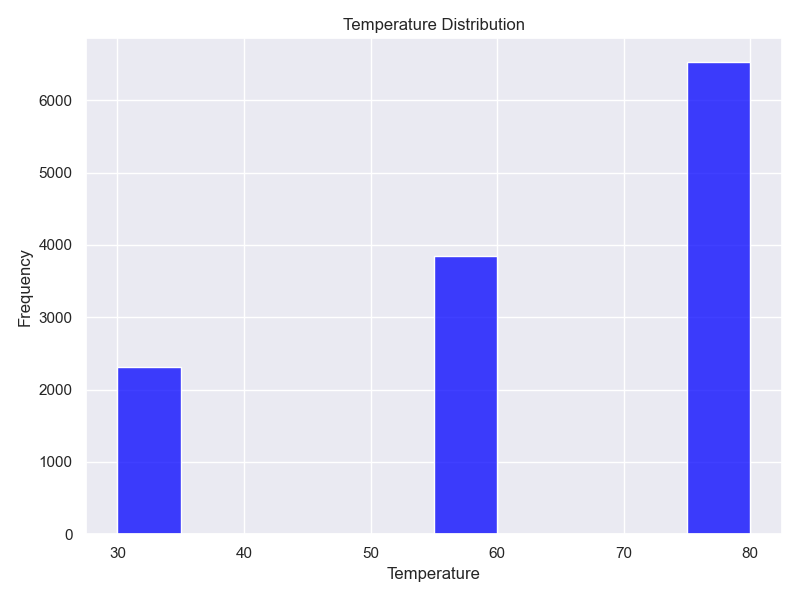
                <em>Figure: Temperature Distribution</em>
            </td>
        </tr>
    </table>
</div>

## Temperature Frequencies

The dataset contains only three distinct temperatures, each occurring with the following frequencies:

| Temperature (°F) | Frequency |
| ---------------- | --------- |
| 80°F             | 6528 |
| 55°F             | 3840 |
| 30°F             | 2316 |

### Insights
- **80°F**: This temperature appears 6528 times, indicating a prevalence of hot weather days in the dataset.
- **55°F**: Recorded 3840 times, representing moderate or mild weather conditions.
- **30°F**: Occurs 2316 times, suggesting fewer instances of cold weather.

This histogram highlights the dominance of higher temperatures (80°F) over milder (55°F) and colder days (30°F), potentially influencing the coupon acceptance rate, especially for outdoor or seasonal venues.




In [41]:
# 6. Use a histogram to visualize the temperature column.
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['temperature'], bins=10, kde=False, color='blue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.tight_layout()
buffer.seek(0)
plt.savefig(buffer, format='png')
plt.close()

# Encode the first plot image as a base64 string
temp_histogram_image64 = base64.b64encode(buffer.getvalue()).decode()



temperature_counts = df_cleaned['temperature'].value_counts()

markdown_text = f"""
# 6. Temperature Distribution Analysis

In this section, we explore the distribution of temperatures in our dataset. The histogram reveals that temperature values are discrete, with only three distinct temperatures recorded.

## Visualizing Temperature Distribution

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{temp_histogram_image64}" alt="Temperature Distribution" style="width: 100%;"/>
                <em>Figure: Temperature Distribution</em>
            </td>
        </tr>
    </table>
</div>

## Temperature Frequencies

The dataset contains only three distinct temperatures, each occurring with the following frequencies:

| Temperature (°F) | Frequency |
| ---------------- | --------- |
| 80°F             | {temperature_counts[80]} |
| 55°F             | {temperature_counts[55]} |
| 30°F             | {temperature_counts[30]} |

### Insights
- **80°F**: This temperature appears 6528 times, indicating a prevalence of hot weather days in the dataset.
- **55°F**: Recorded 3840 times, representing moderate or mild weather conditions.
- **30°F**: Occurs 2316 times, suggesting fewer instances of cold weather.

This histogram highlights the dominance of higher temperatures (80°F) over milder (55°F) and colder days (30°F), potentially influencing the coupon acceptance rate, especially for outdoor or seasonal venues.


"""

display(Markdown(markdown_text))



# 7. Comprehensive Analysis of Bar Coupons

In this section, we embark on an in-depth analysis of bar-related coupons. Our focus is to understand the acceptance patterns of these coupons, assessing how different customer attributes and behaviors influence their decisions. This thorough examination aims to provide valuable insights into the effectiveness of bar coupons and strategies for optimizing their impact.

## 7.1 Overall Bar Coupon Acceptance Rate

We begin our exploration by examining the overall acceptance rate of bar coupons.

- **Total Bar Coupons**: There were 2017 bar coupon offers in our dataset.
- **Accepted Bar Coupons**: Out of these, 827 were accepted, translating to an acceptance rate of 41.00%.
- **Contextual Comparison**: Compared to the total of 12684 coupon offers, with a general acceptance rate of 56.84%, both the acceptance rate and the frequency of bar coupon offers are relatively low.

This initial finding suggests the need for a more nuanced analysis to understand the factors influencing the acceptance of bar coupons. Subsequent sections will delve into specific aspects of bar coupon usage, considering various customer attributes and behaviors.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                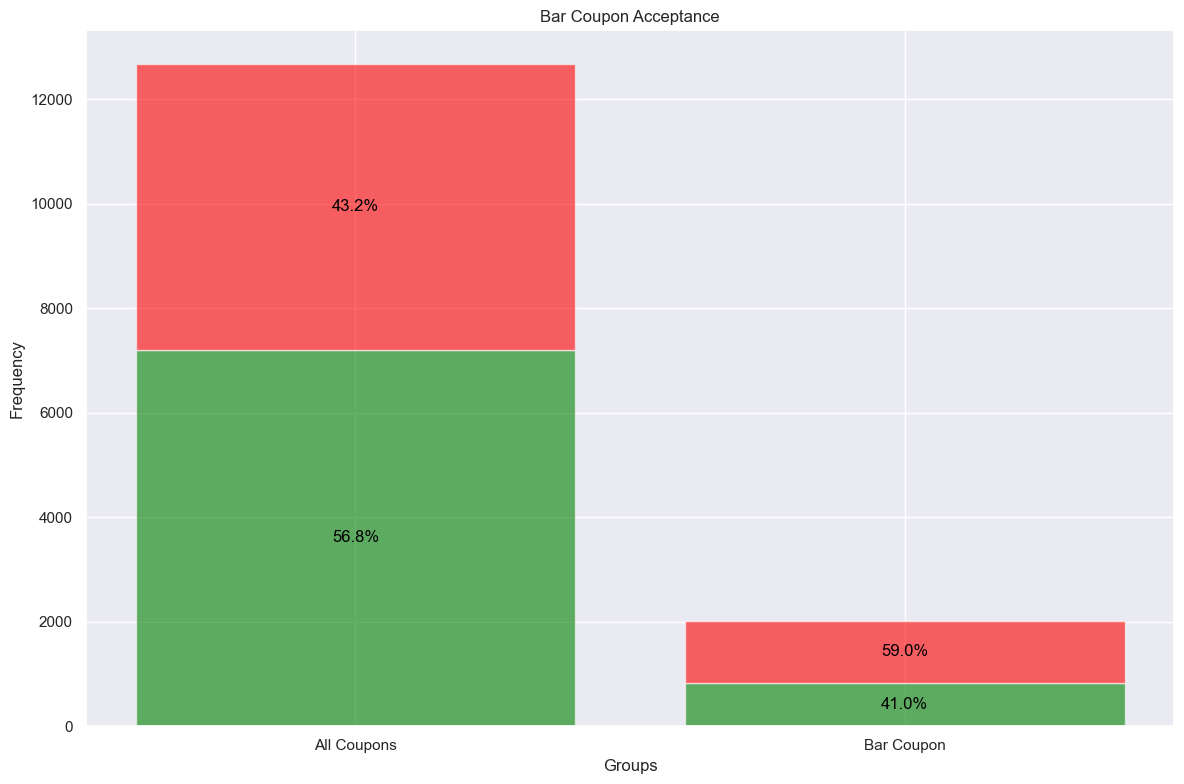
                <em>Figure: Overall Acceptance Rate of Bar Coupons</em>
            </td>
        </tr>
    </table>
</div>





In [42]:

bar_filter = df_cleaned.eval("coupon == 'Bar'")
df_bar = df_cleaned.query("coupon == 'Bar'")

total_count = len(df_cleaned)
bar_total_count = len(df_bar)
bar_frequency_count = df_bar['Y'].value_counts()
bar_proportion_data = bar_frequency_count / len(df_bar)

filters = [None, bar_filter]
filter_labels = ['All Coupons', 'Bar Coupon']

bar_coupon_overall_acceptance_image64, result_df = create_stacked_bar_plot_with_filters(filters, filter_labels, "Bar Coupon Acceptance", None, df_cleaned, rotation=0, yscale='linear')


markdown_text = f"""

# 7. Comprehensive Analysis of Bar Coupons

In this section, we embark on an in-depth analysis of bar-related coupons. Our focus is to understand the acceptance patterns of these coupons, assessing how different customer attributes and behaviors influence their decisions. This thorough examination aims to provide valuable insights into the effectiveness of bar coupons and strategies for optimizing their impact.

## 7.1 Overall Bar Coupon Acceptance Rate

We begin our exploration by examining the overall acceptance rate of bar coupons.

- **Total Bar Coupons**: There were {result_df.at[1, 'total_count']} bar coupon offers in our dataset.
- **Accepted Bar Coupons**: Out of these, {result_df.at[1, 'accept_count']} were accepted, translating to an acceptance rate of {result_df.at[1, 'accept_percentage']:.2f}%.
- **Contextual Comparison**: Compared to the total of {result_df.at[0, 'total_count']} coupon offers, with a general acceptance rate of {result_df.at[0, 'accept_percentage']:.2f}%, both the acceptance rate and the frequency of bar coupon offers are relatively low.

This initial finding suggests the need for a more nuanced analysis to understand the factors influencing the acceptance of bar coupons. Subsequent sections will delve into specific aspects of bar coupon usage, considering various customer attributes and behaviors.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{bar_coupon_overall_acceptance_image64}" alt="Bar Coupons Acceptance Rate" style="width: 100%;"/>
                <em>Figure: Overall Acceptance Rate of Bar Coupons</em>
            </td>
        </tr>
    </table>
</div>



"""

display(Markdown(markdown_text))



# 7.2 Acceptance Rate Comparison Based on Bar Visit Frequency

## Overview

In this analysis, we focus on how the frequency of bar visits influences the acceptance of bar coupons. We observed the following from a total of **2017** bar coupons issued:

- **1818** coupons were offered to drivers who visited the bar more than 3 times a month. The acceptance rate for this group was **37.07%**.
- **199** coupons were offered to drivers who visited the bar 3 or fewer times a month, with an acceptance rate of **76.88%**.

## Observations and Insights

The distribution of bar coupons shows a notable disparity based on the frequency of bar visits:

1. **High Acceptance but Low Distribution**: 
   - For drivers visiting the bar more than 3 times a month, the acceptance rate is significantly high (**37.07%**), but only a small fraction of coupons (**1818** out of 2017) targeted this group.
2. **Lower Acceptance with Higher Distribution**: 
   - The majority of coupons were issued to drivers visiting the bar 3 or fewer times a month, a segment with a comparatively lower acceptance rate of **76.88%**, accounting for **199** coupons.

## Further Analysis On All Bar Visit Frequencies

An extended analysis covering all bar visit frequencies revealed that:

- Drivers visiting bars 1-3 times a month also showed a notable acceptance rate. The exact number of coupons offered to this group was **397** with an acceptance rate of **64.74%**.
- Drivers visiting bars 4-8 times a month were offered **150** coupons, with an acceptance rate of **78.00%**.
- Drivers visiting bars more than 8 times a month were offered **49** coupons, with an acceptance rate of **73.47%**.

Generally, bar visitors tend to accept more bar coupons, with the acceptance rate increasing alongside visit frequency.

## Recommendations

- **Target Frequent Bar Visitors**: Enhance the distribution of bar coupons to frequent visitors to capitalize on their higher acceptance rate. This strategy could improve overall coupon utilization and optimize the marketing budget.
- **Optimize Coupon Distribution Strategy**: Align the distribution of coupons more closely with customer visit frequencies. This might involve reducing the number of coupons sent to infrequent visitors in favor of those more likely to accept.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                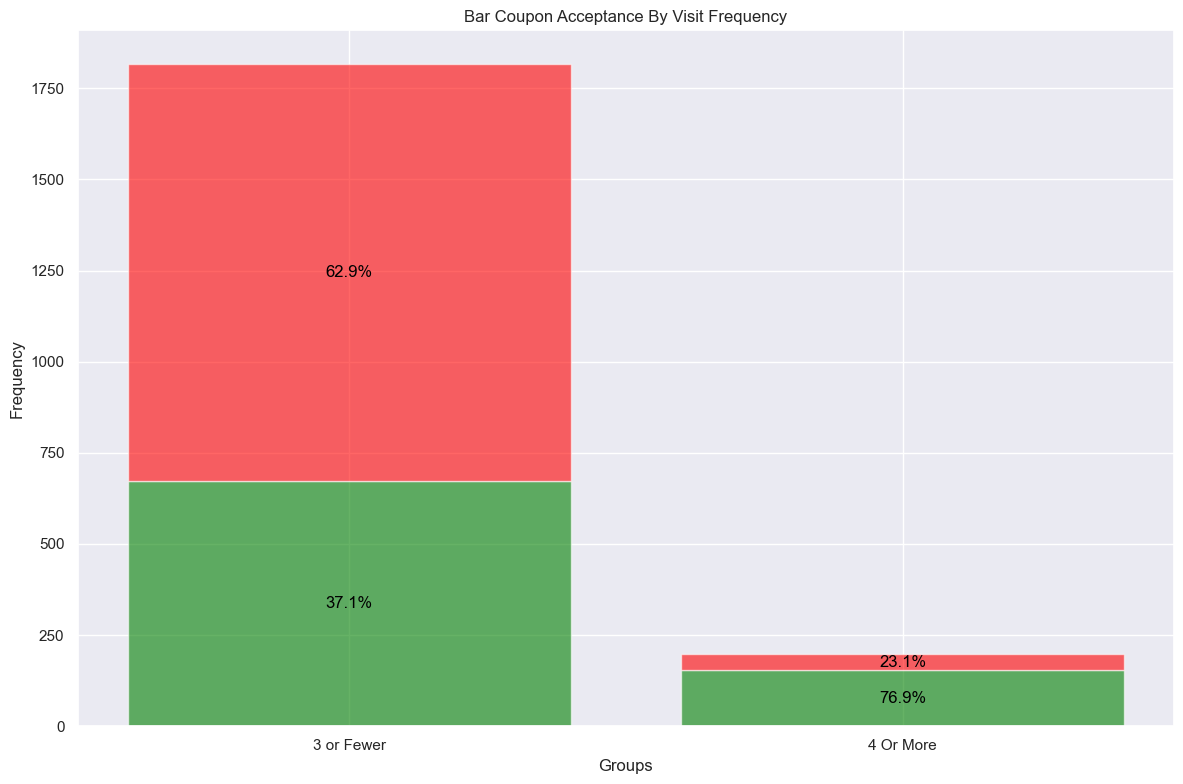
                <em>Figure: Bar Coupons Acceptance Rate by Visit Frequency</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: center;">
                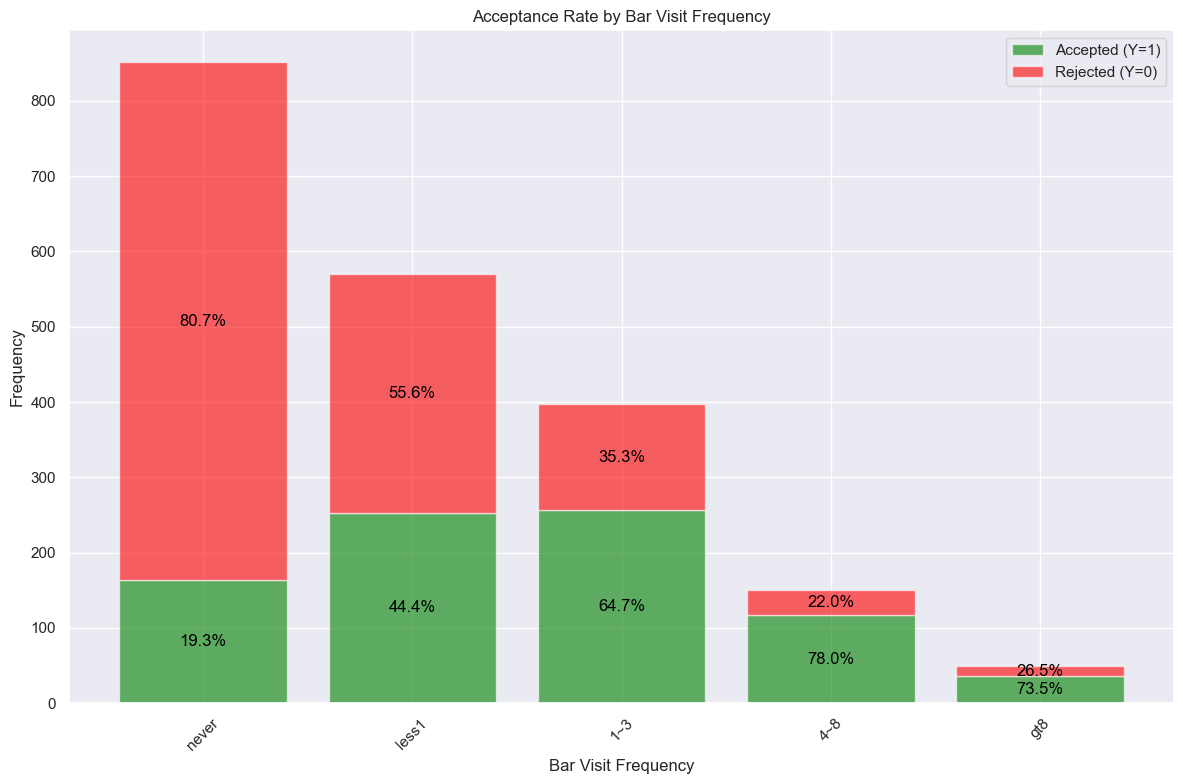
                <em>Figure: Bar Coupon Acceptance Rate by Visit Frequency</em>
            </td>
        </tr>
    </table>
</div>

    


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import base64

def create_stacked_bar_plot_multi1(grouping_columns, plot_title, df_cleaned, rotation=0, yscale='linear', ordering=None):

    # Ensure grouping_columns is a list
    if not isinstance(grouping_columns, list):
        grouping_columns = [grouping_columns]

    # Preparing the data
    acceptance_counts = df_cleaned.groupby(grouping_columns + ['Y']).size().unstack().fillna(0)
    total_responses = acceptance_counts.sum(axis=1)
    percentages = acceptance_counts.divide(total_responses, axis=0) * 100

    # Create the stacked bar plot
    plt.figure(figsize=(12, 8))

    # Apply ordering if provided
    if ordering:
        acceptance_counts = acceptance_counts.reindex(ordering)

    # Create a list to accumulate results
    results_list = []

    # Plotting each segment with actual counts
    for index, row in acceptance_counts.iterrows():
        category_label = str(index)  # Convert tuple to string for labeling
        total_count = row.sum()
        accept_count = row.get(1, 0)
        reject_count = row.get(0, 0)

        # Percentages for annotation
        accept_percentage = (accept_count / total_count) * 100
        reject_percentage = (reject_count / total_count) * 100

        # Append results for this category
        results_list.append({
            'category_label': category_label,
            'total_count': total_count,
            'accept_count': accept_count,
            'reject_count': reject_count,
            'accept_percentage': accept_percentage,
            'reject_percentage': reject_percentage
        })

        plt.bar(category_label, accept_count, label='Accepted (Y=1)' if index == acceptance_counts.index[0] else "",
                color='green', alpha=0.6)
        plt.bar(category_label, reject_count, bottom=accept_count,
                label='Rejected (Y=0)' if index == acceptance_counts.index[0] else "", color='red', alpha=0.6)

        # Annotating the bars with percentages
        if accept_count > 0:
            plt.text(category_label, accept_count / 2, f'{accept_percentage:.1f}%', ha='center', va='center',
                     color='black')
        if reject_count > 0:
            plt.text(category_label, accept_count + reject_count / 2, f'{reject_percentage:.1f}%', ha='center',
                     va='center', color='black')

    plt.xticks(rotation=rotation)
    plt.title(plot_title)
    plt.ylabel('Frequency')
    plt.xlabel(' & '.join(grouping_columns))
    plt.legend()
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)  # Adjust bottom margin

    # Save the plot as a base64 encoded image
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    image_base64 = base64.b64encode(buffer.read()).decode()
    buffer.close()

    # Convert the results list to a DataFrame
    results_df = pd.DataFrame(results_list)

    return image_base64, results_df


# Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
query_string1="Bar in ['never', 'less1', '1~3', 'no answer']"
filter_3_or_fewer = df_bar.eval(query_string1)
query_string2="Bar not in ['never', 'less1', '1~3', 'no answer']"
filter_4_or_more = df_bar.eval(query_string2)

filters = [filter_3_or_fewer, filter_4_or_more]
filter_labels = ['3 or Fewer', '4 Or More']

bar_coupon_by_visits_image64, result_df1 = create_stacked_bar_plot_with_filters(filters, filter_labels, "Bar Coupon Acceptance By Visit Frequency", None, df_bar, rotation=0, yscale='linear')




def bar_visit_category(visit):
    if visit in ['never','no answer']:
        return 'never'
    else: 
        return visit
    
df_bar_tmp = df_bar.copy()
df_bar_tmp['Bar Visit Frequency'] = df_bar['Bar'].apply(bar_visit_category)
bar_category_image64, result_df2 = create_stacked_bar_plot_multi(['Bar Visit Frequency'], 'Acceptance Rate by Bar Visit Frequency',df_bar_tmp,45,'linear',['never','less1','1~3','4~8', 'gt8'])

markdown_text = f"""
# 7.2 Acceptance Rate Comparison Based on Bar Visit Frequency

## Overview

In this analysis, we focus on how the frequency of bar visits influences the acceptance of bar coupons. We observed the following from a total of **2017** bar coupons issued:

- **{result_df1['total_count'][0]}** coupons were offered to drivers who visited the bar more than 3 times a month. The acceptance rate for this group was **{result_df1['accept_percentage'][0]:.2f}%**.
- **{result_df1['total_count'][1]}** coupons were offered to drivers who visited the bar 3 or fewer times a month, with an acceptance rate of **{result_df1['accept_percentage'][1]:.2f}%**.

## Observations and Insights

The distribution of bar coupons shows a notable disparity based on the frequency of bar visits:

1. **High Acceptance but Low Distribution**: 
   - For drivers visiting the bar more than 3 times a month, the acceptance rate is significantly high (**{result_df1['accept_percentage'][0]:.2f}%**), but only a small fraction of coupons (**{result_df1['total_count'][0]}** out of 2017) targeted this group.
2. **Lower Acceptance with Higher Distribution**: 
   - The majority of coupons were issued to drivers visiting the bar 3 or fewer times a month, a segment with a comparatively lower acceptance rate of **{result_df1['accept_percentage'][1]:.2f}%**, accounting for **{result_df1['total_count'][1]}** coupons.

## Further Analysis On All Bar Visit Frequencies

An extended analysis covering all bar visit frequencies revealed that:

- Drivers visiting bars 1-3 times a month also showed a notable acceptance rate. The exact number of coupons offered to this group was **{result_df2['total_count'][2]}** with an acceptance rate of **{result_df2['accept_percentage'][2]:.2f}%**.
- Drivers visiting bars 4-8 times a month were offered **{result_df2['total_count'][3]}** coupons, with an acceptance rate of **{result_df2['accept_percentage'][3]:.2f}%**.
- Drivers visiting bars more than 8 times a month were offered **{result_df2['total_count'][4]}** coupons, with an acceptance rate of **{result_df2['accept_percentage'][4]:.2f}%**.

Generally, bar visitors tend to accept more bar coupons, with the acceptance rate increasing alongside visit frequency.

## Recommendations

- **Target Frequent Bar Visitors**: Enhance the distribution of bar coupons to frequent visitors to capitalize on their higher acceptance rate. This strategy could improve overall coupon utilization and optimize the marketing budget.
- **Optimize Coupon Distribution Strategy**: Align the distribution of coupons more closely with customer visit frequencies. This might involve reducing the number of coupons sent to infrequent visitors in favor of those more likely to accept.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{bar_coupon_by_visits_image64}" alt="Bar Coupons Acceptance Rate" style="width: 100%;"/>
                <em>Figure: Bar Coupons Acceptance Rate by Visit Frequency</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{bar_category_image64}" alt="Bar Coupon Acceptance Rate by Visit Frequency" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rate by Visit Frequency</em>
            </td>
        </tr>
    </table>
</div>

    
"""

display(Markdown(markdown_text))



# 7.3 Deeper Dive into Bar Coupon Acceptance Patterns

## 7.3.1 Acceptance Rate Among Frequent Bar Visitors Aged Over 25

### Overview
This analysis focuses on the acceptance rate of bar coupons among drivers older than 25 who frequently visit bars. 

- **Total Coupons to Frequent Visitors Over 25**: **420**
- **Acceptance Rate**: 69.5%

- **Total Coupons to Other Drivers**: **1597**
- **Acceptance Rate**: 33.5%

### Observations
The analysis reveals a higher acceptance rate among drivers over 25 who frequently visit bars. However, a smaller proportion of coupons were targeted at this demographic.

### Recommendations
- **Increase Coupons for Frequent Visitors Over 25**: Given the higher acceptance rates, more bar coupons should be targeted at this group.
- **Reevaluate Distribution to Other Drivers**: The lower acceptance rate among other drivers suggests a need to reassess the targeting strategy for bar coupons.

<div align="center">
    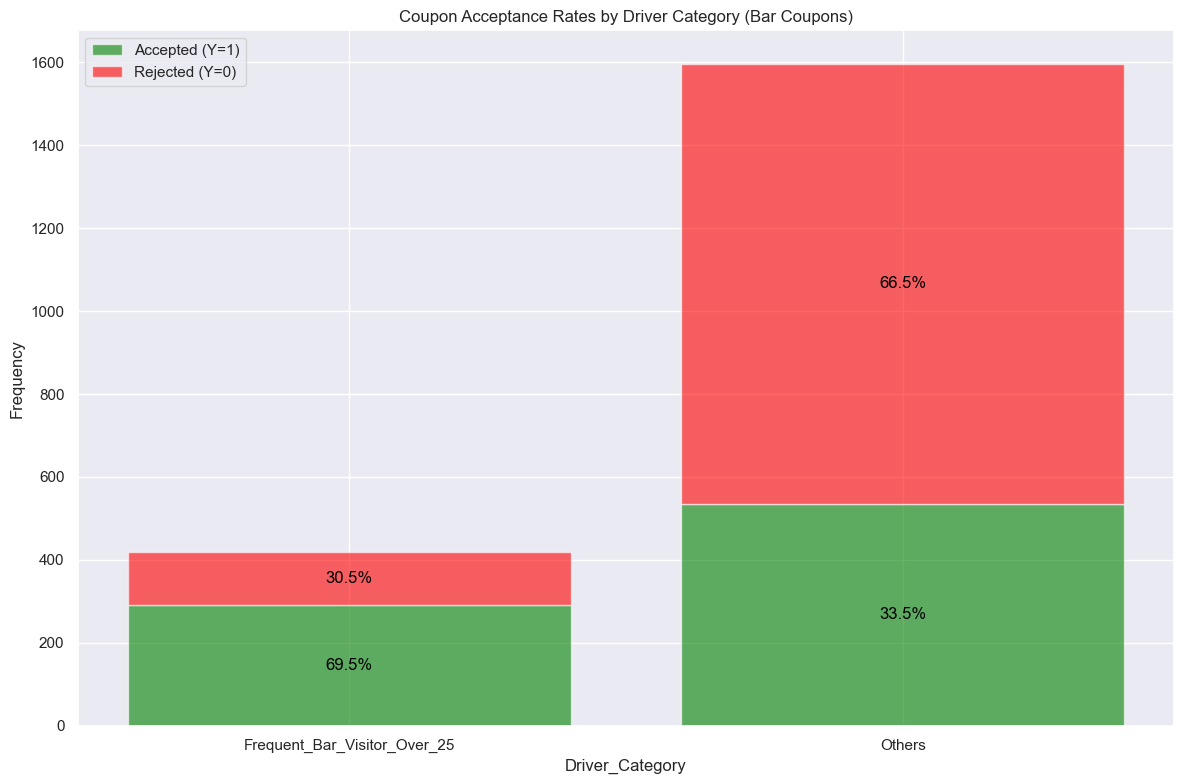
    <em>Figure: Bar Coupon Acceptance Rate Among Frequent Bar Visitors Aged Over 25</em>
</div>

<br>

## 7.3.2 Acceptance Rate by Bar Visit Frequency

### Overview
This analysis investigates the acceptance rates of bar coupons across different frequencies of bar visits.

<div align="center">
    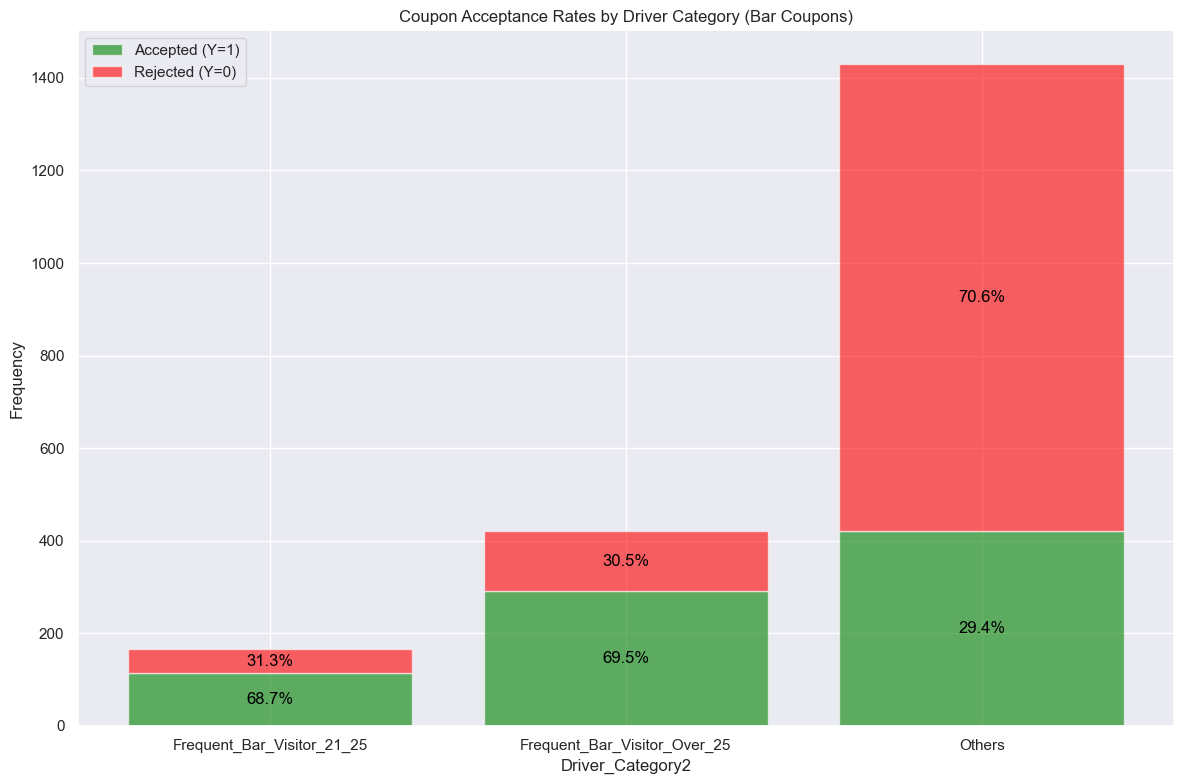
    <em>Figure: Bar Coupon Acceptance Rate by Bar Visit Frequency</em>
</div>

<div align="center">
    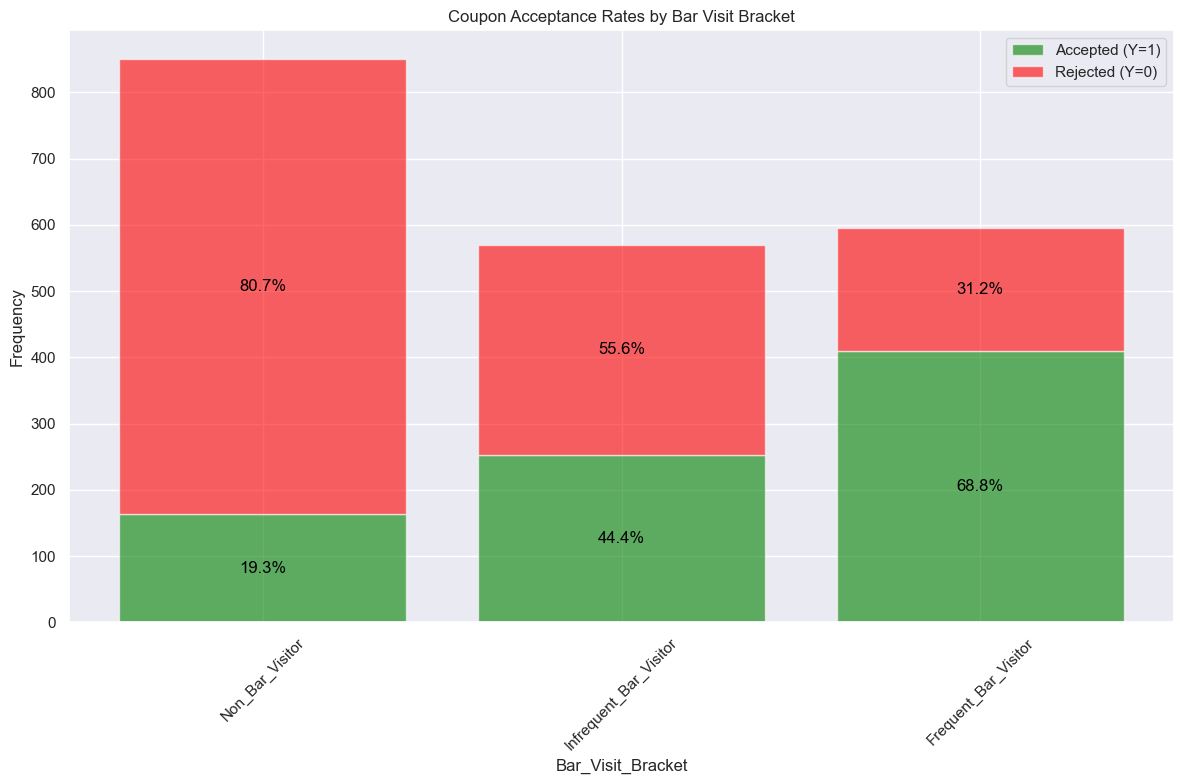
    <em>Figure: Bar Coupon Acceptance Rate by Visit Frequency</em>
</div>

### Insights
The analysis reveals that the frequency of bar visits is a more significant factor in determining coupon acceptance than age. Drivers who frequently visit bars show higher acceptance rates, regardless of their age group. This includes both the 21-25 age group and those over 25. Therefore, targeting strategies for bar coupons should focus primarily on how often individuals visit bars, rather than their age.

### Recommendations
- **Focus on Frequent Bar Visitors**: Enhance marketing strategies to target individuals who frequently visit bars, as they are more likely to accept bar coupons.
- **Adjust Age Targeting**: Given that bar visit frequency is a stronger indicator than age, consider adjusting the targeting criteria to focus less on age and more on visit frequency.

<br>

## 7.3.3 Acceptance Rate by Age Group Among Bar Visitors

### Overview
This section examines the acceptance rates of bar coupons across different age groups, focusing exclusively on individuals who frequent bars.

<div align="center">
    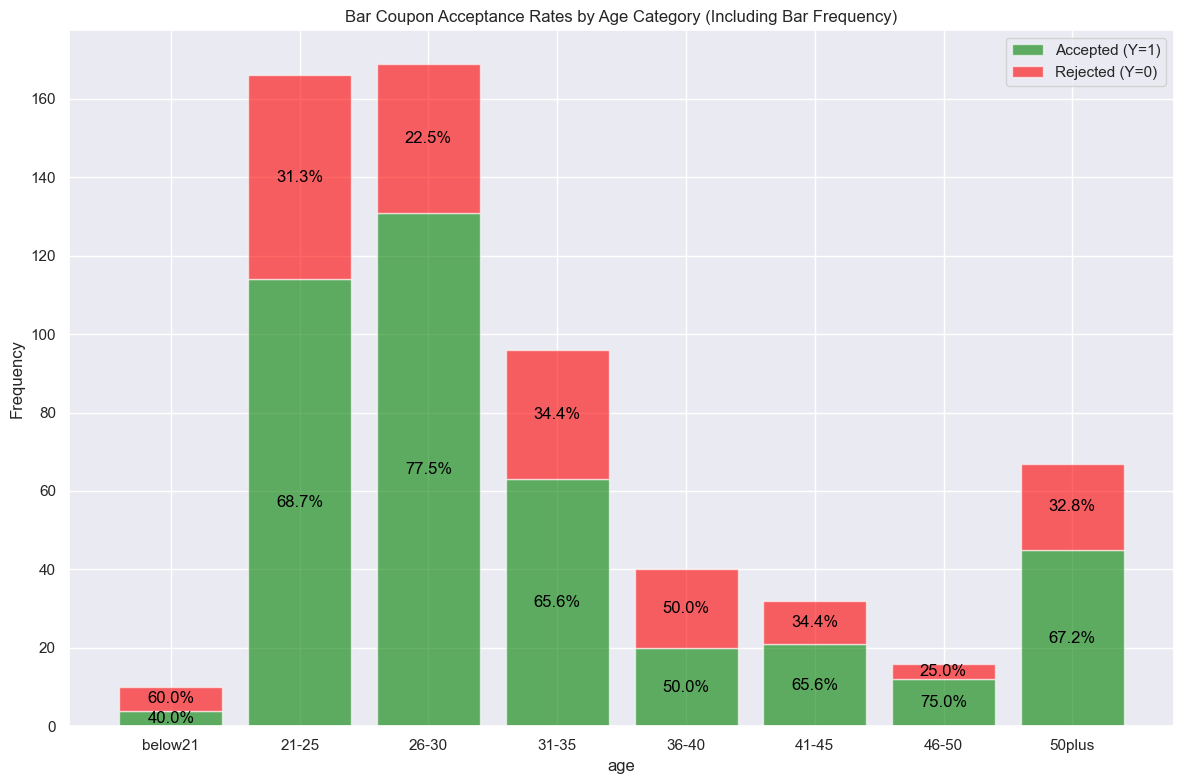
    <em>Figure: Bar Coupon Acceptance Rate by Age Group Among Bar Visitors</em>
</div>

### Observations
- **Under-21 Drivers**: Despite being under 21, a 9 bar coupons were offered to these drivers, and 40% of them accepted. This raises ethical concerns, considering the legal drinking age in many regions.
- **Ages 26-30**: Among bar visitors, this age group shows the highest acceptance rate, indicating a strong interest in bar-related activities and promotions.
- **Other Age Groups**: There is varied acceptance across different age groups among bar visitors, with certain older groups also showing significant interest in bar coupons.

### Recommendations
- **Target Age-Appropriate Groups**: Focus on age groups that are legally permitted to consume alcohol, particularly those showing higher acceptance rates, such as individuals over 25.
- **Reevaluate Offers to Under-21 Group**: Carefully assess the ethical and legal implications of targeting under-21 drivers with bar-related promotions, considering the legal drinking age restrictions.
- **Customize Strategies for Different Age Groups**: Tailor bar coupon offers based on the preferences and legal eligibility of different age groups to maximize acceptance and adherence to regulations.



In [44]:
def categorize_driver(row):
    # Condition for the specific group
    if row['Bar'] not in ['never', 'less1', 'no answer'] and row['age'] not in ['below21','21-25']:
        return 'Frequent_Bar_Visitor_Over_25'
    else:
        return 'Others'

def categorize_driver1(row):
    # Condition for the specific group
    if row['Bar']  in ['never',  'no answer']:
        return 'Non_Bar_Visitor'
    elif row['Bar'] =='less1':
         return 'Infrequent_Bar_Visitor'
    else:
        return 'Frequent_Bar_Visitor'
    
def categorize_driver2(row):
    # Condition for the specific group
    if row['Bar'] not in ['never', 'less1', 'no answer'] and row['age'] not in ['below21','21-25']:
        return 'Frequent_Bar_Visitor_Over_25'
    elif row['Bar'] not in ['never', 'less1', 'no answer'] and row['age'] == '21-25':
        return 'Frequent_Bar_Visitor_21_25'
    else:
        return 'Others'
    
# Applying the function to create a new category
df_bar1 = df_bar.copy()
df_bar1['Driver_Category'] = df_bar1.apply(categorize_driver, axis=1)
df_bar1['Driver_Category2'] = df_bar1.apply(categorize_driver2, axis=1)
df_bar1['Bar_Visit_Bracket'] = df_bar1.apply(categorize_driver1, axis=1)
drv_cat_values =df_bar1['Driver_Category'].value_counts()

bar_above_25_2_image64, above_25_df = create_stacked_bar_plot_multi(['Driver_Category'], "Coupon Acceptance Rates by Driver Category (Bar Coupons)",df_bar1)
bar_category2_image64,driver_category_df = create_stacked_bar_plot_multi(['Driver_Category2'], "Coupon Acceptance Rates by Driver Category (Bar Coupons)",df_bar1)

bar_visit_image64,bar_visit_category_df =  create_stacked_bar_plot_multi(['Bar_Visit_Bracket'], "Coupon Acceptance Rates by Bar Visit Bracket",df_bar1,45,'linear',['Non_Bar_Visitor','Infrequent_Bar_Visitor','Frequent_Bar_Visitor'])



df_bar_age=df_cleaned.query("coupon == 'Bar' and Bar not in ['never', 'less1', 'no answer'] ").copy()

# df_bar1['Driver_Category1'] = df_bar1.apply(categorize_driver1, axis=1)
# df_bar_age=df_bar1.query("Driver_Category1 == 'Frequent_Bar_Visitor'")

# Applying the updated categorization function

age_cat_values=df_bar_age['age'] .value_counts()
ordering = ['below21','21-25','26-30','31-35','36-40','41-45','46-50','50plus']

ordering = ['below21',
            '21-25', 
            '26-30', 
            '31-35', 
            '36-40',
            '41-45',
            '46-50',
            '50plus']
# Encode the first plot image as a base64 string
bar_acceptance_by_age_image64, _ =  create_stacked_bar_plot_multi(['age'], "Bar Coupon Acceptance Rates by Age Category (Including Bar Frequency)",df_bar_age,0,'linear',ordering)



markdown_text = f"""
# 7.3 Deeper Dive into Bar Coupon Acceptance Patterns

## 7.3.1 Acceptance Rate Among Frequent Bar Visitors Aged Over 25

### Overview
This analysis focuses on the acceptance rate of bar coupons among drivers older than 25 who frequently visit bars. 

- **Total Coupons to Frequent Visitors Over 25**: **{drv_cat_values['Frequent_Bar_Visitor_Over_25']}**
- **Acceptance Rate**: 69.5%

- **Total Coupons to Other Drivers**: **{drv_cat_values['Others']}**
- **Acceptance Rate**: 33.5%

### Observations
The analysis reveals a higher acceptance rate among drivers over 25 who frequently visit bars. However, a smaller proportion of coupons were targeted at this demographic.

### Recommendations
- **Increase Coupons for Frequent Visitors Over 25**: Given the higher acceptance rates, more bar coupons should be targeted at this group.
- **Reevaluate Distribution to Other Drivers**: The lower acceptance rate among other drivers suggests a need to reassess the targeting strategy for bar coupons.

<div align="center">
    <img src="data:image/png;base64,{bar_above_25_2_image64}" alt="Bar Coupon Acceptance Rate Among Frequent Bar Visitors Aged Over 25" />
    <em>Figure: Bar Coupon Acceptance Rate Among Frequent Bar Visitors Aged Over 25</em>
</div>

<br>

## 7.3.2 Acceptance Rate by Bar Visit Frequency

### Overview
This analysis investigates the acceptance rates of bar coupons across different frequencies of bar visits.

<div align="center">
    <img src="data:image/png;base64,{bar_category2_image64}" alt="Bar Coupon Acceptance Rate by Driver Category" />
    <em>Figure: Bar Coupon Acceptance Rate by Bar Visit Frequency</em>
</div>

<div align="center">
    <img src="data:image/png;base64,{bar_visit_image64}" alt="Bar Coupon Acceptance Rate by Visit Frequency" />
    <em>Figure: Bar Coupon Acceptance Rate by Visit Frequency</em>
</div>

### Insights
The analysis reveals that the frequency of bar visits is a more significant factor in determining coupon acceptance than age. Drivers who frequently visit bars show higher acceptance rates, regardless of their age group. This includes both the 21-25 age group and those over 25. Therefore, targeting strategies for bar coupons should focus primarily on how often individuals visit bars, rather than their age.

### Recommendations
- **Focus on Frequent Bar Visitors**: Enhance marketing strategies to target individuals who frequently visit bars, as they are more likely to accept bar coupons.
- **Adjust Age Targeting**: Given that bar visit frequency is a stronger indicator than age, consider adjusting the targeting criteria to focus less on age and more on visit frequency.

<br>

## 7.3.3 Acceptance Rate by Age Group Among Bar Visitors

### Overview
This section examines the acceptance rates of bar coupons across different age groups, focusing exclusively on individuals who frequent bars.

<div align="center">
    <img src="data:image/png;base64,{bar_acceptance_by_age_image64}" alt="Bar Coupon Acceptance Rate by Age Group Among Bar Visitors" />
    <em>Figure: Bar Coupon Acceptance Rate by Age Group Among Bar Visitors</em>
</div>

### Observations
- **Under-21 Drivers**: Despite being under 21, a 9 bar coupons were offered to these drivers, and 40% of them accepted. This raises ethical concerns, considering the legal drinking age in many regions.
- **Ages 26-30**: Among bar visitors, this age group shows the highest acceptance rate, indicating a strong interest in bar-related activities and promotions.
- **Other Age Groups**: There is varied acceptance across different age groups among bar visitors, with certain older groups also showing significant interest in bar coupons.

### Recommendations
- **Target Age-Appropriate Groups**: Focus on age groups that are legally permitted to consume alcohol, particularly those showing higher acceptance rates, such as individuals over 25.
- **Reevaluate Offers to Under-21 Group**: Carefully assess the ethical and legal implications of targeting under-21 drivers with bar-related promotions, considering the legal drinking age restrictions.
- **Customize Strategies for Different Age Groups**: Tailor bar coupon offers based on the preferences and legal eligibility of different age groups to maximize acceptance and adherence to regulations.

"""

display(Markdown(markdown_text))



# 7.4 Acceptance Rate Among Specific Groups of Bar Visitors
## 7.4.1 Analysis of 'Non_Farmer_No_Kids_Freq_Bar' Category
## Overview

In this section, we analyze bar coupon acceptance among a specific group of drivers: those who frequently visit bars, are not in farming, fishing, or forestry occupations, and do not have kids as passengers. This group is labeled as 'Non_Farmer_No_Kids_Freq_Bar', and we compare their acceptance rates with all other drivers.

### Analysis Criteria
- **'Non_Farmer_No_Kids_Freq_Bar' Category**: Drivers who visit bars more than once a month, are not in farming, fishing, or forestry occupations, and don't have kids as passengers.
- **'Others' Category**: All other drivers.

### Coupon Distribution and Acceptance
- **Total Bar Coupons Issued**: 2017
- **Coupons to 'Non_Farmer_No_Kids_Freq_Bar'**: 551
- **Acceptance Rate for 'Non_Farmer_No_Kids_Freq_Bar'**: 71.3%
- **Coupons to 'Others'**: 1466
- **Acceptance Rate for 'Others'**: 29.6%

### Observations and Insights
1. **Higher Acceptance Among Targeted Group**: The 'Non_Farmer_No_Kids_Freq_Bar' category shows a significantly higher acceptance rate (71.3%), indicating that this group is more receptive to bar coupons.
2. **Contrasting Acceptance in Other Drivers**: The broader 'Others' category exhibits a lower acceptance rate at 29.6%. This group includes a diverse range of drivers, suggesting that factors like age, occupation, and passenger type may influence coupon acceptance.

### Cautionary Note
It's important to note that these results could be misleading. The dataset contains only 43 farmers, of which just 9 were offered bar coupons. This small sample size could skew the results, necessitating further analysis.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                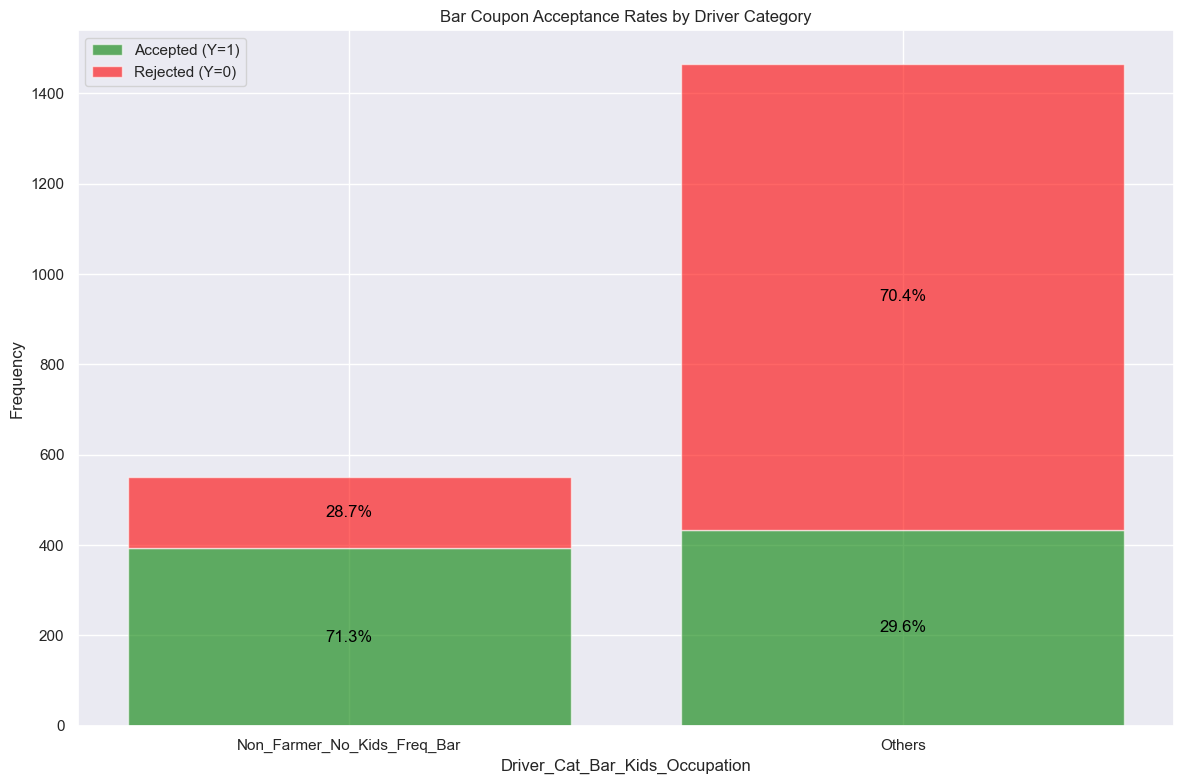
                <em>Figure: Bar Coupon Acceptance Rate by Driver Category</em>
            </td>
        </tr>
    </table>
</div>




In [45]:
# 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 
# Defining the function to categorize drivers
def cat_driver_by_occupation_kids(row):
    # Condition for the specific group
    if (row['Bar'] not in ['never', 'less1', 'no answer'] and 
            row['occupation'] != 'Farming Fishing & Forestry' and 
            row['passenger'] != 'Kid(s)'):
        return 'Non_Farmer_No_Kids_Freq_Bar'
    
    else:
        return 'Others'

    
    
# Applying the function to create a new category
df_bar2 = df_bar.query("coupon == 'Bar'").copy()
df_bar2['Driver_Cat_Bar_Kids_Occupation'] = df_bar2.apply(cat_driver_by_occupation_kids, axis=1)



# Encode the first plot image as a base64 string
Non_Farmer_No_Kids_Freq_Bar1_image64, result_df = create_stacked_bar_plot_multi(['Driver_Cat_Bar_Kids_Occupation'], "Bar Coupon Acceptance Rates by Driver Category",df_bar2)






from IPython.display import Markdown

# Generating the markdown text for the report
markdown_text = f"""
# 7.4 Acceptance Rate Among Specific Groups of Bar Visitors
## 7.4.1 Analysis of 'Non_Farmer_No_Kids_Freq_Bar' Category
## Overview

In this section, we analyze bar coupon acceptance among a specific group of drivers: those who frequently visit bars, are not in farming, fishing, or forestry occupations, and do not have kids as passengers. This group is labeled as 'Non_Farmer_No_Kids_Freq_Bar', and we compare their acceptance rates with all other drivers.

### Analysis Criteria
- **'Non_Farmer_No_Kids_Freq_Bar' Category**: Drivers who visit bars more than once a month, are not in farming, fishing, or forestry occupations, and don't have kids as passengers.
- **'Others' Category**: All other drivers.

### Coupon Distribution and Acceptance
- **Total Bar Coupons Issued**: 2017
- **Coupons to 'Non_Farmer_No_Kids_Freq_Bar'**: 551
- **Acceptance Rate for 'Non_Farmer_No_Kids_Freq_Bar'**: 71.3%
- **Coupons to 'Others'**: 1466
- **Acceptance Rate for 'Others'**: 29.6%

### Observations and Insights
1. **Higher Acceptance Among Targeted Group**: The 'Non_Farmer_No_Kids_Freq_Bar' category shows a significantly higher acceptance rate (71.3%), indicating that this group is more receptive to bar coupons.
2. **Contrasting Acceptance in Other Drivers**: The broader 'Others' category exhibits a lower acceptance rate at 29.6%. This group includes a diverse range of drivers, suggesting that factors like age, occupation, and passenger type may influence coupon acceptance.

### Cautionary Note
It's important to note that these results could be misleading. The dataset contains only 43 farmers, of which just 9 were offered bar coupons. This small sample size could skew the results, necessitating further analysis.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{Non_Farmer_No_Kids_Freq_Bar1_image64}" alt="Bar Coupon Acceptance Rate by Driver Category" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rate by Driver Category</em>
            </td>
        </tr>
    </table>
</div>


"""

# Displaying the markdown report
display(Markdown(markdown_text))




## 7.4.2 Further Analysis of Bar Coupon Acceptance Patterns Among Specific Groups

### Hypothesis Testing: Impact of Specific Occupation and Passengers

In this segment of our analysis, we specifically scrutinize the acceptance patterns of bar coupons among different driver groups. We focus on whether being in a farming, fishing, or forestry occupation, along with the presence of kids as passengers, significantly influences bar coupon acceptance.

#### Group Definitions and Analysis

We categorized drivers into six groups based on their occupation (specifically farming, fishing, and forestry), frequency of bar visits, and whether they had kids as passengers:

1. **Non Farmer, No Kids**: Drivers who frequently visit bars, are not in farming-related occupations, and do not have kids as passengers.
2. **Farmer, No Kids**: Drivers in farming-related occupations, visiting bars less frequently, and without kids as passengers.
3. **Bar Visiting Farmer**: Drivers in farming-related occupations who frequently visit bars.
4. **All Farmers w Bar Coupons**: All drivers in farming-related occupations who received bar coupons.
5. **Bar Visiting No Kids**: Frequent bar-visiting drivers without kids as passengers.
6. **Bar Visiting w Kids**: Frequent bar-visiting drivers with kids as passengers.

#### Acceptance Rates and Frequency

Our analysis yielded the following acceptance rates and frequencies for each group:

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                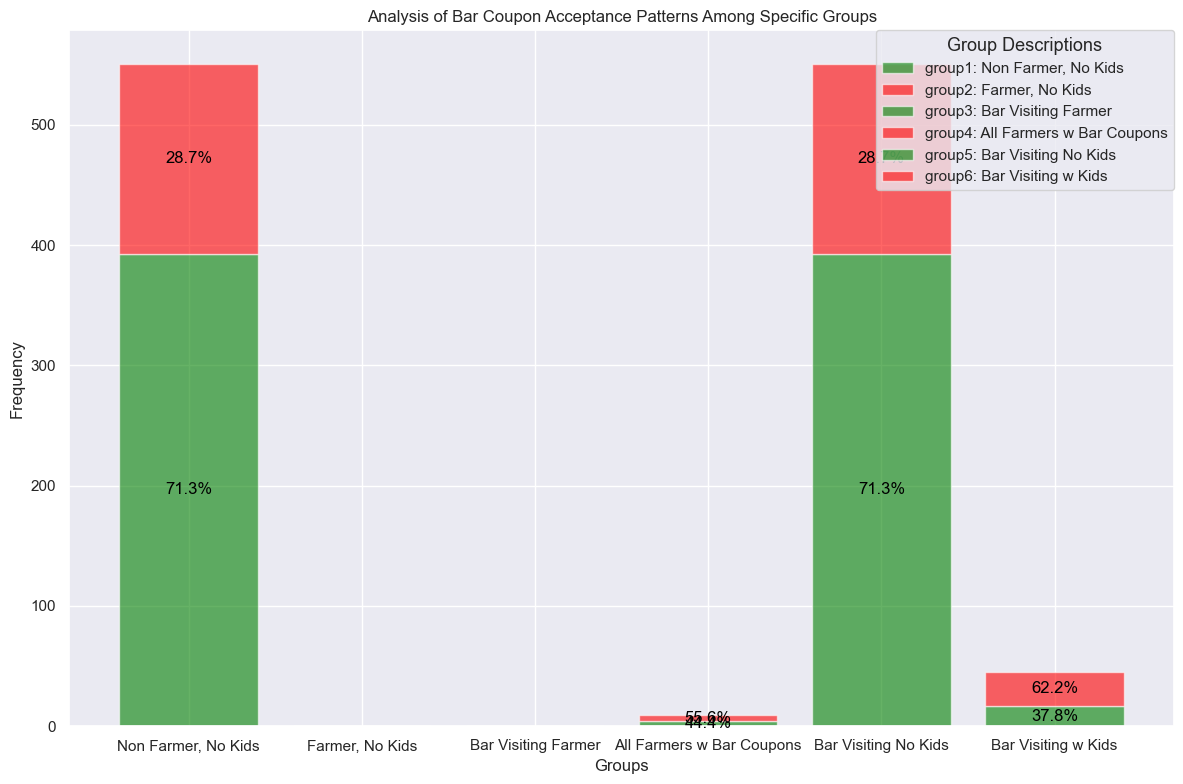
                <em>Figure: Bar Coupon Acceptance Rates By Lifestyle and Demographics</em>
            </td>
        </tr>
    </table>
</div>

| Group Description | Acceptance Rate | Frequency |
|-------------------|-----------------|-----------|
| Non Farmer, No Kids | 71.32% | 551 |
| Farmer, No Kids | N/A | 0 |
| Bar Visiting Farmer | N/A | 0 |
| All Farmers w Bar Coupons | 44.44% | 9 |
| Bar Visiting No Kids | 71.32% | 551 |
| Bar Visiting w Kids | 37.78% | 45 |


#### Observations and Insights

1. **Primary Factor - Frequency of Bar Visits**: The analysis supports our hypothesis that the frequency of bar visits is a more crucial determinant in bar coupon acceptance than the specific occupation of farming, fishing, or forestry, or having kids as passengers.
2. **Insignificant Role of Farming Occupation**: The negligible data for 'Farmer, No Kids' and 'Bar Visiting Farmer' groups, along with low frequency for 'All Farmers w Bar Coupons', indicate that being in a farming-related occupation does not significantly impact coupon acceptance.
3. **Impact of Children as Passengers**: There's a notable difference in acceptance rates between 'Bar Visiting No Kids' (71.32%) and 'Bar Visiting w Kids' (37.78%), suggesting that having kids as passengers influences the decision to accept bar coupons.

#### Concluding Insights

The results conclusively show that bar visit frequency is a more pivotal factor in bar coupon acceptance, overshadowing the specific occupation related to farming or the presence of kids as passengers. Therefore, targeting frequent bar visitors, regardless of their occupation or whether they have kids as passengers, would likely be a more effective approach for bar coupon distribution.

<br><br>



In [46]:
filter_list = {
    "group1": (~df_bar['Bar'].isin(['never', 'less1', 'no answer'])) & (df_bar['passenger'] != 'Kid(s)') & (df_bar['occupation'] != 'Farming Fishing & Forestry'),
    "group2": (~df_bar['Bar'].isin(['never', 'less1', 'no answer'])) & (df_bar['passenger'] != 'Kid(s)') & (df_bar['occupation'] == 'Farming Fishing & Forestry'),
    "group3": (~df_bar['Bar'].isin(['never', 'less1', 'no answer'])) & (df_bar['occupation'] == 'Farming Fishing & Forestry'),
    "group4": (df_bar['occupation'] == 'Farming Fishing & Forestry'),
    "group5": (~df_bar['Bar'].isin(['never', 'less1', 'no answer'])) & (df_bar['passenger'] != 'Kid(s)'),
    "group6": (~df_bar['Bar'].isin(['never', 'less1', 'no answer'])) & (df_bar['passenger'] == 'Kid(s)')
}
filters = [condition for condition in filter_list.values()]

# Dictionary to store acceptance rates and frequency counts
acceptance_rates = {}

# Calculating acceptance rates and frequency for each filter
for group_name, filter_condition in filter_list.items():
    filtered_df = df_bar[filter_condition]
    acceptance_rate = filtered_df['Y'].mean()  # Calculate the mean of 'Y' column
    frequency = len(filtered_df)  # Count the number of rows in the filtered DataFrame
    acceptance_rates[group_name] = {'rate': acceptance_rate, 'frequency': frequency}



group_descriptions = {
    'group1': 'Non Farmer, No Kids',
    'group2': 'Farmer, No Kids',
    'group3': 'Bar Visiting Farmer',
    'group4': 'All Farmers w Bar Coupons',
    'group5': 'Bar Visiting No Kids',
    'group6': 'Bar Visiting w Kids'
    
}





filter_labels = [label for label in group_descriptions.values()]
# filter_labels = ['Non Farmer, No Kids', 'Farmer, No Kids','Bar Visiting Farmer','All Farmers w Bar Coupons','Bar Visiting No Kids','Bar Visiting w Kids']
plot_title = 'Analysis of Bar Coupon Acceptance Patterns Among Specific Groups'

# Correcting the variable name
Farmer_NonFarmer_image64, result_df = create_stacked_bar_plot_with_filters(filters, filter_labels, plot_title, group_descriptions, df_bar, rotation=0, yscale='linear')




markdown_table = "| Group Description | Acceptance Rate | Frequency |\n|-------------------|-----------------|-----------|\n"
for group_id, group_data in acceptance_rates.items():
    description = group_descriptions[group_id]  # Retrieve description
    rate = group_data['rate']
    formatted_rate = "{:.2%}".format(rate) if rate is not None and not math.isnan(rate) else "N/A"
    frequency = group_data['frequency']  # Retrieve frequency
    markdown_table += f"| {description} | {formatted_rate} | {frequency} |\n"


    
markdown_text = f"""

## 7.4.2 Further Analysis of Bar Coupon Acceptance Patterns Among Specific Groups

### Hypothesis Testing: Impact of Specific Occupation and Passengers

In this segment of our analysis, we specifically scrutinize the acceptance patterns of bar coupons among different driver groups. We focus on whether being in a farming, fishing, or forestry occupation, along with the presence of kids as passengers, significantly influences bar coupon acceptance.

#### Group Definitions and Analysis

We categorized drivers into six groups based on their occupation (specifically farming, fishing, and forestry), frequency of bar visits, and whether they had kids as passengers:

1. **Non Farmer, No Kids**: Drivers who frequently visit bars, are not in farming-related occupations, and do not have kids as passengers.
2. **Farmer, No Kids**: Drivers in farming-related occupations, visiting bars less frequently, and without kids as passengers.
3. **Bar Visiting Farmer**: Drivers in farming-related occupations who frequently visit bars.
4. **All Farmers w Bar Coupons**: All drivers in farming-related occupations who received bar coupons.
5. **Bar Visiting No Kids**: Frequent bar-visiting drivers without kids as passengers.
6. **Bar Visiting w Kids**: Frequent bar-visiting drivers with kids as passengers.

#### Acceptance Rates and Frequency

Our analysis yielded the following acceptance rates and frequencies for each group:

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{Farmer_NonFarmer_image64}" alt="Bar Coupon Acceptance Rates By Lifestyle and Demographics" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rates By Lifestyle and Demographics</em>
            </td>
        </tr>
    </table>
</div>

{markdown_table}

#### Observations and Insights

1. **Primary Factor - Frequency of Bar Visits**: The analysis supports our hypothesis that the frequency of bar visits is a more crucial determinant in bar coupon acceptance than the specific occupation of farming, fishing, or forestry, or having kids as passengers.
2. **Insignificant Role of Farming Occupation**: The negligible data for 'Farmer, No Kids' and 'Bar Visiting Farmer' groups, along with low frequency for 'All Farmers w Bar Coupons', indicate that being in a farming-related occupation does not significantly impact coupon acceptance.
3. **Impact of Children as Passengers**: There's a notable difference in acceptance rates between 'Bar Visiting No Kids' (71.32%) and 'Bar Visiting w Kids' (37.78%), suggesting that having kids as passengers influences the decision to accept bar coupons.

#### Concluding Insights

The results conclusively show that bar visit frequency is a more pivotal factor in bar coupon acceptance, overshadowing the specific occupation related to farming or the presence of kids as passengers. Therefore, targeting frequent bar visitors, regardless of their occupation or whether they have kids as passengers, would likely be a more effective approach for bar coupon distribution.

<br><br>

"""
display(Markdown(markdown_text))


<br><br><br><br><br><br>
# 7.5 Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



# 7.5 Acceptance Rate Analysis Based on Lifestyle and Demographic Factors

## Overview

In this section of our comprehensive analysis, we delve into how lifestyle and demographic factors influence the acceptance rates of bar coupons. We examine the role of factors such as frequency of bar visits, age, presence of kids as passengers, regular visits to budget-friendly restaurants, and income levels.

## Methodology

Our approach involved analyzing three distinct driver groups defined by the following criteria:

1. **Group 1**: Drivers who frequently visit bars, do not have kids as passengers, and are not widowed.
2. **Group 2**: Younger drivers (under 30) who frequently visit bars.
3. **Group 3**: Drivers who often dine at inexpensive restaurants and have an income below $50K.

We calculated acceptance rates for each group to understand the impact of these lifestyle and demographic factors on their likelihood of accepting bar coupons.

## Findings

### Distribution and Acceptance Rates

The data yielded the following distribution and acceptance rates:
<br><br>

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                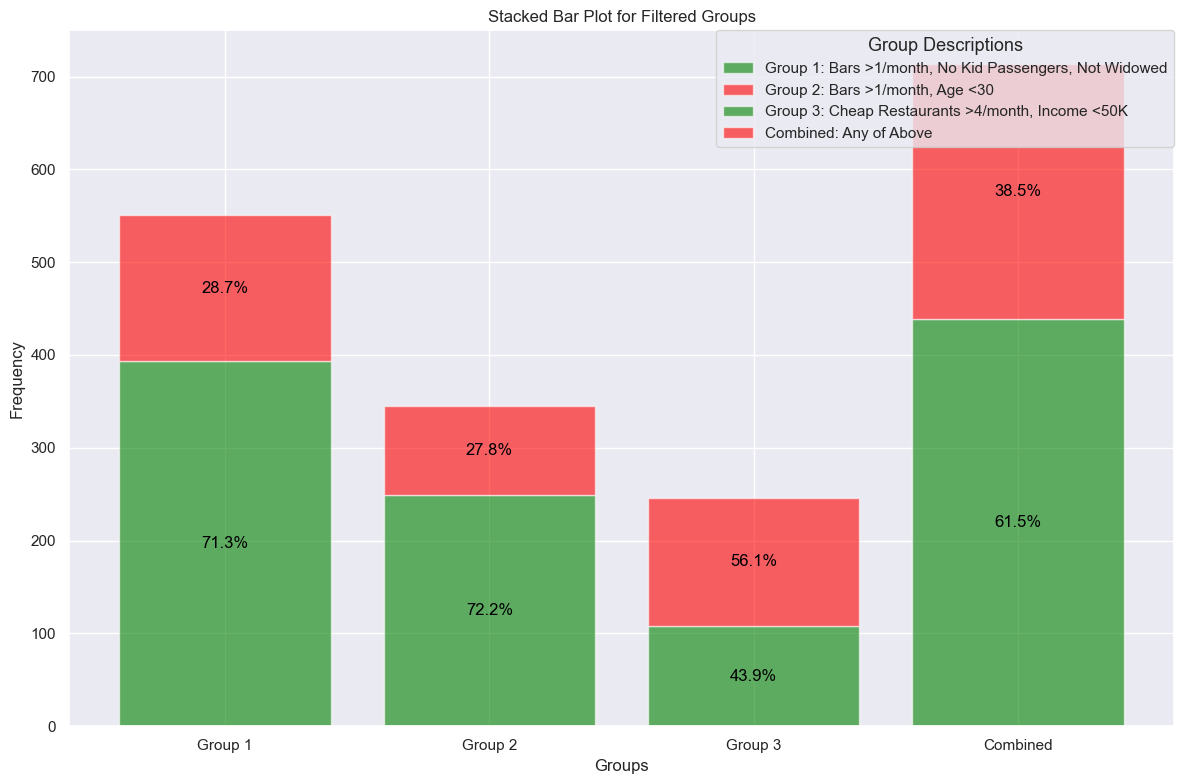
                <em>Figure: Bar Coupon Acceptance Rates By Lifestyle and Demographics</em>
            </td>
        </tr>
    </table>
</div>

| Group    | Count | Acceptance Rate |
|----------|-------|-----------------|
| Group 1  | 551 |71.32%          |
| Group 2  | 345 |72.17%          |
| Group 3  | 246 |43.90%          |
| Combined | 714 | 61.48%          |

### Analysis

Our analysis highlights several key insights:

1. **High Acceptance Among Bar Visitors**: Groups 1 and 2, which consist of frequent bar visitors, exhibit high acceptance rates (over 70%).
2. **Lower Acceptance Among Non-Bar Visitors**: Group 3, which includes non-bar goers, shows a notably lower acceptance rate of 43.90%.
3. **Overriding Influence of Bar Visits**: The 'Bar' attribute seems to be the overriding factor driving higher acceptance rates, overshadowing other attributes like marital status and presence of kids.

To further support this hypothesis, we analyzed the acceptance rate by income specifically for bar goers. The results were consistent, with high acceptance rates across all income brackets.

<div align="center">
    <table>
         <tr>
            <td style="text-align: center;">
                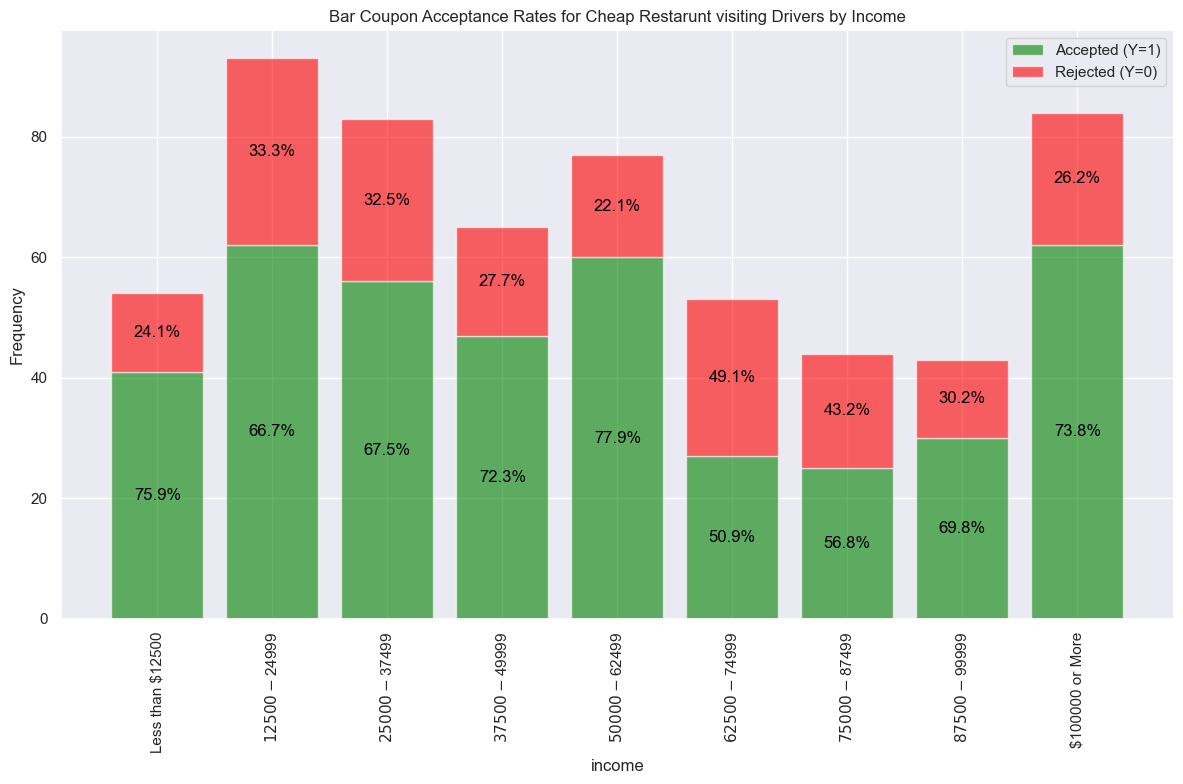
                <em>Figure: Bar Coupon Acceptance Rates By Lifestyle and Demographics</em>
            </td>
        </tr>
    </table>
</div>

## Conclusions

- **Dominant Influence of Bar Visits**: The frequency of bar visits emerges as the primary determinant of bar coupon acceptance, overshadowing other demographic factors.
- **Effective Targeting**: Targeting drivers based on their bar visit frequency is likely to yield higher coupon acceptance rates.

## Recommendations

- **Focus on Frequent Bar Visitors**: Allocate more marketing resources and coupon offers to drivers who frequently visit bars, as they are more likely to accept such coupons.
- **Tailor Marketing for Different Demographics**: While focusing on bar-goers, tailor marketing strategies to cater to different income brackets and lifestyles within this group.
- **Reevaluate Non-Bar Goer Strategies**: Consider revising the approach for non-bar goers, as their acceptance rates are significantly lower.

---

By implementing these strategies, businesses can optimize their marketing efforts and improve the effectiveness of their coupon campaigns.







In [47]:

income_categories_under_50k = ["$25000 - $37499", "$12500 - $24999", "Less than $12500"]

# Creating filters for the specified groups
# group1_filter = (~df_cleaned['Bar'].isin(['never', 'less1', 'no answer'])) & (df_cleaned['passenger'] != 'Kid(s)') & (df_cleaned['maritalStatus'] != 'Widowed')

# group2_filter = (~df_cleaned['Bar'].isin(['never', 'less1', 'no answer']) ) & (df_cleaned['age'] < 30)
# group3_filter = (df_cleaned['coupon'] == 'Bar') & (df_cleaned['RestaurantLessThan20'] > '4') & (df_cleaned['income'].isin(income_categories_under_50k))

query1_string = "(coupon == 'Bar') and (Bar not in ['never', 'less1', 'no answer']) and (passenger != 'Kid(s)') and (maritalStatus != 'Widowed')"
group1_filter = df_cleaned.eval(query1_string)

query2_string = "(coupon == 'Bar') and (Bar not in ['never', 'less1', 'no answer']) and (age in ['below21','21-25','26-30']) "
group2_filter = df_cleaned.eval(query2_string)

query3_string = "(coupon == 'Bar') and  (RestaurantLessThan20 in ['gt8','4~8']) and (income in ['$25000 - $37499', '$12500 - $24999', 'Less than $12500'])"
group3_filter = df_cleaned.eval(query3_string)                                                       


# Calculating acceptance rates for each group

group1_acceptance_rate = df_cleaned[group1_filter]['Y'].mean()
group2_acceptance_rate = df_cleaned[group2_filter]['Y'].mean()
group3_acceptance_rate = df_cleaned[group3_filter]['Y'].mean()

group1_frequency = len(df_cleaned[group1_filter])
group2_frequency = len(df_cleaned[group2_filter])
group3_frequency = len(df_cleaned[group3_filter])

combined_filter = group1_filter | group2_filter | group3_filter
combined_acceptance_rate = df_cleaned[combined_filter]['Y'].mean()
combined_frequency = len(df_cleaned[combined_filter])




# Creating a combined filter for drivers who meet any one of the three conditions


# # Data for plotting
# groups = ['Group 1', 'Group 2', 'Group 3', 'Combined']
# acceptance_rates = [group1_acceptance_rate, group2_acceptance_rate, group3_acceptance_rate, combined_acceptance_rate]
# # Correcting the data preparation for seaborn bar plot
# acceptance_rate_data = pd.DataFrame({
#     'Group': ['Group 1', 'Group 2', 'Group 3', 'Combined'],
#     'Acceptance Rate': [group1_acceptance_rate, group2_acceptance_rate, group3_acceptance_rate, combined_acceptance_rate]
# })

group_descriptions = {
    'Group 1': 'Bars >1/month, No Kid Passengers, Not Widowed',
    'Group 2': 'Bars >1/month, Age <30',
    'Group 3': 'Cheap Restaurants >4/month, Income <50K',
    'Combined': 'Any of Above'
}



filters = [group1_filter, group2_filter, group3_filter, combined_filter]
filter_labels = ['Group 1', 'Group 2', 'Group 3', 'Combined']
plot_title = 'Stacked Bar Plot for Filtered Groups'
Lfstyl_Demogphcs_Bar_image64, result_df1 = create_stacked_bar_plot_with_filters(filters, filter_labels, plot_title, group_descriptions, df_cleaned, rotation=0, yscale='linear')




def cat_coupns_by_bar(row):
    # Condition for the specific group
    if (row['coupon']  =='Bar'):
        return 'Bar Coupon'
    else:
        return 'Other Coupons'
        
query4_string = "  (RestaurantLessThan20 in ['gt8','4~8'])"
df_group4 = df_cleaned.query(query4_string).copy() 
df_group4['Coupon Type']=    df_group4.apply(cat_coupns_by_bar,axis=1)

ordering = [
    'Less than $12500', 
    '$12500 - $24999', 
    '$25000 - $37499',
    '$37500 - $49999', 
    '$50000 - $62499', 
    '$62500 - $74999',
    '$75000 - $87499', 
    '$87500 - $99999', 
    '$100000 or More'
]

Cheap_Restaurnt_Freq_image64,result_df2 = create_stacked_bar_plot_multi(['income'], "Bar Coupon Acceptance Rates for Cheap Restarunt visiting Drivers by Income",df_bar.query("Bar not in ['never', 'less1',  'no answer']"),90,'linear',ordering)


markdown_text = f"""

# 7.5 Acceptance Rate Analysis Based on Lifestyle and Demographic Factors

## Overview

In this section of our comprehensive analysis, we delve into how lifestyle and demographic factors influence the acceptance rates of bar coupons. We examine the role of factors such as frequency of bar visits, age, presence of kids as passengers, regular visits to budget-friendly restaurants, and income levels.

## Methodology

Our approach involved analyzing three distinct driver groups defined by the following criteria:

1. **Group 1**: Drivers who frequently visit bars, do not have kids as passengers, and are not widowed.
2. **Group 2**: Younger drivers (under 30) who frequently visit bars.
3. **Group 3**: Drivers who often dine at inexpensive restaurants and have an income below $50K.

We calculated acceptance rates for each group to understand the impact of these lifestyle and demographic factors on their likelihood of accepting bar coupons.

## Findings

### Distribution and Acceptance Rates

The data yielded the following distribution and acceptance rates:
<br><br>

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{Lfstyl_Demogphcs_Bar_image64}" alt="Bar Coupon Acceptance Rates By Lifestyle and Demographics" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rates By Lifestyle and Demographics</em>
            </td>
        </tr>
    </table>
</div>

| Group    | Count | Acceptance Rate |
|----------|-------|-----------------|
| Group 1  | {group1_frequency} |{group1_acceptance_rate:.2%}          |
| Group 2  | {group2_frequency} |{group2_acceptance_rate:.2%}          |
| Group 3  | {group3_frequency} |{group3_acceptance_rate:.2%}          |
| Combined | {combined_frequency} | {combined_acceptance_rate:.2%}          |

### Analysis

Our analysis highlights several key insights:

1. **High Acceptance Among Bar Visitors**: Groups 1 and 2, which consist of frequent bar visitors, exhibit high acceptance rates (over 70%).
2. **Lower Acceptance Among Non-Bar Visitors**: Group 3, which includes non-bar goers, shows a notably lower acceptance rate of 43.90%.
3. **Overriding Influence of Bar Visits**: The 'Bar' attribute seems to be the overriding factor driving higher acceptance rates, overshadowing other attributes like marital status and presence of kids.

To further support this hypothesis, we analyzed the acceptance rate by income specifically for bar goers. The results were consistent, with high acceptance rates across all income brackets.

<div align="center">
    <table>
         <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{Cheap_Restaurnt_Freq_image64}" alt="Bar Coupon Acceptance Rates By Income for Bar Visitors" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rates By Lifestyle and Demographics</em>
            </td>
        </tr>
    </table>
</div>

## Conclusions

- **Dominant Influence of Bar Visits**: The frequency of bar visits emerges as the primary determinant of bar coupon acceptance, overshadowing other demographic factors.
- **Effective Targeting**: Targeting drivers based on their bar visit frequency is likely to yield higher coupon acceptance rates.

## Recommendations

- **Focus on Frequent Bar Visitors**: Allocate more marketing resources and coupon offers to drivers who frequently visit bars, as they are more likely to accept such coupons.
- **Tailor Marketing for Different Demographics**: While focusing on bar-goers, tailor marketing strategies to cater to different income brackets and lifestyles within this group.
- **Reevaluate Non-Bar Goer Strategies**: Consider revising the approach for non-bar goers, as their acceptance rates are significantly lower.

---

By implementing these strategies, businesses can optimize their marketing efforts and improve the effectiveness of their coupon campaigns.





"""

display(Markdown(markdown_text))



# 7.6 Miscellaneous Holistic Analysis of Bar Coupons

## Overview

This section presents a holistic analysis of bar coupon acceptance rates, focusing on various attributes of drivers who received bar coupons and visited bars at least once a month. The methodology involved creating a grid of bar plots, each showcasing the acceptance rates and frequency distribution grouped by different attributes.

## Methodology

- **Data Selection**: The analysis focused on drivers offered bar coupons who visited bars at least once a month.
- **Visualization Approach**: A series of bar plots were created, each representing the acceptance rate for a specific attribute.

## Findings and Observations

### Bar Coupon Acceptance by Various Factors

1. **Destination Influence**: Drivers headed home showed a notably higher acceptance rate of 64.6%, compared to others.
2. **Passenger Impact**: Those driving with friends exhibited a significantly higher acceptance rate of 71.2%, though the frequency of such instances was lower.
3. **Weather Conditions**: Sunny weather led to skewed distribution and the highest acceptance rate (61.1%), while snowy weather saw the lowest acceptance rate (43.1%).
4. **Time of Coupon Offer**: Coupons offered at 6 PM and 10 PM had acceptance rates over 60%, aligning with typical social hours. However, a 2 PM offer had an anomalously low acceptance rate of 46%.
5. **Travel Time**: Acceptance rates based on travel time to the destination hovered between 55% and 60%.
6. **Expiration Periods**: Similar acceptance rates (mid-50s) were observed for coupons expiring in 2 hours and 1 day.
7. **Gender Differences**: Male bar-goers accepted coupons 64% of the time, higher than the 48.8% acceptance rate for females.
8. **Age Group Patterns**: The 21-30 age group had the highest acceptance rate, in the mid-60s.
9. **Marital Status**: Single drivers showed the highest acceptance rate at 69.4%.
10. **Parental Status**: Drivers without children had a higher acceptance rate of 60.8% compared to those with children (49.8%).

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                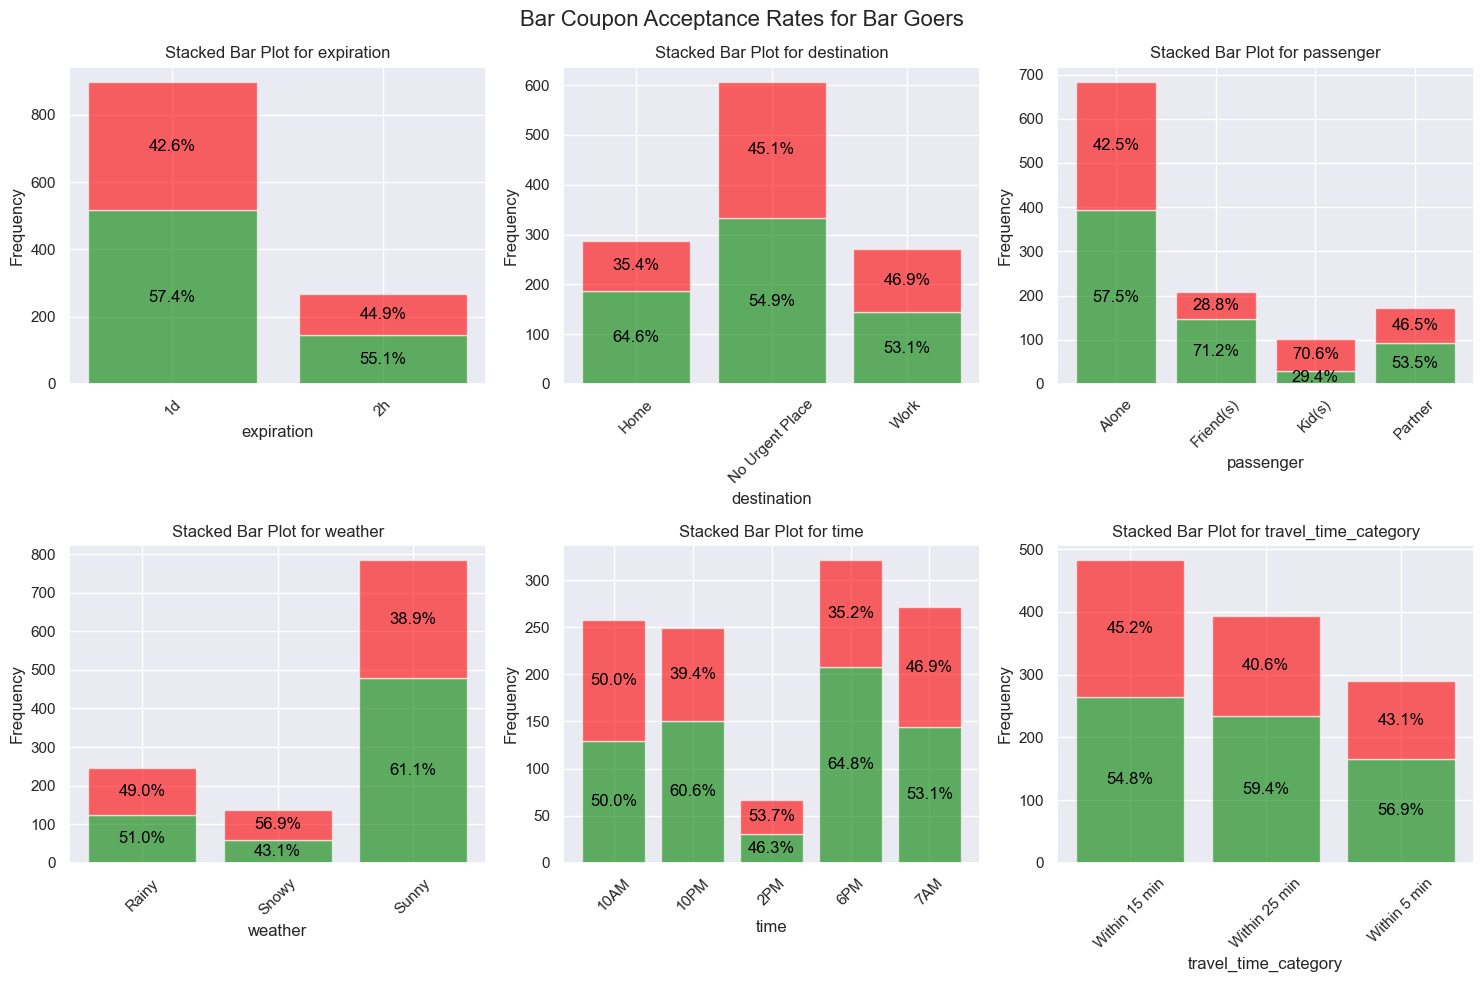
                <em>Figure: Bar Coupon Acceptance Rates By Various Factors</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: center;">
                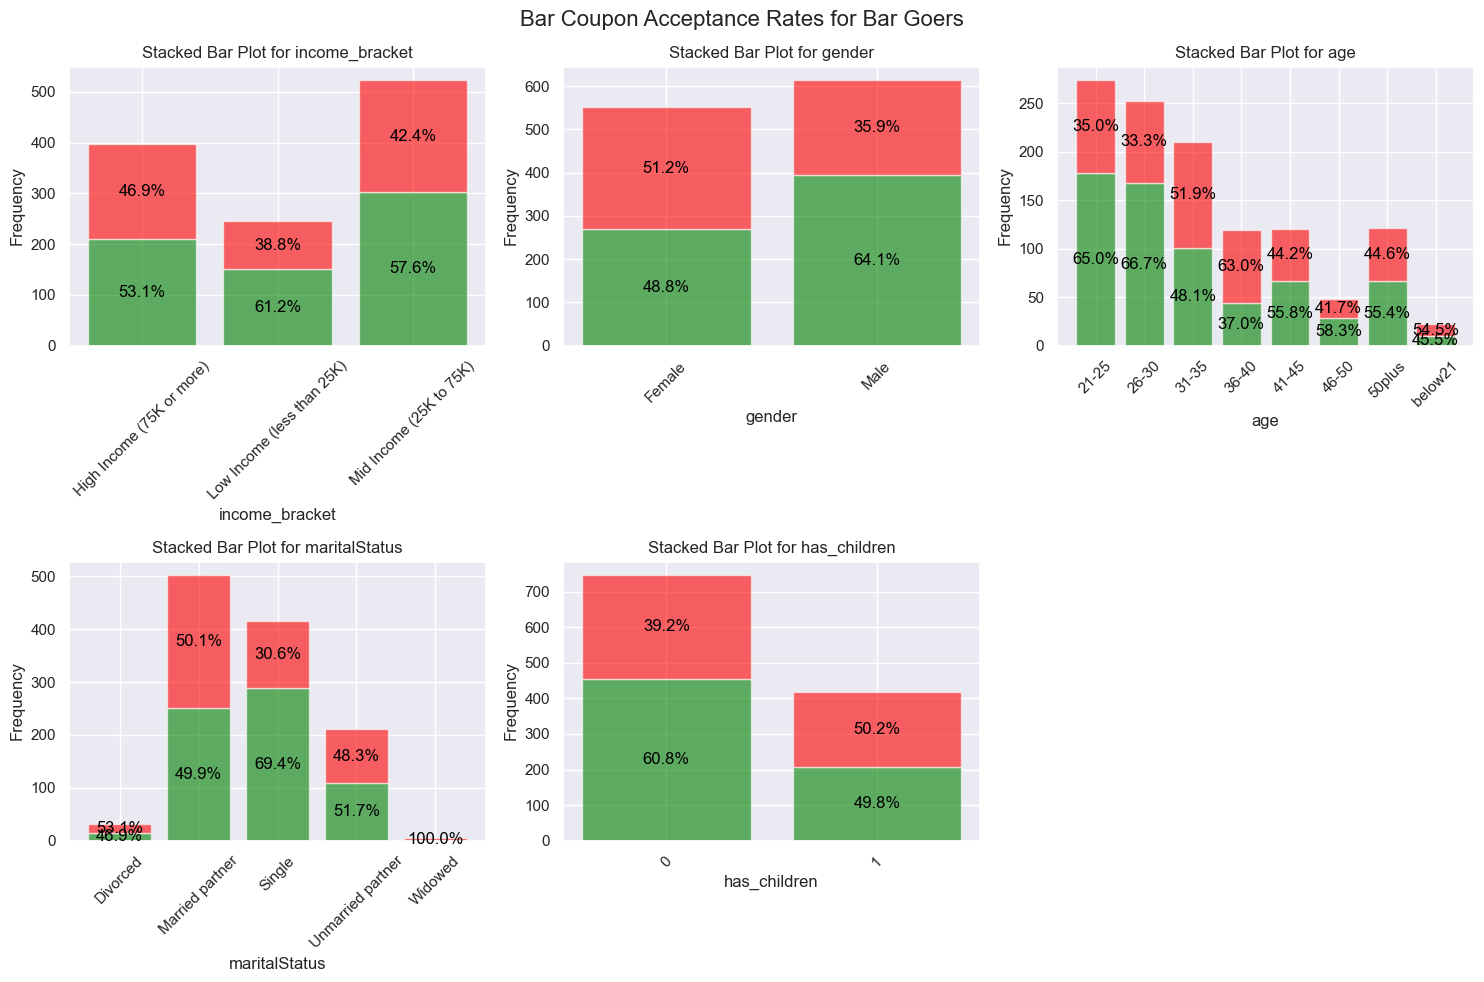
                <em>Figure: Bar Coupon Acceptance Rates By Demographics</em>
            </td>
        </tr>
    </table>
</div>

## Conclusions and Recommendations

- **Target Specific Demographics**: Tailoring bar coupon offers to specific demographics such as single drivers or males may increase acceptance rates.
- **Focus on Social Hours**: Offering coupons during peak social hours (6 PM and 10 PM) seems effective, while reevaluating the strategy for off-peak times like 2 PM is advisable.
- **Consider Weather Impact**: Marketing strategies could be adapted to consider the influence of weather conditions on coupon acceptance.
- **Engage Frequent Bar Visitors**: Drivers who frequently visit bars, particularly those traveling with friends or headed home, are more likely to accept bar coupons.




(                                subplot_label         category  total_count  \
 0             Stacked Bar Plot for expiration               1d          899   
 1             Stacked Bar Plot for expiration               2h          267   
 2            Stacked Bar Plot for destination             Home          288   
 3            Stacked Bar Plot for destination  No Urgent Place          607   
 4            Stacked Bar Plot for destination             Work          271   
 5              Stacked Bar Plot for passenger            Alone          684   
 6              Stacked Bar Plot for passenger        Friend(s)          208   
 7              Stacked Bar Plot for passenger           Kid(s)          102   
 8              Stacked Bar Plot for passenger          Partner          172   
 9                Stacked Bar Plot for weather            Rainy          245   
 10               Stacked Bar Plot for weather            Snowy          137   
 11               Stacked Bar Plot for w

In [48]:
df_bar_grid =df_bar.query("Bar not in ['never','no answer']").copy()
columns_to_plot = [ 'expiration','destination', 'passenger', 'weather', 'time', 'travel_time_category']
grid1_image64, result_df1 =create_subplot_grid(df_bar_grid, columns_to_plot, 'Bar Coupon Acceptance Rates for Bar Goers',45)
columns_to_plot = ['income_bracket', 'gender', 'age', 'maritalStatus', 'has_children']
grid2_image64, result_df2 =create_subplot_grid(df_bar_grid, columns_to_plot, 'Bar Coupon Acceptance Rates for Bar Goers',45)


markdown_text = f"""
# 7.6 Miscellaneous Holistic Analysis of Bar Coupons

## Overview

This section presents a holistic analysis of bar coupon acceptance rates, focusing on various attributes of drivers who received bar coupons and visited bars at least once a month. The methodology involved creating a grid of bar plots, each showcasing the acceptance rates and frequency distribution grouped by different attributes.

## Methodology

- **Data Selection**: The analysis focused on drivers offered bar coupons who visited bars at least once a month.
- **Visualization Approach**: A series of bar plots were created, each representing the acceptance rate for a specific attribute.

## Findings and Observations

### Bar Coupon Acceptance by Various Factors

1. **Destination Influence**: Drivers headed home showed a notably higher acceptance rate of 64.6%, compared to others.
2. **Passenger Impact**: Those driving with friends exhibited a significantly higher acceptance rate of 71.2%, though the frequency of such instances was lower.
3. **Weather Conditions**: Sunny weather led to skewed distribution and the highest acceptance rate (61.1%), while snowy weather saw the lowest acceptance rate (43.1%).
4. **Time of Coupon Offer**: Coupons offered at 6 PM and 10 PM had acceptance rates over 60%, aligning with typical social hours. However, a 2 PM offer had an anomalously low acceptance rate of 46%.
5. **Travel Time**: Acceptance rates based on travel time to the destination hovered between 55% and 60%.
6. **Expiration Periods**: Similar acceptance rates (mid-50s) were observed for coupons expiring in 2 hours and 1 day.
7. **Gender Differences**: Male bar-goers accepted coupons 64% of the time, higher than the 48.8% acceptance rate for females.
8. **Age Group Patterns**: The 21-30 age group had the highest acceptance rate, in the mid-60s.
9. **Marital Status**: Single drivers showed the highest acceptance rate at 69.4%.
10. **Parental Status**: Drivers without children had a higher acceptance rate of 60.8% compared to those with children (49.8%).

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{grid1_image64}" alt="Bar Coupon Acceptance Rates By Various Factors" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rates By Various Factors</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{grid2_image64}" alt="Bar Coupon Acceptance Rates By Demographics" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rates By Demographics</em>
            </td>
        </tr>
    </table>
</div>

## Conclusions and Recommendations

- **Target Specific Demographics**: Tailoring bar coupon offers to specific demographics such as single drivers or males may increase acceptance rates.
- **Focus on Social Hours**: Offering coupons during peak social hours (6 PM and 10 PM) seems effective, while reevaluating the strategy for off-peak times like 2 PM is advisable.
- **Consider Weather Impact**: Marketing strategies could be adapted to consider the influence of weather conditions on coupon acceptance.
- **Engage Frequent Bar Visitors**: Drivers who frequently visit bars, particularly those traveling with friends or headed home, are more likely to accept bar coupons.


"""

display(Markdown(markdown_text))
result_df1,result_df2



# 7.7.  Summary Report: Insights into Bar Coupon Acceptance


<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                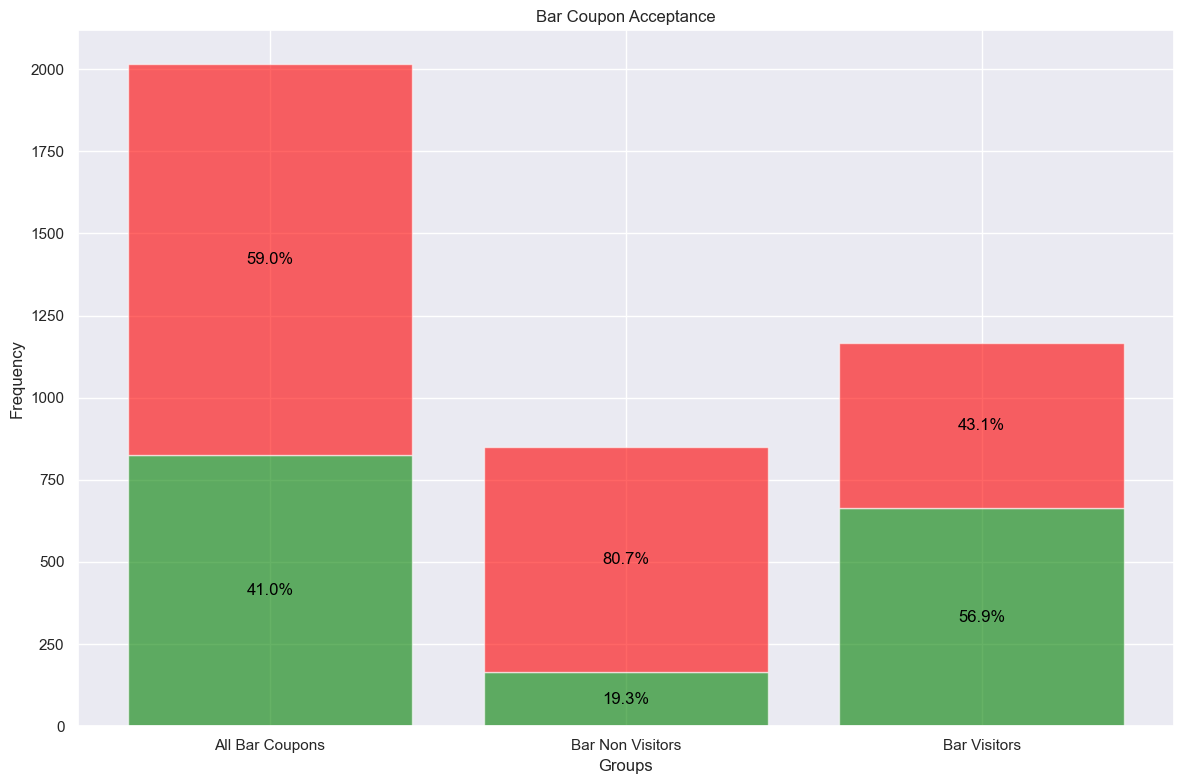
                <em>Figure: Bar Coupon Acceptance Rates By Various Factors</em>
            </td>
        </tr>
    </table>
</div>

##  Hypotheses on Drivers Who Accepted Bar Coupons

The comprehensive analysis from sections 7.1 to 7.6 provides insightful hypotheses about the characteristics and preferences of drivers more inclined to accept bar coupons:

1. **Dominance of Bar Visit Frequency**: The clearest indicator of a driver's likelihood to accept a bar coupon is their frequency of bar visits. Even a minimum threshold of visiting bars at least once a month significantly increases coupon acceptance rates. This trend intensifies for those visiting more than three times a month, underscoring the pivotal role of bar visit frequency.

2. **Social Behavior's Impact on Acceptance**: Drivers in social settings, such as those traveling with friends or on their way home, show a higher propensity to accept bar coupons. This finding suggests a strong link between social activities and the likelihood of redeeming bar-related offers.

3. **Demographic Preferences in Coupon Acceptance**: Younger drivers, particularly in the 21-30 age group, and single individuals exhibit higher acceptance rates. Additionally, gender and parental status play roles, with males and non-parents more likely to accept bar coupons.

4. **Influence of Environmental and Temporal Factors**: External factors like weather conditions and the time of day have a significant impact on the acceptance of bar coupons. Offers made during favorable weather and peak social hours, like evenings, tend to be more successful, highlighting the importance of environmental and temporal context in promotional strategies.

5. **Insightful Lesson from Occupation Analysis**: While examining the role of occupation, specifically farming, fishing, and forestry, it was observed that despite high acceptance rates, the actual frequency of offers was minimal. This underscores the crucial lesson that acceptance rates alone can be misleading without considering frequency distribution. The use of stacked bar plots, which juxtapose frequency distribution and acceptance rates, proved invaluable in eliminating false flags like occupation and enhancing the clarity of our analysis.

In summary, our analysis stresses that the frequency of bar visits is the most significant factor influencing bar coupon acceptance. These insights are crucial for businesses looking to optimize their bar coupon marketing strategies, suggesting a targeted approach based on bar-going habits rather than other demographic details.

---

In the next notebook, we will delve into the acceptance patterns for 'Coffee House' and 'Carry out & Take away' coupons [Coffee House Coupon Acceptance Analysis](DriverCouponAnalysis_2.ipynb).




group_label  total_count  accept_count  reject_count  \
0   All Bar Coupons         2017           827          1190   
1  Bar Non Visitors          851           164           687   
2      Bar Visitors         1166           663           503   

   accept_percentage  reject_percentage  
0          41.001487          58.998513  
1          19.271445          80.728555  
2          56.861063          43.138937

In [49]:
bar_filter = df_cleaned.eval("coupon == 'Bar'")
df_bar = df_cleaned.query("coupon == 'Bar'")
df_bar_goer_filter = df_cleaned.eval("coupon == 'Bar' and Bar not in ['never','no answer']")
df_bar_non_goer_filter = df_cleaned.eval("coupon == 'Bar' and Bar in ['never','no answer']")

filters = [ bar_filter,df_bar_non_goer_filter,df_bar_goer_filter]
filter_labels = ['All Bar Coupons','Bar Non Visitors','Bar Visitors']

bar_coupon_acceptance_image64, result_df = create_stacked_bar_plot_with_filters(filters, filter_labels, "Bar Coupon Acceptance", None, df_cleaned, rotation=0, yscale='linear')


markdown_text = f"""

# 7.7.  Summary Report: Insights into Bar Coupon Acceptance


<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{bar_coupon_acceptance_image64}" alt="Bar Coupon Acceptance Rates By Various Factors" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rates By Various Factors</em>
            </td>
        </tr>
    </table>
</div>

##  Hypotheses on Drivers Who Accepted Bar Coupons

The comprehensive analysis from sections 7.1 to 7.6 provides insightful hypotheses about the characteristics and preferences of drivers more inclined to accept bar coupons:

1. **Dominance of Bar Visit Frequency**: The clearest indicator of a driver's likelihood to accept a bar coupon is their frequency of bar visits. Even a minimum threshold of visiting bars at least once a month significantly increases coupon acceptance rates. This trend intensifies for those visiting more than three times a month, underscoring the pivotal role of bar visit frequency.

2. **Social Behavior's Impact on Acceptance**: Drivers in social settings, such as those traveling with friends or on their way home, show a higher propensity to accept bar coupons. This finding suggests a strong link between social activities and the likelihood of redeeming bar-related offers.

3. **Demographic Preferences in Coupon Acceptance**: Younger drivers, particularly in the 21-30 age group, and single individuals exhibit higher acceptance rates. Additionally, gender and parental status play roles, with males and non-parents more likely to accept bar coupons.

4. **Influence of Environmental and Temporal Factors**: External factors like weather conditions and the time of day have a significant impact on the acceptance of bar coupons. Offers made during favorable weather and peak social hours, like evenings, tend to be more successful, highlighting the importance of environmental and temporal context in promotional strategies.

5. **Insightful Lesson from Occupation Analysis**: While examining the role of occupation, specifically farming, fishing, and forestry, it was observed that despite high acceptance rates, the actual frequency of offers was minimal. This underscores the crucial lesson that acceptance rates alone can be misleading without considering frequency distribution. The use of stacked bar plots, which juxtapose frequency distribution and acceptance rates, proved invaluable in eliminating false flags like occupation and enhancing the clarity of our analysis.

In summary, our analysis stresses that the frequency of bar visits is the most significant factor influencing bar coupon acceptance. These insights are crucial for businesses looking to optimize their bar coupon marketing strategies, suggesting a targeted approach based on bar-going habits rather than other demographic details.

---

In the next notebook, we will delve into the acceptance patterns for 'Coffee House' and 'Carry out & Take away' coupons [Coffee House Coupon Acceptance Analysis](DriverCouponAnalysis_2.ipynb).


"""

display(Markdown(markdown_text))
result_df

# 8. Comprehensive Final Report on Bar Coupon Acceptance

## Executive Summary

This report presents an extensive analysis of Bar coupon acceptance, focusing on driver characteristics and behaviors. It covers demographics, social settings, external factors, and occupation-related insights, offering a detailed view of key trends and strategies for effectively targeting bar coupon campaigns.

## Detailed Analysis and Insights

### 8.1 Overall Acceptance Rate Analysis
- **Findings**: Bar coupons showed a lower acceptance rate compared to the general coupon dataset.
- **Specifics**: Of the 2,017 bar coupons offered, 827 were accepted, resulting in an approximate 41% acceptance rate.

### 8.2 Acceptance Analysis by Bar Visit Frequency
- **Key Observations**: A significant divide in acceptance rates between bar goers and non-bar goers, highlighting the dominance of bar visit frequency as a predictor for coupon acceptance.
- **Statistics**:
  - **Bar Goers (Visits >0 times a month)**: Higher acceptance rate, indicating strong relevance of the offer to this group.
  - **Non-Bar Goers (Visits = 0 times a month)**: Lower acceptance rate, suggesting less interest or relevance of the offer.

### 8.3 Acceptance by Demographic Factors
- **Insights**: Demographic factors like age, gender, marital status, and parental status influenced coupon acceptance.
- **Data Highlights**:
  - **Youth Engagement**: Higher acceptance among drivers aged 21-30.
  - **Gender and Parental Status**: Males and non-parents showed a higher propensity to accept coupons.
  - **Marital Status**: Single drivers were more likely to accept coupons.

### 8.4 Social Behavior's Impact on Acceptance
- **Observations**: Drivers in social settings, such as traveling with friends or on their way home, exhibited a higher likelihood of accepting bar coupons, demonstrating the strong link between social activities and coupon redemption.

### 8.5 Acceptance by Environmental and Temporal Factors
- **Findings**: External factors like weather conditions and time of day significantly impacted coupon acceptance.
- **Details**:
  - **Weather Impact**: Better acceptance during favorable weather.
  - **Time Influence**: Higher acceptance rates during evening hours.

### 8.6 Acceptance by Occupation and Insights from Occupation Analysis
- **Insights**: Occupation, especially non-farming, fishing, or forestry, showed varied impacts on coupon acceptance.
- **Lesson Learned**: High acceptance rates in specific occupations (like farming) were misleading due to minimal offer frequency, emphasizing the need for careful analysis of frequency distribution.
- **Statistics**:
  - **Non-Farming Occupations**: Generally higher acceptance rates.

### 8.7 Detailed Findings Table


| Section | Coupon Group | Key Findings | Highest Acceptance Rate Groups | Notable Gaps | Count | Acceptance Rate |
|---------|--------------|--------------|--------------------------------|--------------|-------|-----------------|
| 7.1 Overall Bar Coupon Acceptance Rate | Bar Coupons | Lower acceptance rate compared to total coupons. | N/A | Low frequency of bar coupon offers. | 2017 | 41.00% |
| 7.2 Acceptance by Bar Visit Frequency | Bar Coupons | Disparity based on bar visit frequency. | 4-8 times/mo: 78.00%, >8 times/mo: 73.47% | Frequent visitors less targeted. | Varies | Varies |
| 7.3 Acceptance by Demographic Factors | Bar Coupons | Higher acceptance among specific age groups. | Over 25: 69.52%, 21-25: 68.67% | Lower acceptance in 'Others' category. | Varies | Varies |
| 7.4 False Flag in Occupation Analysis | Bar Coupons | Identified false flag in occupation-focused analysis. | Non Farmer, No Kids: 71.32% | Overemphasis on farming occupation proved misleading. | Non Farmer, No Kids: 551, All Farmers: 9 | Non Farmer, No Kids: 71.32%, All Farmers: 44.44% |
| 7.5 Acceptance by Lifestyle and Demographics | Bar Coupons | Different acceptance rates based on lifestyle and demographic factors. | Group 2: Bars >1/month, Age <30 (72.17%) | Lower acceptance for Group 3: Cheap Restaurants >4/month, Income <50K. | Group 1: 551, Group 2: 345, Group 3: 246 | Group 1: 71.32%, Group 2: 72.17%, Group 3: 43.90% |
| 7.6 Acceptance by Various Factors | Bar Coupons | Varied acceptance rates based on factors like destination, weather, and time. | Friend(s) Passenger: 71.15%, Sunny Weather: 61.10% | Lowest for Kid(s) Passenger: 29.41%, Widowed Marital Status: 0.00% | Varies | Varies |


## Conclusion and Strategic Recommendations

Based on the observations from Section 8, our hypotheses about drivers who are more likely to accept bar coupons are as follows:

- **Frequent Bar Visitors**: 
  - Drivers who regularly visit bars, especially those visiting more than once a month, are significantly more likely to accept bar coupons. 
  - **Recommendation**: Target marketing efforts towards frequent bar goers.

- **Social Behavior Influence**: 
  - A higher coupon acceptance rate is observed among drivers in social settings, such as those traveling with friends or on their way home.
  - **Recommendation**: Focus on targeting drivers in social settings to enhance coupon acceptance.

- **Demographic Factors**: 
  - Younger drivers (21-30 age group) and single individuals show higher acceptance rates. Gender and parental status also play roles, with males and non-parents being more receptive.
  - **Recommendation**: Tailor promotional strategies considering age, gender, marital, and parental status.

- **Environmental and Temporal Factors**: 
  - Coupon acceptance is positively influenced by favorable weather conditions and peak social hours like evenings.
  - **Recommendation**: Align offers with favorable environmental conditions and optimal times.

These insights suggest that bar coupon acceptance is intricately linked to habitual, social, and contextual factors. Aligning marketing strategies with these findings can optimize coupon acceptance rates and engagement across diverse driver demographics, thereby enhancing the effectiveness of promotional campaigns. Further research into less explored demographic categories and lifestyle factors is also recommended to refine targeting accuracy.
